<h3>Given:</h3>
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).
<h3>Objective:</h3>
Modeling of strength of high performance concrete using Machine Learning

<h2>1. Reading the data</h2>

In [1]:
# Importing the libraries
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt      # for data visualization
from scipy import stats        # for calculating statistics

# Importing various machine learning algorithm from sklearn

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score,mean_squared_error,r2_score
from scipy.stats import zscore
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from surprise import Reader,Dataset,SVD,accuracy,KNNWithMeans
from surprise.model_selection import train_test_split,GridSearchCV
from collections import defaultdict

In [2]:
dataframe= pd.read_csv("ratings_Electronics.csv")  # Reading the data
dataframe.head()   # showing first 5 datas

AKM1MP6P0OYPR  0132793040  5.0  1365811200
0  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
4  A1QGNMC6O1VW39  0511189877  5.0  1397433600

In [3]:
dataframe.columns=['uid','pid','rating','time']
dataframe.head()

uid         pid  rating        time
0  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200
4  A1QGNMC6O1VW39  0511189877     5.0  1397433600

In [4]:
dataframe.shape

(7824481, 4)

The data given has  9 columns and consist of 1030 data. And all the data is read correctly.<br>
There are eight independent variables and one dependent variable (i.e strenght)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
uid       object
pid       object
rating    float64
time      int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


<h3>Obv</h3>
    The above information shows the following<br>
    a. The attributes are either int or float  <br>
    <br>
       


In [6]:
dataframe['uid'].astype('str')
dataframe['pid'].astype('str')

0          0321732944
1          0439886341
2          0439886341
3          0439886341
4          0511189877
              ...    
7824476    BT008UKTMW
7824477    BT008UKTMW
7824478    BT008UKTMW
7824479    BT008UKTMW
7824480    BT008V9J9U
Name: pid, Length: 7824481, dtype: object

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
uid       object
pid       object
rating    float64
time      int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
dataframe.isnull().sum()

uid       0
pid       0
rating    0
time      0
dtype: int64

There are no missing values. 

In [9]:
dataframe.apply(lambda x: len(x.unique()))

uid       4201696
pid        476001
rating          5
time         5489
dtype: int64

In [10]:
dataframe.describe()

rating          time
count  7.824481e+06  7.824481e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09

<h3>We can infer that:</h3>
We can see that cement,slag,ash are left skewed.<br>





In [11]:
dataframe.skew()

rating   -1.205397
time     -1.921830
dtype: float64

<h3>Obv</h3>
We can see that<br>
Age is positively skewed (right skewed)<br>
Coarseagg and Fineagg is slightly left skewed<br>
Others are slightly right skewed<br>

<h2>Univariate analysis</h2>
<h2>Cement</h2>

There is no outliers in Cement data.

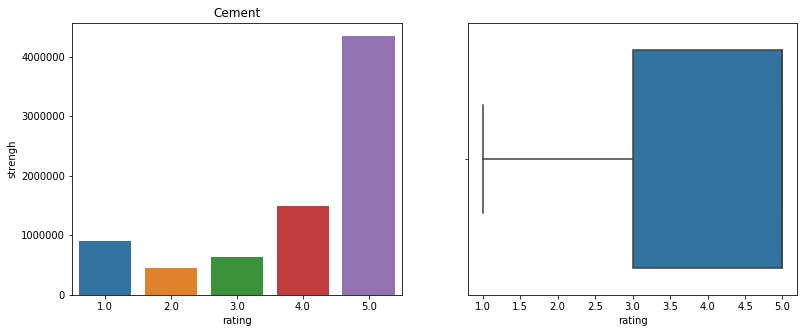

In [12]:
fig,(a1,a2)=plt.subplots(1,2,figsize=(13,5))

sns.countplot(dataframe.rating,ax=a1)
a1.set_title('Cement')
a1.set_ylabel('strengh')
sns.boxplot(x='rating',data=dataframe,ax=a2)


In [13]:
rating_info=pd.DataFrame(dataframe.groupby('pid').rating.mean())
rating_info['count']=pd.DataFrame(dataframe.groupby('pid').rating.count())

In [14]:
rating_info[rating_info['count']==rating_info['count'].max()]

rating  count
pid                        
B0074BW614  4.491504  18244

In [15]:
rating_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476001 entries, 0321732944 to BT008V9J9U
Data columns (total 2 columns):
rating    476001 non-null float64
count     476001 non-null int64
dtypes: float64(1), int64(1)
memory usage: 10.9+ MB


In [16]:
rating_info.describe()

rating          count
count  476001.000000  476001.000000
mean        3.889698      16.437951
std         1.128719     112.702749
min         1.000000       1.000000
25%         3.272727       1.000000
50%         4.000000       2.000000
75%         5.000000       7.000000
max         5.000000   18244.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe7e6e9f28>],
      dtype=object)

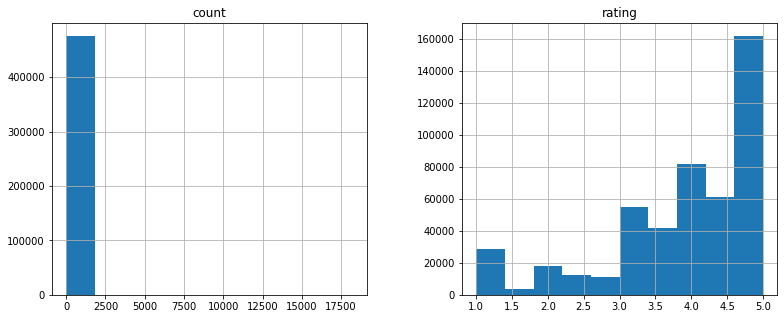

In [17]:
fig,(a1,a2)=plt.subplots(1,2,figsize=(13,5))
rating_info.hist(column='count',ax=a1)
rating_info.hist(column='rating',ax=a2)

In [18]:
q3=rating_info.rating.describe()['75%']
q1=rating_info.rating.describe()['25%']
iqr=q3-q1
print('Upper outliers starts from',q3+1.5*iqr)
print('Lower outliers starts from',q1-1.5*iqr)

Upper outliers starts from 7.590909090909091
Lower outliers starts from 0.6818181818181821


In [19]:
print('Number of Upper outliers are : ',rating_info[rating_info.rating>7.590909090909091].rating.count())
print('Number of Lower outliers are : ',rating_info[rating_info.rating<0.6818181818181821].rating.count())

Number of Upper outliers are :  0
Number of Lower outliers are :  0


We can see there are 10 outliers on the right

In [20]:
print('Popularity based recommender')
rating_info.sort_values(ascending=False,by='rating').sort_values(ascending=False,by='count').head()

Popularity based recommender


rating  count
pid                        
B0074BW614  4.491504  18244
B00DR0PDNE  3.931020  16454
B007WTAJTO  4.424005  14172
B0019EHU8G  4.754497  12285
B006GWO5WK  4.314657  12226

In [21]:
user_info=dataframe.uid.value_counts()
user_info.sort_values(ascending=True)

APPIHLAP39TKA       1
A3S6LBGR48QX2I      1
A3CZR8EK3PLZ42      1
A2R4BZBY9TQN3C      1
A245QCSCKSV93M      1
                 ... 
A680RUE1FDO8B     406
A6FIAB28IS79      431
A3OXHLG6DIBRW8    498
ADLVFFE4VBT8      501
A5JLAU2ARJ0BO     520
Name: uid, Length: 4201696, dtype: int64

In [22]:
df=dataframe[dataframe.uid.isin(user_info[user_info>=50].index)].copy()
print(df.shape)

(125871, 4)


In [23]:
df.uid.value_counts().sort_values(ascending=True)

AA8RBTN3J2F5H      50
A11KQADBYE0UZL     50
AXU8RH1DEV21H      50
A3JAH5WW61N2EK     50
ANEDXRFDZDL18      50
                 ... 
A680RUE1FDO8B     406
A6FIAB28IS79      431
A3OXHLG6DIBRW8    498
ADLVFFE4VBT8      501
A5JLAU2ARJ0BO     520
Name: uid, Length: 1540, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe7e60b3c8>],
      dtype=object)

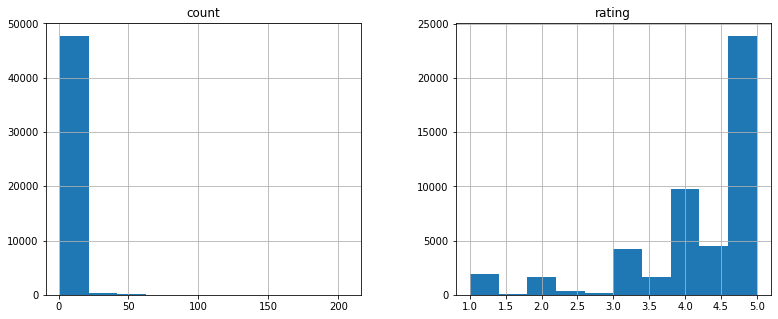

In [24]:
rating_info=pd.DataFrame(df.groupby('pid').rating.mean())
rating_info['count']=pd.DataFrame(df.groupby('pid').rating.count())
fig,(a1,a2)=plt.subplots(1,2,figsize=(13,5))
rating_info.hist(column='count',ax=a1)
rating_info.hist(column='rating',ax=a2)

In [25]:
df1=df[['uid','pid','rating']]
df1

uid         pid  rating
93       A3BY5KCNQZXV5U  0594451647     5.0
117       AT09WGFUM934H  0594481813     3.0
176      A32HSNCNPRUMTR  0970407998     1.0
177      A17HMM1M7T9PJ1  0970407998     4.0
491      A3CLWR1UUZT6TG  0972683275     5.0
...                 ...         ...     ...
7824425   A1E1LEVQ9VQNK  B00LGQ6HL8     5.0
7824426  A2NYK9KWFMJV4Y  B00LGQ6HL8     5.0
7824435  A3AYSYSLHU26U9  B00LI4ZZO8     4.0
7824437  A2NYK9KWFMJV4Y  B00LI4ZZO8     5.0
7824443  A2BYV7S1QP2YIG  B00LKG1MC8     5.0

[125871 rows x 3 columns]

In [26]:
reader=Reader(rating_scale=(1, 5))
dataset=Dataset.load_from_df(df1[['uid', 'pid', 'rating']], reader)
dataset

In [27]:
train_s,test_s= train_test_split(dataset,test_size=.3,random_state=1)

<h3>Obv</h3>
<li>superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.</li>


In [28]:
algo=SVD()
algo.fit(train_s)

In [29]:
pred_svd=algo.test(test_s)
pred_svd

[Prediction(uid='A3PDWA32BAMB2Y', iid='B00CGW74YU', r_ui=5.0, est=4.6923976947668455, details={'was_impossible': False}),
 Prediction(uid='A31BD4RXCON7QO', iid='B000P6G7YW', r_ui=1.0, est=4.232653036532506, details={'was_impossible': False}),
 Prediction(uid='A3J8A5L5AF5TX9', iid='B001GS8G06', r_ui=1.0, est=3.941002070223259, details={'was_impossible': False}),
 Prediction(uid='A3D6OI36USYOU1', iid='B000A1790S', r_ui=5.0, est=4.255250241434037, details={'was_impossible': False}),
 Prediction(uid='A3JU16JTNLVK1J', iid='B002CX16WO', r_ui=2.0, est=3.9946372367752883, details={'was_impossible': False}),
 Prediction(uid='A1ZU55TM45Y2R8', iid='B00HFAEBWG', r_ui=3.0, est=3.4852292911064064, details={'was_impossible': False}),
 Prediction(uid='AYP0YPLSP9ISM', iid='B006Z0Q2SI', r_ui=3.0, est=3.9211909212900435, details={'was_impossible': False}),
 Prediction(uid='A3UR2N0ATGBCU8', iid='B0024NL4DI', r_ui=5.0, est=4.424283509092768, details={'was_impossible': False}),
 Prediction(uid='A1PM7HH4F77N

In [30]:
ac=accuracy.rmse(pred_svd)
ac

RMSE: 0.9844


0.9843770422575776

In [31]:
results = pd.DataFrame({'Method':['SVD'], 'RMSE': ac},index={'1'})
results = results[['Method', 'RMSE']]
results

Method      RMSE
1    SVD  0.984377

In [32]:
def n_top_values(pred,n):
    n_values=defaultdict(list)
    for uid,iid,r_ui,est,_ in pred:
        n_values[uid].append([iid,est])
    for uid,rating in n_values.items():
        rating.sort(key=lambda x: x[1], reverse=True)
        n_values[uid] = rating[:n]

    return n_values    

In [33]:
top_5 = n_top_values(pred_svd, n=5)
for uid,pid in top_5.items():
    print(uid,[item for item,_ in pid])

A3PDWA32BAMB2Y ['B00CGW74YU', 'B004W2JKWG', 'B003XY6HYS', 'B000Q8UAWY', 'B000PNGM18']
A31BD4RXCON7QO ['B00007E7JU', 'B0011NVMO8', 'B0031LX6F6', 'B000VUIXOO', 'B000G3KLPA']
A3J8A5L5AF5TX9 ['B0052SCU8U', 'B000BQ7GW8', 'B001W28L2Y', 'B005S0BYQ6', 'B003LVZO92']
A3D6OI36USYOU1 ['B003ES5ZUU', 'B00AWBHFRI', 'B001SJVU24', 'B002P5W4RU', 'B0035ERKYW']
A3JU16JTNLVK1J ['B000HDFXU2', 'B000IJY8DS', 'B007PJ4PKK', 'B00009R6TA', 'B0000BZYPD']
A1ZU55TM45Y2R8 ['B003XIJ3MW', 'B00316263Y', 'B008ULPAT2', 'B008PQJWBE', 'B00HZZZM1U']
AYP0YPLSP9ISM ['B000F7QRTG', 'B006Z0Q2SI', 'B004LPZBD6', 'B0027ZGN2A', 'B005QWY3PU']
A3UR2N0ATGBCU8 ['B009HP42HQ', 'B005869A16', 'B00GXPTRKU', 'B00471EYUU', 'B004LNFJCQ']
A1PM7HH4F77NEH ['B003XM1WE0', 'B00F3ZN0CC', 'B000FYZARY', 'B000BC2RHQ', 'B000A6NUU6']
A1SFPA80X7TRBR ['B000QUUFRW', 'B0002LEMWE', 'B0041Q38NU', 'B004Q0T0LU', 'B001U3Y6AQ']
A1AZQCVCDBQP6 ['B00E055H5O', 'B003MTTJOY', 'B000ANCPNM', 'B0057UUB1G', 'B005NGKR54']
A2DF62DP20RIXF ['B003XM1WE0', 'B002Y6CJJ8', 'B002SZEOLG'

ALUNVOQRXOZIA ['B004536LUG', 'B0001DBEM4', 'B002TLTG9E', 'B0096YOQRY', 'B00000J3Q1']
AAQ9NJ480N9W5 ['B002V88HFE', 'B000QUUFRW', 'B00007GQLU', 'B0043WJRRS', 'B00009XVCZ']
A3TCMJ6GKZJFBQ ['B0007QKMQY', 'B00COF7DGS', 'B00829TIA4', 'B0000ALX5R', 'B007FEFQDA']
A3R1GJY2MY8041 ['B0014DURIW', 'B007A9NSR6', 'B00004VUGJ', 'B001TLK7V6', 'B004OR14HI']
AQB4DH57MSZSC ['B005KFONIU', 'B00871F9E6', 'B002FB684E', 'B0031RG2AG', 'B00BMJR2EK']
A1G5MI2KREPEIB ['B003NR57BY', 'B00212NO6W', 'B004NBZ8DQ', 'B000UO6C5S', 'B001PUSERA']
A3HPCRD9RX351S ['B000S5Q9CA', 'B005DSPLCQ', 'B0002EE5JQ', 'B00603RTC8', 'B00B3YQGHS']
A3IOQ7NVVLAUEE ['B00032Q1J4', 'B000JQ17WK', 'B000WUKQBG', 'B000FAKUE6', 'B00004Z5D1']
A15J71JLC29KPW ['B004SGJCCO', 'B00829THVO', 'B00FJWKYYG', 'B000063574', 'B009NUWRF4']
AYO1146CBIV5C ['B009APBY0G', 'B001S4OTS6', 'B004HYGEOQ', 'B00HZZZM1K', 'B00D6JBZBK']
A30R8VFR16RE32 ['B0019EHU8G', 'B003ES5ZUU', 'B006ZH0KJS', 'B00EOI2SYK', 'B00DDK1QUC']
A3N4VTNFPMTHEF ['B00116SLYY', 'B00077AA5Q', 'B001NTFAOS', 

A2ZR3YTMEEIIZ4 ['B00008K4BD', 'B0000AINE1', 'B000MNA082', 'B000095IRZ', 'B0009IU4OA']
A1ZA5SXZS8Z3CK ['B002OFP6QW', 'B003PJ6QVU', 'B007YWMCA8', 'B004DAV2ZU', 'B0000BVYTV']
A206CGM6J75UJY ['B002FYJQB8', 'B0035FZJHQ', 'B003G2ZJTG', 'B007PRHNHO', 'B007477COO']
A3EP26M3QHINXT ['B001UGMTKC', 'B0047EE0XS', 'B00A2G6BPA', 'B00383E4TO', 'B00939ETTC']
AY3XPKRAMKKY7 ['B00BH2RU9O', 'B000V1XICU', 'B003WUBIZQ', 'B000NB05MO', 'B009APBY0G']
A2D0CO1OA6DSWY ['B004M8SWBU', 'B009SYZ8OC', 'B002USMTWC', 'B00HRO3IBA', 'B003B3P2C4']
A2AC6GQ24S45GA ['B00DT04I9W', 'B004CLYEDC', 'B005HY4U46', 'B003VANO7C', 'B001AAOZHI']
A34LQ791ACZ0JC ['B000N99BBC', 'B001O4EPHA', 'B000FQ2JLW', 'B00213FX38', 'B002PX9BX2']
AEIB3UR05OP7A ['B009NB8WR0', 'B007SZ0E1K', 'B002VKVZ1A', 'B001NJ0D0Y', 'B001E01EYQ']
A30UP2KKD5IQEP ['B002K9IHGI', 'B001E1Y5O6', 'B00EVWX8R0', 'B001NTFATI', 'B006ZBWV0K']
A32AK8FOAZEPE2 ['B002RM08RE', 'B002KNWQI4', 'B0009K4XI6', 'B00005U23U', 'B009AEVLJ6']
A2XA8CW5DF4MNZ ['B001TOD7ME', 'B000MSLW6G', 'B0025ZH43O'

In [34]:
params={
    "n_epochs":[5,10,15,20],
    "lr_all":[0.01,0.02,0.03,0.04],
    "reg_all":[0.01,0.02,0.03,0.04,0.05]
}
algo=SVD()
grid_SVD=GridSearchCV(SVD,params,measures=['rmse','mae'],cv=3)

No much findings.

In [35]:
grid_SVD.fit(dataset)

In [36]:
print(grid_SVD.best_score['rmse'])
print(grid_SVD.best_params['rmse'])

0.9839948966783783
{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}


In [37]:
t_svd=SVD(n_epochs=10,lr_all=0.01,reg_all=0.05,random_state=1)
t_svd.fit(train_s)
pred_svd_t=t_svd.test(test_s)
ac= accuracy.rmse(pred_svd_t)
ac                                #check

RMSE: 0.9837


0.9836857977536945

In [38]:
L_results = pd.DataFrame({'Method':['Tuned SVD'], 'RMSE': ac},index={'2'})
results=pd.concat([results,L_results])
results = results[['Method', 'RMSE']]
results

Method      RMSE
1        SVD  0.984377
2  Tuned SVD  0.983686


<h2>Corelation of Attributes</h2>

In [39]:
top_5 = n_top_values(pred_svd_t, n=5)
for uid,pid in top_5.items():
    print(uid,[item for item,_ in pid])

A3PDWA32BAMB2Y ['B004W2JKWG', 'B000Q8UAWY', 'B000PNGM18', 'B004V93M1A', 'B008DW95NA']
A31BD4RXCON7QO ['B00009XVCZ', 'B000VUIXOO', 'B002KMIZIU', 'B001KELVS0', 'B0031LX6F6']
A3J8A5L5AF5TX9 ['B0052SCU8U', 'B000BQ7GW8', 'B0031ESKJA', 'B001XURP7W', 'B001W28L2Y']
A3D6OI36USYOU1 ['B003ES5ZUU', 'B0035ERKYW', 'B001SJVU24', 'B002P5W4RU', 'B00AWBHFRI']
A3JU16JTNLVK1J ['B000IJY8DS', 'B005K7192G', 'B00009R6TA', 'B000HDFXU2', 'B000WL6YY8']
A1ZU55TM45Y2R8 ['B008OEHPKM', 'B00316263Y', 'B003XIJ3MW', 'B008ULPAT2', 'B008X9ZBVI']
AYP0YPLSP9ISM ['B000F7QRTG', 'B006Z0Q2SI', 'B004JJM2N6', 'B0086SDU3M', 'B0027ZGN2A']
A3UR2N0ATGBCU8 ['B005869A16', 'B009HP42HQ', 'B0095VPBM2', 'B00264NZWS', 'B004LNFJCQ']
A1PM7HH4F77NEH ['B004IZN3K2', 'B003XM1WE0', 'B004R7A9NU', 'B00080G0BK', 'B005S0BYQ6']
A1SFPA80X7TRBR ['B000QUUFRW', 'B0002LEMWE', 'B000BM8RFM', 'B001U3Y6AQ', 'B004Q0T0LU']
A1AZQCVCDBQP6 ['B0057UUB1G', 'B00E055H5O', 'B005NGKR54', 'B003MTTJOY', 'B000WH6H1M']
A2DF62DP20RIXF ['B003XM1WE0', 'B002Y6CJJ8', 'B00D349WB8'

A2GYV87WW0DMSN ['B008EQYRRY', 'B000068O16', 'B005HMKKH4', 'B004LPZBD6', 'B00803N2AY']
A2T3S3VTW65VO5 ['B001TH7GT6', 'B001TH7GSW', 'B004HHICKC', 'B009O7YUF6', 'B0034CL2ZI']
A1OO9N1MRNQ7K0 ['B000067RT6', 'B003BKW2K2', 'B000EITTLE', 'B00081NX5U', 'B0016CMCBG']
A1VHCO8RQFIGQJ ['B00009XVCZ', 'B001NS828K', 'B0040JHVC2', 'B000KO0GY6', 'B002J9HBIO']
A2F4HP0J5VNOYR ['B00316263Y', 'B0000BZL1P', 'B000LRMS66', 'B000BN94F8', 'B0009PAVI2']
A3V2EZ6MA32FF6 ['B002TLTE6O', 'B003ES5ZUU', 'B00A9NE84C', 'B006JH8T3S', 'B00JAZGUBE']
A13EQE9EY2ET93 ['B00BOHNYTW', 'B001KUL012', 'B00C46K0X0', 'B00FRMAOIO', 'B00CMREMBC']
A1D27BCSYV7VWH ['B001E1Y5O6', 'B005HVPYNU', 'B00629NHW6', 'B00BCPGOD4', 'B00003CWDG']
A2NJQF2UI60VGT ['B00AQM8586', 'B000QUUFRW', 'B0012IJYZQ', 'B0010Y414Q', 'B008OEHPKM']
A16WP8NTPYB0ZM ['B0092HP3GS', 'B003J9I5KQ', 'B003YNSXTA', 'B000BSJFKC', 'B000I963XQ']
A2ARDVMUGDFED6 ['B000VUIXOO', 'B001ENW61I', 'B000A5TAT2', 'B000KO0GY6', 'B00462RMS6']
A16HXVNPU5TCGE ['B0011NVMO8', 'B003LVZO92', 'B00009R6U

In [40]:
user_user=KNNWithMeans(k=25,sim_options={'name':'cosine', 'user-based':True})
user_user.fit(train_s)
u_pred=user_user.test(test_s)
ac=accuracy.rmse(u_pred)
ac

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0593


1.059307289421527

In [41]:
L_results = pd.DataFrame({'Method':['User-User'], 'RMSE': ac},index={'3'})
results=pd.concat([results,L_results])
results = results[['Method', 'RMSE']]
results

Method      RMSE
1        SVD  0.984377
2  Tuned SVD  0.983686
3  User-User  1.059307

In [42]:
top_5 = n_top_values(u_pred, n=5)
for uid,pid in top_5.items():
    print(uid,[item for item,_ in pid])

A3PDWA32BAMB2Y ['B004W2JKWG', 'B003XY6HYS', 'B008DW95NA', 'B000Q8UAWY', 'B000PNGM18']
A31BD4RXCON7QO ['B000VUIXOO', 'B0011NVMO8', 'B002CGSYNA', 'B00009XVCZ', 'B001KELVS0']
A3J8A5L5AF5TX9 ['B003LZ6F8M', 'B005GI19HY', 'B005S0BYQ6', 'B000V1O1J4', 'B0052SCU8U']
A3D6OI36USYOU1 ['B0009ST7DY', 'B00AWBHFRI', 'B0035ERKYW', 'B003ES5ZUU', 'B0001G6U4S']
A3JU16JTNLVK1J ['B000HDFXU2', 'B007PJ4PKK', 'B004HR0M4Q', 'B000V6MSRG', 'B000IJY8DS']
A1ZU55TM45Y2R8 ['B00HZZZM1U', 'B004SD1XB0', 'B00006B81E', 'B0017H4G0A', 'B00316263Y']
AYP0YPLSP9ISM ['B006Z0Q2SI', 'B001HTE414', 'B004JWBQ4Y', 'B00BEW8MVC', 'B0078XGE3Y']
A3UR2N0ATGBCU8 ['B009HP42HQ', 'B0095VPBM2', 'B000R9AAJA', 'B003X26VV4', 'B005B3VO24']
A1PM7HH4F77NEH ['B005S0BYQ6', 'B003XM1WE0', 'B000BC2RHQ', 'B003D3MFHM', 'B00GIAOB10']
A1SFPA80X7TRBR ['B001FXZTIY', 'B001U3Y6AQ', 'B0024TNXNG', 'B004Q0T0LU', 'B0041Q38NU']
A1AZQCVCDBQP6 ['B0057UUB1G', 'B005B5G4S6', 'B00E055H5O', 'B005SEZBXY', 'B00FEE7B1I']
A2DF62DP20RIXF ['B002Y6CJJ8', 'B004OX4HWG', 'B0048HUNSK'

A15J9K7O10A3M6 ['B00969J3EU', 'B000075UZ7', 'B000QUUFRW', 'B007FH1KX2', 'B002TXJUJ8']
A359MYLPLEOF7N ['B0013P3ZOE', 'B0092ZJWHQ', 'B003J9MYMQ', 'B0002E51CQ', 'B003NYSZUW']
A294BKN913UOGP ['B007GJ4GFS', 'B000V1VG5G', 'B003WJR69E', 'B001BTCSI6', 'B0084G3FKE']
A3DOPYDOS49I3T ['B00BWHILCY', 'B000GIT002', 'B00FRDUZXM', 'B009A6CZ30', 'B002JQNXZC']
A31ICLWQ9CSHRS ['B004I1J864', 'B000053HH5', 'B000NP3DJW', 'B00007GQLS', 'B000JEC7CQ']
A9J4UURM4OSDW ['B00021EE4U', 'B003ZSHNGS', 'B000Z9UY2K', 'B000PEF254', 'B000UV4AIM']
A1VGXHHR08G044 ['B004WKSY1G', 'B0043M9AU2', 'B00B7X2OTY', 'B000JMJWV2', 'B00834SJNA']
A16CVJUQOB6GIB ['B009VTDT22', 'B007BJC75E', 'B006BCK7RM', 'B00006BBS3', 'B004MNAFWY']
A1DQHS7MOVYYYA ['B0023B14TK', 'B000HAOVGM', 'B000R6QAHY', 'B003Z6Q2JE', 'B0039BPG1A']
AETQIN7OH0RL9 ['B00G56CIJY', 'B007WAWHD4', 'B00370WU2G', 'B004E4YGJO', 'B007KWLXRK']
A2BMZRO0H7TFCS ['B001OC6DCW', 'B005QUQP7G', 'B00BQ4F9ZA', 'B00FPKDPZC', 'B0007WKB0U']
A2PREU4LOFQRB1 ['B004UHY8SO', 'B002JQNXZC', 'B00EXPNFQO'

In [43]:
sim_options={
    "name":["msd","cosine","pearson_baseline"],
    "min_support":[25,50,75,100],
    "user_based":[True]
}
params={"sim_options":sim_options}
user_user_t=GridSearchCV(KNNWithMeans,params,measures=['rmse'],cv=3)

In [44]:
user_user_t.fit(dataset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done c

In [45]:
print(user_user_t.best_score['rmse'])
print(user_user_t.best_params['rmse'])

1.0277028577871086
{'sim_options': {'name': 'msd', 'min_support': 50, 'user_based': True}}


In [46]:
t_user=KNNWithMeans(k=25,sim_options={'name':'msd','user_based':True})
t_user.fit(train_s)
ut_pred=t_user.test(test_s)
ac=accuracy.rmse(ut_pred)
ac

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0632


1.0632068133441974

In [47]:
L_results = pd.DataFrame({'Method':['Tunned User-User'], 'RMSE': ac},index={'4'})
results=pd.concat([results,L_results])
results = results[['Method', 'RMSE']]
results

Method      RMSE
1               SVD  0.984377
2         Tuned SVD  0.983686
3         User-User  1.059307
4  Tunned User-User  1.063207

In [48]:
top_5=n_top_values(ut_pred,5)
for uid,pid in top_5.items():
    print(uid,[item for item,_ in pid])
    

A3PDWA32BAMB2Y ['B004W2JKWG', 'B003XY6HYS', 'B008DW95NA', 'B000Q8UAWY', 'B000PNGM18']
A31BD4RXCON7QO ['B000VUIXOO', 'B0011NVMO8', 'B00009XVCZ', 'B000P6G7YW', 'B00000JX3C']
A3J8A5L5AF5TX9 ['B003LZ6F8M', 'B005GI19HY', 'B005S0BYQ6', 'B000V1O1J4', 'B0052SCU8U']
A3D6OI36USYOU1 ['B0009ST7DY', 'B00AWBHFRI', 'B0035ERKYW', 'B003ES5ZUU', 'B0001G6U4S']
A3JU16JTNLVK1J ['B000HDFXU2', 'B007PJ4PKK', 'B004HR0M4Q', 'B000V6MSRG', 'B000IJY8DS']
A1ZU55TM45Y2R8 ['B00HZZZM1U', 'B004SD1XB0', 'B0017H4G0A', 'B00006B81E', 'B00316263Y']
AYP0YPLSP9ISM ['B006Z0Q2SI', 'B00B46XUQU', 'B001HTE414', 'B004JWBQ4Y', 'B00BEW8MVC']
A3UR2N0ATGBCU8 ['B009HP42HQ', 'B0095VPBM2', 'B003X26VV4', 'B000R9AAJA', 'B005B3VO24']
A1PM7HH4F77NEH ['B005S0BYQ6', 'B003XM1WE0', 'B000BC2RHQ', 'B003D3MFHM', 'B00GIAOB10']
A1SFPA80X7TRBR ['B001FXZTIY', 'B001U3Y6AQ', 'B0024TNXNG', 'B004Q0T0LU', 'B0041Q38NU']
A1AZQCVCDBQP6 ['B0057UUB1G', 'B005B5G4S6', 'B00E055H5O', 'B00FEE7B1I', 'B005SEZBXY']
A2DF62DP20RIXF ['B002Y6CJJ8', 'B002SZEOLG', 'B00D349WB8'

A38NHXL5257E3B ['B004WYA852', 'B0028Y4DCC', 'B00698ZUHK', 'B0067SF63A', 'B002S53LJ2']
A3GQY0TFRG0MPZ ['B00622AG6S', 'B0015DYMVO', 'B000UHQVOW', 'B004W2T2TM', 'B000BZATW8']
A33152QEGO2MZN ['B004GZRE1S', 'B001EAQTRI', 'B008AST7R6', 'B00622AG6S', 'B000WKW69Q']
A2LXX47A0KMJVX ['B000W09ZTK', 'B000MVBHRW', 'B0032UWTQI', 'B000I991LM', 'B002WE6D44']
A316XO4RWX21YN ['B000X27XDC', 'B00EU9V3YO', 'B002QAUN2M', 'B000E312X2', 'B005NHTG6O']
A18S2VGUH9SCV5 ['B0061HMRA2', 'B00DLKE8C2', 'B003IT6Z86', 'B004CR7TE2', 'B002W6Z80C']
ALNE7Q71JFC0F ['B001ENW61I', 'B002V8C3W2', 'B0000BZL5A', 'B0042U27Y6', 'B001BTAZHM']
A2SNE4QQGVP13U ['B001N9X4CS', 'B005LLBBSS', 'B00H09BB16', 'B004W2JKWG', 'B004Q0T0LU']
A2PICNZWHEINQC ['B00DX64DBU', 'B0062EUE54', 'B008EQZ25K', 'B003ES5ZUU', 'B00834SJNA']
A3AG5QAT8L0I3R ['B00J4O573S', 'B00426C57O', 'B0026T78P8', 'B003VOW5WI', 'B000N99BBC']
A1J5HIF41ENSMZ ['B002ZCXJZE', 'B00G4E2IRE', 'B002XDRWZS', 'B0035FZ13I', 'B004CLYEDC']
AZBXKUH4AIW3X ['B00005V51P', 'B008EQZ25K', 'B009GUMVKW'

In [51]:
matrix=df.pivot(index='uid',columns='pid',values='rating').fillna(0)
matrix

pid             0594451647  0594481813  0970407998  0972683275  1400501466  \
uid                                                                          
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A105S56ODHGJEK         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZBXKUH4AIW3X          0.0         0.0         0.0         0.0         0.0   
AZCE11PSTCH1L          0.0         0.0         0.0         0.0         0.0   
AZMY6E8B52L2T          0.0         0.0         0.0         0.0         0.0   
AZNUHQSHZHSUE          0.0         0.0         0.0         0.0         0.0   
AZOK5STV85FBJ          0.0         0.0         0.0         0.0         0.0   

pid             1400501520  1400501776  1400532620  1400532655  140053271X  \
uid                                                                          
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A105S56ODHGJEK         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZBXKUH4AIW3X          0.0         0.0         0.0         0.0         0.0   
AZCE11PSTCH1L          0.0         0.0         0.0         0.0         0.0   
AZMY6E8B52L2T          0.0         0.0         0.0         0.0         0.0   
AZNUHQSHZHSUE          0.0         0.0         0.0         0.0         0.0   
AZOK5STV85FBJ          0.0         0.0         0.0         0.0         0.0   

pid             ...  B00L5YZCCG  B00L8I6SFY  B00L8QCVL6  B00LA6T0LS  \
uid             ...                                                   
A100UD67AHFODS  ...         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ  ...         0.0         0.0         0.0         0.0   
A105S56ODHGJEK  ...         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG  ...         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1  ...         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
AZBXKUH4AIW3X   ...         0.0         0.0         0.0         0.0   
AZCE11PSTCH1L   ...         0.0         0.0         0.0         0.0   
AZMY6E8B52L2T   ...         0.0         0.0         0.0         0.0   
AZNUHQSHZHSUE   ...         0.0         0.0         0.0         0.0   
AZOK5STV85FBJ   ...         0.0         0.0         0.0         0.0   

pid             B00LBZ1Z7K  B00LED02VY  B00LGN7Y3G  B00LGQ6HL8  B00LI4ZZO8  \
uid                                                                          
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A105S56ODHGJEK         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZBXKUH4AIW3X          0.0         0.0         0.0         0.0         0.0   
AZCE11PSTCH1L          0.0         0.0         0.0         0.0         0.0   
AZMY6E8B52L2T          0.0         0.0         0.0         0.0         0.0   
AZNUHQSHZHSUE          0.0         0.0         0.0         0.0         0.0   
AZOK5STV85FBJ          0.0         0.0         0.0         0.0         0.0   

pid             B00LKG1MC8  
ui

In [54]:
print('Popularity based recommender')
rating_info.sort_values(ascending=False,by='rating').sort_values(ascending=False,by='count').head()

Popularity based recommender


rating  count
pid                        
B0088CJT4U  4.218447    206
B003ES5ZUU  4.864130    184
B000N99BBC  4.772455    167
B007WTAJTO  4.701220    164
B00829TIEK  4.436242    149

<h2>Linear Regression Model</h2>

In [59]:
p_rates=matrix['B0088CJT4U']
similar_product=matrix.corrwith(p_rates).sort_values(ascending=False)
similar_product.head()

pid
B0088CJT4U    1.000000
B008DWCRQW    0.283052
B004CLYEDC    0.249330
B000N99BBC    0.230241
B004CLYEFK    0.204168
dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.30, random_state=1)
train.head()

uid         pid  rating        time
4045823   AW63IRQWH10GF  B004DUMUA6     3.0  1322438400
5461879  A2D1ZQEFS1NBH2  B006QDYH9U     1.0  1330732800
1929769   AZNUHQSHZHSUE  B001DFZ5J2     4.0  1353110400
685543   A3VTOLNB5N6FVP  B0009U7XH4     5.0  1137024000
3461618  A17Z0LVY96TO53  B003MVZ60I     4.0  1315526400

In [79]:
train_group=train.groupby('pid').agg({'uid':'count'}).reset_index()
train_group_sorted=train_group.sort_values(['uid','pid'],ascending=[0,1])
train_group_sorted.rename(columns={'uid':'total_user'},inplace=True)

popularity_based_recommender=train_group_sorted.head()
popularity_based_recommender

In [80]:
popularity_based_recommender = train_group_sorted.head()
popularity_based_recommender

pid  total_user
30797  B0088CJT4U         155
19529  B003ES5ZUU         124
8601   B000N99BBC         122
30194  B007WTAJTO         112
30489  B00829TIEK         100

In [81]:
def recommend(u_id):     
    user_recommendations = popularity_based_recommender
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['uid'] = u_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [ ]:
find_recom = test.index   # This list is user choice.
for i in find_recom:
    
    print(recommend(i))    
    print("\n")

           uid         pid  total_user
30797  1476087  B0088CJT4U         155
19529  1476087  B003ES5ZUU         124
8601   1476087  B000N99BBC         122
30194  1476087  B007WTAJTO         112
30489  1476087  B00829TIEK         100


           uid         pid  total_user
30797  3043225  B0088CJT4U         155
19529  3043225  B003ES5ZUU         124
8601   3043225  B000N99BBC         122
30194  3043225  B007WTAJTO         112
30489  3043225  B00829TIEK         100


           uid         pid  total_user
30797  3337659  B0088CJT4U         155
19529  3337659  B003ES5ZUU         124
8601   3337659  B000N99BBC         122
30194  3337659  B007WTAJTO         112
30489  3337659  B00829TIEK         100


           uid         pid  total_user
30797  2560303  B0088CJT4U         155
19529  2560303  B003ES5ZUU         124
8601   2560303  B000N99BBC         122
30194  2560303  B007WTAJTO         112
30489  2560303  B00829TIEK         100


           uid         pid  total_user
30797  1725957  B

/home/amnayak/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


           uid         pid  total_user
30797  4877763  B0088CJT4U         155
19529  4877763  B003ES5ZUU         124
8601   4877763  B000N99BBC         122
30194  4877763  B007WTAJTO         112
30489  4877763  B00829TIEK         100


           uid         pid  total_user
30797  6749033  B0088CJT4U         155
19529  6749033  B003ES5ZUU         124
8601   6749033  B000N99BBC         122
30194  6749033  B007WTAJTO         112
30489  6749033  B00829TIEK         100


           uid         pid  total_user
30797  1998393  B0088CJT4U         155
19529  1998393  B003ES5ZUU         124
8601   1998393  B000N99BBC         122
30194  1998393  B007WTAJTO         112
30489  1998393  B00829TIEK         100


           uid         pid  total_user
30797  2729202  B0088CJT4U         155
19529  2729202  B003ES5ZUU         124
8601   2729202  B000N99BBC         122
30194  2729202  B007WTAJTO         112
30489  2729202  B00829TIEK         100


           uid         pid  total_user
30797  2256242  B

           uid         pid  total_user
30797  3158734  B0088CJT4U         155
19529  3158734  B003ES5ZUU         124
8601   3158734  B000N99BBC         122
30194  3158734  B007WTAJTO         112
30489  3158734  B00829TIEK         100


           uid         pid  total_user
30797  5789300  B0088CJT4U         155
19529  5789300  B003ES5ZUU         124
8601   5789300  B000N99BBC         122
30194  5789300  B007WTAJTO         112
30489  5789300  B00829TIEK         100


           uid         pid  total_user
30797  3649917  B0088CJT4U         155
19529  3649917  B003ES5ZUU         124
8601   3649917  B000N99BBC         122
30194  3649917  B007WTAJTO         112
30489  3649917  B00829TIEK         100


           uid         pid  total_user
30797  7817366  B0088CJT4U         155
19529  7817366  B003ES5ZUU         124
8601   7817366  B000N99BBC         122
30194  7817366  B007WTAJTO         112
30489  7817366  B00829TIEK         100


           uid         pid  total_user
30797  3654449  B

           uid         pid  total_user
30797  5963404  B0088CJT4U         155
19529  5963404  B003ES5ZUU         124
8601   5963404  B000N99BBC         122
30194  5963404  B007WTAJTO         112
30489  5963404  B00829TIEK         100


           uid         pid  total_user
30797  2292681  B0088CJT4U         155
19529  2292681  B003ES5ZUU         124
8601   2292681  B000N99BBC         122
30194  2292681  B007WTAJTO         112
30489  2292681  B00829TIEK         100


           uid         pid  total_user
30797  6101333  B0088CJT4U         155
19529  6101333  B003ES5ZUU         124
8601   6101333  B000N99BBC         122
30194  6101333  B007WTAJTO         112
30489  6101333  B00829TIEK         100


          uid         pid  total_user
30797  227942  B0088CJT4U         155
19529  227942  B003ES5ZUU         124
8601   227942  B000N99BBC         122
30194  227942  B007WTAJTO         112
30489  227942  B00829TIEK         100


           uid         pid  total_user
30797  2658671  B0088CJ

           uid         pid  total_user
30797  3503375  B0088CJT4U         155
19529  3503375  B003ES5ZUU         124
8601   3503375  B000N99BBC         122
30194  3503375  B007WTAJTO         112
30489  3503375  B00829TIEK         100


           uid         pid  total_user
30797  2674757  B0088CJT4U         155
19529  2674757  B003ES5ZUU         124
8601   2674757  B000N99BBC         122
30194  2674757  B007WTAJTO         112
30489  2674757  B00829TIEK         100


           uid         pid  total_user
30797  7131390  B0088CJT4U         155
19529  7131390  B003ES5ZUU         124
8601   7131390  B000N99BBC         122
30194  7131390  B007WTAJTO         112
30489  7131390  B00829TIEK         100


           uid         pid  total_user
30797  2065281  B0088CJT4U         155
19529  2065281  B003ES5ZUU         124
8601   2065281  B000N99BBC         122
30194  2065281  B007WTAJTO         112
30489  2065281  B00829TIEK         100


           uid         pid  total_user
30797  3112611  B

30489  510668  B00829TIEK         100


           uid         pid  total_user
30797  7557969  B0088CJT4U         155
19529  7557969  B003ES5ZUU         124
8601   7557969  B000N99BBC         122
30194  7557969  B007WTAJTO         112
30489  7557969  B00829TIEK         100


           uid         pid  total_user
30797  1160442  B0088CJT4U         155
19529  1160442  B003ES5ZUU         124
8601   1160442  B000N99BBC         122
30194  1160442  B007WTAJTO         112
30489  1160442  B00829TIEK         100


           uid         pid  total_user
30797  2633557  B0088CJT4U         155
19529  2633557  B003ES5ZUU         124
8601   2633557  B000N99BBC         122
30194  2633557  B007WTAJTO         112
30489  2633557  B00829TIEK         100


           uid         pid  total_user
30797  5521905  B0088CJT4U         155
19529  5521905  B003ES5ZUU         124
8601   5521905  B000N99BBC         122
30194  5521905  B007WTAJTO         112
30489  5521905  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  7803326  B0088CJT4U         155
19529  7803326  B003ES5ZUU         124
8601   7803326  B000N99BBC         122
30194  7803326  B007WTAJTO         112
30489  7803326  B00829TIEK         100


           uid         pid  total_user
30797  2555475  B0088CJT4U         155
19529  2555475  B003ES5ZUU         124
8601   2555475  B000N99BBC         122
30194  2555475  B007WTAJTO         112
30489  2555475  B00829TIEK         100


           uid         pid  total_user
30797  3477992  B0088CJT4U         155
19529  3477992  B003ES5ZUU         124
8601   3477992  B000N99BBC         122
30194  3477992  B007WTAJTO         112
30489  3477992  B00829TIEK         100


           uid         pid  total_user
30797  2882124  B0088CJT4U         155
19529  2882124  B003ES5ZUU         124
8601   2882124  B000N99BBC         122
30194  2882124  B007WTAJTO         112
30489  2882124  B00829TIEK         100


           uid         pid  total_user
30797  7813288  B

           uid         pid  total_user
30797  5511843  B0088CJT4U         155
19529  5511843  B003ES5ZUU         124
8601   5511843  B000N99BBC         122
30194  5511843  B007WTAJTO         112
30489  5511843  B00829TIEK         100


           uid         pid  total_user
30797  2424478  B0088CJT4U         155
19529  2424478  B003ES5ZUU         124
8601   2424478  B000N99BBC         122
30194  2424478  B007WTAJTO         112
30489  2424478  B00829TIEK         100


          uid         pid  total_user
30797  181173  B0088CJT4U         155
19529  181173  B003ES5ZUU         124
8601   181173  B000N99BBC         122
30194  181173  B007WTAJTO         112
30489  181173  B00829TIEK         100


           uid         pid  total_user
30797  6939327  B0088CJT4U         155
19529  6939327  B003ES5ZUU         124
8601   6939327  B000N99BBC         122
30194  6939327  B007WTAJTO         112
30489  6939327  B00829TIEK         100


           uid         pid  total_user
30797  5687296  B0088CJ

           uid         pid  total_user
30797  7274072  B0088CJT4U         155
19529  7274072  B003ES5ZUU         124
8601   7274072  B000N99BBC         122
30194  7274072  B007WTAJTO         112
30489  7274072  B00829TIEK         100


           uid         pid  total_user
30797  3842274  B0088CJT4U         155
19529  3842274  B003ES5ZUU         124
8601   3842274  B000N99BBC         122
30194  3842274  B007WTAJTO         112
30489  3842274  B00829TIEK         100


           uid         pid  total_user
30797  5362941  B0088CJT4U         155
19529  5362941  B003ES5ZUU         124
8601   5362941  B000N99BBC         122
30194  5362941  B007WTAJTO         112
30489  5362941  B00829TIEK         100


           uid         pid  total_user
30797  7497183  B0088CJT4U         155
19529  7497183  B003ES5ZUU         124
8601   7497183  B000N99BBC         122
30194  7497183  B007WTAJTO         112
30489  7497183  B00829TIEK         100


           uid         pid  total_user
30797  1175931  B

30489  2732544  B00829TIEK         100


          uid         pid  total_user
30797  927712  B0088CJT4U         155
19529  927712  B003ES5ZUU         124
8601   927712  B000N99BBC         122
30194  927712  B007WTAJTO         112
30489  927712  B00829TIEK         100


           uid         pid  total_user
30797  7801823  B0088CJT4U         155
19529  7801823  B003ES5ZUU         124
8601   7801823  B000N99BBC         122
30194  7801823  B007WTAJTO         112
30489  7801823  B00829TIEK         100


          uid         pid  total_user
30797  433894  B0088CJT4U         155
19529  433894  B003ES5ZUU         124
8601   433894  B000N99BBC         122
30194  433894  B007WTAJTO         112
30489  433894  B00829TIEK         100


          uid         pid  total_user
30797  902068  B0088CJT4U         155
19529  902068  B003ES5ZUU         124
8601   902068  B000N99BBC         122
30194  902068  B007WTAJTO         112
30489  902068  B00829TIEK         100


          uid         pid  total_

           uid         pid  total_user
30797  4299213  B0088CJT4U         155
19529  4299213  B003ES5ZUU         124
8601   4299213  B000N99BBC         122
30194  4299213  B007WTAJTO         112
30489  4299213  B00829TIEK         100


           uid         pid  total_user
30797  7645029  B0088CJT4U         155
19529  7645029  B003ES5ZUU         124
8601   7645029  B000N99BBC         122
30194  7645029  B007WTAJTO         112
30489  7645029  B00829TIEK         100


          uid         pid  total_user
30797  811967  B0088CJT4U         155
19529  811967  B003ES5ZUU         124
8601   811967  B000N99BBC         122
30194  811967  B007WTAJTO         112
30489  811967  B00829TIEK         100


           uid         pid  total_user
30797  5439587  B0088CJT4U         155
19529  5439587  B003ES5ZUU         124
8601   5439587  B000N99BBC         122
30194  5439587  B007WTAJTO         112
30489  5439587  B00829TIEK         100


           uid         pid  total_user
30797  3589093  B0088CJ

           uid         pid  total_user
30797  7147220  B0088CJT4U         155
19529  7147220  B003ES5ZUU         124
8601   7147220  B000N99BBC         122
30194  7147220  B007WTAJTO         112
30489  7147220  B00829TIEK         100


           uid         pid  total_user
30797  4996920  B0088CJT4U         155
19529  4996920  B003ES5ZUU         124
8601   4996920  B000N99BBC         122
30194  4996920  B007WTAJTO         112
30489  4996920  B00829TIEK         100


           uid         pid  total_user
30797  4280482  B0088CJT4U         155
19529  4280482  B003ES5ZUU         124
8601   4280482  B000N99BBC         122
30194  4280482  B007WTAJTO         112
30489  4280482  B00829TIEK         100


           uid         pid  total_user
30797  6190467  B0088CJT4U         155
19529  6190467  B003ES5ZUU         124
8601   6190467  B000N99BBC         122
30194  6190467  B007WTAJTO         112
30489  6190467  B00829TIEK         100


           uid         pid  total_user
30797  2797151  B

           uid         pid  total_user
30797  3715165  B0088CJT4U         155
19529  3715165  B003ES5ZUU         124
8601   3715165  B000N99BBC         122
30194  3715165  B007WTAJTO         112
30489  3715165  B00829TIEK         100


           uid         pid  total_user
30797  7749726  B0088CJT4U         155
19529  7749726  B003ES5ZUU         124
8601   7749726  B000N99BBC         122
30194  7749726  B007WTAJTO         112
30489  7749726  B00829TIEK         100


           uid         pid  total_user
30797  3315479  B0088CJT4U         155
19529  3315479  B003ES5ZUU         124
8601   3315479  B000N99BBC         122
30194  3315479  B007WTAJTO         112
30489  3315479  B00829TIEK         100


         uid         pid  total_user
30797  59189  B0088CJT4U         155
19529  59189  B003ES5ZUU         124
8601   59189  B000N99BBC         122
30194  59189  B007WTAJTO         112
30489  59189  B00829TIEK         100


           uid         pid  total_user
30797  1164900  B0088CJT4U   

           uid         pid  total_user
30797  7047050  B0088CJT4U         155
19529  7047050  B003ES5ZUU         124
8601   7047050  B000N99BBC         122
30194  7047050  B007WTAJTO         112
30489  7047050  B00829TIEK         100


           uid         pid  total_user
30797  6639797  B0088CJT4U         155
19529  6639797  B003ES5ZUU         124
8601   6639797  B000N99BBC         122
30194  6639797  B007WTAJTO         112
30489  6639797  B00829TIEK         100


           uid         pid  total_user
30797  6026458  B0088CJT4U         155
19529  6026458  B003ES5ZUU         124
8601   6026458  B000N99BBC         122
30194  6026458  B007WTAJTO         112
30489  6026458  B00829TIEK         100


           uid         pid  total_user
30797  5479298  B0088CJT4U         155
19529  5479298  B003ES5ZUU         124
8601   5479298  B000N99BBC         122
30194  5479298  B007WTAJTO         112
30489  5479298  B00829TIEK         100


           uid         pid  total_user
30797  2359927  B

30489  2156276  B00829TIEK         100


           uid         pid  total_user
30797  3679879  B0088CJT4U         155
19529  3679879  B003ES5ZUU         124
8601   3679879  B000N99BBC         122
30194  3679879  B007WTAJTO         112
30489  3679879  B00829TIEK         100


          uid         pid  total_user
30797  638255  B0088CJT4U         155
19529  638255  B003ES5ZUU         124
8601   638255  B000N99BBC         122
30194  638255  B007WTAJTO         112
30489  638255  B00829TIEK         100


           uid         pid  total_user
30797  1651643  B0088CJT4U         155
19529  1651643  B003ES5ZUU         124
8601   1651643  B000N99BBC         122
30194  1651643  B007WTAJTO         112
30489  1651643  B00829TIEK         100


           uid         pid  total_user
30797  4014311  B0088CJT4U         155
19529  4014311  B003ES5ZUU         124
8601   4014311  B000N99BBC         122
30194  4014311  B007WTAJTO         112
30489  4014311  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  3970365  B0088CJT4U         155
19529  3970365  B003ES5ZUU         124
8601   3970365  B000N99BBC         122
30194  3970365  B007WTAJTO         112
30489  3970365  B00829TIEK         100


           uid         pid  total_user
30797  7289031  B0088CJT4U         155
19529  7289031  B003ES5ZUU         124
8601   7289031  B000N99BBC         122
30194  7289031  B007WTAJTO         112
30489  7289031  B00829TIEK         100


           uid         pid  total_user
30797  2942869  B0088CJT4U         155
19529  2942869  B003ES5ZUU         124
8601   2942869  B000N99BBC         122
30194  2942869  B007WTAJTO         112
30489  2942869  B00829TIEK         100


          uid         pid  total_user
30797  520295  B0088CJT4U         155
19529  520295  B003ES5ZUU         124
8601   520295  B000N99BBC         122
30194  520295  B007WTAJTO         112
30489  520295  B00829TIEK         100


           uid         pid  total_user
30797  7538521  B0088CJ

30489  1585879  B00829TIEK         100


           uid         pid  total_user
30797  7169466  B0088CJT4U         155
19529  7169466  B003ES5ZUU         124
8601   7169466  B000N99BBC         122
30194  7169466  B007WTAJTO         112
30489  7169466  B00829TIEK         100


           uid         pid  total_user
30797  7742278  B0088CJT4U         155
19529  7742278  B003ES5ZUU         124
8601   7742278  B000N99BBC         122
30194  7742278  B007WTAJTO         112
30489  7742278  B00829TIEK         100


           uid         pid  total_user
30797  2792386  B0088CJT4U         155
19529  2792386  B003ES5ZUU         124
8601   2792386  B000N99BBC         122
30194  2792386  B007WTAJTO         112
30489  2792386  B00829TIEK         100


          uid         pid  total_user
30797  689212  B0088CJT4U         155
19529  689212  B003ES5ZUU         124
8601   689212  B000N99BBC         122
30194  689212  B007WTAJTO         112
30489  689212  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  1793180  B0088CJT4U         155
19529  1793180  B003ES5ZUU         124
8601   1793180  B000N99BBC         122
30194  1793180  B007WTAJTO         112
30489  1793180  B00829TIEK         100


           uid         pid  total_user
30797  4423389  B0088CJT4U         155
19529  4423389  B003ES5ZUU         124
8601   4423389  B000N99BBC         122
30194  4423389  B007WTAJTO         112
30489  4423389  B00829TIEK         100


           uid         pid  total_user
30797  3492882  B0088CJT4U         155
19529  3492882  B003ES5ZUU         124
8601   3492882  B000N99BBC         122
30194  3492882  B007WTAJTO         112
30489  3492882  B00829TIEK         100


           uid         pid  total_user
30797  2104782  B0088CJT4U         155
19529  2104782  B003ES5ZUU         124
8601   2104782  B000N99BBC         122
30194  2104782  B007WTAJTO         112
30489  2104782  B00829TIEK         100


           uid         pid  total_user
30797  5418287  B

          uid         pid  total_user
30797  769843  B0088CJT4U         155
19529  769843  B003ES5ZUU         124
8601   769843  B000N99BBC         122
30194  769843  B007WTAJTO         112
30489  769843  B00829TIEK         100


           uid         pid  total_user
30797  7320169  B0088CJT4U         155
19529  7320169  B003ES5ZUU         124
8601   7320169  B000N99BBC         122
30194  7320169  B007WTAJTO         112
30489  7320169  B00829TIEK         100


           uid         pid  total_user
30797  6799142  B0088CJT4U         155
19529  6799142  B003ES5ZUU         124
8601   6799142  B000N99BBC         122
30194  6799142  B007WTAJTO         112
30489  6799142  B00829TIEK         100


           uid         pid  total_user
30797  5294416  B0088CJT4U         155
19529  5294416  B003ES5ZUU         124
8601   5294416  B000N99BBC         122
30194  5294416  B007WTAJTO         112
30489  5294416  B00829TIEK         100


           uid         pid  total_user
30797  5996739  B0088CJ

30489  2854820  B00829TIEK         100


           uid         pid  total_user
30797  6588463  B0088CJT4U         155
19529  6588463  B003ES5ZUU         124
8601   6588463  B000N99BBC         122
30194  6588463  B007WTAJTO         112
30489  6588463  B00829TIEK         100


           uid         pid  total_user
30797  3161357  B0088CJT4U         155
19529  3161357  B003ES5ZUU         124
8601   3161357  B000N99BBC         122
30194  3161357  B007WTAJTO         112
30489  3161357  B00829TIEK         100


           uid         pid  total_user
30797  2161155  B0088CJT4U         155
19529  2161155  B003ES5ZUU         124
8601   2161155  B000N99BBC         122
30194  2161155  B007WTAJTO         112
30489  2161155  B00829TIEK         100


           uid         pid  total_user
30797  5706227  B0088CJT4U         155
19529  5706227  B003ES5ZUU         124
8601   5706227  B000N99BBC         122
30194  5706227  B007WTAJTO         112
30489  5706227  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  7520744  B0088CJT4U         155
19529  7520744  B003ES5ZUU         124
8601   7520744  B000N99BBC         122
30194  7520744  B007WTAJTO         112
30489  7520744  B00829TIEK         100


           uid         pid  total_user
30797  3951333  B0088CJT4U         155
19529  3951333  B003ES5ZUU         124
8601   3951333  B000N99BBC         122
30194  3951333  B007WTAJTO         112
30489  3951333  B00829TIEK         100


           uid         pid  total_user
30797  7074237  B0088CJT4U         155
19529  7074237  B003ES5ZUU         124
8601   7074237  B000N99BBC         122
30194  7074237  B007WTAJTO         112
30489  7074237  B00829TIEK         100


           uid         pid  total_user
30797  2364267  B0088CJT4U         155
19529  2364267  B003ES5ZUU         124
8601   2364267  B000N99BBC         122
30194  2364267  B007WTAJTO         112
30489  2364267  B00829TIEK         100


           uid         pid  total_user
30797  3957705  B

          uid         pid  total_user
30797  129525  B0088CJT4U         155
19529  129525  B003ES5ZUU         124
8601   129525  B000N99BBC         122
30194  129525  B007WTAJTO         112
30489  129525  B00829TIEK         100


           uid         pid  total_user
30797  7181359  B0088CJT4U         155
19529  7181359  B003ES5ZUU         124
8601   7181359  B000N99BBC         122
30194  7181359  B007WTAJTO         112
30489  7181359  B00829TIEK         100


           uid         pid  total_user
30797  4086479  B0088CJT4U         155
19529  4086479  B003ES5ZUU         124
8601   4086479  B000N99BBC         122
30194  4086479  B007WTAJTO         112
30489  4086479  B00829TIEK         100


           uid         pid  total_user
30797  6594690  B0088CJT4U         155
19529  6594690  B003ES5ZUU         124
8601   6594690  B000N99BBC         122
30194  6594690  B007WTAJTO         112
30489  6594690  B00829TIEK         100


           uid         pid  total_user
30797  3389395  B0088CJ

           uid         pid  total_user
30797  6879779  B0088CJT4U         155
19529  6879779  B003ES5ZUU         124
8601   6879779  B000N99BBC         122
30194  6879779  B007WTAJTO         112
30489  6879779  B00829TIEK         100


           uid         pid  total_user
30797  4713296  B0088CJT4U         155
19529  4713296  B003ES5ZUU         124
8601   4713296  B000N99BBC         122
30194  4713296  B007WTAJTO         112
30489  4713296  B00829TIEK         100


           uid         pid  total_user
30797  7175286  B0088CJT4U         155
19529  7175286  B003ES5ZUU         124
8601   7175286  B000N99BBC         122
30194  7175286  B007WTAJTO         112
30489  7175286  B00829TIEK         100


           uid         pid  total_user
30797  7787783  B0088CJT4U         155
19529  7787783  B003ES5ZUU         124
8601   7787783  B000N99BBC         122
30194  7787783  B007WTAJTO         112
30489  7787783  B00829TIEK         100


           uid         pid  total_user
30797  7374793  B

           uid         pid  total_user
30797  3381279  B0088CJT4U         155
19529  3381279  B003ES5ZUU         124
8601   3381279  B000N99BBC         122
30194  3381279  B007WTAJTO         112
30489  3381279  B00829TIEK         100


          uid         pid  total_user
30797  495983  B0088CJT4U         155
19529  495983  B003ES5ZUU         124
8601   495983  B000N99BBC         122
30194  495983  B007WTAJTO         112
30489  495983  B00829TIEK         100


           uid         pid  total_user
30797  4241622  B0088CJT4U         155
19529  4241622  B003ES5ZUU         124
8601   4241622  B000N99BBC         122
30194  4241622  B007WTAJTO         112
30489  4241622  B00829TIEK         100


           uid         pid  total_user
30797  4842390  B0088CJT4U         155
19529  4842390  B003ES5ZUU         124
8601   4842390  B000N99BBC         122
30194  4842390  B007WTAJTO         112
30489  4842390  B00829TIEK         100


           uid         pid  total_user
30797  5935993  B0088CJ

           uid         pid  total_user
30797  4997340  B0088CJT4U         155
19529  4997340  B003ES5ZUU         124
8601   4997340  B000N99BBC         122
30194  4997340  B007WTAJTO         112
30489  4997340  B00829TIEK         100


           uid         pid  total_user
30797  2125101  B0088CJT4U         155
19529  2125101  B003ES5ZUU         124
8601   2125101  B000N99BBC         122
30194  2125101  B007WTAJTO         112
30489  2125101  B00829TIEK         100


           uid         pid  total_user
30797  4260386  B0088CJT4U         155
19529  4260386  B003ES5ZUU         124
8601   4260386  B000N99BBC         122
30194  4260386  B007WTAJTO         112
30489  4260386  B00829TIEK         100


           uid         pid  total_user
30797  7642844  B0088CJT4U         155
19529  7642844  B003ES5ZUU         124
8601   7642844  B000N99BBC         122
30194  7642844  B007WTAJTO         112
30489  7642844  B00829TIEK         100


           uid         pid  total_user
30797  5796223  B

           uid         pid  total_user
30797  2073533  B0088CJT4U         155
19529  2073533  B003ES5ZUU         124
8601   2073533  B000N99BBC         122
30194  2073533  B007WTAJTO         112
30489  2073533  B00829TIEK         100


           uid         pid  total_user
30797  1741186  B0088CJT4U         155
19529  1741186  B003ES5ZUU         124
8601   1741186  B000N99BBC         122
30194  1741186  B007WTAJTO         112
30489  1741186  B00829TIEK         100


           uid         pid  total_user
30797  3057068  B0088CJT4U         155
19529  3057068  B003ES5ZUU         124
8601   3057068  B000N99BBC         122
30194  3057068  B007WTAJTO         112
30489  3057068  B00829TIEK         100


           uid         pid  total_user
30797  1357750  B0088CJT4U         155
19529  1357750  B003ES5ZUU         124
8601   1357750  B000N99BBC         122
30194  1357750  B007WTAJTO         112
30489  1357750  B00829TIEK         100


           uid         pid  total_user
30797  2679545  B

30489  2898020  B00829TIEK         100


         uid         pid  total_user
30797  29718  B0088CJT4U         155
19529  29718  B003ES5ZUU         124
8601   29718  B000N99BBC         122
30194  29718  B007WTAJTO         112
30489  29718  B00829TIEK         100


           uid         pid  total_user
30797  2834633  B0088CJT4U         155
19529  2834633  B003ES5ZUU         124
8601   2834633  B000N99BBC         122
30194  2834633  B007WTAJTO         112
30489  2834633  B00829TIEK         100


           uid         pid  total_user
30797  1419443  B0088CJT4U         155
19529  1419443  B003ES5ZUU         124
8601   1419443  B000N99BBC         122
30194  1419443  B007WTAJTO         112
30489  1419443  B00829TIEK         100


           uid         pid  total_user
30797  4886769  B0088CJT4U         155
19529  4886769  B003ES5ZUU         124
8601   4886769  B000N99BBC         122
30194  4886769  B007WTAJTO         112
30489  4886769  B00829TIEK         100


           uid         pid 

30489  5296214  B00829TIEK         100


           uid         pid  total_user
30797  2578923  B0088CJT4U         155
19529  2578923  B003ES5ZUU         124
8601   2578923  B000N99BBC         122
30194  2578923  B007WTAJTO         112
30489  2578923  B00829TIEK         100


           uid         pid  total_user
30797  1517362  B0088CJT4U         155
19529  1517362  B003ES5ZUU         124
8601   1517362  B000N99BBC         122
30194  1517362  B007WTAJTO         112
30489  1517362  B00829TIEK         100


           uid         pid  total_user
30797  6919391  B0088CJT4U         155
19529  6919391  B003ES5ZUU         124
8601   6919391  B000N99BBC         122
30194  6919391  B007WTAJTO         112
30489  6919391  B00829TIEK         100


         uid         pid  total_user
30797  63328  B0088CJT4U         155
19529  63328  B003ES5ZUU         124
8601   63328  B000N99BBC         122
30194  63328  B007WTAJTO         112
30489  63328  B00829TIEK         100


           uid         pid 

          uid         pid  total_user
30797  298726  B0088CJT4U         155
19529  298726  B003ES5ZUU         124
8601   298726  B000N99BBC         122
30194  298726  B007WTAJTO         112
30489  298726  B00829TIEK         100


           uid         pid  total_user
30797  6041539  B0088CJT4U         155
19529  6041539  B003ES5ZUU         124
8601   6041539  B000N99BBC         122
30194  6041539  B007WTAJTO         112
30489  6041539  B00829TIEK         100


           uid         pid  total_user
30797  7721256  B0088CJT4U         155
19529  7721256  B003ES5ZUU         124
8601   7721256  B000N99BBC         122
30194  7721256  B007WTAJTO         112
30489  7721256  B00829TIEK         100


           uid         pid  total_user
30797  5047498  B0088CJT4U         155
19529  5047498  B003ES5ZUU         124
8601   5047498  B000N99BBC         122
30194  5047498  B007WTAJTO         112
30489  5047498  B00829TIEK         100


           uid         pid  total_user
30797  6483810  B0088CJ

           uid         pid  total_user
30797  5653914  B0088CJT4U         155
19529  5653914  B003ES5ZUU         124
8601   5653914  B000N99BBC         122
30194  5653914  B007WTAJTO         112
30489  5653914  B00829TIEK         100


           uid         pid  total_user
30797  3284338  B0088CJT4U         155
19529  3284338  B003ES5ZUU         124
8601   3284338  B000N99BBC         122
30194  3284338  B007WTAJTO         112
30489  3284338  B00829TIEK         100


           uid         pid  total_user
30797  4445977  B0088CJT4U         155
19529  4445977  B003ES5ZUU         124
8601   4445977  B000N99BBC         122
30194  4445977  B007WTAJTO         112
30489  4445977  B00829TIEK         100


           uid         pid  total_user
30797  7426539  B0088CJT4U         155
19529  7426539  B003ES5ZUU         124
8601   7426539  B000N99BBC         122
30194  7426539  B007WTAJTO         112
30489  7426539  B00829TIEK         100


           uid         pid  total_user
30797  6720836  B

           uid         pid  total_user
30797  2415465  B0088CJT4U         155
19529  2415465  B003ES5ZUU         124
8601   2415465  B000N99BBC         122
30194  2415465  B007WTAJTO         112
30489  2415465  B00829TIEK         100


          uid         pid  total_user
30797  413954  B0088CJT4U         155
19529  413954  B003ES5ZUU         124
8601   413954  B000N99BBC         122
30194  413954  B007WTAJTO         112
30489  413954  B00829TIEK         100


           uid         pid  total_user
30797  4063719  B0088CJT4U         155
19529  4063719  B003ES5ZUU         124
8601   4063719  B000N99BBC         122
30194  4063719  B007WTAJTO         112
30489  4063719  B00829TIEK         100


          uid         pid  total_user
30797  634482  B0088CJT4U         155
19529  634482  B003ES5ZUU         124
8601   634482  B000N99BBC         122
30194  634482  B007WTAJTO         112
30489  634482  B00829TIEK         100


           uid         pid  total_user
30797  1318658  B0088CJT4U   

30489  4788248  B00829TIEK         100


           uid         pid  total_user
30797  1748141  B0088CJT4U         155
19529  1748141  B003ES5ZUU         124
8601   1748141  B000N99BBC         122
30194  1748141  B007WTAJTO         112
30489  1748141  B00829TIEK         100


           uid         pid  total_user
30797  4770081  B0088CJT4U         155
19529  4770081  B003ES5ZUU         124
8601   4770081  B000N99BBC         122
30194  4770081  B007WTAJTO         112
30489  4770081  B00829TIEK         100


           uid         pid  total_user
30797  2601736  B0088CJT4U         155
19529  2601736  B003ES5ZUU         124
8601   2601736  B000N99BBC         122
30194  2601736  B007WTAJTO         112
30489  2601736  B00829TIEK         100


           uid         pid  total_user
30797  4985791  B0088CJT4U         155
19529  4985791  B003ES5ZUU         124
8601   4985791  B000N99BBC         122
30194  4985791  B007WTAJTO         112
30489  4985791  B00829TIEK         100


           uid 

30489  7658574  B00829TIEK         100


           uid         pid  total_user
30797  2102884  B0088CJT4U         155
19529  2102884  B003ES5ZUU         124
8601   2102884  B000N99BBC         122
30194  2102884  B007WTAJTO         112
30489  2102884  B00829TIEK         100


           uid         pid  total_user
30797  7595723  B0088CJT4U         155
19529  7595723  B003ES5ZUU         124
8601   7595723  B000N99BBC         122
30194  7595723  B007WTAJTO         112
30489  7595723  B00829TIEK         100


           uid         pid  total_user
30797  5610532  B0088CJT4U         155
19529  5610532  B003ES5ZUU         124
8601   5610532  B000N99BBC         122
30194  5610532  B007WTAJTO         112
30489  5610532  B00829TIEK         100


           uid         pid  total_user
30797  4469823  B0088CJT4U         155
19529  4469823  B003ES5ZUU         124
8601   4469823  B000N99BBC         122
30194  4469823  B007WTAJTO         112
30489  4469823  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  4625552  B0088CJT4U         155
19529  4625552  B003ES5ZUU         124
8601   4625552  B000N99BBC         122
30194  4625552  B007WTAJTO         112
30489  4625552  B00829TIEK         100


          uid         pid  total_user
30797  182616  B0088CJT4U         155
19529  182616  B003ES5ZUU         124
8601   182616  B000N99BBC         122
30194  182616  B007WTAJTO         112
30489  182616  B00829TIEK         100


           uid         pid  total_user
30797  1546570  B0088CJT4U         155
19529  1546570  B003ES5ZUU         124
8601   1546570  B000N99BBC         122
30194  1546570  B007WTAJTO         112
30489  1546570  B00829TIEK         100


           uid         pid  total_user
30797  1759381  B0088CJT4U         155
19529  1759381  B003ES5ZUU         124
8601   1759381  B000N99BBC         122
30194  1759381  B007WTAJTO         112
30489  1759381  B00829TIEK         100


           uid         pid  total_user
30797  3495446  B0088CJ

30489  4339128  B00829TIEK         100


          uid         pid  total_user
30797  155833  B0088CJT4U         155
19529  155833  B003ES5ZUU         124
8601   155833  B000N99BBC         122
30194  155833  B007WTAJTO         112
30489  155833  B00829TIEK         100


           uid         pid  total_user
30797  4782906  B0088CJT4U         155
19529  4782906  B003ES5ZUU         124
8601   4782906  B000N99BBC         122
30194  4782906  B007WTAJTO         112
30489  4782906  B00829TIEK         100


           uid         pid  total_user
30797  6838955  B0088CJT4U         155
19529  6838955  B003ES5ZUU         124
8601   6838955  B000N99BBC         122
30194  6838955  B007WTAJTO         112
30489  6838955  B00829TIEK         100


           uid         pid  total_user
30797  3989782  B0088CJT4U         155
19529  3989782  B003ES5ZUU         124
8601   3989782  B000N99BBC         122
30194  3989782  B007WTAJTO         112
30489  3989782  B00829TIEK         100


           uid       

30489  2341462  B00829TIEK         100


          uid         pid  total_user
30797  172606  B0088CJT4U         155
19529  172606  B003ES5ZUU         124
8601   172606  B000N99BBC         122
30194  172606  B007WTAJTO         112
30489  172606  B00829TIEK         100


           uid         pid  total_user
30797  2772339  B0088CJT4U         155
19529  2772339  B003ES5ZUU         124
8601   2772339  B000N99BBC         122
30194  2772339  B007WTAJTO         112
30489  2772339  B00829TIEK         100


           uid         pid  total_user
30797  5055686  B0088CJT4U         155
19529  5055686  B003ES5ZUU         124
8601   5055686  B000N99BBC         122
30194  5055686  B007WTAJTO         112
30489  5055686  B00829TIEK         100


           uid         pid  total_user
30797  3125452  B0088CJT4U         155
19529  3125452  B003ES5ZUU         124
8601   3125452  B000N99BBC         122
30194  3125452  B007WTAJTO         112
30489  3125452  B00829TIEK         100


           uid       

          uid         pid  total_user
30797  190755  B0088CJT4U         155
19529  190755  B003ES5ZUU         124
8601   190755  B000N99BBC         122
30194  190755  B007WTAJTO         112
30489  190755  B00829TIEK         100


           uid         pid  total_user
30797  2843104  B0088CJT4U         155
19529  2843104  B003ES5ZUU         124
8601   2843104  B000N99BBC         122
30194  2843104  B007WTAJTO         112
30489  2843104  B00829TIEK         100


           uid         pid  total_user
30797  1749977  B0088CJT4U         155
19529  1749977  B003ES5ZUU         124
8601   1749977  B000N99BBC         122
30194  1749977  B007WTAJTO         112
30489  1749977  B00829TIEK         100


          uid         pid  total_user
30797  339167  B0088CJT4U         155
19529  339167  B003ES5ZUU         124
8601   339167  B000N99BBC         122
30194  339167  B007WTAJTO         112
30489  339167  B00829TIEK         100


           uid         pid  total_user
30797  5573454  B0088CJT4U   

30489  4840440  B00829TIEK         100


           uid         pid  total_user
30797  4279604  B0088CJT4U         155
19529  4279604  B003ES5ZUU         124
8601   4279604  B000N99BBC         122
30194  4279604  B007WTAJTO         112
30489  4279604  B00829TIEK         100


           uid         pid  total_user
30797  3620167  B0088CJT4U         155
19529  3620167  B003ES5ZUU         124
8601   3620167  B000N99BBC         122
30194  3620167  B007WTAJTO         112
30489  3620167  B00829TIEK         100


           uid         pid  total_user
30797  3272224  B0088CJT4U         155
19529  3272224  B003ES5ZUU         124
8601   3272224  B000N99BBC         122
30194  3272224  B007WTAJTO         112
30489  3272224  B00829TIEK         100


          uid         pid  total_user
30797  121933  B0088CJT4U         155
19529  121933  B003ES5ZUU         124
8601   121933  B000N99BBC         122
30194  121933  B007WTAJTO         112
30489  121933  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  3401165  B0088CJT4U         155
19529  3401165  B003ES5ZUU         124
8601   3401165  B000N99BBC         122
30194  3401165  B007WTAJTO         112
30489  3401165  B00829TIEK         100


          uid         pid  total_user
30797  273004  B0088CJT4U         155
19529  273004  B003ES5ZUU         124
8601   273004  B000N99BBC         122
30194  273004  B007WTAJTO         112
30489  273004  B00829TIEK         100


           uid         pid  total_user
30797  5055930  B0088CJT4U         155
19529  5055930  B003ES5ZUU         124
8601   5055930  B000N99BBC         122
30194  5055930  B007WTAJTO         112
30489  5055930  B00829TIEK         100


           uid         pid  total_user
30797  4758013  B0088CJT4U         155
19529  4758013  B003ES5ZUU         124
8601   4758013  B000N99BBC         122
30194  4758013  B007WTAJTO         112
30489  4758013  B00829TIEK         100


          uid         pid  total_user
30797  382520  B0088CJT4

           uid         pid  total_user
30797  4892008  B0088CJT4U         155
19529  4892008  B003ES5ZUU         124
8601   4892008  B000N99BBC         122
30194  4892008  B007WTAJTO         112
30489  4892008  B00829TIEK         100


           uid         pid  total_user
30797  1239134  B0088CJT4U         155
19529  1239134  B003ES5ZUU         124
8601   1239134  B000N99BBC         122
30194  1239134  B007WTAJTO         112
30489  1239134  B00829TIEK         100


          uid         pid  total_user
30797  731145  B0088CJT4U         155
19529  731145  B003ES5ZUU         124
8601   731145  B000N99BBC         122
30194  731145  B007WTAJTO         112
30489  731145  B00829TIEK         100


          uid         pid  total_user
30797  269985  B0088CJT4U         155
19529  269985  B003ES5ZUU         124
8601   269985  B000N99BBC         122
30194  269985  B007WTAJTO         112
30489  269985  B00829TIEK         100


           uid         pid  total_user
30797  3449410  B0088CJT4U   

           uid         pid  total_user
30797  7385503  B0088CJT4U         155
19529  7385503  B003ES5ZUU         124
8601   7385503  B000N99BBC         122
30194  7385503  B007WTAJTO         112
30489  7385503  B00829TIEK         100


          uid         pid  total_user
30797  568980  B0088CJT4U         155
19529  568980  B003ES5ZUU         124
8601   568980  B000N99BBC         122
30194  568980  B007WTAJTO         112
30489  568980  B00829TIEK         100


           uid         pid  total_user
30797  5249444  B0088CJT4U         155
19529  5249444  B003ES5ZUU         124
8601   5249444  B000N99BBC         122
30194  5249444  B007WTAJTO         112
30489  5249444  B00829TIEK         100


           uid         pid  total_user
30797  5342175  B0088CJT4U         155
19529  5342175  B003ES5ZUU         124
8601   5342175  B000N99BBC         122
30194  5342175  B007WTAJTO         112
30489  5342175  B00829TIEK         100


           uid         pid  total_user
30797  6917479  B0088CJ

           uid         pid  total_user
30797  5855168  B0088CJT4U         155
19529  5855168  B003ES5ZUU         124
8601   5855168  B000N99BBC         122
30194  5855168  B007WTAJTO         112
30489  5855168  B00829TIEK         100


          uid         pid  total_user
30797  380847  B0088CJT4U         155
19529  380847  B003ES5ZUU         124
8601   380847  B000N99BBC         122
30194  380847  B007WTAJTO         112
30489  380847  B00829TIEK         100


           uid         pid  total_user
30797  1947677  B0088CJT4U         155
19529  1947677  B003ES5ZUU         124
8601   1947677  B000N99BBC         122
30194  1947677  B007WTAJTO         112
30489  1947677  B00829TIEK         100


           uid         pid  total_user
30797  5931166  B0088CJT4U         155
19529  5931166  B003ES5ZUU         124
8601   5931166  B000N99BBC         122
30194  5931166  B007WTAJTO         112
30489  5931166  B00829TIEK         100


           uid         pid  total_user
30797  6310153  B0088CJ

           uid         pid  total_user
30797  5232864  B0088CJT4U         155
19529  5232864  B003ES5ZUU         124
8601   5232864  B000N99BBC         122
30194  5232864  B007WTAJTO         112
30489  5232864  B00829TIEK         100


           uid         pid  total_user
30797  5203822  B0088CJT4U         155
19529  5203822  B003ES5ZUU         124
8601   5203822  B000N99BBC         122
30194  5203822  B007WTAJTO         112
30489  5203822  B00829TIEK         100


           uid         pid  total_user
30797  3267583  B0088CJT4U         155
19529  3267583  B003ES5ZUU         124
8601   3267583  B000N99BBC         122
30194  3267583  B007WTAJTO         112
30489  3267583  B00829TIEK         100


           uid         pid  total_user
30797  5775258  B0088CJT4U         155
19529  5775258  B003ES5ZUU         124
8601   5775258  B000N99BBC         122
30194  5775258  B007WTAJTO         112
30489  5775258  B00829TIEK         100


          uid         pid  total_user
30797  928987  B00

           uid         pid  total_user
30797  3600144  B0088CJT4U         155
19529  3600144  B003ES5ZUU         124
8601   3600144  B000N99BBC         122
30194  3600144  B007WTAJTO         112
30489  3600144  B00829TIEK         100


          uid         pid  total_user
30797  995267  B0088CJT4U         155
19529  995267  B003ES5ZUU         124
8601   995267  B000N99BBC         122
30194  995267  B007WTAJTO         112
30489  995267  B00829TIEK         100


           uid         pid  total_user
30797  1683488  B0088CJT4U         155
19529  1683488  B003ES5ZUU         124
8601   1683488  B000N99BBC         122
30194  1683488  B007WTAJTO         112
30489  1683488  B00829TIEK         100


           uid         pid  total_user
30797  5006500  B0088CJT4U         155
19529  5006500  B003ES5ZUU         124
8601   5006500  B000N99BBC         122
30194  5006500  B007WTAJTO         112
30489  5006500  B00829TIEK         100


           uid         pid  total_user
30797  6761674  B0088CJ

           uid         pid  total_user
30797  2062416  B0088CJT4U         155
19529  2062416  B003ES5ZUU         124
8601   2062416  B000N99BBC         122
30194  2062416  B007WTAJTO         112
30489  2062416  B00829TIEK         100


           uid         pid  total_user
30797  7624037  B0088CJT4U         155
19529  7624037  B003ES5ZUU         124
8601   7624037  B000N99BBC         122
30194  7624037  B007WTAJTO         112
30489  7624037  B00829TIEK         100


           uid         pid  total_user
30797  1455421  B0088CJT4U         155
19529  1455421  B003ES5ZUU         124
8601   1455421  B000N99BBC         122
30194  1455421  B007WTAJTO         112
30489  1455421  B00829TIEK         100


           uid         pid  total_user
30797  2071891  B0088CJT4U         155
19529  2071891  B003ES5ZUU         124
8601   2071891  B000N99BBC         122
30194  2071891  B007WTAJTO         112
30489  2071891  B00829TIEK         100


           uid         pid  total_user
30797  4484129  B

           uid         pid  total_user
30797  3671674  B0088CJT4U         155
19529  3671674  B003ES5ZUU         124
8601   3671674  B000N99BBC         122
30194  3671674  B007WTAJTO         112
30489  3671674  B00829TIEK         100


           uid         pid  total_user
30797  4185061  B0088CJT4U         155
19529  4185061  B003ES5ZUU         124
8601   4185061  B000N99BBC         122
30194  4185061  B007WTAJTO         112
30489  4185061  B00829TIEK         100


           uid         pid  total_user
30797  2715626  B0088CJT4U         155
19529  2715626  B003ES5ZUU         124
8601   2715626  B000N99BBC         122
30194  2715626  B007WTAJTO         112
30489  2715626  B00829TIEK         100


           uid         pid  total_user
30797  1726426  B0088CJT4U         155
19529  1726426  B003ES5ZUU         124
8601   1726426  B000N99BBC         122
30194  1726426  B007WTAJTO         112
30489  1726426  B00829TIEK         100


           uid         pid  total_user
30797  4213239  B

           uid         pid  total_user
30797  2588258  B0088CJT4U         155
19529  2588258  B003ES5ZUU         124
8601   2588258  B000N99BBC         122
30194  2588258  B007WTAJTO         112
30489  2588258  B00829TIEK         100


           uid         pid  total_user
30797  6106341  B0088CJT4U         155
19529  6106341  B003ES5ZUU         124
8601   6106341  B000N99BBC         122
30194  6106341  B007WTAJTO         112
30489  6106341  B00829TIEK         100


           uid         pid  total_user
30797  1189402  B0088CJT4U         155
19529  1189402  B003ES5ZUU         124
8601   1189402  B000N99BBC         122
30194  1189402  B007WTAJTO         112
30489  1189402  B00829TIEK         100


           uid         pid  total_user
30797  5904762  B0088CJT4U         155
19529  5904762  B003ES5ZUU         124
8601   5904762  B000N99BBC         122
30194  5904762  B007WTAJTO         112
30489  5904762  B00829TIEK         100


          uid         pid  total_user
30797  281849  B00

           uid         pid  total_user
30797  2799265  B0088CJT4U         155
19529  2799265  B003ES5ZUU         124
8601   2799265  B000N99BBC         122
30194  2799265  B007WTAJTO         112
30489  2799265  B00829TIEK         100


           uid         pid  total_user
30797  4918054  B0088CJT4U         155
19529  4918054  B003ES5ZUU         124
8601   4918054  B000N99BBC         122
30194  4918054  B007WTAJTO         112
30489  4918054  B00829TIEK         100


           uid         pid  total_user
30797  2527319  B0088CJT4U         155
19529  2527319  B003ES5ZUU         124
8601   2527319  B000N99BBC         122
30194  2527319  B007WTAJTO         112
30489  2527319  B00829TIEK         100


           uid         pid  total_user
30797  7725216  B0088CJT4U         155
19529  7725216  B003ES5ZUU         124
8601   7725216  B000N99BBC         122
30194  7725216  B007WTAJTO         112
30489  7725216  B00829TIEK         100


           uid         pid  total_user
30797  4024964  B

           uid         pid  total_user
30797  6081555  B0088CJT4U         155
19529  6081555  B003ES5ZUU         124
8601   6081555  B000N99BBC         122
30194  6081555  B007WTAJTO         112
30489  6081555  B00829TIEK         100


           uid         pid  total_user
30797  2081347  B0088CJT4U         155
19529  2081347  B003ES5ZUU         124
8601   2081347  B000N99BBC         122
30194  2081347  B007WTAJTO         112
30489  2081347  B00829TIEK         100


           uid         pid  total_user
30797  1209732  B0088CJT4U         155
19529  1209732  B003ES5ZUU         124
8601   1209732  B000N99BBC         122
30194  1209732  B007WTAJTO         112
30489  1209732  B00829TIEK         100


           uid         pid  total_user
30797  7014394  B0088CJT4U         155
19529  7014394  B003ES5ZUU         124
8601   7014394  B000N99BBC         122
30194  7014394  B007WTAJTO         112
30489  7014394  B00829TIEK         100


           uid         pid  total_user
30797  2301245  B



           uid         pid  total_user
30797  3278252  B0088CJT4U         155
19529  3278252  B003ES5ZUU         124
8601   3278252  B000N99BBC         122
30194  3278252  B007WTAJTO         112
30489  3278252  B00829TIEK         100


           uid         pid  total_user
30797  5229848  B0088CJT4U         155
19529  5229848  B003ES5ZUU         124
8601   5229848  B000N99BBC         122
30194  5229848  B007WTAJTO         112
30489  5229848  B00829TIEK         100


           uid         pid  total_user
30797  5388339  B0088CJT4U         155
19529  5388339  B003ES5ZUU         124
8601   5388339  B000N99BBC         122
30194  5388339  B007WTAJTO         112
30489  5388339  B00829TIEK         100


           uid         pid  total_user
30797  7678594  B0088CJT4U         155
19529  7678594  B003ES5ZUU         124
8601   7678594  B000N99BBC         122
30194  7678594  B007WTAJTO         112
30489  7678594  B00829TIEK         100


           uid         pid  total_user
30797  3802134 

30489  2756012  B00829TIEK         100


           uid         pid  total_user
30797  6693397  B0088CJT4U         155
19529  6693397  B003ES5ZUU         124
8601   6693397  B000N99BBC         122
30194  6693397  B007WTAJTO         112
30489  6693397  B00829TIEK         100


           uid         pid  total_user
30797  2603482  B0088CJT4U         155
19529  2603482  B003ES5ZUU         124
8601   2603482  B000N99BBC         122
30194  2603482  B007WTAJTO         112
30489  2603482  B00829TIEK         100


           uid         pid  total_user
30797  6327648  B0088CJT4U         155
19529  6327648  B003ES5ZUU         124
8601   6327648  B000N99BBC         122
30194  6327648  B007WTAJTO         112
30489  6327648  B00829TIEK         100


           uid         pid  total_user
30797  1439108  B0088CJT4U         155
19529  1439108  B003ES5ZUU         124
8601   1439108  B000N99BBC         122
30194  1439108  B007WTAJTO         112
30489  1439108  B00829TIEK         100


          uid  

30489  1354387  B00829TIEK         100


           uid         pid  total_user
30797  6978042  B0088CJT4U         155
19529  6978042  B003ES5ZUU         124
8601   6978042  B000N99BBC         122
30194  6978042  B007WTAJTO         112
30489  6978042  B00829TIEK         100


           uid         pid  total_user
30797  3399353  B0088CJT4U         155
19529  3399353  B003ES5ZUU         124
8601   3399353  B000N99BBC         122
30194  3399353  B007WTAJTO         112
30489  3399353  B00829TIEK         100


           uid         pid  total_user
30797  1301588  B0088CJT4U         155
19529  1301588  B003ES5ZUU         124
8601   1301588  B000N99BBC         122
30194  1301588  B007WTAJTO         112
30489  1301588  B00829TIEK         100


           uid         pid  total_user
30797  6548573  B0088CJT4U         155
19529  6548573  B003ES5ZUU         124
8601   6548573  B000N99BBC         122
30194  6548573  B007WTAJTO         112
30489  6548573  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  4080728  B0088CJT4U         155
19529  4080728  B003ES5ZUU         124
8601   4080728  B000N99BBC         122
30194  4080728  B007WTAJTO         112
30489  4080728  B00829TIEK         100


           uid         pid  total_user
30797  7102623  B0088CJT4U         155
19529  7102623  B003ES5ZUU         124
8601   7102623  B000N99BBC         122
30194  7102623  B007WTAJTO         112
30489  7102623  B00829TIEK         100


           uid         pid  total_user
30797  7341909  B0088CJT4U         155
19529  7341909  B003ES5ZUU         124
8601   7341909  B000N99BBC         122
30194  7341909  B007WTAJTO         112
30489  7341909  B00829TIEK         100


           uid         pid  total_user
30797  1165133  B0088CJT4U         155
19529  1165133  B003ES5ZUU         124
8601   1165133  B000N99BBC         122
30194  1165133  B007WTAJTO         112
30489  1165133  B00829TIEK         100


           uid         pid  total_user
30797  2347372  B



           uid         pid  total_user
30797  6190468  B0088CJT4U         155
19529  6190468  B003ES5ZUU         124
8601   6190468  B000N99BBC         122
30194  6190468  B007WTAJTO         112
30489  6190468  B00829TIEK         100


           uid         pid  total_user
30797  1710932  B0088CJT4U         155
19529  1710932  B003ES5ZUU         124
8601   1710932  B000N99BBC         122
30194  1710932  B007WTAJTO         112
30489  1710932  B00829TIEK         100


           uid         pid  total_user
30797  3153298  B0088CJT4U         155
19529  3153298  B003ES5ZUU         124
8601   3153298  B000N99BBC         122
30194  3153298  B007WTAJTO         112
30489  3153298  B00829TIEK         100


           uid         pid  total_user
30797  7707081  B0088CJT4U         155
19529  7707081  B003ES5ZUU         124
8601   7707081  B000N99BBC         122
30194  7707081  B007WTAJTO         112
30489  7707081  B00829TIEK         100


           uid         pid  total_user
30797  4575773 

           uid         pid  total_user
30797  2255609  B0088CJT4U         155
19529  2255609  B003ES5ZUU         124
8601   2255609  B000N99BBC         122
30194  2255609  B007WTAJTO         112
30489  2255609  B00829TIEK         100


           uid         pid  total_user
30797  1339272  B0088CJT4U         155
19529  1339272  B003ES5ZUU         124
8601   1339272  B000N99BBC         122
30194  1339272  B007WTAJTO         112
30489  1339272  B00829TIEK         100


           uid         pid  total_user
30797  6261340  B0088CJT4U         155
19529  6261340  B003ES5ZUU         124
8601   6261340  B000N99BBC         122
30194  6261340  B007WTAJTO         112
30489  6261340  B00829TIEK         100


           uid         pid  total_user
30797  1994818  B0088CJT4U         155
19529  1994818  B003ES5ZUU         124
8601   1994818  B000N99BBC         122
30194  1994818  B007WTAJTO         112
30489  1994818  B00829TIEK         100


           uid         pid  total_user
30797  3789110  B

           uid         pid  total_user
30797  1190903  B0088CJT4U         155
19529  1190903  B003ES5ZUU         124
8601   1190903  B000N99BBC         122
30194  1190903  B007WTAJTO         112
30489  1190903  B00829TIEK         100


           uid         pid  total_user
30797  7556156  B0088CJT4U         155
19529  7556156  B003ES5ZUU         124
8601   7556156  B000N99BBC         122
30194  7556156  B007WTAJTO         112
30489  7556156  B00829TIEK         100


           uid         pid  total_user
30797  4279326  B0088CJT4U         155
19529  4279326  B003ES5ZUU         124
8601   4279326  B000N99BBC         122
30194  4279326  B007WTAJTO         112
30489  4279326  B00829TIEK         100


          uid         pid  total_user
30797  834030  B0088CJT4U         155
19529  834030  B003ES5ZUU         124
8601   834030  B000N99BBC         122
30194  834030  B007WTAJTO         112
30489  834030  B00829TIEK         100


           uid         pid  total_user
30797  7161167  B0088CJ

           uid         pid  total_user
30797  1319514  B0088CJT4U         155
19529  1319514  B003ES5ZUU         124
8601   1319514  B000N99BBC         122
30194  1319514  B007WTAJTO         112
30489  1319514  B00829TIEK         100


           uid         pid  total_user
30797  4850471  B0088CJT4U         155
19529  4850471  B003ES5ZUU         124
8601   4850471  B000N99BBC         122
30194  4850471  B007WTAJTO         112
30489  4850471  B00829TIEK         100


           uid         pid  total_user
30797  6300773  B0088CJT4U         155
19529  6300773  B003ES5ZUU         124
8601   6300773  B000N99BBC         122
30194  6300773  B007WTAJTO         112
30489  6300773  B00829TIEK         100


           uid         pid  total_user
30797  1743709  B0088CJT4U         155
19529  1743709  B003ES5ZUU         124
8601   1743709  B000N99BBC         122
30194  1743709  B007WTAJTO         112
30489  1743709  B00829TIEK         100


           uid         pid  total_user
30797  2507043  B

           uid         pid  total_user
30797  4033778  B0088CJT4U         155
19529  4033778  B003ES5ZUU         124
8601   4033778  B000N99BBC         122
30194  4033778  B007WTAJTO         112
30489  4033778  B00829TIEK         100


          uid         pid  total_user
30797  621366  B0088CJT4U         155
19529  621366  B003ES5ZUU         124
8601   621366  B000N99BBC         122
30194  621366  B007WTAJTO         112
30489  621366  B00829TIEK         100


           uid         pid  total_user
30797  5761093  B0088CJT4U         155
19529  5761093  B003ES5ZUU         124
8601   5761093  B000N99BBC         122
30194  5761093  B007WTAJTO         112
30489  5761093  B00829TIEK         100


           uid         pid  total_user
30797  6434162  B0088CJT4U         155
19529  6434162  B003ES5ZUU         124
8601   6434162  B000N99BBC         122
30194  6434162  B007WTAJTO         112
30489  6434162  B00829TIEK         100


           uid         pid  total_user
30797  4024199  B0088CJ



           uid         pid  total_user
30797  4794519  B0088CJT4U         155
19529  4794519  B003ES5ZUU         124
8601   4794519  B000N99BBC         122
30194  4794519  B007WTAJTO         112
30489  4794519  B00829TIEK         100


           uid         pid  total_user
30797  7706435  B0088CJT4U         155
19529  7706435  B003ES5ZUU         124
8601   7706435  B000N99BBC         122
30194  7706435  B007WTAJTO         112
30489  7706435  B00829TIEK         100


           uid         pid  total_user
30797  7083778  B0088CJT4U         155
19529  7083778  B003ES5ZUU         124
8601   7083778  B000N99BBC         122
30194  7083778  B007WTAJTO         112
30489  7083778  B00829TIEK         100


           uid         pid  total_user
30797  1978703  B0088CJT4U         155
19529  1978703  B003ES5ZUU         124
8601   1978703  B000N99BBC         122
30194  1978703  B007WTAJTO         112
30489  1978703  B00829TIEK         100


           uid         pid  total_user
30797  5795661 

           uid         pid  total_user
30797  7555746  B0088CJT4U         155
19529  7555746  B003ES5ZUU         124
8601   7555746  B000N99BBC         122
30194  7555746  B007WTAJTO         112
30489  7555746  B00829TIEK         100


           uid         pid  total_user
30797  7748931  B0088CJT4U         155
19529  7748931  B003ES5ZUU         124
8601   7748931  B000N99BBC         122
30194  7748931  B007WTAJTO         112
30489  7748931  B00829TIEK         100


          uid         pid  total_user
30797  653702  B0088CJT4U         155
19529  653702  B003ES5ZUU         124
8601   653702  B000N99BBC         122
30194  653702  B007WTAJTO         112
30489  653702  B00829TIEK         100


           uid         pid  total_user
30797  5425718  B0088CJT4U         155
19529  5425718  B003ES5ZUU         124
8601   5425718  B000N99BBC         122
30194  5425718  B007WTAJTO         112
30489  5425718  B00829TIEK         100


         uid         pid  total_user
30797  25583  B0088CJT4U 

30489  204689  B00829TIEK         100


           uid         pid  total_user
30797  3144889  B0088CJT4U         155
19529  3144889  B003ES5ZUU         124
8601   3144889  B000N99BBC         122
30194  3144889  B007WTAJTO         112
30489  3144889  B00829TIEK         100


           uid         pid  total_user
30797  4643645  B0088CJT4U         155
19529  4643645  B003ES5ZUU         124
8601   4643645  B000N99BBC         122
30194  4643645  B007WTAJTO         112
30489  4643645  B00829TIEK         100


           uid         pid  total_user
30797  7426246  B0088CJT4U         155
19529  7426246  B003ES5ZUU         124
8601   7426246  B000N99BBC         122
30194  7426246  B007WTAJTO         112
30489  7426246  B00829TIEK         100


           uid         pid  total_user
30797  1049665  B0088CJT4U         155
19529  1049665  B003ES5ZUU         124
8601   1049665  B000N99BBC         122
30194  1049665  B007WTAJTO         112
30489  1049665  B00829TIEK         100


           uid  

30489  7173303  B00829TIEK         100


           uid         pid  total_user
30797  4190372  B0088CJT4U         155
19529  4190372  B003ES5ZUU         124
8601   4190372  B000N99BBC         122
30194  4190372  B007WTAJTO         112
30489  4190372  B00829TIEK         100


           uid         pid  total_user
30797  2124509  B0088CJT4U         155
19529  2124509  B003ES5ZUU         124
8601   2124509  B000N99BBC         122
30194  2124509  B007WTAJTO         112
30489  2124509  B00829TIEK         100


           uid         pid  total_user
30797  4130535  B0088CJT4U         155
19529  4130535  B003ES5ZUU         124
8601   4130535  B000N99BBC         122
30194  4130535  B007WTAJTO         112
30489  4130535  B00829TIEK         100


           uid         pid  total_user
30797  7361387  B0088CJT4U         155
19529  7361387  B003ES5ZUU         124
8601   7361387  B000N99BBC         122
30194  7361387  B007WTAJTO         112
30489  7361387  B00829TIEK         100


           uid 



           uid         pid  total_user
30797  7154884  B0088CJT4U         155
19529  7154884  B003ES5ZUU         124
8601   7154884  B000N99BBC         122
30194  7154884  B007WTAJTO         112
30489  7154884  B00829TIEK         100


           uid         pid  total_user
30797  3014634  B0088CJT4U         155
19529  3014634  B003ES5ZUU         124
8601   3014634  B000N99BBC         122
30194  3014634  B007WTAJTO         112
30489  3014634  B00829TIEK         100


           uid         pid  total_user
30797  6384917  B0088CJT4U         155
19529  6384917  B003ES5ZUU         124
8601   6384917  B000N99BBC         122
30194  6384917  B007WTAJTO         112
30489  6384917  B00829TIEK         100


           uid         pid  total_user
30797  7063436  B0088CJT4U         155
19529  7063436  B003ES5ZUU         124
8601   7063436  B000N99BBC         122
30194  7063436  B007WTAJTO         112
30489  7063436  B00829TIEK         100


           uid         pid  total_user
30797  3541501 

30489  722726  B00829TIEK         100


           uid         pid  total_user
30797  7805178  B0088CJT4U         155
19529  7805178  B003ES5ZUU         124
8601   7805178  B000N99BBC         122
30194  7805178  B007WTAJTO         112
30489  7805178  B00829TIEK         100


           uid         pid  total_user
30797  1327243  B0088CJT4U         155
19529  1327243  B003ES5ZUU         124
8601   1327243  B000N99BBC         122
30194  1327243  B007WTAJTO         112
30489  1327243  B00829TIEK         100


           uid         pid  total_user
30797  2533048  B0088CJT4U         155
19529  2533048  B003ES5ZUU         124
8601   2533048  B000N99BBC         122
30194  2533048  B007WTAJTO         112
30489  2533048  B00829TIEK         100


           uid         pid  total_user
30797  4588141  B0088CJT4U         155
19529  4588141  B003ES5ZUU         124
8601   4588141  B000N99BBC         122
30194  4588141  B007WTAJTO         112
30489  4588141  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  7406258  B0088CJT4U         155
19529  7406258  B003ES5ZUU         124
8601   7406258  B000N99BBC         122
30194  7406258  B007WTAJTO         112
30489  7406258  B00829TIEK         100


           uid         pid  total_user
30797  3767808  B0088CJT4U         155
19529  3767808  B003ES5ZUU         124
8601   3767808  B000N99BBC         122
30194  3767808  B007WTAJTO         112
30489  3767808  B00829TIEK         100


           uid         pid  total_user
30797  4517977  B0088CJT4U         155
19529  4517977  B003ES5ZUU         124
8601   4517977  B000N99BBC         122
30194  4517977  B007WTAJTO         112
30489  4517977  B00829TIEK         100


           uid         pid  total_user
30797  3571257  B0088CJT4U         155
19529  3571257  B003ES5ZUU         124
8601   3571257  B000N99BBC         122
30194  3571257  B007WTAJTO         112
30489  3571257  B00829TIEK         100


           uid         pid  total_user
30797  5445677  B

30489  1774428  B00829TIEK         100


           uid         pid  total_user
30797  4136545  B0088CJT4U         155
19529  4136545  B003ES5ZUU         124
8601   4136545  B000N99BBC         122
30194  4136545  B007WTAJTO         112
30489  4136545  B00829TIEK         100


           uid         pid  total_user
30797  7056797  B0088CJT4U         155
19529  7056797  B003ES5ZUU         124
8601   7056797  B000N99BBC         122
30194  7056797  B007WTAJTO         112
30489  7056797  B00829TIEK         100


           uid         pid  total_user
30797  3615489  B0088CJT4U         155
19529  3615489  B003ES5ZUU         124
8601   3615489  B000N99BBC         122
30194  3615489  B007WTAJTO         112
30489  3615489  B00829TIEK         100


           uid         pid  total_user
30797  5003887  B0088CJT4U         155
19529  5003887  B003ES5ZUU         124
8601   5003887  B000N99BBC         122
30194  5003887  B007WTAJTO         112
30489  5003887  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  7521822  B0088CJT4U         155
19529  7521822  B003ES5ZUU         124
8601   7521822  B000N99BBC         122
30194  7521822  B007WTAJTO         112
30489  7521822  B00829TIEK         100


           uid         pid  total_user
30797  6667482  B0088CJT4U         155
19529  6667482  B003ES5ZUU         124
8601   6667482  B000N99BBC         122
30194  6667482  B007WTAJTO         112
30489  6667482  B00829TIEK         100


           uid         pid  total_user
30797  2509248  B0088CJT4U         155
19529  2509248  B003ES5ZUU         124
8601   2509248  B000N99BBC         122
30194  2509248  B007WTAJTO         112
30489  2509248  B00829TIEK         100


           uid         pid  total_user
30797  4605030  B0088CJT4U         155
19529  4605030  B003ES5ZUU         124
8601   4605030  B000N99BBC         122
30194  4605030  B007WTAJTO         112
30489  4605030  B00829TIEK         100


           uid         pid  total_user
30797  1012084  B

          uid         pid  total_user
30797  920064  B0088CJT4U         155
19529  920064  B003ES5ZUU         124
8601   920064  B000N99BBC         122
30194  920064  B007WTAJTO         112
30489  920064  B00829TIEK         100


           uid         pid  total_user
30797  2995786  B0088CJT4U         155
19529  2995786  B003ES5ZUU         124
8601   2995786  B000N99BBC         122
30194  2995786  B007WTAJTO         112
30489  2995786  B00829TIEK         100


           uid         pid  total_user
30797  1601089  B0088CJT4U         155
19529  1601089  B003ES5ZUU         124
8601   1601089  B000N99BBC         122
30194  1601089  B007WTAJTO         112
30489  1601089  B00829TIEK         100


           uid         pid  total_user
30797  2998723  B0088CJT4U         155
19529  2998723  B003ES5ZUU         124
8601   2998723  B000N99BBC         122
30194  2998723  B007WTAJTO         112
30489  2998723  B00829TIEK         100


           uid         pid  total_user
30797  4734689  B0088CJ

           uid         pid  total_user
30797  7601008  B0088CJT4U         155
19529  7601008  B003ES5ZUU         124
8601   7601008  B000N99BBC         122
30194  7601008  B007WTAJTO         112
30489  7601008  B00829TIEK         100


           uid         pid  total_user
30797  7234214  B0088CJT4U         155
19529  7234214  B003ES5ZUU         124
8601   7234214  B000N99BBC         122
30194  7234214  B007WTAJTO         112
30489  7234214  B00829TIEK         100


           uid         pid  total_user
30797  1240216  B0088CJT4U         155
19529  1240216  B003ES5ZUU         124
8601   1240216  B000N99BBC         122
30194  1240216  B007WTAJTO         112
30489  1240216  B00829TIEK         100


           uid         pid  total_user
30797  1149141  B0088CJT4U         155
19529  1149141  B003ES5ZUU         124
8601   1149141  B000N99BBC         122
30194  1149141  B007WTAJTO         112
30489  1149141  B00829TIEK         100


           uid         pid  total_user
30797  2219285  B

30489  7154761  B00829TIEK         100


          uid         pid  total_user
30797  526796  B0088CJT4U         155
19529  526796  B003ES5ZUU         124
8601   526796  B000N99BBC         122
30194  526796  B007WTAJTO         112
30489  526796  B00829TIEK         100


           uid         pid  total_user
30797  1904320  B0088CJT4U         155
19529  1904320  B003ES5ZUU         124
8601   1904320  B000N99BBC         122
30194  1904320  B007WTAJTO         112
30489  1904320  B00829TIEK         100


          uid         pid  total_user
30797  950434  B0088CJT4U         155
19529  950434  B003ES5ZUU         124
8601   950434  B000N99BBC         122
30194  950434  B007WTAJTO         112
30489  950434  B00829TIEK         100


           uid         pid  total_user
30797  7172078  B0088CJT4U         155
19529  7172078  B003ES5ZUU         124
8601   7172078  B000N99BBC         122
30194  7172078  B007WTAJTO         112
30489  7172078  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  3060569  B0088CJT4U         155
19529  3060569  B003ES5ZUU         124
8601   3060569  B000N99BBC         122
30194  3060569  B007WTAJTO         112
30489  3060569  B00829TIEK         100


           uid         pid  total_user
30797  3824585  B0088CJT4U         155
19529  3824585  B003ES5ZUU         124
8601   3824585  B000N99BBC         122
30194  3824585  B007WTAJTO         112
30489  3824585  B00829TIEK         100


           uid         pid  total_user
30797  1075284  B0088CJT4U         155
19529  1075284  B003ES5ZUU         124
8601   1075284  B000N99BBC         122
30194  1075284  B007WTAJTO         112
30489  1075284  B00829TIEK         100


           uid         pid  total_user
30797  1970631  B0088CJT4U         155
19529  1970631  B003ES5ZUU         124
8601   1970631  B000N99BBC         122
30194  1970631  B007WTAJTO         112
30489  1970631  B00829TIEK         100


           uid         pid  total_user
30797  2663399  B

          uid         pid  total_user
30797  727692  B0088CJT4U         155
19529  727692  B003ES5ZUU         124
8601   727692  B000N99BBC         122
30194  727692  B007WTAJTO         112
30489  727692  B00829TIEK         100


           uid         pid  total_user
30797  4282074  B0088CJT4U         155
19529  4282074  B003ES5ZUU         124
8601   4282074  B000N99BBC         122
30194  4282074  B007WTAJTO         112
30489  4282074  B00829TIEK         100


           uid         pid  total_user
30797  3673313  B0088CJT4U         155
19529  3673313  B003ES5ZUU         124
8601   3673313  B000N99BBC         122
30194  3673313  B007WTAJTO         112
30489  3673313  B00829TIEK         100


           uid         pid  total_user
30797  5895406  B0088CJT4U         155
19529  5895406  B003ES5ZUU         124
8601   5895406  B000N99BBC         122
30194  5895406  B007WTAJTO         112
30489  5895406  B00829TIEK         100


           uid         pid  total_user
30797  7141698  B0088CJ

         uid         pid  total_user
30797  60619  B0088CJT4U         155
19529  60619  B003ES5ZUU         124
8601   60619  B000N99BBC         122
30194  60619  B007WTAJTO         112
30489  60619  B00829TIEK         100


           uid         pid  total_user
30797  1618967  B0088CJT4U         155
19529  1618967  B003ES5ZUU         124
8601   1618967  B000N99BBC         122
30194  1618967  B007WTAJTO         112
30489  1618967  B00829TIEK         100


           uid         pid  total_user
30797  3328441  B0088CJT4U         155
19529  3328441  B003ES5ZUU         124
8601   3328441  B000N99BBC         122
30194  3328441  B007WTAJTO         112
30489  3328441  B00829TIEK         100


           uid         pid  total_user
30797  7185218  B0088CJT4U         155
19529  7185218  B003ES5ZUU         124
8601   7185218  B000N99BBC         122
30194  7185218  B007WTAJTO         112
30489  7185218  B00829TIEK         100


           uid         pid  total_user
30797  6396655  B0088CJT4U   

           uid         pid  total_user
30797  6050251  B0088CJT4U         155
19529  6050251  B003ES5ZUU         124
8601   6050251  B000N99BBC         122
30194  6050251  B007WTAJTO         112
30489  6050251  B00829TIEK         100


           uid         pid  total_user
30797  3773992  B0088CJT4U         155
19529  3773992  B003ES5ZUU         124
8601   3773992  B000N99BBC         122
30194  3773992  B007WTAJTO         112
30489  3773992  B00829TIEK         100


           uid         pid  total_user
30797  6840439  B0088CJT4U         155
19529  6840439  B003ES5ZUU         124
8601   6840439  B000N99BBC         122
30194  6840439  B007WTAJTO         112
30489  6840439  B00829TIEK         100


          uid         pid  total_user
30797  212355  B0088CJT4U         155
19529  212355  B003ES5ZUU         124
8601   212355  B000N99BBC         122
30194  212355  B007WTAJTO         112
30489  212355  B00829TIEK         100


          uid         pid  total_user
30797  687443  B0088CJT4

           uid         pid  total_user
30797  4081167  B0088CJT4U         155
19529  4081167  B003ES5ZUU         124
8601   4081167  B000N99BBC         122
30194  4081167  B007WTAJTO         112
30489  4081167  B00829TIEK         100


           uid         pid  total_user
30797  7305423  B0088CJT4U         155
19529  7305423  B003ES5ZUU         124
8601   7305423  B000N99BBC         122
30194  7305423  B007WTAJTO         112
30489  7305423  B00829TIEK         100


           uid         pid  total_user
30797  1276942  B0088CJT4U         155
19529  1276942  B003ES5ZUU         124
8601   1276942  B000N99BBC         122
30194  1276942  B007WTAJTO         112
30489  1276942  B00829TIEK         100


           uid         pid  total_user
30797  3317724  B0088CJT4U         155
19529  3317724  B003ES5ZUU         124
8601   3317724  B000N99BBC         122
30194  3317724  B007WTAJTO         112
30489  3317724  B00829TIEK         100


           uid         pid  total_user
30797  5853137  B

          uid         pid  total_user
30797  988190  B0088CJT4U         155
19529  988190  B003ES5ZUU         124
8601   988190  B000N99BBC         122
30194  988190  B007WTAJTO         112
30489  988190  B00829TIEK         100


           uid         pid  total_user
30797  7729285  B0088CJT4U         155
19529  7729285  B003ES5ZUU         124
8601   7729285  B000N99BBC         122
30194  7729285  B007WTAJTO         112
30489  7729285  B00829TIEK         100


           uid         pid  total_user
30797  5815264  B0088CJT4U         155
19529  5815264  B003ES5ZUU         124
8601   5815264  B000N99BBC         122
30194  5815264  B007WTAJTO         112
30489  5815264  B00829TIEK         100


           uid         pid  total_user
30797  6795749  B0088CJT4U         155
19529  6795749  B003ES5ZUU         124
8601   6795749  B000N99BBC         122
30194  6795749  B007WTAJTO         112
30489  6795749  B00829TIEK         100


           uid         pid  total_user
30797  4508488  B0088CJ

           uid         pid  total_user
30797  6392980  B0088CJT4U         155
19529  6392980  B003ES5ZUU         124
8601   6392980  B000N99BBC         122
30194  6392980  B007WTAJTO         112
30489  6392980  B00829TIEK         100


           uid         pid  total_user
30797  6936396  B0088CJT4U         155
19529  6936396  B003ES5ZUU         124
8601   6936396  B000N99BBC         122
30194  6936396  B007WTAJTO         112
30489  6936396  B00829TIEK         100


           uid         pid  total_user
30797  5477288  B0088CJT4U         155
19529  5477288  B003ES5ZUU         124
8601   5477288  B000N99BBC         122
30194  5477288  B007WTAJTO         112
30489  5477288  B00829TIEK         100


           uid         pid  total_user
30797  3690787  B0088CJT4U         155
19529  3690787  B003ES5ZUU         124
8601   3690787  B000N99BBC         122
30194  3690787  B007WTAJTO         112
30489  3690787  B00829TIEK         100


           uid         pid  total_user
30797  1571592  B

          uid         pid  total_user
30797  806706  B0088CJT4U         155
19529  806706  B003ES5ZUU         124
8601   806706  B000N99BBC         122
30194  806706  B007WTAJTO         112
30489  806706  B00829TIEK         100


          uid         pid  total_user
30797  315733  B0088CJT4U         155
19529  315733  B003ES5ZUU         124
8601   315733  B000N99BBC         122
30194  315733  B007WTAJTO         112
30489  315733  B00829TIEK         100


           uid         pid  total_user
30797  7515382  B0088CJT4U         155
19529  7515382  B003ES5ZUU         124
8601   7515382  B000N99BBC         122
30194  7515382  B007WTAJTO         112
30489  7515382  B00829TIEK         100


           uid         pid  total_user
30797  4308292  B0088CJT4U         155
19529  4308292  B003ES5ZUU         124
8601   4308292  B000N99BBC         122
30194  4308292  B007WTAJTO         112
30489  4308292  B00829TIEK         100


         uid         pid  total_user
30797  66122  B0088CJT4U       

           uid         pid  total_user
30797  3695985  B0088CJT4U         155
19529  3695985  B003ES5ZUU         124
8601   3695985  B000N99BBC         122
30194  3695985  B007WTAJTO         112
30489  3695985  B00829TIEK         100


          uid         pid  total_user
30797  297693  B0088CJT4U         155
19529  297693  B003ES5ZUU         124
8601   297693  B000N99BBC         122
30194  297693  B007WTAJTO         112
30489  297693  B00829TIEK         100


          uid         pid  total_user
30797  511375  B0088CJT4U         155
19529  511375  B003ES5ZUU         124
8601   511375  B000N99BBC         122
30194  511375  B007WTAJTO         112
30489  511375  B00829TIEK         100


           uid         pid  total_user
30797  1493425  B0088CJT4U         155
19529  1493425  B003ES5ZUU         124
8601   1493425  B000N99BBC         122
30194  1493425  B007WTAJTO         112
30489  1493425  B00829TIEK         100


           uid         pid  total_user
30797  3736462  B0088CJT4U   

           uid         pid  total_user
30797  5318802  B0088CJT4U         155
19529  5318802  B003ES5ZUU         124
8601   5318802  B000N99BBC         122
30194  5318802  B007WTAJTO         112
30489  5318802  B00829TIEK         100


          uid         pid  total_user
30797  727824  B0088CJT4U         155
19529  727824  B003ES5ZUU         124
8601   727824  B000N99BBC         122
30194  727824  B007WTAJTO         112
30489  727824  B00829TIEK         100


           uid         pid  total_user
30797  2550989  B0088CJT4U         155
19529  2550989  B003ES5ZUU         124
8601   2550989  B000N99BBC         122
30194  2550989  B007WTAJTO         112
30489  2550989  B00829TIEK         100


           uid         pid  total_user
30797  1559202  B0088CJT4U         155
19529  1559202  B003ES5ZUU         124
8601   1559202  B000N99BBC         122
30194  1559202  B007WTAJTO         112
30489  1559202  B00829TIEK         100


           uid         pid  total_user
30797  6494954  B0088CJ



           uid         pid  total_user
30797  7711482  B0088CJT4U         155
19529  7711482  B003ES5ZUU         124
8601   7711482  B000N99BBC         122
30194  7711482  B007WTAJTO         112
30489  7711482  B00829TIEK         100


           uid         pid  total_user
30797  6715087  B0088CJT4U         155
19529  6715087  B003ES5ZUU         124
8601   6715087  B000N99BBC         122
30194  6715087  B007WTAJTO         112
30489  6715087  B00829TIEK         100


           uid         pid  total_user
30797  3817429  B0088CJT4U         155
19529  3817429  B003ES5ZUU         124
8601   3817429  B000N99BBC         122
30194  3817429  B007WTAJTO         112
30489  3817429  B00829TIEK         100


           uid         pid  total_user
30797  5159883  B0088CJT4U         155
19529  5159883  B003ES5ZUU         124
8601   5159883  B000N99BBC         122
30194  5159883  B007WTAJTO         112
30489  5159883  B00829TIEK         100


           uid         pid  total_user
30797  2748560 

30489  192102  B00829TIEK         100


           uid         pid  total_user
30797  7282566  B0088CJT4U         155
19529  7282566  B003ES5ZUU         124
8601   7282566  B000N99BBC         122
30194  7282566  B007WTAJTO         112
30489  7282566  B00829TIEK         100


           uid         pid  total_user
30797  7655926  B0088CJT4U         155
19529  7655926  B003ES5ZUU         124
8601   7655926  B000N99BBC         122
30194  7655926  B007WTAJTO         112
30489  7655926  B00829TIEK         100


           uid         pid  total_user
30797  4279135  B0088CJT4U         155
19529  4279135  B003ES5ZUU         124
8601   4279135  B000N99BBC         122
30194  4279135  B007WTAJTO         112
30489  4279135  B00829TIEK         100


           uid         pid  total_user
30797  1074964  B0088CJT4U         155
19529  1074964  B003ES5ZUU         124
8601   1074964  B000N99BBC         122
30194  1074964  B007WTAJTO         112
30489  1074964  B00829TIEK         100


           uid  

30489  42206  B00829TIEK         100


           uid         pid  total_user
30797  2078381  B0088CJT4U         155
19529  2078381  B003ES5ZUU         124
8601   2078381  B000N99BBC         122
30194  2078381  B007WTAJTO         112
30489  2078381  B00829TIEK         100


           uid         pid  total_user
30797  4600291  B0088CJT4U         155
19529  4600291  B003ES5ZUU         124
8601   4600291  B000N99BBC         122
30194  4600291  B007WTAJTO         112
30489  4600291  B00829TIEK         100


          uid         pid  total_user
30797  190032  B0088CJT4U         155
19529  190032  B003ES5ZUU         124
8601   190032  B000N99BBC         122
30194  190032  B007WTAJTO         112
30489  190032  B00829TIEK         100


           uid         pid  total_user
30797  5228311  B0088CJT4U         155
19529  5228311  B003ES5ZUU         124
8601   5228311  B000N99BBC         122
30194  5228311  B007WTAJTO         112
30489  5228311  B00829TIEK         100


           uid         

30489  4815049  B00829TIEK         100


           uid         pid  total_user
30797  2588859  B0088CJT4U         155
19529  2588859  B003ES5ZUU         124
8601   2588859  B000N99BBC         122
30194  2588859  B007WTAJTO         112
30489  2588859  B00829TIEK         100


           uid         pid  total_user
30797  1537686  B0088CJT4U         155
19529  1537686  B003ES5ZUU         124
8601   1537686  B000N99BBC         122
30194  1537686  B007WTAJTO         112
30489  1537686  B00829TIEK         100


           uid         pid  total_user
30797  3473770  B0088CJT4U         155
19529  3473770  B003ES5ZUU         124
8601   3473770  B000N99BBC         122
30194  3473770  B007WTAJTO         112
30489  3473770  B00829TIEK         100


           uid         pid  total_user
30797  7725884  B0088CJT4U         155
19529  7725884  B003ES5ZUU         124
8601   7725884  B000N99BBC         122
30194  7725884  B007WTAJTO         112
30489  7725884  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  6652004  B0088CJT4U         155
19529  6652004  B003ES5ZUU         124
8601   6652004  B000N99BBC         122
30194  6652004  B007WTAJTO         112
30489  6652004  B00829TIEK         100


           uid         pid  total_user
30797  4458078  B0088CJT4U         155
19529  4458078  B003ES5ZUU         124
8601   4458078  B000N99BBC         122
30194  4458078  B007WTAJTO         112
30489  4458078  B00829TIEK         100


           uid         pid  total_user
30797  3684596  B0088CJT4U         155
19529  3684596  B003ES5ZUU         124
8601   3684596  B000N99BBC         122
30194  3684596  B007WTAJTO         112
30489  3684596  B00829TIEK         100


           uid         pid  total_user
30797  7609225  B0088CJT4U         155
19529  7609225  B003ES5ZUU         124
8601   7609225  B000N99BBC         122
30194  7609225  B007WTAJTO         112
30489  7609225  B00829TIEK         100


           uid         pid  total_user
30797  7149757  B

           uid         pid  total_user
30797  3115372  B0088CJT4U         155
19529  3115372  B003ES5ZUU         124
8601   3115372  B000N99BBC         122
30194  3115372  B007WTAJTO         112
30489  3115372  B00829TIEK         100


           uid         pid  total_user
30797  2552572  B0088CJT4U         155
19529  2552572  B003ES5ZUU         124
8601   2552572  B000N99BBC         122
30194  2552572  B007WTAJTO         112
30489  2552572  B00829TIEK         100


          uid         pid  total_user
30797  332966  B0088CJT4U         155
19529  332966  B003ES5ZUU         124
8601   332966  B000N99BBC         122
30194  332966  B007WTAJTO         112
30489  332966  B00829TIEK         100


           uid         pid  total_user
30797  4039186  B0088CJT4U         155
19529  4039186  B003ES5ZUU         124
8601   4039186  B000N99BBC         122
30194  4039186  B007WTAJTO         112
30489  4039186  B00829TIEK         100


           uid         pid  total_user
30797  1319320  B0088CJ

30489  1377822  B00829TIEK         100


           uid         pid  total_user
30797  1839359  B0088CJT4U         155
19529  1839359  B003ES5ZUU         124
8601   1839359  B000N99BBC         122
30194  1839359  B007WTAJTO         112
30489  1839359  B00829TIEK         100


           uid         pid  total_user
30797  1980284  B0088CJT4U         155
19529  1980284  B003ES5ZUU         124
8601   1980284  B000N99BBC         122
30194  1980284  B007WTAJTO         112
30489  1980284  B00829TIEK         100


           uid         pid  total_user
30797  3184260  B0088CJT4U         155
19529  3184260  B003ES5ZUU         124
8601   3184260  B000N99BBC         122
30194  3184260  B007WTAJTO         112
30489  3184260  B00829TIEK         100


           uid         pid  total_user
30797  1115246  B0088CJT4U         155
19529  1115246  B003ES5ZUU         124
8601   1115246  B000N99BBC         122
30194  1115246  B007WTAJTO         112
30489  1115246  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2723409  B0088CJT4U         155
19529  2723409  B003ES5ZUU         124
8601   2723409  B000N99BBC         122
30194  2723409  B007WTAJTO         112
30489  2723409  B00829TIEK         100


           uid         pid  total_user
30797  6012003  B0088CJT4U         155
19529  6012003  B003ES5ZUU         124
8601   6012003  B000N99BBC         122
30194  6012003  B007WTAJTO         112
30489  6012003  B00829TIEK         100


           uid         pid  total_user
30797  2989481  B0088CJT4U         155
19529  2989481  B003ES5ZUU         124
8601   2989481  B000N99BBC         122
30194  2989481  B007WTAJTO         112
30489  2989481  B00829TIEK         100


           uid         pid  total_user
30797  4940360  B0088CJT4U         155
19529  4940360  B003ES5ZUU         124
8601   4940360  B000N99BBC         122
30194  4940360  B007WTAJTO         112
30489  4940360  B00829TIEK         100


           uid         pid  total_user
30797  3446670  B

           uid         pid  total_user
30797  7451529  B0088CJT4U         155
19529  7451529  B003ES5ZUU         124
8601   7451529  B000N99BBC         122
30194  7451529  B007WTAJTO         112
30489  7451529  B00829TIEK         100


          uid         pid  total_user
30797  434050  B0088CJT4U         155
19529  434050  B003ES5ZUU         124
8601   434050  B000N99BBC         122
30194  434050  B007WTAJTO         112
30489  434050  B00829TIEK         100


           uid         pid  total_user
30797  5055870  B0088CJT4U         155
19529  5055870  B003ES5ZUU         124
8601   5055870  B000N99BBC         122
30194  5055870  B007WTAJTO         112
30489  5055870  B00829TIEK         100


           uid         pid  total_user
30797  2715667  B0088CJT4U         155
19529  2715667  B003ES5ZUU         124
8601   2715667  B000N99BBC         122
30194  2715667  B007WTAJTO         112
30489  2715667  B00829TIEK         100


           uid         pid  total_user
30797  1852537  B0088CJ



           uid         pid  total_user
30797  6234355  B0088CJT4U         155
19529  6234355  B003ES5ZUU         124
8601   6234355  B000N99BBC         122
30194  6234355  B007WTAJTO         112
30489  6234355  B00829TIEK         100


           uid         pid  total_user
30797  7164976  B0088CJT4U         155
19529  7164976  B003ES5ZUU         124
8601   7164976  B000N99BBC         122
30194  7164976  B007WTAJTO         112
30489  7164976  B00829TIEK         100


           uid         pid  total_user
30797  4146140  B0088CJT4U         155
19529  4146140  B003ES5ZUU         124
8601   4146140  B000N99BBC         122
30194  4146140  B007WTAJTO         112
30489  4146140  B00829TIEK         100


           uid         pid  total_user
30797  7523163  B0088CJT4U         155
19529  7523163  B003ES5ZUU         124
8601   7523163  B000N99BBC         122
30194  7523163  B007WTAJTO         112
30489  7523163  B00829TIEK         100


         uid         pid  total_user
30797  86379  B00

           uid         pid  total_user
30797  5119589  B0088CJT4U         155
19529  5119589  B003ES5ZUU         124
8601   5119589  B000N99BBC         122
30194  5119589  B007WTAJTO         112
30489  5119589  B00829TIEK         100


           uid         pid  total_user
30797  2602440  B0088CJT4U         155
19529  2602440  B003ES5ZUU         124
8601   2602440  B000N99BBC         122
30194  2602440  B007WTAJTO         112
30489  2602440  B00829TIEK         100


           uid         pid  total_user
30797  2618372  B0088CJT4U         155
19529  2618372  B003ES5ZUU         124
8601   2618372  B000N99BBC         122
30194  2618372  B007WTAJTO         112
30489  2618372  B00829TIEK         100


           uid         pid  total_user
30797  6337569  B0088CJT4U         155
19529  6337569  B003ES5ZUU         124
8601   6337569  B000N99BBC         122
30194  6337569  B007WTAJTO         112
30489  6337569  B00829TIEK         100


          uid         pid  total_user
30797  857828  B00

           uid         pid  total_user
30797  3789077  B0088CJT4U         155
19529  3789077  B003ES5ZUU         124
8601   3789077  B000N99BBC         122
30194  3789077  B007WTAJTO         112
30489  3789077  B00829TIEK         100


           uid         pid  total_user
30797  1980896  B0088CJT4U         155
19529  1980896  B003ES5ZUU         124
8601   1980896  B000N99BBC         122
30194  1980896  B007WTAJTO         112
30489  1980896  B00829TIEK         100


          uid         pid  total_user
30797  139265  B0088CJT4U         155
19529  139265  B003ES5ZUU         124
8601   139265  B000N99BBC         122
30194  139265  B007WTAJTO         112
30489  139265  B00829TIEK         100


           uid         pid  total_user
30797  7335466  B0088CJT4U         155
19529  7335466  B003ES5ZUU         124
8601   7335466  B000N99BBC         122
30194  7335466  B007WTAJTO         112
30489  7335466  B00829TIEK         100


           uid         pid  total_user
30797  4402771  B0088CJ

           uid         pid  total_user
30797  7551171  B0088CJT4U         155
19529  7551171  B003ES5ZUU         124
8601   7551171  B000N99BBC         122
30194  7551171  B007WTAJTO         112
30489  7551171  B00829TIEK         100


           uid         pid  total_user
30797  1983429  B0088CJT4U         155
19529  1983429  B003ES5ZUU         124
8601   1983429  B000N99BBC         122
30194  1983429  B007WTAJTO         112
30489  1983429  B00829TIEK         100


         uid         pid  total_user
30797  54638  B0088CJT4U         155
19529  54638  B003ES5ZUU         124
8601   54638  B000N99BBC         122
30194  54638  B007WTAJTO         112
30489  54638  B00829TIEK         100


           uid         pid  total_user
30797  6014067  B0088CJT4U         155
19529  6014067  B003ES5ZUU         124
8601   6014067  B000N99BBC         122
30194  6014067  B007WTAJTO         112
30489  6014067  B00829TIEK         100


           uid         pid  total_user
30797  5405705  B0088CJT4U   

30489  5178208  B00829TIEK         100


           uid         pid  total_user
30797  4156558  B0088CJT4U         155
19529  4156558  B003ES5ZUU         124
8601   4156558  B000N99BBC         122
30194  4156558  B007WTAJTO         112
30489  4156558  B00829TIEK         100


           uid         pid  total_user
30797  1757097  B0088CJT4U         155
19529  1757097  B003ES5ZUU         124
8601   1757097  B000N99BBC         122
30194  1757097  B007WTAJTO         112
30489  1757097  B00829TIEK         100


           uid         pid  total_user
30797  4724183  B0088CJT4U         155
19529  4724183  B003ES5ZUU         124
8601   4724183  B000N99BBC         122
30194  4724183  B007WTAJTO         112
30489  4724183  B00829TIEK         100


           uid         pid  total_user
30797  1120399  B0088CJT4U         155
19529  1120399  B003ES5ZUU         124
8601   1120399  B000N99BBC         122
30194  1120399  B007WTAJTO         112
30489  1120399  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3412838  B0088CJT4U         155
19529  3412838  B003ES5ZUU         124
8601   3412838  B000N99BBC         122
30194  3412838  B007WTAJTO         112
30489  3412838  B00829TIEK         100


           uid         pid  total_user
30797  7565617  B0088CJT4U         155
19529  7565617  B003ES5ZUU         124
8601   7565617  B000N99BBC         122
30194  7565617  B007WTAJTO         112
30489  7565617  B00829TIEK         100


           uid         pid  total_user
30797  6470448  B0088CJT4U         155
19529  6470448  B003ES5ZUU         124
8601   6470448  B000N99BBC         122
30194  6470448  B007WTAJTO         112
30489  6470448  B00829TIEK         100


           uid         pid  total_user
30797  7466029  B0088CJT4U         155
19529  7466029  B003ES5ZUU         124
8601   7466029  B000N99BBC         122
30194  7466029  B007WTAJTO         112
30489  7466029  B00829TIEK         100


           uid         pid  total_user
30797  2719863  B

           uid         pid  total_user
30797  7804982  B0088CJT4U         155
19529  7804982  B003ES5ZUU         124
8601   7804982  B000N99BBC         122
30194  7804982  B007WTAJTO         112
30489  7804982  B00829TIEK         100


           uid         pid  total_user
30797  2887740  B0088CJT4U         155
19529  2887740  B003ES5ZUU         124
8601   2887740  B000N99BBC         122
30194  2887740  B007WTAJTO         112
30489  2887740  B00829TIEK         100


           uid         pid  total_user
30797  2181708  B0088CJT4U         155
19529  2181708  B003ES5ZUU         124
8601   2181708  B000N99BBC         122
30194  2181708  B007WTAJTO         112
30489  2181708  B00829TIEK         100


           uid         pid  total_user
30797  6454968  B0088CJT4U         155
19529  6454968  B003ES5ZUU         124
8601   6454968  B000N99BBC         122
30194  6454968  B007WTAJTO         112
30489  6454968  B00829TIEK         100


           uid         pid  total_user
30797  7423077  B



           uid         pid  total_user
30797  4185078  B0088CJT4U         155
19529  4185078  B003ES5ZUU         124
8601   4185078  B000N99BBC         122
30194  4185078  B007WTAJTO         112
30489  4185078  B00829TIEK         100


          uid         pid  total_user
30797  895802  B0088CJT4U         155
19529  895802  B003ES5ZUU         124
8601   895802  B000N99BBC         122
30194  895802  B007WTAJTO         112
30489  895802  B00829TIEK         100


          uid         pid  total_user
30797  442997  B0088CJT4U         155
19529  442997  B003ES5ZUU         124
8601   442997  B000N99BBC         122
30194  442997  B007WTAJTO         112
30489  442997  B00829TIEK         100


           uid         pid  total_user
30797  6292322  B0088CJT4U         155
19529  6292322  B003ES5ZUU         124
8601   6292322  B000N99BBC         122
30194  6292322  B007WTAJTO         112
30489  6292322  B00829TIEK         100


          uid         pid  total_user
30797  993838  B0088CJT4U   

30489  7823658  B00829TIEK         100


           uid         pid  total_user
30797  4838561  B0088CJT4U         155
19529  4838561  B003ES5ZUU         124
8601   4838561  B000N99BBC         122
30194  4838561  B007WTAJTO         112
30489  4838561  B00829TIEK         100


           uid         pid  total_user
30797  4201093  B0088CJT4U         155
19529  4201093  B003ES5ZUU         124
8601   4201093  B000N99BBC         122
30194  4201093  B007WTAJTO         112
30489  4201093  B00829TIEK         100


           uid         pid  total_user
30797  5977270  B0088CJT4U         155
19529  5977270  B003ES5ZUU         124
8601   5977270  B000N99BBC         122
30194  5977270  B007WTAJTO         112
30489  5977270  B00829TIEK         100


           uid         pid  total_user
30797  6891301  B0088CJT4U         155
19529  6891301  B003ES5ZUU         124
8601   6891301  B000N99BBC         122
30194  6891301  B007WTAJTO         112
30489  6891301  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  6376270  B0088CJT4U         155
19529  6376270  B003ES5ZUU         124
8601   6376270  B000N99BBC         122
30194  6376270  B007WTAJTO         112
30489  6376270  B00829TIEK         100


          uid         pid  total_user
30797  435463  B0088CJT4U         155
19529  435463  B003ES5ZUU         124
8601   435463  B000N99BBC         122
30194  435463  B007WTAJTO         112
30489  435463  B00829TIEK         100


           uid         pid  total_user
30797  6428053  B0088CJT4U         155
19529  6428053  B003ES5ZUU         124
8601   6428053  B000N99BBC         122
30194  6428053  B007WTAJTO         112
30489  6428053  B00829TIEK         100


           uid         pid  total_user
30797  7543960  B0088CJT4U         155
19529  7543960  B003ES5ZUU         124
8601   7543960  B000N99BBC         122
30194  7543960  B007WTAJTO         112
30489  7543960  B00829TIEK         100


           uid         pid  total_user
30797  2383232  B0088CJ

           uid         pid  total_user
30797  1548879  B0088CJT4U         155
19529  1548879  B003ES5ZUU         124
8601   1548879  B000N99BBC         122
30194  1548879  B007WTAJTO         112
30489  1548879  B00829TIEK         100


           uid         pid  total_user
30797  7820853  B0088CJT4U         155
19529  7820853  B003ES5ZUU         124
8601   7820853  B000N99BBC         122
30194  7820853  B007WTAJTO         112
30489  7820853  B00829TIEK         100


           uid         pid  total_user
30797  7365147  B0088CJT4U         155
19529  7365147  B003ES5ZUU         124
8601   7365147  B000N99BBC         122
30194  7365147  B007WTAJTO         112
30489  7365147  B00829TIEK         100


           uid         pid  total_user
30797  3179678  B0088CJT4U         155
19529  3179678  B003ES5ZUU         124
8601   3179678  B000N99BBC         122
30194  3179678  B007WTAJTO         112
30489  3179678  B00829TIEK         100


           uid         pid  total_user
30797  1304490  B

           uid         pid  total_user
30797  4028932  B0088CJT4U         155
19529  4028932  B003ES5ZUU         124
8601   4028932  B000N99BBC         122
30194  4028932  B007WTAJTO         112
30489  4028932  B00829TIEK         100


           uid         pid  total_user
30797  2565764  B0088CJT4U         155
19529  2565764  B003ES5ZUU         124
8601   2565764  B000N99BBC         122
30194  2565764  B007WTAJTO         112
30489  2565764  B00829TIEK         100


           uid         pid  total_user
30797  4815494  B0088CJT4U         155
19529  4815494  B003ES5ZUU         124
8601   4815494  B000N99BBC         122
30194  4815494  B007WTAJTO         112
30489  4815494  B00829TIEK         100


          uid         pid  total_user
30797  161298  B0088CJT4U         155
19529  161298  B003ES5ZUU         124
8601   161298  B000N99BBC         122
30194  161298  B007WTAJTO         112
30489  161298  B00829TIEK         100


          uid         pid  total_user
30797  517258  B0088CJT4

           uid         pid  total_user
30797  3638704  B0088CJT4U         155
19529  3638704  B003ES5ZUU         124
8601   3638704  B000N99BBC         122
30194  3638704  B007WTAJTO         112
30489  3638704  B00829TIEK         100


           uid         pid  total_user
30797  4024486  B0088CJT4U         155
19529  4024486  B003ES5ZUU         124
8601   4024486  B000N99BBC         122
30194  4024486  B007WTAJTO         112
30489  4024486  B00829TIEK         100


          uid         pid  total_user
30797  326249  B0088CJT4U         155
19529  326249  B003ES5ZUU         124
8601   326249  B000N99BBC         122
30194  326249  B007WTAJTO         112
30489  326249  B00829TIEK         100


           uid         pid  total_user
30797  1250017  B0088CJT4U         155
19529  1250017  B003ES5ZUU         124
8601   1250017  B000N99BBC         122
30194  1250017  B007WTAJTO         112
30489  1250017  B00829TIEK         100


           uid         pid  total_user
30797  6352113  B0088CJ

           uid         pid  total_user
30797  1626664  B0088CJT4U         155
19529  1626664  B003ES5ZUU         124
8601   1626664  B000N99BBC         122
30194  1626664  B007WTAJTO         112
30489  1626664  B00829TIEK         100


           uid         pid  total_user
30797  2902086  B0088CJT4U         155
19529  2902086  B003ES5ZUU         124
8601   2902086  B000N99BBC         122
30194  2902086  B007WTAJTO         112
30489  2902086  B00829TIEK         100


           uid         pid  total_user
30797  2949613  B0088CJT4U         155
19529  2949613  B003ES5ZUU         124
8601   2949613  B000N99BBC         122
30194  2949613  B007WTAJTO         112
30489  2949613  B00829TIEK         100


           uid         pid  total_user
30797  3110373  B0088CJT4U         155
19529  3110373  B003ES5ZUU         124
8601   3110373  B000N99BBC         122
30194  3110373  B007WTAJTO         112
30489  3110373  B00829TIEK         100


           uid         pid  total_user
30797  4371354  B

         uid         pid  total_user
30797  69891  B0088CJT4U         155
19529  69891  B003ES5ZUU         124
8601   69891  B000N99BBC         122
30194  69891  B007WTAJTO         112
30489  69891  B00829TIEK         100


           uid         pid  total_user
30797  2787334  B0088CJT4U         155
19529  2787334  B003ES5ZUU         124
8601   2787334  B000N99BBC         122
30194  2787334  B007WTAJTO         112
30489  2787334  B00829TIEK         100


          uid         pid  total_user
30797  920975  B0088CJT4U         155
19529  920975  B003ES5ZUU         124
8601   920975  B000N99BBC         122
30194  920975  B007WTAJTO         112
30489  920975  B00829TIEK         100


           uid         pid  total_user
30797  1940971  B0088CJT4U         155
19529  1940971  B003ES5ZUU         124
8601   1940971  B000N99BBC         122
30194  1940971  B007WTAJTO         112
30489  1940971  B00829TIEK         100


         uid         pid  total_user
30797  61129  B0088CJT4U         155


           uid         pid  total_user
30797  3889957  B0088CJT4U         155
19529  3889957  B003ES5ZUU         124
8601   3889957  B000N99BBC         122
30194  3889957  B007WTAJTO         112
30489  3889957  B00829TIEK         100


           uid         pid  total_user
30797  4101679  B0088CJT4U         155
19529  4101679  B003ES5ZUU         124
8601   4101679  B000N99BBC         122
30194  4101679  B007WTAJTO         112
30489  4101679  B00829TIEK         100


           uid         pid  total_user
30797  4915591  B0088CJT4U         155
19529  4915591  B003ES5ZUU         124
8601   4915591  B000N99BBC         122
30194  4915591  B007WTAJTO         112
30489  4915591  B00829TIEK         100


           uid         pid  total_user
30797  6724317  B0088CJT4U         155
19529  6724317  B003ES5ZUU         124
8601   6724317  B000N99BBC         122
30194  6724317  B007WTAJTO         112
30489  6724317  B00829TIEK         100


           uid         pid  total_user
30797  3467670  B

30489  5586233  B00829TIEK         100


           uid         pid  total_user
30797  7128179  B0088CJT4U         155
19529  7128179  B003ES5ZUU         124
8601   7128179  B000N99BBC         122
30194  7128179  B007WTAJTO         112
30489  7128179  B00829TIEK         100


          uid         pid  total_user
30797  412678  B0088CJT4U         155
19529  412678  B003ES5ZUU         124
8601   412678  B000N99BBC         122
30194  412678  B007WTAJTO         112
30489  412678  B00829TIEK         100


           uid         pid  total_user
30797  1370851  B0088CJT4U         155
19529  1370851  B003ES5ZUU         124
8601   1370851  B000N99BBC         122
30194  1370851  B007WTAJTO         112
30489  1370851  B00829TIEK         100


         uid         pid  total_user
30797  32212  B0088CJT4U         155
19529  32212  B003ES5ZUU         124
8601   32212  B000N99BBC         122
30194  32212  B007WTAJTO         112
30489  32212  B00829TIEK         100


           uid         pid  total

           uid         pid  total_user
30797  5620422  B0088CJT4U         155
19529  5620422  B003ES5ZUU         124
8601   5620422  B000N99BBC         122
30194  5620422  B007WTAJTO         112
30489  5620422  B00829TIEK         100


           uid         pid  total_user
30797  7019570  B0088CJT4U         155
19529  7019570  B003ES5ZUU         124
8601   7019570  B000N99BBC         122
30194  7019570  B007WTAJTO         112
30489  7019570  B00829TIEK         100


           uid         pid  total_user
30797  2902346  B0088CJT4U         155
19529  2902346  B003ES5ZUU         124
8601   2902346  B000N99BBC         122
30194  2902346  B007WTAJTO         112
30489  2902346  B00829TIEK         100


           uid         pid  total_user
30797  6788173  B0088CJT4U         155
19529  6788173  B003ES5ZUU         124
8601   6788173  B000N99BBC         122
30194  6788173  B007WTAJTO         112
30489  6788173  B00829TIEK         100


           uid         pid  total_user
30797  5953725  B

           uid         pid  total_user
30797  3082887  B0088CJT4U         155
19529  3082887  B003ES5ZUU         124
8601   3082887  B000N99BBC         122
30194  3082887  B007WTAJTO         112
30489  3082887  B00829TIEK         100


           uid         pid  total_user
30797  4223507  B0088CJT4U         155
19529  4223507  B003ES5ZUU         124
8601   4223507  B000N99BBC         122
30194  4223507  B007WTAJTO         112
30489  4223507  B00829TIEK         100


          uid         pid  total_user
30797  853745  B0088CJT4U         155
19529  853745  B003ES5ZUU         124
8601   853745  B000N99BBC         122
30194  853745  B007WTAJTO         112
30489  853745  B00829TIEK         100


           uid         pid  total_user
30797  7237829  B0088CJT4U         155
19529  7237829  B003ES5ZUU         124
8601   7237829  B000N99BBC         122
30194  7237829  B007WTAJTO         112
30489  7237829  B00829TIEK         100


           uid         pid  total_user
30797  4225276  B0088CJ

           uid         pid  total_user
30797  3638667  B0088CJT4U         155
19529  3638667  B003ES5ZUU         124
8601   3638667  B000N99BBC         122
30194  3638667  B007WTAJTO         112
30489  3638667  B00829TIEK         100


           uid         pid  total_user
30797  4423153  B0088CJT4U         155
19529  4423153  B003ES5ZUU         124
8601   4423153  B000N99BBC         122
30194  4423153  B007WTAJTO         112
30489  4423153  B00829TIEK         100


           uid         pid  total_user
30797  3902241  B0088CJT4U         155
19529  3902241  B003ES5ZUU         124
8601   3902241  B000N99BBC         122
30194  3902241  B007WTAJTO         112
30489  3902241  B00829TIEK         100


          uid         pid  total_user
30797  158790  B0088CJT4U         155
19529  158790  B003ES5ZUU         124
8601   158790  B000N99BBC         122
30194  158790  B007WTAJTO         112
30489  158790  B00829TIEK         100


           uid         pid  total_user
30797  4990982  B0088CJ

         uid         pid  total_user
30797  69763  B0088CJT4U         155
19529  69763  B003ES5ZUU         124
8601   69763  B000N99BBC         122
30194  69763  B007WTAJTO         112
30489  69763  B00829TIEK         100


           uid         pid  total_user
30797  2706018  B0088CJT4U         155
19529  2706018  B003ES5ZUU         124
8601   2706018  B000N99BBC         122
30194  2706018  B007WTAJTO         112
30489  2706018  B00829TIEK         100


           uid         pid  total_user
30797  2854857  B0088CJT4U         155
19529  2854857  B003ES5ZUU         124
8601   2854857  B000N99BBC         122
30194  2854857  B007WTAJTO         112
30489  2854857  B00829TIEK         100


           uid         pid  total_user
30797  1644225  B0088CJT4U         155
19529  1644225  B003ES5ZUU         124
8601   1644225  B000N99BBC         122
30194  1644225  B007WTAJTO         112
30489  1644225  B00829TIEK         100


           uid         pid  total_user
30797  4349957  B0088CJT4U   

           uid         pid  total_user
30797  6625466  B0088CJT4U         155
19529  6625466  B003ES5ZUU         124
8601   6625466  B000N99BBC         122
30194  6625466  B007WTAJTO         112
30489  6625466  B00829TIEK         100


           uid         pid  total_user
30797  4605034  B0088CJT4U         155
19529  4605034  B003ES5ZUU         124
8601   4605034  B000N99BBC         122
30194  4605034  B007WTAJTO         112
30489  4605034  B00829TIEK         100


           uid         pid  total_user
30797  5414624  B0088CJT4U         155
19529  5414624  B003ES5ZUU         124
8601   5414624  B000N99BBC         122
30194  5414624  B007WTAJTO         112
30489  5414624  B00829TIEK         100


           uid         pid  total_user
30797  1132279  B0088CJT4U         155
19529  1132279  B003ES5ZUU         124
8601   1132279  B000N99BBC         122
30194  1132279  B007WTAJTO         112
30489  1132279  B00829TIEK         100


           uid         pid  total_user
30797  6337768  B

           uid         pid  total_user
30797  2080197  B0088CJT4U         155
19529  2080197  B003ES5ZUU         124
8601   2080197  B000N99BBC         122
30194  2080197  B007WTAJTO         112
30489  2080197  B00829TIEK         100


          uid         pid  total_user
30797  502335  B0088CJT4U         155
19529  502335  B003ES5ZUU         124
8601   502335  B000N99BBC         122
30194  502335  B007WTAJTO         112
30489  502335  B00829TIEK         100


           uid         pid  total_user
30797  5168426  B0088CJT4U         155
19529  5168426  B003ES5ZUU         124
8601   5168426  B000N99BBC         122
30194  5168426  B007WTAJTO         112
30489  5168426  B00829TIEK         100


           uid         pid  total_user
30797  3185221  B0088CJT4U         155
19529  3185221  B003ES5ZUU         124
8601   3185221  B000N99BBC         122
30194  3185221  B007WTAJTO         112
30489  3185221  B00829TIEK         100


           uid         pid  total_user
30797  1949472  B0088CJ

           uid         pid  total_user
30797  7388216  B0088CJT4U         155
19529  7388216  B003ES5ZUU         124
8601   7388216  B000N99BBC         122
30194  7388216  B007WTAJTO         112
30489  7388216  B00829TIEK         100


           uid         pid  total_user
30797  2029184  B0088CJT4U         155
19529  2029184  B003ES5ZUU         124
8601   2029184  B000N99BBC         122
30194  2029184  B007WTAJTO         112
30489  2029184  B00829TIEK         100


           uid         pid  total_user
30797  2014339  B0088CJT4U         155
19529  2014339  B003ES5ZUU         124
8601   2014339  B000N99BBC         122
30194  2014339  B007WTAJTO         112
30489  2014339  B00829TIEK         100


          uid         pid  total_user
30797  525192  B0088CJT4U         155
19529  525192  B003ES5ZUU         124
8601   525192  B000N99BBC         122
30194  525192  B007WTAJTO         112
30489  525192  B00829TIEK         100


           uid         pid  total_user
30797  7397775  B0088CJ

           uid         pid  total_user
30797  5351082  B0088CJT4U         155
19529  5351082  B003ES5ZUU         124
8601   5351082  B000N99BBC         122
30194  5351082  B007WTAJTO         112
30489  5351082  B00829TIEK         100


          uid         pid  total_user
30797  224252  B0088CJT4U         155
19529  224252  B003ES5ZUU         124
8601   224252  B000N99BBC         122
30194  224252  B007WTAJTO         112
30489  224252  B00829TIEK         100


           uid         pid  total_user
30797  2887430  B0088CJT4U         155
19529  2887430  B003ES5ZUU         124
8601   2887430  B000N99BBC         122
30194  2887430  B007WTAJTO         112
30489  2887430  B00829TIEK         100


           uid         pid  total_user
30797  6389240  B0088CJT4U         155
19529  6389240  B003ES5ZUU         124
8601   6389240  B000N99BBC         122
30194  6389240  B007WTAJTO         112
30489  6389240  B00829TIEK         100


           uid         pid  total_user
30797  5116656  B0088CJ

           uid         pid  total_user
30797  4212779  B0088CJT4U         155
19529  4212779  B003ES5ZUU         124
8601   4212779  B000N99BBC         122
30194  4212779  B007WTAJTO         112
30489  4212779  B00829TIEK         100


           uid         pid  total_user
30797  3167392  B0088CJT4U         155
19529  3167392  B003ES5ZUU         124
8601   3167392  B000N99BBC         122
30194  3167392  B007WTAJTO         112
30489  3167392  B00829TIEK         100


          uid         pid  total_user
30797  228365  B0088CJT4U         155
19529  228365  B003ES5ZUU         124
8601   228365  B000N99BBC         122
30194  228365  B007WTAJTO         112
30489  228365  B00829TIEK         100


           uid         pid  total_user
30797  6327511  B0088CJT4U         155
19529  6327511  B003ES5ZUU         124
8601   6327511  B000N99BBC         122
30194  6327511  B007WTAJTO         112
30489  6327511  B00829TIEK         100


           uid         pid  total_user
30797  3659496  B0088CJ

           uid         pid  total_user
30797  2842593  B0088CJT4U         155
19529  2842593  B003ES5ZUU         124
8601   2842593  B000N99BBC         122
30194  2842593  B007WTAJTO         112
30489  2842593  B00829TIEK         100


           uid         pid  total_user
30797  5962615  B0088CJT4U         155
19529  5962615  B003ES5ZUU         124
8601   5962615  B000N99BBC         122
30194  5962615  B007WTAJTO         112
30489  5962615  B00829TIEK         100


          uid         pid  total_user
30797  379917  B0088CJT4U         155
19529  379917  B003ES5ZUU         124
8601   379917  B000N99BBC         122
30194  379917  B007WTAJTO         112
30489  379917  B00829TIEK         100


          uid         pid  total_user
30797  169559  B0088CJT4U         155
19529  169559  B003ES5ZUU         124
8601   169559  B000N99BBC         122
30194  169559  B007WTAJTO         112
30489  169559  B00829TIEK         100


           uid         pid  total_user
30797  4958241  B0088CJT4U   

30489  363017  B00829TIEK         100


           uid         pid  total_user
30797  7742021  B0088CJT4U         155
19529  7742021  B003ES5ZUU         124
8601   7742021  B000N99BBC         122
30194  7742021  B007WTAJTO         112
30489  7742021  B00829TIEK         100


          uid         pid  total_user
30797  687775  B0088CJT4U         155
19529  687775  B003ES5ZUU         124
8601   687775  B000N99BBC         122
30194  687775  B007WTAJTO         112
30489  687775  B00829TIEK         100


           uid         pid  total_user
30797  4936579  B0088CJT4U         155
19529  4936579  B003ES5ZUU         124
8601   4936579  B000N99BBC         122
30194  4936579  B007WTAJTO         112
30489  4936579  B00829TIEK         100


           uid         pid  total_user
30797  2902033  B0088CJT4U         155
19529  2902033  B003ES5ZUU         124
8601   2902033  B000N99BBC         122
30194  2902033  B007WTAJTO         112
30489  2902033  B00829TIEK         100


           uid        

           uid         pid  total_user
30797  3062303  B0088CJT4U         155
19529  3062303  B003ES5ZUU         124
8601   3062303  B000N99BBC         122
30194  3062303  B007WTAJTO         112
30489  3062303  B00829TIEK         100


           uid         pid  total_user
30797  7749645  B0088CJT4U         155
19529  7749645  B003ES5ZUU         124
8601   7749645  B000N99BBC         122
30194  7749645  B007WTAJTO         112
30489  7749645  B00829TIEK         100


          uid         pid  total_user
30797  929160  B0088CJT4U         155
19529  929160  B003ES5ZUU         124
8601   929160  B000N99BBC         122
30194  929160  B007WTAJTO         112
30489  929160  B00829TIEK         100


           uid         pid  total_user
30797  3654363  B0088CJT4U         155
19529  3654363  B003ES5ZUU         124
8601   3654363  B000N99BBC         122
30194  3654363  B007WTAJTO         112
30489  3654363  B00829TIEK         100


          uid         pid  total_user
30797  718510  B0088CJT4

           uid         pid  total_user
30797  7009781  B0088CJT4U         155
19529  7009781  B003ES5ZUU         124
8601   7009781  B000N99BBC         122
30194  7009781  B007WTAJTO         112
30489  7009781  B00829TIEK         100


           uid         pid  total_user
30797  5945759  B0088CJT4U         155
19529  5945759  B003ES5ZUU         124
8601   5945759  B000N99BBC         122
30194  5945759  B007WTAJTO         112
30489  5945759  B00829TIEK         100


           uid         pid  total_user
30797  1980869  B0088CJT4U         155
19529  1980869  B003ES5ZUU         124
8601   1980869  B000N99BBC         122
30194  1980869  B007WTAJTO         112
30489  1980869  B00829TIEK         100


           uid         pid  total_user
30797  4787691  B0088CJT4U         155
19529  4787691  B003ES5ZUU         124
8601   4787691  B000N99BBC         122
30194  4787691  B007WTAJTO         112
30489  4787691  B00829TIEK         100


           uid         pid  total_user
30797  2575520  B

           uid         pid  total_user
30797  1596501  B0088CJT4U         155
19529  1596501  B003ES5ZUU         124
8601   1596501  B000N99BBC         122
30194  1596501  B007WTAJTO         112
30489  1596501  B00829TIEK         100


           uid         pid  total_user
30797  4032304  B0088CJT4U         155
19529  4032304  B003ES5ZUU         124
8601   4032304  B000N99BBC         122
30194  4032304  B007WTAJTO         112
30489  4032304  B00829TIEK         100


           uid         pid  total_user
30797  2936498  B0088CJT4U         155
19529  2936498  B003ES5ZUU         124
8601   2936498  B000N99BBC         122
30194  2936498  B007WTAJTO         112
30489  2936498  B00829TIEK         100


           uid         pid  total_user
30797  5770899  B0088CJT4U         155
19529  5770899  B003ES5ZUU         124
8601   5770899  B000N99BBC         122
30194  5770899  B007WTAJTO         112
30489  5770899  B00829TIEK         100


           uid         pid  total_user
30797  6753565  B



          uid         pid  total_user
30797  519639  B0088CJT4U         155
19529  519639  B003ES5ZUU         124
8601   519639  B000N99BBC         122
30194  519639  B007WTAJTO         112
30489  519639  B00829TIEK         100


           uid         pid  total_user
30797  2892350  B0088CJT4U         155
19529  2892350  B003ES5ZUU         124
8601   2892350  B000N99BBC         122
30194  2892350  B007WTAJTO         112
30489  2892350  B00829TIEK         100


           uid         pid  total_user
30797  2504685  B0088CJT4U         155
19529  2504685  B003ES5ZUU         124
8601   2504685  B000N99BBC         122
30194  2504685  B007WTAJTO         112
30489  2504685  B00829TIEK         100


           uid         pid  total_user
30797  5687038  B0088CJT4U         155
19529  5687038  B003ES5ZUU         124
8601   5687038  B000N99BBC         122
30194  5687038  B007WTAJTO         112
30489  5687038  B00829TIEK         100


           uid         pid  total_user
30797  4612264  B0088

           uid         pid  total_user
30797  6987111  B0088CJT4U         155
19529  6987111  B003ES5ZUU         124
8601   6987111  B000N99BBC         122
30194  6987111  B007WTAJTO         112
30489  6987111  B00829TIEK         100


           uid         pid  total_user
30797  3922692  B0088CJT4U         155
19529  3922692  B003ES5ZUU         124
8601   3922692  B000N99BBC         122
30194  3922692  B007WTAJTO         112
30489  3922692  B00829TIEK         100


           uid         pid  total_user
30797  7082912  B0088CJT4U         155
19529  7082912  B003ES5ZUU         124
8601   7082912  B000N99BBC         122
30194  7082912  B007WTAJTO         112
30489  7082912  B00829TIEK         100


         uid         pid  total_user
30797  65157  B0088CJT4U         155
19529  65157  B003ES5ZUU         124
8601   65157  B000N99BBC         122
30194  65157  B007WTAJTO         112
30489  65157  B00829TIEK         100


           uid         pid  total_user
30797  4376259  B0088CJT4U   

         uid         pid  total_user
30797  60972  B0088CJT4U         155
19529  60972  B003ES5ZUU         124
8601   60972  B000N99BBC         122
30194  60972  B007WTAJTO         112
30489  60972  B00829TIEK         100


           uid         pid  total_user
30797  6190312  B0088CJT4U         155
19529  6190312  B003ES5ZUU         124
8601   6190312  B000N99BBC         122
30194  6190312  B007WTAJTO         112
30489  6190312  B00829TIEK         100


          uid         pid  total_user
30797  156127  B0088CJT4U         155
19529  156127  B003ES5ZUU         124
8601   156127  B000N99BBC         122
30194  156127  B007WTAJTO         112
30489  156127  B00829TIEK         100


          uid         pid  total_user
30797  353056  B0088CJT4U         155
19529  353056  B003ES5ZUU         124
8601   353056  B000N99BBC         122
30194  353056  B007WTAJTO         112
30489  353056  B00829TIEK         100


           uid         pid  total_user
30797  5287809  B0088CJT4U         155
19

         uid         pid  total_user
30797  71923  B0088CJT4U         155
19529  71923  B003ES5ZUU         124
8601   71923  B000N99BBC         122
30194  71923  B007WTAJTO         112
30489  71923  B00829TIEK         100


           uid         pid  total_user
30797  1129318  B0088CJT4U         155
19529  1129318  B003ES5ZUU         124
8601   1129318  B000N99BBC         122
30194  1129318  B007WTAJTO         112
30489  1129318  B00829TIEK         100


           uid         pid  total_user
30797  6466864  B0088CJT4U         155
19529  6466864  B003ES5ZUU         124
8601   6466864  B000N99BBC         122
30194  6466864  B007WTAJTO         112
30489  6466864  B00829TIEK         100


           uid         pid  total_user
30797  7801322  B0088CJT4U         155
19529  7801322  B003ES5ZUU         124
8601   7801322  B000N99BBC         122
30194  7801322  B007WTAJTO         112
30489  7801322  B00829TIEK         100


           uid         pid  total_user
30797  1903477  B0088CJT4U   

30489  2664237  B00829TIEK         100


           uid         pid  total_user
30797  5895436  B0088CJT4U         155
19529  5895436  B003ES5ZUU         124
8601   5895436  B000N99BBC         122
30194  5895436  B007WTAJTO         112
30489  5895436  B00829TIEK         100


           uid         pid  total_user
30797  1316893  B0088CJT4U         155
19529  1316893  B003ES5ZUU         124
8601   1316893  B000N99BBC         122
30194  1316893  B007WTAJTO         112
30489  1316893  B00829TIEK         100


           uid         pid  total_user
30797  7565564  B0088CJT4U         155
19529  7565564  B003ES5ZUU         124
8601   7565564  B000N99BBC         122
30194  7565564  B007WTAJTO         112
30489  7565564  B00829TIEK         100


          uid         pid  total_user
30797  619134  B0088CJT4U         155
19529  619134  B003ES5ZUU         124
8601   619134  B000N99BBC         122
30194  619134  B007WTAJTO         112
30489  619134  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  2514313  B0088CJT4U         155
19529  2514313  B003ES5ZUU         124
8601   2514313  B000N99BBC         122
30194  2514313  B007WTAJTO         112
30489  2514313  B00829TIEK         100


           uid         pid  total_user
30797  4597866  B0088CJT4U         155
19529  4597866  B003ES5ZUU         124
8601   4597866  B000N99BBC         122
30194  4597866  B007WTAJTO         112
30489  4597866  B00829TIEK         100


           uid         pid  total_user
30797  6131149  B0088CJT4U         155
19529  6131149  B003ES5ZUU         124
8601   6131149  B000N99BBC         122
30194  6131149  B007WTAJTO         112
30489  6131149  B00829TIEK         100


           uid         pid  total_user
30797  4971909  B0088CJT4U         155
19529  4971909  B003ES5ZUU         124
8601   4971909  B000N99BBC         122
30194  4971909  B007WTAJTO         112
30489  4971909  B00829TIEK         100


           uid         pid  total_user
30797  7811363  B

           uid         pid  total_user
30797  1848064  B0088CJT4U         155
19529  1848064  B003ES5ZUU         124
8601   1848064  B000N99BBC         122
30194  1848064  B007WTAJTO         112
30489  1848064  B00829TIEK         100


           uid         pid  total_user
30797  6124163  B0088CJT4U         155
19529  6124163  B003ES5ZUU         124
8601   6124163  B000N99BBC         122
30194  6124163  B007WTAJTO         112
30489  6124163  B00829TIEK         100


           uid         pid  total_user
30797  3598190  B0088CJT4U         155
19529  3598190  B003ES5ZUU         124
8601   3598190  B000N99BBC         122
30194  3598190  B007WTAJTO         112
30489  3598190  B00829TIEK         100


           uid         pid  total_user
30797  2769253  B0088CJT4U         155
19529  2769253  B003ES5ZUU         124
8601   2769253  B000N99BBC         122
30194  2769253  B007WTAJTO         112
30489  2769253  B00829TIEK         100


           uid         pid  total_user
30797  6287460  B

           uid         pid  total_user
30797  1648775  B0088CJT4U         155
19529  1648775  B003ES5ZUU         124
8601   1648775  B000N99BBC         122
30194  1648775  B007WTAJTO         112
30489  1648775  B00829TIEK         100


          uid         pid  total_user
30797  576095  B0088CJT4U         155
19529  576095  B003ES5ZUU         124
8601   576095  B000N99BBC         122
30194  576095  B007WTAJTO         112
30489  576095  B00829TIEK         100


           uid         pid  total_user
30797  5452424  B0088CJT4U         155
19529  5452424  B003ES5ZUU         124
8601   5452424  B000N99BBC         122
30194  5452424  B007WTAJTO         112
30489  5452424  B00829TIEK         100


           uid         pid  total_user
30797  3523676  B0088CJT4U         155
19529  3523676  B003ES5ZUU         124
8601   3523676  B000N99BBC         122
30194  3523676  B007WTAJTO         112
30489  3523676  B00829TIEK         100


           uid         pid  total_user
30797  6234273  B0088CJ

           uid         pid  total_user
30797  5555528  B0088CJT4U         155
19529  5555528  B003ES5ZUU         124
8601   5555528  B000N99BBC         122
30194  5555528  B007WTAJTO         112
30489  5555528  B00829TIEK         100


           uid         pid  total_user
30797  1160089  B0088CJT4U         155
19529  1160089  B003ES5ZUU         124
8601   1160089  B000N99BBC         122
30194  1160089  B007WTAJTO         112
30489  1160089  B00829TIEK         100


           uid         pid  total_user
30797  6959279  B0088CJT4U         155
19529  6959279  B003ES5ZUU         124
8601   6959279  B000N99BBC         122
30194  6959279  B007WTAJTO         112
30489  6959279  B00829TIEK         100


           uid         pid  total_user
30797  6102977  B0088CJT4U         155
19529  6102977  B003ES5ZUU         124
8601   6102977  B000N99BBC         122
30194  6102977  B007WTAJTO         112
30489  6102977  B00829TIEK         100


           uid         pid  total_user
30797  2715855  B

           uid         pid  total_user
30797  2287697  B0088CJT4U         155
19529  2287697  B003ES5ZUU         124
8601   2287697  B000N99BBC         122
30194  2287697  B007WTAJTO         112
30489  2287697  B00829TIEK         100


           uid         pid  total_user
30797  7460866  B0088CJT4U         155
19529  7460866  B003ES5ZUU         124
8601   7460866  B000N99BBC         122
30194  7460866  B007WTAJTO         112
30489  7460866  B00829TIEK         100


           uid         pid  total_user
30797  2839276  B0088CJT4U         155
19529  2839276  B003ES5ZUU         124
8601   2839276  B000N99BBC         122
30194  2839276  B007WTAJTO         112
30489  2839276  B00829TIEK         100


           uid         pid  total_user
30797  1657401  B0088CJT4U         155
19529  1657401  B003ES5ZUU         124
8601   1657401  B000N99BBC         122
30194  1657401  B007WTAJTO         112
30489  1657401  B00829TIEK         100


          uid         pid  total_user
30797  279192  B00

30489  4577957  B00829TIEK         100


           uid         pid  total_user
30797  7341230  B0088CJT4U         155
19529  7341230  B003ES5ZUU         124
8601   7341230  B000N99BBC         122
30194  7341230  B007WTAJTO         112
30489  7341230  B00829TIEK         100


           uid         pid  total_user
30797  7004850  B0088CJT4U         155
19529  7004850  B003ES5ZUU         124
8601   7004850  B000N99BBC         122
30194  7004850  B007WTAJTO         112
30489  7004850  B00829TIEK         100


           uid         pid  total_user
30797  4351662  B0088CJT4U         155
19529  4351662  B003ES5ZUU         124
8601   4351662  B000N99BBC         122
30194  4351662  B007WTAJTO         112
30489  4351662  B00829TIEK         100


           uid         pid  total_user
30797  2888574  B0088CJT4U         155
19529  2888574  B003ES5ZUU         124
8601   2888574  B000N99BBC         122
30194  2888574  B007WTAJTO         112
30489  2888574  B00829TIEK         100


           uid 

30489  6822625  B00829TIEK         100


           uid         pid  total_user
30797  2581488  B0088CJT4U         155
19529  2581488  B003ES5ZUU         124
8601   2581488  B000N99BBC         122
30194  2581488  B007WTAJTO         112
30489  2581488  B00829TIEK         100


           uid         pid  total_user
30797  3836000  B0088CJT4U         155
19529  3836000  B003ES5ZUU         124
8601   3836000  B000N99BBC         122
30194  3836000  B007WTAJTO         112
30489  3836000  B00829TIEK         100


           uid         pid  total_user
30797  1397028  B0088CJT4U         155
19529  1397028  B003ES5ZUU         124
8601   1397028  B000N99BBC         122
30194  1397028  B007WTAJTO         112
30489  1397028  B00829TIEK         100


           uid         pid  total_user
30797  6754410  B0088CJT4U         155
19529  6754410  B003ES5ZUU         124
8601   6754410  B000N99BBC         122
30194  6754410  B007WTAJTO         112
30489  6754410  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  5498714  B0088CJT4U         155
19529  5498714  B003ES5ZUU         124
8601   5498714  B000N99BBC         122
30194  5498714  B007WTAJTO         112
30489  5498714  B00829TIEK         100


           uid         pid  total_user
30797  3943637  B0088CJT4U         155
19529  3943637  B003ES5ZUU         124
8601   3943637  B000N99BBC         122
30194  3943637  B007WTAJTO         112
30489  3943637  B00829TIEK         100


           uid         pid  total_user
30797  2651260  B0088CJT4U         155
19529  2651260  B003ES5ZUU         124
8601   2651260  B000N99BBC         122
30194  2651260  B007WTAJTO         112
30489  2651260  B00829TIEK         100


           uid         pid  total_user
30797  4561216  B0088CJT4U         155
19529  4561216  B003ES5ZUU         124
8601   4561216  B000N99BBC         122
30194  4561216  B007WTAJTO         112
30489  4561216  B00829TIEK         100


           uid         pid  total_user
30797  6305637  B

30489  123727  B00829TIEK         100


           uid         pid  total_user
30797  3827442  B0088CJT4U         155
19529  3827442  B003ES5ZUU         124
8601   3827442  B000N99BBC         122
30194  3827442  B007WTAJTO         112
30489  3827442  B00829TIEK         100


           uid         pid  total_user
30797  3080574  B0088CJT4U         155
19529  3080574  B003ES5ZUU         124
8601   3080574  B000N99BBC         122
30194  3080574  B007WTAJTO         112
30489  3080574  B00829TIEK         100


           uid         pid  total_user
30797  3546161  B0088CJT4U         155
19529  3546161  B003ES5ZUU         124
8601   3546161  B000N99BBC         122
30194  3546161  B007WTAJTO         112
30489  3546161  B00829TIEK         100


           uid         pid  total_user
30797  1433020  B0088CJT4U         155
19529  1433020  B003ES5ZUU         124
8601   1433020  B000N99BBC         122
30194  1433020  B007WTAJTO         112
30489  1433020  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  7809951  B0088CJT4U         155
19529  7809951  B003ES5ZUU         124
8601   7809951  B000N99BBC         122
30194  7809951  B007WTAJTO         112
30489  7809951  B00829TIEK         100


           uid         pid  total_user
30797  1021061  B0088CJT4U         155
19529  1021061  B003ES5ZUU         124
8601   1021061  B000N99BBC         122
30194  1021061  B007WTAJTO         112
30489  1021061  B00829TIEK         100


           uid         pid  total_user
30797  3977007  B0088CJT4U         155
19529  3977007  B003ES5ZUU         124
8601   3977007  B000N99BBC         122
30194  3977007  B007WTAJTO         112
30489  3977007  B00829TIEK         100


           uid         pid  total_user
30797  7263114  B0088CJT4U         155
19529  7263114  B003ES5ZUU         124
8601   7263114  B000N99BBC         122
30194  7263114  B007WTAJTO         112
30489  7263114  B00829TIEK         100


           uid         pid  total_user
30797  4494213  B

           uid         pid  total_user
30797  6402215  B0088CJT4U         155
19529  6402215  B003ES5ZUU         124
8601   6402215  B000N99BBC         122
30194  6402215  B007WTAJTO         112
30489  6402215  B00829TIEK         100


          uid         pid  total_user
30797  182391  B0088CJT4U         155
19529  182391  B003ES5ZUU         124
8601   182391  B000N99BBC         122
30194  182391  B007WTAJTO         112
30489  182391  B00829TIEK         100


           uid         pid  total_user
30797  1436869  B0088CJT4U         155
19529  1436869  B003ES5ZUU         124
8601   1436869  B000N99BBC         122
30194  1436869  B007WTAJTO         112
30489  1436869  B00829TIEK         100


           uid         pid  total_user
30797  1932183  B0088CJT4U         155
19529  1932183  B003ES5ZUU         124
8601   1932183  B000N99BBC         122
30194  1932183  B007WTAJTO         112
30489  1932183  B00829TIEK         100


         uid         pid  total_user
30797  71574  B0088CJT4U 

30489  532175  B00829TIEK         100


           uid         pid  total_user
30797  7403383  B0088CJT4U         155
19529  7403383  B003ES5ZUU         124
8601   7403383  B000N99BBC         122
30194  7403383  B007WTAJTO         112
30489  7403383  B00829TIEK         100


           uid         pid  total_user
30797  1433001  B0088CJT4U         155
19529  1433001  B003ES5ZUU         124
8601   1433001  B000N99BBC         122
30194  1433001  B007WTAJTO         112
30489  1433001  B00829TIEK         100


           uid         pid  total_user
30797  7488024  B0088CJT4U         155
19529  7488024  B003ES5ZUU         124
8601   7488024  B000N99BBC         122
30194  7488024  B007WTAJTO         112
30489  7488024  B00829TIEK         100


           uid         pid  total_user
30797  5474748  B0088CJT4U         155
19529  5474748  B003ES5ZUU         124
8601   5474748  B000N99BBC         122
30194  5474748  B007WTAJTO         112
30489  5474748  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  4802089  B0088CJT4U         155
19529  4802089  B003ES5ZUU         124
8601   4802089  B000N99BBC         122
30194  4802089  B007WTAJTO         112
30489  4802089  B00829TIEK         100


           uid         pid  total_user
30797  4024682  B0088CJT4U         155
19529  4024682  B003ES5ZUU         124
8601   4024682  B000N99BBC         122
30194  4024682  B007WTAJTO         112
30489  4024682  B00829TIEK         100


           uid         pid  total_user
30797  4499681  B0088CJT4U         155
19529  4499681  B003ES5ZUU         124
8601   4499681  B000N99BBC         122
30194  4499681  B007WTAJTO         112
30489  4499681  B00829TIEK         100


           uid         pid  total_user
30797  4119346  B0088CJT4U         155
19529  4119346  B003ES5ZUU         124
8601   4119346  B000N99BBC         122
30194  4119346  B007WTAJTO         112
30489  4119346  B00829TIEK         100


           uid         pid  total_user
30797  1869645  B

           uid         pid  total_user
30797  7817216  B0088CJT4U         155
19529  7817216  B003ES5ZUU         124
8601   7817216  B000N99BBC         122
30194  7817216  B007WTAJTO         112
30489  7817216  B00829TIEK         100


           uid         pid  total_user
30797  7080796  B0088CJT4U         155
19529  7080796  B003ES5ZUU         124
8601   7080796  B000N99BBC         122
30194  7080796  B007WTAJTO         112
30489  7080796  B00829TIEK         100


           uid         pid  total_user
30797  7624056  B0088CJT4U         155
19529  7624056  B003ES5ZUU         124
8601   7624056  B000N99BBC         122
30194  7624056  B007WTAJTO         112
30489  7624056  B00829TIEK         100


           uid         pid  total_user
30797  3865636  B0088CJT4U         155
19529  3865636  B003ES5ZUU         124
8601   3865636  B000N99BBC         122
30194  3865636  B007WTAJTO         112
30489  3865636  B00829TIEK         100


           uid         pid  total_user
30797  5013786  B

           uid         pid  total_user
30797  4268368  B0088CJT4U         155
19529  4268368  B003ES5ZUU         124
8601   4268368  B000N99BBC         122
30194  4268368  B007WTAJTO         112
30489  4268368  B00829TIEK         100


          uid         pid  total_user
30797  581133  B0088CJT4U         155
19529  581133  B003ES5ZUU         124
8601   581133  B000N99BBC         122
30194  581133  B007WTAJTO         112
30489  581133  B00829TIEK         100


           uid         pid  total_user
30797  7480556  B0088CJT4U         155
19529  7480556  B003ES5ZUU         124
8601   7480556  B000N99BBC         122
30194  7480556  B007WTAJTO         112
30489  7480556  B00829TIEK         100


           uid         pid  total_user
30797  1397427  B0088CJT4U         155
19529  1397427  B003ES5ZUU         124
8601   1397427  B000N99BBC         122
30194  1397427  B007WTAJTO         112
30489  1397427  B00829TIEK         100


           uid         pid  total_user
30797  6882740  B0088CJ

           uid         pid  total_user
30797  5734472  B0088CJT4U         155
19529  5734472  B003ES5ZUU         124
8601   5734472  B000N99BBC         122
30194  5734472  B007WTAJTO         112
30489  5734472  B00829TIEK         100


           uid         pid  total_user
30797  3164346  B0088CJT4U         155
19529  3164346  B003ES5ZUU         124
8601   3164346  B000N99BBC         122
30194  3164346  B007WTAJTO         112
30489  3164346  B00829TIEK         100


          uid         pid  total_user
30797  545347  B0088CJT4U         155
19529  545347  B003ES5ZUU         124
8601   545347  B000N99BBC         122
30194  545347  B007WTAJTO         112
30489  545347  B00829TIEK         100


          uid         pid  total_user
30797  997135  B0088CJT4U         155
19529  997135  B003ES5ZUU         124
8601   997135  B000N99BBC         122
30194  997135  B007WTAJTO         112
30489  997135  B00829TIEK         100


           uid         pid  total_user
30797  7008167  B0088CJT4U   

           uid         pid  total_user
30797  7397759  B0088CJT4U         155
19529  7397759  B003ES5ZUU         124
8601   7397759  B000N99BBC         122
30194  7397759  B007WTAJTO         112
30489  7397759  B00829TIEK         100


           uid         pid  total_user
30797  1751223  B0088CJT4U         155
19529  1751223  B003ES5ZUU         124
8601   1751223  B000N99BBC         122
30194  1751223  B007WTAJTO         112
30489  1751223  B00829TIEK         100


           uid         pid  total_user
30797  1836204  B0088CJT4U         155
19529  1836204  B003ES5ZUU         124
8601   1836204  B000N99BBC         122
30194  1836204  B007WTAJTO         112
30489  1836204  B00829TIEK         100


           uid         pid  total_user
30797  1580460  B0088CJT4U         155
19529  1580460  B003ES5ZUU         124
8601   1580460  B000N99BBC         122
30194  1580460  B007WTAJTO         112
30489  1580460  B00829TIEK         100


           uid         pid  total_user
30797  3260833  B

           uid         pid  total_user
30797  5963418  B0088CJT4U         155
19529  5963418  B003ES5ZUU         124
8601   5963418  B000N99BBC         122
30194  5963418  B007WTAJTO         112
30489  5963418  B00829TIEK         100


           uid         pid  total_user
30797  6419789  B0088CJT4U         155
19529  6419789  B003ES5ZUU         124
8601   6419789  B000N99BBC         122
30194  6419789  B007WTAJTO         112
30489  6419789  B00829TIEK         100


           uid         pid  total_user
30797  3477833  B0088CJT4U         155
19529  3477833  B003ES5ZUU         124
8601   3477833  B000N99BBC         122
30194  3477833  B007WTAJTO         112
30489  3477833  B00829TIEK         100


           uid         pid  total_user
30797  1008873  B0088CJT4U         155
19529  1008873  B003ES5ZUU         124
8601   1008873  B000N99BBC         122
30194  1008873  B007WTAJTO         112
30489  1008873  B00829TIEK         100


          uid         pid  total_user
30797  486734  B00

           uid         pid  total_user
30797  3210637  B0088CJT4U         155
19529  3210637  B003ES5ZUU         124
8601   3210637  B000N99BBC         122
30194  3210637  B007WTAJTO         112
30489  3210637  B00829TIEK         100


           uid         pid  total_user
30797  5191215  B0088CJT4U         155
19529  5191215  B003ES5ZUU         124
8601   5191215  B000N99BBC         122
30194  5191215  B007WTAJTO         112
30489  5191215  B00829TIEK         100


           uid         pid  total_user
30797  6106288  B0088CJT4U         155
19529  6106288  B003ES5ZUU         124
8601   6106288  B000N99BBC         122
30194  6106288  B007WTAJTO         112
30489  6106288  B00829TIEK         100


           uid         pid  total_user
30797  7644256  B0088CJT4U         155
19529  7644256  B003ES5ZUU         124
8601   7644256  B000N99BBC         122
30194  7644256  B007WTAJTO         112
30489  7644256  B00829TIEK         100


           uid         pid  total_user
30797  1455498  B

30489  5589438  B00829TIEK         100


           uid         pid  total_user
30797  1554208  B0088CJT4U         155
19529  1554208  B003ES5ZUU         124
8601   1554208  B000N99BBC         122
30194  1554208  B007WTAJTO         112
30489  1554208  B00829TIEK         100


           uid         pid  total_user
30797  1108579  B0088CJT4U         155
19529  1108579  B003ES5ZUU         124
8601   1108579  B000N99BBC         122
30194  1108579  B007WTAJTO         112
30489  1108579  B00829TIEK         100


           uid         pid  total_user
30797  2104518  B0088CJT4U         155
19529  2104518  B003ES5ZUU         124
8601   2104518  B000N99BBC         122
30194  2104518  B007WTAJTO         112
30489  2104518  B00829TIEK         100


           uid         pid  total_user
30797  3462766  B0088CJT4U         155
19529  3462766  B003ES5ZUU         124
8601   3462766  B000N99BBC         122
30194  3462766  B007WTAJTO         112
30489  3462766  B00829TIEK         100


           uid 

30489  2910855  B00829TIEK         100


          uid         pid  total_user
30797  909894  B0088CJT4U         155
19529  909894  B003ES5ZUU         124
8601   909894  B000N99BBC         122
30194  909894  B007WTAJTO         112
30489  909894  B00829TIEK         100


           uid         pid  total_user
30797  7252756  B0088CJT4U         155
19529  7252756  B003ES5ZUU         124
8601   7252756  B000N99BBC         122
30194  7252756  B007WTAJTO         112
30489  7252756  B00829TIEK         100


          uid         pid  total_user
30797  952480  B0088CJT4U         155
19529  952480  B003ES5ZUU         124
8601   952480  B000N99BBC         122
30194  952480  B007WTAJTO         112
30489  952480  B00829TIEK         100


          uid         pid  total_user
30797  365959  B0088CJT4U         155
19529  365959  B003ES5ZUU         124
8601   365959  B000N99BBC         122
30194  365959  B007WTAJTO         112
30489  365959  B00829TIEK         100


           uid         pid  total

           uid         pid  total_user
30797  5437281  B0088CJT4U         155
19529  5437281  B003ES5ZUU         124
8601   5437281  B000N99BBC         122
30194  5437281  B007WTAJTO         112
30489  5437281  B00829TIEK         100


           uid         pid  total_user
30797  6209542  B0088CJT4U         155
19529  6209542  B003ES5ZUU         124
8601   6209542  B000N99BBC         122
30194  6209542  B007WTAJTO         112
30489  6209542  B00829TIEK         100


          uid         pid  total_user
30797  333352  B0088CJT4U         155
19529  333352  B003ES5ZUU         124
8601   333352  B000N99BBC         122
30194  333352  B007WTAJTO         112
30489  333352  B00829TIEK         100


           uid         pid  total_user
30797  4493975  B0088CJT4U         155
19529  4493975  B003ES5ZUU         124
8601   4493975  B000N99BBC         122
30194  4493975  B007WTAJTO         112
30489  4493975  B00829TIEK         100


           uid         pid  total_user
30797  7191299  B0088CJ

           uid         pid  total_user
30797  5734200  B0088CJT4U         155
19529  5734200  B003ES5ZUU         124
8601   5734200  B000N99BBC         122
30194  5734200  B007WTAJTO         112
30489  5734200  B00829TIEK         100


           uid         pid  total_user
30797  2848323  B0088CJT4U         155
19529  2848323  B003ES5ZUU         124
8601   2848323  B000N99BBC         122
30194  2848323  B007WTAJTO         112
30489  2848323  B00829TIEK         100


          uid         pid  total_user
30797  339030  B0088CJT4U         155
19529  339030  B003ES5ZUU         124
8601   339030  B000N99BBC         122
30194  339030  B007WTAJTO         112
30489  339030  B00829TIEK         100


           uid         pid  total_user
30797  6292590  B0088CJT4U         155
19529  6292590  B003ES5ZUU         124
8601   6292590  B000N99BBC         122
30194  6292590  B007WTAJTO         112
30489  6292590  B00829TIEK         100


           uid         pid  total_user
30797  1690704  B0088CJ

30489  469768  B00829TIEK         100


           uid         pid  total_user
30797  3825759  B0088CJT4U         155
19529  3825759  B003ES5ZUU         124
8601   3825759  B000N99BBC         122
30194  3825759  B007WTAJTO         112
30489  3825759  B00829TIEK         100


           uid         pid  total_user
30797  2523384  B0088CJT4U         155
19529  2523384  B003ES5ZUU         124
8601   2523384  B000N99BBC         122
30194  2523384  B007WTAJTO         112
30489  2523384  B00829TIEK         100


           uid         pid  total_user
30797  3085958  B0088CJT4U         155
19529  3085958  B003ES5ZUU         124
8601   3085958  B000N99BBC         122
30194  3085958  B007WTAJTO         112
30489  3085958  B00829TIEK         100


           uid         pid  total_user
30797  1675780  B0088CJT4U         155
19529  1675780  B003ES5ZUU         124
8601   1675780  B000N99BBC         122
30194  1675780  B007WTAJTO         112
30489  1675780  B00829TIEK         100


          uid   

           uid         pid  total_user
30797  2427625  B0088CJT4U         155
19529  2427625  B003ES5ZUU         124
8601   2427625  B000N99BBC         122
30194  2427625  B007WTAJTO         112
30489  2427625  B00829TIEK         100


           uid         pid  total_user
30797  4969065  B0088CJT4U         155
19529  4969065  B003ES5ZUU         124
8601   4969065  B000N99BBC         122
30194  4969065  B007WTAJTO         112
30489  4969065  B00829TIEK         100


           uid         pid  total_user
30797  2861836  B0088CJT4U         155
19529  2861836  B003ES5ZUU         124
8601   2861836  B000N99BBC         122
30194  2861836  B007WTAJTO         112
30489  2861836  B00829TIEK         100


          uid         pid  total_user
30797  136294  B0088CJT4U         155
19529  136294  B003ES5ZUU         124
8601   136294  B000N99BBC         122
30194  136294  B007WTAJTO         112
30489  136294  B00829TIEK         100


           uid         pid  total_user
30797  3400970  B0088CJ

30489  102385  B00829TIEK         100


           uid         pid  total_user
30797  2326132  B0088CJT4U         155
19529  2326132  B003ES5ZUU         124
8601   2326132  B000N99BBC         122
30194  2326132  B007WTAJTO         112
30489  2326132  B00829TIEK         100


          uid         pid  total_user
30797  630854  B0088CJT4U         155
19529  630854  B003ES5ZUU         124
8601   630854  B000N99BBC         122
30194  630854  B007WTAJTO         112
30489  630854  B00829TIEK         100


           uid         pid  total_user
30797  2252558  B0088CJT4U         155
19529  2252558  B003ES5ZUU         124
8601   2252558  B000N99BBC         122
30194  2252558  B007WTAJTO         112
30489  2252558  B00829TIEK         100


           uid         pid  total_user
30797  5986933  B0088CJT4U         155
19529  5986933  B003ES5ZUU         124
8601   5986933  B000N99BBC         122
30194  5986933  B007WTAJTO         112
30489  5986933  B00829TIEK         100


           uid        

          uid         pid  total_user
30797  372555  B0088CJT4U         155
19529  372555  B003ES5ZUU         124
8601   372555  B000N99BBC         122
30194  372555  B007WTAJTO         112
30489  372555  B00829TIEK         100


           uid         pid  total_user
30797  5580564  B0088CJT4U         155
19529  5580564  B003ES5ZUU         124
8601   5580564  B000N99BBC         122
30194  5580564  B007WTAJTO         112
30489  5580564  B00829TIEK         100


           uid         pid  total_user
30797  3104582  B0088CJT4U         155
19529  3104582  B003ES5ZUU         124
8601   3104582  B000N99BBC         122
30194  3104582  B007WTAJTO         112
30489  3104582  B00829TIEK         100


          uid         pid  total_user
30797  584211  B0088CJT4U         155
19529  584211  B003ES5ZUU         124
8601   584211  B000N99BBC         122
30194  584211  B007WTAJTO         112
30489  584211  B00829TIEK         100


           uid         pid  total_user
30797  1231681  B0088CJT4U   

           uid         pid  total_user
30797  1054560  B0088CJT4U         155
19529  1054560  B003ES5ZUU         124
8601   1054560  B000N99BBC         122
30194  1054560  B007WTAJTO         112
30489  1054560  B00829TIEK         100


           uid         pid  total_user
30797  7687468  B0088CJT4U         155
19529  7687468  B003ES5ZUU         124
8601   7687468  B000N99BBC         122
30194  7687468  B007WTAJTO         112
30489  7687468  B00829TIEK         100


           uid         pid  total_user
30797  7379457  B0088CJT4U         155
19529  7379457  B003ES5ZUU         124
8601   7379457  B000N99BBC         122
30194  7379457  B007WTAJTO         112
30489  7379457  B00829TIEK         100


           uid         pid  total_user
30797  4580800  B0088CJT4U         155
19529  4580800  B003ES5ZUU         124
8601   4580800  B000N99BBC         122
30194  4580800  B007WTAJTO         112
30489  4580800  B00829TIEK         100


           uid         pid  total_user
30797  3072218  B

           uid         pid  total_user
30797  4791500  B0088CJT4U         155
19529  4791500  B003ES5ZUU         124
8601   4791500  B000N99BBC         122
30194  4791500  B007WTAJTO         112
30489  4791500  B00829TIEK         100


           uid         pid  total_user
30797  1054714  B0088CJT4U         155
19529  1054714  B003ES5ZUU         124
8601   1054714  B000N99BBC         122
30194  1054714  B007WTAJTO         112
30489  1054714  B00829TIEK         100


           uid         pid  total_user
30797  4531125  B0088CJT4U         155
19529  4531125  B003ES5ZUU         124
8601   4531125  B000N99BBC         122
30194  4531125  B007WTAJTO         112
30489  4531125  B00829TIEK         100


          uid         pid  total_user
30797  566287  B0088CJT4U         155
19529  566287  B003ES5ZUU         124
8601   566287  B000N99BBC         122
30194  566287  B007WTAJTO         112
30489  566287  B00829TIEK         100


           uid         pid  total_user
30797  5940390  B0088CJ

30489  4232050  B00829TIEK         100


           uid         pid  total_user
30797  2355550  B0088CJT4U         155
19529  2355550  B003ES5ZUU         124
8601   2355550  B000N99BBC         122
30194  2355550  B007WTAJTO         112
30489  2355550  B00829TIEK         100


          uid         pid  total_user
30797  273320  B0088CJT4U         155
19529  273320  B003ES5ZUU         124
8601   273320  B000N99BBC         122
30194  273320  B007WTAJTO         112
30489  273320  B00829TIEK         100


           uid         pid  total_user
30797  7428000  B0088CJT4U         155
19529  7428000  B003ES5ZUU         124
8601   7428000  B000N99BBC         122
30194  7428000  B007WTAJTO         112
30489  7428000  B00829TIEK         100


           uid         pid  total_user
30797  3528205  B0088CJT4U         155
19529  3528205  B003ES5ZUU         124
8601   3528205  B000N99BBC         122
30194  3528205  B007WTAJTO         112
30489  3528205  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  5419103  B0088CJT4U         155
19529  5419103  B003ES5ZUU         124
8601   5419103  B000N99BBC         122
30194  5419103  B007WTAJTO         112
30489  5419103  B00829TIEK         100


           uid         pid  total_user
30797  1604005  B0088CJT4U         155
19529  1604005  B003ES5ZUU         124
8601   1604005  B000N99BBC         122
30194  1604005  B007WTAJTO         112
30489  1604005  B00829TIEK         100


           uid         pid  total_user
30797  7230149  B0088CJT4U         155
19529  7230149  B003ES5ZUU         124
8601   7230149  B000N99BBC         122
30194  7230149  B007WTAJTO         112
30489  7230149  B00829TIEK         100


          uid         pid  total_user
30797  118070  B0088CJT4U         155
19529  118070  B003ES5ZUU         124
8601   118070  B000N99BBC         122
30194  118070  B007WTAJTO         112
30489  118070  B00829TIEK         100


           uid         pid  total_user
30797  4274461  B0088CJ

          uid         pid  total_user
30797  920844  B0088CJT4U         155
19529  920844  B003ES5ZUU         124
8601   920844  B000N99BBC         122
30194  920844  B007WTAJTO         112
30489  920844  B00829TIEK         100


           uid         pid  total_user
30797  5245343  B0088CJT4U         155
19529  5245343  B003ES5ZUU         124
8601   5245343  B000N99BBC         122
30194  5245343  B007WTAJTO         112
30489  5245343  B00829TIEK         100


           uid         pid  total_user
30797  6654408  B0088CJT4U         155
19529  6654408  B003ES5ZUU         124
8601   6654408  B000N99BBC         122
30194  6654408  B007WTAJTO         112
30489  6654408  B00829TIEK         100


           uid         pid  total_user
30797  3984015  B0088CJT4U         155
19529  3984015  B003ES5ZUU         124
8601   3984015  B000N99BBC         122
30194  3984015  B007WTAJTO         112
30489  3984015  B00829TIEK         100


           uid         pid  total_user
30797  2746370  B0088CJ

           uid         pid  total_user
30797  7233965  B0088CJT4U         155
19529  7233965  B003ES5ZUU         124
8601   7233965  B000N99BBC         122
30194  7233965  B007WTAJTO         112
30489  7233965  B00829TIEK         100


           uid         pid  total_user
30797  1135305  B0088CJT4U         155
19529  1135305  B003ES5ZUU         124
8601   1135305  B000N99BBC         122
30194  1135305  B007WTAJTO         112
30489  1135305  B00829TIEK         100


           uid         pid  total_user
30797  7806606  B0088CJT4U         155
19529  7806606  B003ES5ZUU         124
8601   7806606  B000N99BBC         122
30194  7806606  B007WTAJTO         112
30489  7806606  B00829TIEK         100


           uid         pid  total_user
30797  5054144  B0088CJT4U         155
19529  5054144  B003ES5ZUU         124
8601   5054144  B000N99BBC         122
30194  5054144  B007WTAJTO         112
30489  5054144  B00829TIEK         100


           uid         pid  total_user
30797  6157209  B

30489  4967495  B00829TIEK         100


           uid         pid  total_user
30797  6720819  B0088CJT4U         155
19529  6720819  B003ES5ZUU         124
8601   6720819  B000N99BBC         122
30194  6720819  B007WTAJTO         112
30489  6720819  B00829TIEK         100


           uid         pid  total_user
30797  3132314  B0088CJT4U         155
19529  3132314  B003ES5ZUU         124
8601   3132314  B000N99BBC         122
30194  3132314  B007WTAJTO         112
30489  3132314  B00829TIEK         100


         uid         pid  total_user
30797  74036  B0088CJT4U         155
19529  74036  B003ES5ZUU         124
8601   74036  B000N99BBC         122
30194  74036  B007WTAJTO         112
30489  74036  B00829TIEK         100


          uid         pid  total_user
30797  556269  B0088CJT4U         155
19529  556269  B003ES5ZUU         124
8601   556269  B000N99BBC         122
30194  556269  B007WTAJTO         112
30489  556269  B00829TIEK         100


          uid         pid  total_

30489  5262578  B00829TIEK         100


           uid         pid  total_user
30797  6361211  B0088CJT4U         155
19529  6361211  B003ES5ZUU         124
8601   6361211  B000N99BBC         122
30194  6361211  B007WTAJTO         112
30489  6361211  B00829TIEK         100


          uid         pid  total_user
30797  393902  B0088CJT4U         155
19529  393902  B003ES5ZUU         124
8601   393902  B000N99BBC         122
30194  393902  B007WTAJTO         112
30489  393902  B00829TIEK         100


           uid         pid  total_user
30797  5371888  B0088CJT4U         155
19529  5371888  B003ES5ZUU         124
8601   5371888  B000N99BBC         122
30194  5371888  B007WTAJTO         112
30489  5371888  B00829TIEK         100


           uid         pid  total_user
30797  6238762  B0088CJT4U         155
19529  6238762  B003ES5ZUU         124
8601   6238762  B000N99BBC         122
30194  6238762  B007WTAJTO         112
30489  6238762  B00829TIEK         100


           uid       

30489  2234950  B00829TIEK         100


           uid         pid  total_user
30797  4738313  B0088CJT4U         155
19529  4738313  B003ES5ZUU         124
8601   4738313  B000N99BBC         122
30194  4738313  B007WTAJTO         112
30489  4738313  B00829TIEK         100


           uid         pid  total_user
30797  7306721  B0088CJT4U         155
19529  7306721  B003ES5ZUU         124
8601   7306721  B000N99BBC         122
30194  7306721  B007WTAJTO         112
30489  7306721  B00829TIEK         100


           uid         pid  total_user
30797  4760862  B0088CJT4U         155
19529  4760862  B003ES5ZUU         124
8601   4760862  B000N99BBC         122
30194  4760862  B007WTAJTO         112
30489  4760862  B00829TIEK         100


          uid         pid  total_user
30797  927772  B0088CJT4U         155
19529  927772  B003ES5ZUU         124
8601   927772  B000N99BBC         122
30194  927772  B007WTAJTO         112
30489  927772  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  6100875  B0088CJT4U         155
19529  6100875  B003ES5ZUU         124
8601   6100875  B000N99BBC         122
30194  6100875  B007WTAJTO         112
30489  6100875  B00829TIEK         100


           uid         pid  total_user
30797  1183881  B0088CJT4U         155
19529  1183881  B003ES5ZUU         124
8601   1183881  B000N99BBC         122
30194  1183881  B007WTAJTO         112
30489  1183881  B00829TIEK         100


          uid         pid  total_user
30797  795321  B0088CJT4U         155
19529  795321  B003ES5ZUU         124
8601   795321  B000N99BBC         122
30194  795321  B007WTAJTO         112
30489  795321  B00829TIEK         100


           uid         pid  total_user
30797  7141448  B0088CJT4U         155
19529  7141448  B003ES5ZUU         124
8601   7141448  B000N99BBC         122
30194  7141448  B007WTAJTO         112
30489  7141448  B00829TIEK         100


           uid         pid  total_user
30797  7394486  B0088CJ



           uid         pid  total_user
30797  1165572  B0088CJT4U         155
19529  1165572  B003ES5ZUU         124
8601   1165572  B000N99BBC         122
30194  1165572  B007WTAJTO         112
30489  1165572  B00829TIEK         100


           uid         pid  total_user
30797  5370073  B0088CJT4U         155
19529  5370073  B003ES5ZUU         124
8601   5370073  B000N99BBC         122
30194  5370073  B007WTAJTO         112
30489  5370073  B00829TIEK         100


           uid         pid  total_user
30797  1941001  B0088CJT4U         155
19529  1941001  B003ES5ZUU         124
8601   1941001  B000N99BBC         122
30194  1941001  B007WTAJTO         112
30489  1941001  B00829TIEK         100


           uid         pid  total_user
30797  3497542  B0088CJT4U         155
19529  3497542  B003ES5ZUU         124
8601   3497542  B000N99BBC         122
30194  3497542  B007WTAJTO         112
30489  3497542  B00829TIEK         100


          uid         pid  total_user
30797  289154  B

30489  965856  B00829TIEK         100


           uid         pid  total_user
30797  6517527  B0088CJT4U         155
19529  6517527  B003ES5ZUU         124
8601   6517527  B000N99BBC         122
30194  6517527  B007WTAJTO         112
30489  6517527  B00829TIEK         100


           uid         pid  total_user
30797  1689910  B0088CJT4U         155
19529  1689910  B003ES5ZUU         124
8601   1689910  B000N99BBC         122
30194  1689910  B007WTAJTO         112
30489  1689910  B00829TIEK         100


           uid         pid  total_user
30797  7453712  B0088CJT4U         155
19529  7453712  B003ES5ZUU         124
8601   7453712  B000N99BBC         122
30194  7453712  B007WTAJTO         112
30489  7453712  B00829TIEK         100


           uid         pid  total_user
30797  3418102  B0088CJT4U         155
19529  3418102  B003ES5ZUU         124
8601   3418102  B000N99BBC         122
30194  3418102  B007WTAJTO         112
30489  3418102  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  2597722  B0088CJT4U         155
19529  2597722  B003ES5ZUU         124
8601   2597722  B000N99BBC         122
30194  2597722  B007WTAJTO         112
30489  2597722  B00829TIEK         100


           uid         pid  total_user
30797  1554498  B0088CJT4U         155
19529  1554498  B003ES5ZUU         124
8601   1554498  B000N99BBC         122
30194  1554498  B007WTAJTO         112
30489  1554498  B00829TIEK         100


           uid         pid  total_user
30797  2331288  B0088CJT4U         155
19529  2331288  B003ES5ZUU         124
8601   2331288  B000N99BBC         122
30194  2331288  B007WTAJTO         112
30489  2331288  B00829TIEK         100


           uid         pid  total_user
30797  6621315  B0088CJT4U         155
19529  6621315  B003ES5ZUU         124
8601   6621315  B000N99BBC         122
30194  6621315  B007WTAJTO         112
30489  6621315  B00829TIEK         100


           uid         pid  total_user
30797  1592750  B

           uid         pid  total_user
30797  4342863  B0088CJT4U         155
19529  4342863  B003ES5ZUU         124
8601   4342863  B000N99BBC         122
30194  4342863  B007WTAJTO         112
30489  4342863  B00829TIEK         100


           uid         pid  total_user
30797  3224273  B0088CJT4U         155
19529  3224273  B003ES5ZUU         124
8601   3224273  B000N99BBC         122
30194  3224273  B007WTAJTO         112
30489  3224273  B00829TIEK         100


           uid         pid  total_user
30797  7491344  B0088CJT4U         155
19529  7491344  B003ES5ZUU         124
8601   7491344  B000N99BBC         122
30194  7491344  B007WTAJTO         112
30489  7491344  B00829TIEK         100


           uid         pid  total_user
30797  4301474  B0088CJT4U         155
19529  4301474  B003ES5ZUU         124
8601   4301474  B000N99BBC         122
30194  4301474  B007WTAJTO         112
30489  4301474  B00829TIEK         100


           uid         pid  total_user
30797  1777078  B

          uid         pid  total_user
30797  316273  B0088CJT4U         155
19529  316273  B003ES5ZUU         124
8601   316273  B000N99BBC         122
30194  316273  B007WTAJTO         112
30489  316273  B00829TIEK         100


           uid         pid  total_user
30797  4768893  B0088CJT4U         155
19529  4768893  B003ES5ZUU         124
8601   4768893  B000N99BBC         122
30194  4768893  B007WTAJTO         112
30489  4768893  B00829TIEK         100


           uid         pid  total_user
30797  5164320  B0088CJT4U         155
19529  5164320  B003ES5ZUU         124
8601   5164320  B000N99BBC         122
30194  5164320  B007WTAJTO         112
30489  5164320  B00829TIEK         100


          uid         pid  total_user
30797  289011  B0088CJT4U         155
19529  289011  B003ES5ZUU         124
8601   289011  B000N99BBC         122
30194  289011  B007WTAJTO         112
30489  289011  B00829TIEK         100


           uid         pid  total_user
30797  3067218  B0088CJT4U   

          uid         pid  total_user
30797  622697  B0088CJT4U         155
19529  622697  B003ES5ZUU         124
8601   622697  B000N99BBC         122
30194  622697  B007WTAJTO         112
30489  622697  B00829TIEK         100


           uid         pid  total_user
30797  6546339  B0088CJT4U         155
19529  6546339  B003ES5ZUU         124
8601   6546339  B000N99BBC         122
30194  6546339  B007WTAJTO         112
30489  6546339  B00829TIEK         100


           uid         pid  total_user
30797  4637968  B0088CJT4U         155
19529  4637968  B003ES5ZUU         124
8601   4637968  B000N99BBC         122
30194  4637968  B007WTAJTO         112
30489  4637968  B00829TIEK         100


          uid         pid  total_user
30797  687924  B0088CJT4U         155
19529  687924  B003ES5ZUU         124
8601   687924  B000N99BBC         122
30194  687924  B007WTAJTO         112
30489  687924  B00829TIEK         100


           uid         pid  total_user
30797  1196386  B0088CJT4U   

           uid         pid  total_user
30797  7196927  B0088CJT4U         155
19529  7196927  B003ES5ZUU         124
8601   7196927  B000N99BBC         122
30194  7196927  B007WTAJTO         112
30489  7196927  B00829TIEK         100


           uid         pid  total_user
30797  7289616  B0088CJT4U         155
19529  7289616  B003ES5ZUU         124
8601   7289616  B000N99BBC         122
30194  7289616  B007WTAJTO         112
30489  7289616  B00829TIEK         100


           uid         pid  total_user
30797  2560759  B0088CJT4U         155
19529  2560759  B003ES5ZUU         124
8601   2560759  B000N99BBC         122
30194  2560759  B007WTAJTO         112
30489  2560759  B00829TIEK         100


           uid         pid  total_user
30797  4046320  B0088CJT4U         155
19529  4046320  B003ES5ZUU         124
8601   4046320  B000N99BBC         122
30194  4046320  B007WTAJTO         112
30489  4046320  B00829TIEK         100


           uid         pid  total_user
30797  7613923  B

          uid         pid  total_user
30797  138028  B0088CJT4U         155
19529  138028  B003ES5ZUU         124
8601   138028  B000N99BBC         122
30194  138028  B007WTAJTO         112
30489  138028  B00829TIEK         100


          uid         pid  total_user
30797  401211  B0088CJT4U         155
19529  401211  B003ES5ZUU         124
8601   401211  B000N99BBC         122
30194  401211  B007WTAJTO         112
30489  401211  B00829TIEK         100


           uid         pid  total_user
30797  5517399  B0088CJT4U         155
19529  5517399  B003ES5ZUU         124
8601   5517399  B000N99BBC         122
30194  5517399  B007WTAJTO         112
30489  5517399  B00829TIEK         100


           uid         pid  total_user
30797  7817314  B0088CJT4U         155
19529  7817314  B003ES5ZUU         124
8601   7817314  B000N99BBC         122
30194  7817314  B007WTAJTO         112
30489  7817314  B00829TIEK         100


           uid         pid  total_user
30797  6679796  B0088CJT4U   

           uid         pid  total_user
30797  4099612  B0088CJT4U         155
19529  4099612  B003ES5ZUU         124
8601   4099612  B000N99BBC         122
30194  4099612  B007WTAJTO         112
30489  4099612  B00829TIEK         100


           uid         pid  total_user
30797  7367425  B0088CJT4U         155
19529  7367425  B003ES5ZUU         124
8601   7367425  B000N99BBC         122
30194  7367425  B007WTAJTO         112
30489  7367425  B00829TIEK         100


          uid         pid  total_user
30797  381618  B0088CJT4U         155
19529  381618  B003ES5ZUU         124
8601   381618  B000N99BBC         122
30194  381618  B007WTAJTO         112
30489  381618  B00829TIEK         100


           uid         pid  total_user
30797  1119646  B0088CJT4U         155
19529  1119646  B003ES5ZUU         124
8601   1119646  B000N99BBC         122
30194  1119646  B007WTAJTO         112
30489  1119646  B00829TIEK         100


           uid         pid  total_user
30797  6768196  B0088CJ

           uid         pid  total_user
30797  7275957  B0088CJT4U         155
19529  7275957  B003ES5ZUU         124
8601   7275957  B000N99BBC         122
30194  7275957  B007WTAJTO         112
30489  7275957  B00829TIEK         100


          uid         pid  total_user
30797  672672  B0088CJT4U         155
19529  672672  B003ES5ZUU         124
8601   672672  B000N99BBC         122
30194  672672  B007WTAJTO         112
30489  672672  B00829TIEK         100


           uid         pid  total_user
30797  2068143  B0088CJT4U         155
19529  2068143  B003ES5ZUU         124
8601   2068143  B000N99BBC         122
30194  2068143  B007WTAJTO         112
30489  2068143  B00829TIEK         100


           uid         pid  total_user
30797  1009651  B0088CJT4U         155
19529  1009651  B003ES5ZUU         124
8601   1009651  B000N99BBC         122
30194  1009651  B007WTAJTO         112
30489  1009651  B00829TIEK         100


           uid         pid  total_user
30797  7711100  B0088CJ

           uid         pid  total_user
30797  2601710  B0088CJT4U         155
19529  2601710  B003ES5ZUU         124
8601   2601710  B000N99BBC         122
30194  2601710  B007WTAJTO         112
30489  2601710  B00829TIEK         100


           uid         pid  total_user
30797  1603320  B0088CJT4U         155
19529  1603320  B003ES5ZUU         124
8601   1603320  B000N99BBC         122
30194  1603320  B007WTAJTO         112
30489  1603320  B00829TIEK         100


           uid         pid  total_user
30797  2156260  B0088CJT4U         155
19529  2156260  B003ES5ZUU         124
8601   2156260  B000N99BBC         122
30194  2156260  B007WTAJTO         112
30489  2156260  B00829TIEK         100


          uid         pid  total_user
30797  394407  B0088CJT4U         155
19529  394407  B003ES5ZUU         124
8601   394407  B000N99BBC         122
30194  394407  B007WTAJTO         112
30489  394407  B00829TIEK         100


           uid         pid  total_user
30797  5138509  B0088CJ

           uid         pid  total_user
30797  5025663  B0088CJT4U         155
19529  5025663  B003ES5ZUU         124
8601   5025663  B000N99BBC         122
30194  5025663  B007WTAJTO         112
30489  5025663  B00829TIEK         100


           uid         pid  total_user
30797  2150577  B0088CJT4U         155
19529  2150577  B003ES5ZUU         124
8601   2150577  B000N99BBC         122
30194  2150577  B007WTAJTO         112
30489  2150577  B00829TIEK         100


          uid         pid  total_user
30797  340702  B0088CJT4U         155
19529  340702  B003ES5ZUU         124
8601   340702  B000N99BBC         122
30194  340702  B007WTAJTO         112
30489  340702  B00829TIEK         100


           uid         pid  total_user
30797  3677402  B0088CJT4U         155
19529  3677402  B003ES5ZUU         124
8601   3677402  B000N99BBC         122
30194  3677402  B007WTAJTO         112
30489  3677402  B00829TIEK         100


           uid         pid  total_user
30797  1187868  B0088CJ

          uid         pid  total_user
30797  129229  B0088CJT4U         155
19529  129229  B003ES5ZUU         124
8601   129229  B000N99BBC         122
30194  129229  B007WTAJTO         112
30489  129229  B00829TIEK         100


           uid         pid  total_user
30797  7275931  B0088CJT4U         155
19529  7275931  B003ES5ZUU         124
8601   7275931  B000N99BBC         122
30194  7275931  B007WTAJTO         112
30489  7275931  B00829TIEK         100


           uid         pid  total_user
30797  5957438  B0088CJT4U         155
19529  5957438  B003ES5ZUU         124
8601   5957438  B000N99BBC         122
30194  5957438  B007WTAJTO         112
30489  5957438  B00829TIEK         100


           uid         pid  total_user
30797  4944557  B0088CJT4U         155
19529  4944557  B003ES5ZUU         124
8601   4944557  B000N99BBC         122
30194  4944557  B007WTAJTO         112
30489  4944557  B00829TIEK         100


           uid         pid  total_user
30797  2180591  B0088CJ

30489  1379965  B00829TIEK         100


           uid         pid  total_user
30797  4742509  B0088CJT4U         155
19529  4742509  B003ES5ZUU         124
8601   4742509  B000N99BBC         122
30194  4742509  B007WTAJTO         112
30489  4742509  B00829TIEK         100


           uid         pid  total_user
30797  2778709  B0088CJT4U         155
19529  2778709  B003ES5ZUU         124
8601   2778709  B000N99BBC         122
30194  2778709  B007WTAJTO         112
30489  2778709  B00829TIEK         100


          uid         pid  total_user
30797  209831  B0088CJT4U         155
19529  209831  B003ES5ZUU         124
8601   209831  B000N99BBC         122
30194  209831  B007WTAJTO         112
30489  209831  B00829TIEK         100


           uid         pid  total_user
30797  2765389  B0088CJT4U         155
19529  2765389  B003ES5ZUU         124
8601   2765389  B000N99BBC         122
30194  2765389  B007WTAJTO         112
30489  2765389  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  6105091  B0088CJT4U         155
19529  6105091  B003ES5ZUU         124
8601   6105091  B000N99BBC         122
30194  6105091  B007WTAJTO         112
30489  6105091  B00829TIEK         100


           uid         pid  total_user
30797  4949534  B0088CJT4U         155
19529  4949534  B003ES5ZUU         124
8601   4949534  B000N99BBC         122
30194  4949534  B007WTAJTO         112
30489  4949534  B00829TIEK         100


          uid         pid  total_user
30797  246173  B0088CJT4U         155
19529  246173  B003ES5ZUU         124
8601   246173  B000N99BBC         122
30194  246173  B007WTAJTO         112
30489  246173  B00829TIEK         100


           uid         pid  total_user
30797  7475149  B0088CJT4U         155
19529  7475149  B003ES5ZUU         124
8601   7475149  B000N99BBC         122
30194  7475149  B007WTAJTO         112
30489  7475149  B00829TIEK         100


           uid         pid  total_user
30797  1775072  B0088CJ

           uid         pid  total_user
30797  6847704  B0088CJT4U         155
19529  6847704  B003ES5ZUU         124
8601   6847704  B000N99BBC         122
30194  6847704  B007WTAJTO         112
30489  6847704  B00829TIEK         100


           uid         pid  total_user
30797  1894950  B0088CJT4U         155
19529  1894950  B003ES5ZUU         124
8601   1894950  B000N99BBC         122
30194  1894950  B007WTAJTO         112
30489  1894950  B00829TIEK         100


          uid         pid  total_user
30797  427675  B0088CJT4U         155
19529  427675  B003ES5ZUU         124
8601   427675  B000N99BBC         122
30194  427675  B007WTAJTO         112
30489  427675  B00829TIEK         100


           uid         pid  total_user
30797  2204823  B0088CJT4U         155
19529  2204823  B003ES5ZUU         124
8601   2204823  B000N99BBC         122
30194  2204823  B007WTAJTO         112
30489  2204823  B00829TIEK         100


           uid         pid  total_user
30797  4719558  B0088CJ

30489  6053464  B00829TIEK         100


           uid         pid  total_user
30797  6116855  B0088CJT4U         155
19529  6116855  B003ES5ZUU         124
8601   6116855  B000N99BBC         122
30194  6116855  B007WTAJTO         112
30489  6116855  B00829TIEK         100


           uid         pid  total_user
30797  2514654  B0088CJT4U         155
19529  2514654  B003ES5ZUU         124
8601   2514654  B000N99BBC         122
30194  2514654  B007WTAJTO         112
30489  2514654  B00829TIEK         100


           uid         pid  total_user
30797  2834769  B0088CJT4U         155
19529  2834769  B003ES5ZUU         124
8601   2834769  B000N99BBC         122
30194  2834769  B007WTAJTO         112
30489  2834769  B00829TIEK         100


           uid         pid  total_user
30797  1813095  B0088CJT4U         155
19529  1813095  B003ES5ZUU         124
8601   1813095  B000N99BBC         122
30194  1813095  B007WTAJTO         112
30489  1813095  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  1595376  B0088CJT4U         155
19529  1595376  B003ES5ZUU         124
8601   1595376  B000N99BBC         122
30194  1595376  B007WTAJTO         112
30489  1595376  B00829TIEK         100


           uid         pid  total_user
30797  3846242  B0088CJT4U         155
19529  3846242  B003ES5ZUU         124
8601   3846242  B000N99BBC         122
30194  3846242  B007WTAJTO         112
30489  3846242  B00829TIEK         100


          uid         pid  total_user
30797  526204  B0088CJT4U         155
19529  526204  B003ES5ZUU         124
8601   526204  B000N99BBC         122
30194  526204  B007WTAJTO         112
30489  526204  B00829TIEK         100


           uid         pid  total_user
30797  4739254  B0088CJT4U         155
19529  4739254  B003ES5ZUU         124
8601   4739254  B000N99BBC         122
30194  4739254  B007WTAJTO         112
30489  4739254  B00829TIEK         100


           uid         pid  total_user
30797  4278221  B0088CJ

           uid         pid  total_user
30797  7425676  B0088CJT4U         155
19529  7425676  B003ES5ZUU         124
8601   7425676  B000N99BBC         122
30194  7425676  B007WTAJTO         112
30489  7425676  B00829TIEK         100


           uid         pid  total_user
30797  4628985  B0088CJT4U         155
19529  4628985  B003ES5ZUU         124
8601   4628985  B000N99BBC         122
30194  4628985  B007WTAJTO         112
30489  4628985  B00829TIEK         100


           uid         pid  total_user
30797  1272490  B0088CJT4U         155
19529  1272490  B003ES5ZUU         124
8601   1272490  B000N99BBC         122
30194  1272490  B007WTAJTO         112
30489  1272490  B00829TIEK         100


           uid         pid  total_user
30797  1987059  B0088CJT4U         155
19529  1987059  B003ES5ZUU         124
8601   1987059  B000N99BBC         122
30194  1987059  B007WTAJTO         112
30489  1987059  B00829TIEK         100


           uid         pid  total_user
30797  4185024  B

30489  3741072  B00829TIEK         100


           uid         pid  total_user
30797  2077931  B0088CJT4U         155
19529  2077931  B003ES5ZUU         124
8601   2077931  B000N99BBC         122
30194  2077931  B007WTAJTO         112
30489  2077931  B00829TIEK         100


           uid         pid  total_user
30797  3347584  B0088CJT4U         155
19529  3347584  B003ES5ZUU         124
8601   3347584  B000N99BBC         122
30194  3347584  B007WTAJTO         112
30489  3347584  B00829TIEK         100


           uid         pid  total_user
30797  7378726  B0088CJT4U         155
19529  7378726  B003ES5ZUU         124
8601   7378726  B000N99BBC         122
30194  7378726  B007WTAJTO         112
30489  7378726  B00829TIEK         100


          uid         pid  total_user
30797  774673  B0088CJT4U         155
19529  774673  B003ES5ZUU         124
8601   774673  B000N99BBC         122
30194  774673  B007WTAJTO         112
30489  774673  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  7262548  B0088CJT4U         155
19529  7262548  B003ES5ZUU         124
8601   7262548  B000N99BBC         122
30194  7262548  B007WTAJTO         112
30489  7262548  B00829TIEK         100


           uid         pid  total_user
30797  2048242  B0088CJT4U         155
19529  2048242  B003ES5ZUU         124
8601   2048242  B000N99BBC         122
30194  2048242  B007WTAJTO         112
30489  2048242  B00829TIEK         100


           uid         pid  total_user
30797  4493277  B0088CJT4U         155
19529  4493277  B003ES5ZUU         124
8601   4493277  B000N99BBC         122
30194  4493277  B007WTAJTO         112
30489  4493277  B00829TIEK         100


          uid         pid  total_user
30797  371221  B0088CJT4U         155
19529  371221  B003ES5ZUU         124
8601   371221  B000N99BBC         122
30194  371221  B007WTAJTO         112
30489  371221  B00829TIEK         100


           uid         pid  total_user
30797  2285696  B0088CJ

           uid         pid  total_user
30797  6953904  B0088CJT4U         155
19529  6953904  B003ES5ZUU         124
8601   6953904  B000N99BBC         122
30194  6953904  B007WTAJTO         112
30489  6953904  B00829TIEK         100


           uid         pid  total_user
30797  3631129  B0088CJT4U         155
19529  3631129  B003ES5ZUU         124
8601   3631129  B000N99BBC         122
30194  3631129  B007WTAJTO         112
30489  3631129  B00829TIEK         100


           uid         pid  total_user
30797  4606468  B0088CJT4U         155
19529  4606468  B003ES5ZUU         124
8601   4606468  B000N99BBC         122
30194  4606468  B007WTAJTO         112
30489  4606468  B00829TIEK         100


           uid         pid  total_user
30797  1074383  B0088CJT4U         155
19529  1074383  B003ES5ZUU         124
8601   1074383  B000N99BBC         122
30194  1074383  B007WTAJTO         112
30489  1074383  B00829TIEK         100


           uid         pid  total_user
30797  4993221  B

           uid         pid  total_user
30797  3297028  B0088CJT4U         155
19529  3297028  B003ES5ZUU         124
8601   3297028  B000N99BBC         122
30194  3297028  B007WTAJTO         112
30489  3297028  B00829TIEK         100


           uid         pid  total_user
30797  7426265  B0088CJT4U         155
19529  7426265  B003ES5ZUU         124
8601   7426265  B000N99BBC         122
30194  7426265  B007WTAJTO         112
30489  7426265  B00829TIEK         100


          uid         pid  total_user
30797  976072  B0088CJT4U         155
19529  976072  B003ES5ZUU         124
8601   976072  B000N99BBC         122
30194  976072  B007WTAJTO         112
30489  976072  B00829TIEK         100


           uid         pid  total_user
30797  3599941  B0088CJT4U         155
19529  3599941  B003ES5ZUU         124
8601   3599941  B000N99BBC         122
30194  3599941  B007WTAJTO         112
30489  3599941  B00829TIEK         100


           uid         pid  total_user
30797  4342313  B0088CJ

           uid         pid  total_user
30797  3827445  B0088CJT4U         155
19529  3827445  B003ES5ZUU         124
8601   3827445  B000N99BBC         122
30194  3827445  B007WTAJTO         112
30489  3827445  B00829TIEK         100


           uid         pid  total_user
30797  1069445  B0088CJT4U         155
19529  1069445  B003ES5ZUU         124
8601   1069445  B000N99BBC         122
30194  1069445  B007WTAJTO         112
30489  1069445  B00829TIEK         100


           uid         pid  total_user
30797  6287486  B0088CJT4U         155
19529  6287486  B003ES5ZUU         124
8601   6287486  B000N99BBC         122
30194  6287486  B007WTAJTO         112
30489  6287486  B00829TIEK         100


           uid         pid  total_user
30797  3837871  B0088CJT4U         155
19529  3837871  B003ES5ZUU         124
8601   3837871  B000N99BBC         122
30194  3837871  B007WTAJTO         112
30489  3837871  B00829TIEK         100


           uid         pid  total_user
30797  4991815  B

30489  1257800  B00829TIEK         100


           uid         pid  total_user
30797  6716384  B0088CJT4U         155
19529  6716384  B003ES5ZUU         124
8601   6716384  B000N99BBC         122
30194  6716384  B007WTAJTO         112
30489  6716384  B00829TIEK         100


           uid         pid  total_user
30797  3643104  B0088CJT4U         155
19529  3643104  B003ES5ZUU         124
8601   3643104  B000N99BBC         122
30194  3643104  B007WTAJTO         112
30489  3643104  B00829TIEK         100


           uid         pid  total_user
30797  5681544  B0088CJT4U         155
19529  5681544  B003ES5ZUU         124
8601   5681544  B000N99BBC         122
30194  5681544  B007WTAJTO         112
30489  5681544  B00829TIEK         100


           uid         pid  total_user
30797  3537550  B0088CJT4U         155
19529  3537550  B003ES5ZUU         124
8601   3537550  B000N99BBC         122
30194  3537550  B007WTAJTO         112
30489  3537550  B00829TIEK         100


           uid 

30489  698408  B00829TIEK         100


           uid         pid  total_user
30797  5918313  B0088CJT4U         155
19529  5918313  B003ES5ZUU         124
8601   5918313  B000N99BBC         122
30194  5918313  B007WTAJTO         112
30489  5918313  B00829TIEK         100


           uid         pid  total_user
30797  4791369  B0088CJT4U         155
19529  4791369  B003ES5ZUU         124
8601   4791369  B000N99BBC         122
30194  4791369  B007WTAJTO         112
30489  4791369  B00829TIEK         100


           uid         pid  total_user
30797  3084159  B0088CJT4U         155
19529  3084159  B003ES5ZUU         124
8601   3084159  B000N99BBC         122
30194  3084159  B007WTAJTO         112
30489  3084159  B00829TIEK         100


           uid         pid  total_user
30797  2796952  B0088CJT4U         155
19529  2796952  B003ES5ZUU         124
8601   2796952  B000N99BBC         122
30194  2796952  B007WTAJTO         112
30489  2796952  B00829TIEK         100


           uid  

30489  3554258  B00829TIEK         100


           uid         pid  total_user
30797  6601448  B0088CJT4U         155
19529  6601448  B003ES5ZUU         124
8601   6601448  B000N99BBC         122
30194  6601448  B007WTAJTO         112
30489  6601448  B00829TIEK         100


           uid         pid  total_user
30797  7082928  B0088CJT4U         155
19529  7082928  B003ES5ZUU         124
8601   7082928  B000N99BBC         122
30194  7082928  B007WTAJTO         112
30489  7082928  B00829TIEK         100


           uid         pid  total_user
30797  2314195  B0088CJT4U         155
19529  2314195  B003ES5ZUU         124
8601   2314195  B000N99BBC         122
30194  2314195  B007WTAJTO         112
30489  2314195  B00829TIEK         100


           uid         pid  total_user
30797  4265343  B0088CJT4U         155
19529  4265343  B003ES5ZUU         124
8601   4265343  B000N99BBC         122
30194  4265343  B007WTAJTO         112
30489  4265343  B00829TIEK         100


          uid  

30489  5923704  B00829TIEK         100


           uid         pid  total_user
30797  4024428  B0088CJT4U         155
19529  4024428  B003ES5ZUU         124
8601   4024428  B000N99BBC         122
30194  4024428  B007WTAJTO         112
30489  4024428  B00829TIEK         100


           uid         pid  total_user
30797  7763370  B0088CJT4U         155
19529  7763370  B003ES5ZUU         124
8601   7763370  B000N99BBC         122
30194  7763370  B007WTAJTO         112
30489  7763370  B00829TIEK         100


           uid         pid  total_user
30797  1077405  B0088CJT4U         155
19529  1077405  B003ES5ZUU         124
8601   1077405  B000N99BBC         122
30194  1077405  B007WTAJTO         112
30489  1077405  B00829TIEK         100


          uid         pid  total_user
30797  888036  B0088CJT4U         155
19529  888036  B003ES5ZUU         124
8601   888036  B000N99BBC         122
30194  888036  B007WTAJTO         112
30489  888036  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  3831309  B0088CJT4U         155
19529  3831309  B003ES5ZUU         124
8601   3831309  B000N99BBC         122
30194  3831309  B007WTAJTO         112
30489  3831309  B00829TIEK         100


          uid         pid  total_user
30797  704401  B0088CJT4U         155
19529  704401  B003ES5ZUU         124
8601   704401  B000N99BBC         122
30194  704401  B007WTAJTO         112
30489  704401  B00829TIEK         100


           uid         pid  total_user
30797  5229100  B0088CJT4U         155
19529  5229100  B003ES5ZUU         124
8601   5229100  B000N99BBC         122
30194  5229100  B007WTAJTO         112
30489  5229100  B00829TIEK         100


           uid         pid  total_user
30797  7694376  B0088CJT4U         155
19529  7694376  B003ES5ZUU         124
8601   7694376  B000N99BBC         122
30194  7694376  B007WTAJTO         112
30489  7694376  B00829TIEK         100


           uid         pid  total_user
30797  4200933  B0088CJ

           uid         pid  total_user
30797  5794100  B0088CJT4U         155
19529  5794100  B003ES5ZUU         124
8601   5794100  B000N99BBC         122
30194  5794100  B007WTAJTO         112
30489  5794100  B00829TIEK         100


           uid         pid  total_user
30797  7425745  B0088CJT4U         155
19529  7425745  B003ES5ZUU         124
8601   7425745  B000N99BBC         122
30194  7425745  B007WTAJTO         112
30489  7425745  B00829TIEK         100


           uid         pid  total_user
30797  1467744  B0088CJT4U         155
19529  1467744  B003ES5ZUU         124
8601   1467744  B000N99BBC         122
30194  1467744  B007WTAJTO         112
30489  1467744  B00829TIEK         100


           uid         pid  total_user
30797  7324083  B0088CJT4U         155
19529  7324083  B003ES5ZUU         124
8601   7324083  B000N99BBC         122
30194  7324083  B007WTAJTO         112
30489  7324083  B00829TIEK         100


           uid         pid  total_user
30797  5432440  B

30489  3671039  B00829TIEK         100


           uid         pid  total_user
30797  5474592  B0088CJT4U         155
19529  5474592  B003ES5ZUU         124
8601   5474592  B000N99BBC         122
30194  5474592  B007WTAJTO         112
30489  5474592  B00829TIEK         100


           uid         pid  total_user
30797  7748660  B0088CJT4U         155
19529  7748660  B003ES5ZUU         124
8601   7748660  B000N99BBC         122
30194  7748660  B007WTAJTO         112
30489  7748660  B00829TIEK         100


           uid         pid  total_user
30797  7185206  B0088CJT4U         155
19529  7185206  B003ES5ZUU         124
8601   7185206  B000N99BBC         122
30194  7185206  B007WTAJTO         112
30489  7185206  B00829TIEK         100


           uid         pid  total_user
30797  3944458  B0088CJT4U         155
19529  3944458  B003ES5ZUU         124
8601   3944458  B000N99BBC         122
30194  3944458  B007WTAJTO         112
30489  3944458  B00829TIEK         100


           uid 

30489  4550031  B00829TIEK         100


          uid         pid  total_user
30797  374818  B0088CJT4U         155
19529  374818  B003ES5ZUU         124
8601   374818  B000N99BBC         122
30194  374818  B007WTAJTO         112
30489  374818  B00829TIEK         100


           uid         pid  total_user
30797  3806980  B0088CJT4U         155
19529  3806980  B003ES5ZUU         124
8601   3806980  B000N99BBC         122
30194  3806980  B007WTAJTO         112
30489  3806980  B00829TIEK         100


           uid         pid  total_user
30797  7705502  B0088CJT4U         155
19529  7705502  B003ES5ZUU         124
8601   7705502  B000N99BBC         122
30194  7705502  B007WTAJTO         112
30489  7705502  B00829TIEK         100


           uid         pid  total_user
30797  4066418  B0088CJT4U         155
19529  4066418  B003ES5ZUU         124
8601   4066418  B000N99BBC         122
30194  4066418  B007WTAJTO         112
30489  4066418  B00829TIEK         100


          uid        

30489  2245428  B00829TIEK         100


           uid         pid  total_user
30797  6525322  B0088CJT4U         155
19529  6525322  B003ES5ZUU         124
8601   6525322  B000N99BBC         122
30194  6525322  B007WTAJTO         112
30489  6525322  B00829TIEK         100


           uid         pid  total_user
30797  3491530  B0088CJT4U         155
19529  3491530  B003ES5ZUU         124
8601   3491530  B000N99BBC         122
30194  3491530  B007WTAJTO         112
30489  3491530  B00829TIEK         100


           uid         pid  total_user
30797  5794911  B0088CJT4U         155
19529  5794911  B003ES5ZUU         124
8601   5794911  B000N99BBC         122
30194  5794911  B007WTAJTO         112
30489  5794911  B00829TIEK         100


          uid         pid  total_user
30797  324645  B0088CJT4U         155
19529  324645  B003ES5ZUU         124
8601   324645  B000N99BBC         122
30194  324645  B007WTAJTO         112
30489  324645  B00829TIEK         100


           uid       

30489  2124845  B00829TIEK         100


           uid         pid  total_user
30797  3729933  B0088CJT4U         155
19529  3729933  B003ES5ZUU         124
8601   3729933  B000N99BBC         122
30194  3729933  B007WTAJTO         112
30489  3729933  B00829TIEK         100


           uid         pid  total_user
30797  2310028  B0088CJT4U         155
19529  2310028  B003ES5ZUU         124
8601   2310028  B000N99BBC         122
30194  2310028  B007WTAJTO         112
30489  2310028  B00829TIEK         100


           uid         pid  total_user
30797  1182833  B0088CJT4U         155
19529  1182833  B003ES5ZUU         124
8601   1182833  B000N99BBC         122
30194  1182833  B007WTAJTO         112
30489  1182833  B00829TIEK         100


           uid         pid  total_user
30797  7078776  B0088CJT4U         155
19529  7078776  B003ES5ZUU         124
8601   7078776  B000N99BBC         122
30194  7078776  B007WTAJTO         112
30489  7078776  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2265353  B0088CJT4U         155
19529  2265353  B003ES5ZUU         124
8601   2265353  B000N99BBC         122
30194  2265353  B007WTAJTO         112
30489  2265353  B00829TIEK         100


          uid         pid  total_user
30797  590174  B0088CJT4U         155
19529  590174  B003ES5ZUU         124
8601   590174  B000N99BBC         122
30194  590174  B007WTAJTO         112
30489  590174  B00829TIEK         100


           uid         pid  total_user
30797  5929607  B0088CJT4U         155
19529  5929607  B003ES5ZUU         124
8601   5929607  B000N99BBC         122
30194  5929607  B007WTAJTO         112
30489  5929607  B00829TIEK         100


           uid         pid  total_user
30797  7373127  B0088CJT4U         155
19529  7373127  B003ES5ZUU         124
8601   7373127  B000N99BBC         122
30194  7373127  B007WTAJTO         112
30489  7373127  B00829TIEK         100


           uid         pid  total_user
30797  2187883  B0088CJ

30489  734976  B00829TIEK         100


           uid         pid  total_user
30797  1862540  B0088CJT4U         155
19529  1862540  B003ES5ZUU         124
8601   1862540  B000N99BBC         122
30194  1862540  B007WTAJTO         112
30489  1862540  B00829TIEK         100


           uid         pid  total_user
30797  1728834  B0088CJT4U         155
19529  1728834  B003ES5ZUU         124
8601   1728834  B000N99BBC         122
30194  1728834  B007WTAJTO         112
30489  1728834  B00829TIEK         100


           uid         pid  total_user
30797  1999169  B0088CJT4U         155
19529  1999169  B003ES5ZUU         124
8601   1999169  B000N99BBC         122
30194  1999169  B007WTAJTO         112
30489  1999169  B00829TIEK         100


           uid         pid  total_user
30797  4212712  B0088CJT4U         155
19529  4212712  B003ES5ZUU         124
8601   4212712  B000N99BBC         122
30194  4212712  B007WTAJTO         112
30489  4212712  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  7822694  B0088CJT4U         155
19529  7822694  B003ES5ZUU         124
8601   7822694  B000N99BBC         122
30194  7822694  B007WTAJTO         112
30489  7822694  B00829TIEK         100


          uid         pid  total_user
30797  838123  B0088CJT4U         155
19529  838123  B003ES5ZUU         124
8601   838123  B000N99BBC         122
30194  838123  B007WTAJTO         112
30489  838123  B00829TIEK         100


           uid         pid  total_user
30797  2749970  B0088CJT4U         155
19529  2749970  B003ES5ZUU         124
8601   2749970  B000N99BBC         122
30194  2749970  B007WTAJTO         112
30489  2749970  B00829TIEK         100


           uid         pid  total_user
30797  7138212  B0088CJT4U         155
19529  7138212  B003ES5ZUU         124
8601   7138212  B000N99BBC         122
30194  7138212  B007WTAJTO         112
30489  7138212  B00829TIEK         100


          uid         pid  total_user
30797  230959  B0088CJT4

          uid         pid  total_user
30797  759256  B0088CJT4U         155
19529  759256  B003ES5ZUU         124
8601   759256  B000N99BBC         122
30194  759256  B007WTAJTO         112
30489  759256  B00829TIEK         100


           uid         pid  total_user
30797  6838553  B0088CJT4U         155
19529  6838553  B003ES5ZUU         124
8601   6838553  B000N99BBC         122
30194  6838553  B007WTAJTO         112
30489  6838553  B00829TIEK         100


          uid         pid  total_user
30797  798871  B0088CJT4U         155
19529  798871  B003ES5ZUU         124
8601   798871  B000N99BBC         122
30194  798871  B007WTAJTO         112
30489  798871  B00829TIEK         100


          uid         pid  total_user
30797  317959  B0088CJT4U         155
19529  317959  B003ES5ZUU         124
8601   317959  B000N99BBC         122
30194  317959  B007WTAJTO         112
30489  317959  B00829TIEK         100


          uid         pid  total_user
30797  576401  B0088CJT4U         15

           uid         pid  total_user
30797  7449809  B0088CJT4U         155
19529  7449809  B003ES5ZUU         124
8601   7449809  B000N99BBC         122
30194  7449809  B007WTAJTO         112
30489  7449809  B00829TIEK         100


          uid         pid  total_user
30797  393244  B0088CJT4U         155
19529  393244  B003ES5ZUU         124
8601   393244  B000N99BBC         122
30194  393244  B007WTAJTO         112
30489  393244  B00829TIEK         100


           uid         pid  total_user
30797  2731986  B0088CJT4U         155
19529  2731986  B003ES5ZUU         124
8601   2731986  B000N99BBC         122
30194  2731986  B007WTAJTO         112
30489  2731986  B00829TIEK         100


           uid         pid  total_user
30797  1639542  B0088CJT4U         155
19529  1639542  B003ES5ZUU         124
8601   1639542  B000N99BBC         122
30194  1639542  B007WTAJTO         112
30489  1639542  B00829TIEK         100


          uid         pid  total_user
30797  865583  B0088CJT4

           uid         pid  total_user
30797  3672084  B0088CJT4U         155
19529  3672084  B003ES5ZUU         124
8601   3672084  B000N99BBC         122
30194  3672084  B007WTAJTO         112
30489  3672084  B00829TIEK         100


           uid         pid  total_user
30797  4994929  B0088CJT4U         155
19529  4994929  B003ES5ZUU         124
8601   4994929  B000N99BBC         122
30194  4994929  B007WTAJTO         112
30489  4994929  B00829TIEK         100


           uid         pid  total_user
30797  7620855  B0088CJT4U         155
19529  7620855  B003ES5ZUU         124
8601   7620855  B000N99BBC         122
30194  7620855  B007WTAJTO         112
30489  7620855  B00829TIEK         100


           uid         pid  total_user
30797  6026433  B0088CJT4U         155
19529  6026433  B003ES5ZUU         124
8601   6026433  B000N99BBC         122
30194  6026433  B007WTAJTO         112
30489  6026433  B00829TIEK         100


          uid         pid  total_user
30797  853815  B00

           uid         pid  total_user
30797  7539796  B0088CJT4U         155
19529  7539796  B003ES5ZUU         124
8601   7539796  B000N99BBC         122
30194  7539796  B007WTAJTO         112
30489  7539796  B00829TIEK         100


           uid         pid  total_user
30797  1862446  B0088CJT4U         155
19529  1862446  B003ES5ZUU         124
8601   1862446  B000N99BBC         122
30194  1862446  B007WTAJTO         112
30489  1862446  B00829TIEK         100


           uid         pid  total_user
30797  7353133  B0088CJT4U         155
19529  7353133  B003ES5ZUU         124
8601   7353133  B000N99BBC         122
30194  7353133  B007WTAJTO         112
30489  7353133  B00829TIEK         100


          uid         pid  total_user
30797  419756  B0088CJT4U         155
19529  419756  B003ES5ZUU         124
8601   419756  B000N99BBC         122
30194  419756  B007WTAJTO         112
30489  419756  B00829TIEK         100


          uid         pid  total_user
30797  598320  B0088CJT4

30489  5200029  B00829TIEK         100


           uid         pid  total_user
30797  5795637  B0088CJT4U         155
19529  5795637  B003ES5ZUU         124
8601   5795637  B000N99BBC         122
30194  5795637  B007WTAJTO         112
30489  5795637  B00829TIEK         100


           uid         pid  total_user
30797  7035190  B0088CJT4U         155
19529  7035190  B003ES5ZUU         124
8601   7035190  B000N99BBC         122
30194  7035190  B007WTAJTO         112
30489  7035190  B00829TIEK         100


           uid         pid  total_user
30797  2099032  B0088CJT4U         155
19529  2099032  B003ES5ZUU         124
8601   2099032  B000N99BBC         122
30194  2099032  B007WTAJTO         112
30489  2099032  B00829TIEK         100


           uid         pid  total_user
30797  7092093  B0088CJT4U         155
19529  7092093  B003ES5ZUU         124
8601   7092093  B000N99BBC         122
30194  7092093  B007WTAJTO         112
30489  7092093  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3631132  B0088CJT4U         155
19529  3631132  B003ES5ZUU         124
8601   3631132  B000N99BBC         122
30194  3631132  B007WTAJTO         112
30489  3631132  B00829TIEK         100


           uid         pid  total_user
30797  7495292  B0088CJT4U         155
19529  7495292  B003ES5ZUU         124
8601   7495292  B000N99BBC         122
30194  7495292  B007WTAJTO         112
30489  7495292  B00829TIEK         100


           uid         pid  total_user
30797  5843601  B0088CJT4U         155
19529  5843601  B003ES5ZUU         124
8601   5843601  B000N99BBC         122
30194  5843601  B007WTAJTO         112
30489  5843601  B00829TIEK         100


           uid         pid  total_user
30797  1650395  B0088CJT4U         155
19529  1650395  B003ES5ZUU         124
8601   1650395  B000N99BBC         122
30194  1650395  B007WTAJTO         112
30489  1650395  B00829TIEK         100


           uid         pid  total_user
30797  3112825  B

30489  2271035  B00829TIEK         100


           uid         pid  total_user
30797  4066834  B0088CJT4U         155
19529  4066834  B003ES5ZUU         124
8601   4066834  B000N99BBC         122
30194  4066834  B007WTAJTO         112
30489  4066834  B00829TIEK         100


           uid         pid  total_user
30797  7425776  B0088CJT4U         155
19529  7425776  B003ES5ZUU         124
8601   7425776  B000N99BBC         122
30194  7425776  B007WTAJTO         112
30489  7425776  B00829TIEK         100


           uid         pid  total_user
30797  5794949  B0088CJT4U         155
19529  5794949  B003ES5ZUU         124
8601   5794949  B000N99BBC         122
30194  5794949  B007WTAJTO         112
30489  5794949  B00829TIEK         100


           uid         pid  total_user
30797  1561926  B0088CJT4U         155
19529  1561926  B003ES5ZUU         124
8601   1561926  B000N99BBC         122
30194  1561926  B007WTAJTO         112
30489  1561926  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  6384409  B0088CJT4U         155
19529  6384409  B003ES5ZUU         124
8601   6384409  B000N99BBC         122
30194  6384409  B007WTAJTO         112
30489  6384409  B00829TIEK         100


           uid         pid  total_user
30797  5322309  B0088CJT4U         155
19529  5322309  B003ES5ZUU         124
8601   5322309  B000N99BBC         122
30194  5322309  B007WTAJTO         112
30489  5322309  B00829TIEK         100


          uid         pid  total_user
30797  447094  B0088CJT4U         155
19529  447094  B003ES5ZUU         124
8601   447094  B000N99BBC         122
30194  447094  B007WTAJTO         112
30489  447094  B00829TIEK         100


          uid         pid  total_user
30797  918363  B0088CJT4U         155
19529  918363  B003ES5ZUU         124
8601   918363  B000N99BBC         122
30194  918363  B007WTAJTO         112
30489  918363  B00829TIEK         100


          uid         pid  total_user
30797  329227  B0088CJT4U     

           uid         pid  total_user
30797  6926208  B0088CJT4U         155
19529  6926208  B003ES5ZUU         124
8601   6926208  B000N99BBC         122
30194  6926208  B007WTAJTO         112
30489  6926208  B00829TIEK         100


           uid         pid  total_user
30797  2646725  B0088CJT4U         155
19529  2646725  B003ES5ZUU         124
8601   2646725  B000N99BBC         122
30194  2646725  B007WTAJTO         112
30489  2646725  B00829TIEK         100


          uid         pid  total_user
30797  523258  B0088CJT4U         155
19529  523258  B003ES5ZUU         124
8601   523258  B000N99BBC         122
30194  523258  B007WTAJTO         112
30489  523258  B00829TIEK         100


           uid         pid  total_user
30797  1516001  B0088CJT4U         155
19529  1516001  B003ES5ZUU         124
8601   1516001  B000N99BBC         122
30194  1516001  B007WTAJTO         112
30489  1516001  B00829TIEK         100


           uid         pid  total_user
30797  6466573  B0088CJ

           uid         pid  total_user
30797  3203706  B0088CJT4U         155
19529  3203706  B003ES5ZUU         124
8601   3203706  B000N99BBC         122
30194  3203706  B007WTAJTO         112
30489  3203706  B00829TIEK         100


           uid         pid  total_user
30797  1384154  B0088CJT4U         155
19529  1384154  B003ES5ZUU         124
8601   1384154  B000N99BBC         122
30194  1384154  B007WTAJTO         112
30489  1384154  B00829TIEK         100


           uid         pid  total_user
30797  5497368  B0088CJT4U         155
19529  5497368  B003ES5ZUU         124
8601   5497368  B000N99BBC         122
30194  5497368  B007WTAJTO         112
30489  5497368  B00829TIEK         100


         uid         pid  total_user
30797  41878  B0088CJT4U         155
19529  41878  B003ES5ZUU         124
8601   41878  B000N99BBC         122
30194  41878  B007WTAJTO         112
30489  41878  B00829TIEK         100


           uid         pid  total_user
30797  1164702  B0088CJT4U   

30489  6964915  B00829TIEK         100


           uid         pid  total_user
30797  7769678  B0088CJT4U         155
19529  7769678  B003ES5ZUU         124
8601   7769678  B000N99BBC         122
30194  7769678  B007WTAJTO         112
30489  7769678  B00829TIEK         100


           uid         pid  total_user
30797  7547753  B0088CJT4U         155
19529  7547753  B003ES5ZUU         124
8601   7547753  B000N99BBC         122
30194  7547753  B007WTAJTO         112
30489  7547753  B00829TIEK         100


           uid         pid  total_user
30797  6362506  B0088CJT4U         155
19529  6362506  B003ES5ZUU         124
8601   6362506  B000N99BBC         122
30194  6362506  B007WTAJTO         112
30489  6362506  B00829TIEK         100


           uid         pid  total_user
30797  2941616  B0088CJT4U         155
19529  2941616  B003ES5ZUU         124
8601   2941616  B000N99BBC         122
30194  2941616  B007WTAJTO         112
30489  2941616  B00829TIEK         100


           uid 

30489  2629907  B00829TIEK         100


          uid         pid  total_user
30797  667026  B0088CJT4U         155
19529  667026  B003ES5ZUU         124
8601   667026  B000N99BBC         122
30194  667026  B007WTAJTO         112
30489  667026  B00829TIEK         100


           uid         pid  total_user
30797  2275556  B0088CJT4U         155
19529  2275556  B003ES5ZUU         124
8601   2275556  B000N99BBC         122
30194  2275556  B007WTAJTO         112
30489  2275556  B00829TIEK         100


           uid         pid  total_user
30797  7376359  B0088CJT4U         155
19529  7376359  B003ES5ZUU         124
8601   7376359  B000N99BBC         122
30194  7376359  B007WTAJTO         112
30489  7376359  B00829TIEK         100


           uid         pid  total_user
30797  5643744  B0088CJT4U         155
19529  5643744  B003ES5ZUU         124
8601   5643744  B000N99BBC         122
30194  5643744  B007WTAJTO         112
30489  5643744  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  1513450  B0088CJT4U         155
19529  1513450  B003ES5ZUU         124
8601   1513450  B000N99BBC         122
30194  1513450  B007WTAJTO         112
30489  1513450  B00829TIEK         100


           uid         pid  total_user
30797  4034959  B0088CJT4U         155
19529  4034959  B003ES5ZUU         124
8601   4034959  B000N99BBC         122
30194  4034959  B007WTAJTO         112
30489  4034959  B00829TIEK         100


           uid         pid  total_user
30797  3341940  B0088CJT4U         155
19529  3341940  B003ES5ZUU         124
8601   3341940  B000N99BBC         122
30194  3341940  B007WTAJTO         112
30489  3341940  B00829TIEK         100


           uid         pid  total_user
30797  7332380  B0088CJT4U         155
19529  7332380  B003ES5ZUU         124
8601   7332380  B000N99BBC         122
30194  7332380  B007WTAJTO         112
30489  7332380  B00829TIEK         100


           uid         pid  total_user
30797  7655819  B

           uid         pid  total_user
30797  2574819  B0088CJT4U         155
19529  2574819  B003ES5ZUU         124
8601   2574819  B000N99BBC         122
30194  2574819  B007WTAJTO         112
30489  2574819  B00829TIEK         100


           uid         pid  total_user
30797  3818801  B0088CJT4U         155
19529  3818801  B003ES5ZUU         124
8601   3818801  B000N99BBC         122
30194  3818801  B007WTAJTO         112
30489  3818801  B00829TIEK         100


           uid         pid  total_user
30797  3350222  B0088CJT4U         155
19529  3350222  B003ES5ZUU         124
8601   3350222  B000N99BBC         122
30194  3350222  B007WTAJTO         112
30489  3350222  B00829TIEK         100


           uid         pid  total_user
30797  4227060  B0088CJT4U         155
19529  4227060  B003ES5ZUU         124
8601   4227060  B000N99BBC         122
30194  4227060  B007WTAJTO         112
30489  4227060  B00829TIEK         100


           uid         pid  total_user
30797  2000644  B

           uid         pid  total_user
30797  2690422  B0088CJT4U         155
19529  2690422  B003ES5ZUU         124
8601   2690422  B000N99BBC         122
30194  2690422  B007WTAJTO         112
30489  2690422  B00829TIEK         100


           uid         pid  total_user
30797  2952894  B0088CJT4U         155
19529  2952894  B003ES5ZUU         124
8601   2952894  B000N99BBC         122
30194  2952894  B007WTAJTO         112
30489  2952894  B00829TIEK         100


           uid         pid  total_user
30797  7153820  B0088CJT4U         155
19529  7153820  B003ES5ZUU         124
8601   7153820  B000N99BBC         122
30194  7153820  B007WTAJTO         112
30489  7153820  B00829TIEK         100


           uid         pid  total_user
30797  2380274  B0088CJT4U         155
19529  2380274  B003ES5ZUU         124
8601   2380274  B000N99BBC         122
30194  2380274  B007WTAJTO         112
30489  2380274  B00829TIEK         100


          uid         pid  total_user
30797  179545  B00

           uid         pid  total_user
30797  7241718  B0088CJT4U         155
19529  7241718  B003ES5ZUU         124
8601   7241718  B000N99BBC         122
30194  7241718  B007WTAJTO         112
30489  7241718  B00829TIEK         100


           uid         pid  total_user
30797  2120439  B0088CJT4U         155
19529  2120439  B003ES5ZUU         124
8601   2120439  B000N99BBC         122
30194  2120439  B007WTAJTO         112
30489  2120439  B00829TIEK         100


           uid         pid  total_user
30797  4792895  B0088CJT4U         155
19529  4792895  B003ES5ZUU         124
8601   4792895  B000N99BBC         122
30194  4792895  B007WTAJTO         112
30489  4792895  B00829TIEK         100


           uid         pid  total_user
30797  1148318  B0088CJT4U         155
19529  1148318  B003ES5ZUU         124
8601   1148318  B000N99BBC         122
30194  1148318  B007WTAJTO         112
30489  1148318  B00829TIEK         100


           uid         pid  total_user
30797  7283029  B

          uid         pid  total_user
30797  428303  B0088CJT4U         155
19529  428303  B003ES5ZUU         124
8601   428303  B000N99BBC         122
30194  428303  B007WTAJTO         112
30489  428303  B00829TIEK         100


           uid         pid  total_user
30797  7809615  B0088CJT4U         155
19529  7809615  B003ES5ZUU         124
8601   7809615  B000N99BBC         122
30194  7809615  B007WTAJTO         112
30489  7809615  B00829TIEK         100


           uid         pid  total_user
30797  1903488  B0088CJT4U         155
19529  1903488  B003ES5ZUU         124
8601   1903488  B000N99BBC         122
30194  1903488  B007WTAJTO         112
30489  1903488  B00829TIEK         100


           uid         pid  total_user
30797  2854444  B0088CJT4U         155
19529  2854444  B003ES5ZUU         124
8601   2854444  B000N99BBC         122
30194  2854444  B007WTAJTO         112
30489  2854444  B00829TIEK         100


           uid         pid  total_user
30797  3610078  B0088CJ

30489  7730709  B00829TIEK         100


           uid         pid  total_user
30797  6756696  B0088CJT4U         155
19529  6756696  B003ES5ZUU         124
8601   6756696  B000N99BBC         122
30194  6756696  B007WTAJTO         112
30489  6756696  B00829TIEK         100


           uid         pid  total_user
30797  1177396  B0088CJT4U         155
19529  1177396  B003ES5ZUU         124
8601   1177396  B000N99BBC         122
30194  1177396  B007WTAJTO         112
30489  1177396  B00829TIEK         100


           uid         pid  total_user
30797  6448370  B0088CJT4U         155
19529  6448370  B003ES5ZUU         124
8601   6448370  B000N99BBC         122
30194  6448370  B007WTAJTO         112
30489  6448370  B00829TIEK         100


           uid         pid  total_user
30797  6434135  B0088CJT4U         155
19529  6434135  B003ES5ZUU         124
8601   6434135  B000N99BBC         122
30194  6434135  B007WTAJTO         112
30489  6434135  B00829TIEK         100


           uid 

30489  5725448  B00829TIEK         100


          uid         pid  total_user
30797  539395  B0088CJT4U         155
19529  539395  B003ES5ZUU         124
8601   539395  B000N99BBC         122
30194  539395  B007WTAJTO         112
30489  539395  B00829TIEK         100


           uid         pid  total_user
30797  2974323  B0088CJT4U         155
19529  2974323  B003ES5ZUU         124
8601   2974323  B000N99BBC         122
30194  2974323  B007WTAJTO         112
30489  2974323  B00829TIEK         100


           uid         pid  total_user
30797  5204555  B0088CJT4U         155
19529  5204555  B003ES5ZUU         124
8601   5204555  B000N99BBC         122
30194  5204555  B007WTAJTO         112
30489  5204555  B00829TIEK         100


           uid         pid  total_user
30797  2563521  B0088CJT4U         155
19529  2563521  B003ES5ZUU         124
8601   2563521  B000N99BBC         122
30194  2563521  B007WTAJTO         112
30489  2563521  B00829TIEK         100


           uid       

30489  2253590  B00829TIEK         100


          uid         pid  total_user
30797  217934  B0088CJT4U         155
19529  217934  B003ES5ZUU         124
8601   217934  B000N99BBC         122
30194  217934  B007WTAJTO         112
30489  217934  B00829TIEK         100


           uid         pid  total_user
30797  6472865  B0088CJT4U         155
19529  6472865  B003ES5ZUU         124
8601   6472865  B000N99BBC         122
30194  6472865  B007WTAJTO         112
30489  6472865  B00829TIEK         100


           uid         pid  total_user
30797  1731659  B0088CJT4U         155
19529  1731659  B003ES5ZUU         124
8601   1731659  B000N99BBC         122
30194  1731659  B007WTAJTO         112
30489  1731659  B00829TIEK         100


           uid         pid  total_user
30797  3466023  B0088CJT4U         155
19529  3466023  B003ES5ZUU         124
8601   3466023  B000N99BBC         122
30194  3466023  B007WTAJTO         112
30489  3466023  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  7581257  B0088CJT4U         155
19529  7581257  B003ES5ZUU         124
8601   7581257  B000N99BBC         122
30194  7581257  B007WTAJTO         112
30489  7581257  B00829TIEK         100


           uid         pid  total_user
30797  5043846  B0088CJT4U         155
19529  5043846  B003ES5ZUU         124
8601   5043846  B000N99BBC         122
30194  5043846  B007WTAJTO         112
30489  5043846  B00829TIEK         100


           uid         pid  total_user
30797  4288752  B0088CJT4U         155
19529  4288752  B003ES5ZUU         124
8601   4288752  B000N99BBC         122
30194  4288752  B007WTAJTO         112
30489  4288752  B00829TIEK         100


         uid         pid  total_user
30797  30977  B0088CJT4U         155
19529  30977  B003ES5ZUU         124
8601   30977  B000N99BBC         122
30194  30977  B007WTAJTO         112
30489  30977  B00829TIEK         100


           uid         pid  total_user
30797  2322914  B0088CJT4U   

           uid         pid  total_user
30797  2068783  B0088CJT4U         155
19529  2068783  B003ES5ZUU         124
8601   2068783  B000N99BBC         122
30194  2068783  B007WTAJTO         112
30489  2068783  B00829TIEK         100


           uid         pid  total_user
30797  5098784  B0088CJT4U         155
19529  5098784  B003ES5ZUU         124
8601   5098784  B000N99BBC         122
30194  5098784  B007WTAJTO         112
30489  5098784  B00829TIEK         100


           uid         pid  total_user
30797  3342419  B0088CJT4U         155
19529  3342419  B003ES5ZUU         124
8601   3342419  B000N99BBC         122
30194  3342419  B007WTAJTO         112
30489  3342419  B00829TIEK         100


           uid         pid  total_user
30797  1549454  B0088CJT4U         155
19529  1549454  B003ES5ZUU         124
8601   1549454  B000N99BBC         122
30194  1549454  B007WTAJTO         112
30489  1549454  B00829TIEK         100


           uid         pid  total_user
30797  5793514  B

30489  1571435  B00829TIEK         100


           uid         pid  total_user
30797  4496651  B0088CJT4U         155
19529  4496651  B003ES5ZUU         124
8601   4496651  B000N99BBC         122
30194  4496651  B007WTAJTO         112
30489  4496651  B00829TIEK         100


          uid         pid  total_user
30797  717369  B0088CJT4U         155
19529  717369  B003ES5ZUU         124
8601   717369  B000N99BBC         122
30194  717369  B007WTAJTO         112
30489  717369  B00829TIEK         100


           uid         pid  total_user
30797  5478139  B0088CJT4U         155
19529  5478139  B003ES5ZUU         124
8601   5478139  B000N99BBC         122
30194  5478139  B007WTAJTO         112
30489  5478139  B00829TIEK         100


           uid         pid  total_user
30797  2558467  B0088CJT4U         155
19529  2558467  B003ES5ZUU         124
8601   2558467  B000N99BBC         122
30194  2558467  B007WTAJTO         112
30489  2558467  B00829TIEK         100


           uid       

30489  5823643  B00829TIEK         100


           uid         pid  total_user
30797  4805140  B0088CJT4U         155
19529  4805140  B003ES5ZUU         124
8601   4805140  B000N99BBC         122
30194  4805140  B007WTAJTO         112
30489  4805140  B00829TIEK         100


           uid         pid  total_user
30797  2574147  B0088CJT4U         155
19529  2574147  B003ES5ZUU         124
8601   2574147  B000N99BBC         122
30194  2574147  B007WTAJTO         112
30489  2574147  B00829TIEK         100


           uid         pid  total_user
30797  1493550  B0088CJT4U         155
19529  1493550  B003ES5ZUU         124
8601   1493550  B000N99BBC         122
30194  1493550  B007WTAJTO         112
30489  1493550  B00829TIEK         100


           uid         pid  total_user
30797  1063714  B0088CJT4U         155
19529  1063714  B003ES5ZUU         124
8601   1063714  B000N99BBC         122
30194  1063714  B007WTAJTO         112
30489  1063714  B00829TIEK         100


           uid 

30489  6461419  B00829TIEK         100


          uid         pid  total_user
30797  942827  B0088CJT4U         155
19529  942827  B003ES5ZUU         124
8601   942827  B000N99BBC         122
30194  942827  B007WTAJTO         112
30489  942827  B00829TIEK         100


           uid         pid  total_user
30797  2934376  B0088CJT4U         155
19529  2934376  B003ES5ZUU         124
8601   2934376  B000N99BBC         122
30194  2934376  B007WTAJTO         112
30489  2934376  B00829TIEK         100


           uid         pid  total_user
30797  5100657  B0088CJT4U         155
19529  5100657  B003ES5ZUU         124
8601   5100657  B000N99BBC         122
30194  5100657  B007WTAJTO         112
30489  5100657  B00829TIEK         100


           uid         pid  total_user
30797  1300717  B0088CJT4U         155
19529  1300717  B003ES5ZUU         124
8601   1300717  B000N99BBC         122
30194  1300717  B007WTAJTO         112
30489  1300717  B00829TIEK         100


           uid       

30489  3392789  B00829TIEK         100


           uid         pid  total_user
30797  6542417  B0088CJT4U         155
19529  6542417  B003ES5ZUU         124
8601   6542417  B000N99BBC         122
30194  6542417  B007WTAJTO         112
30489  6542417  B00829TIEK         100


           uid         pid  total_user
30797  5517532  B0088CJT4U         155
19529  5517532  B003ES5ZUU         124
8601   5517532  B000N99BBC         122
30194  5517532  B007WTAJTO         112
30489  5517532  B00829TIEK         100


           uid         pid  total_user
30797  6091031  B0088CJT4U         155
19529  6091031  B003ES5ZUU         124
8601   6091031  B000N99BBC         122
30194  6091031  B007WTAJTO         112
30489  6091031  B00829TIEK         100


           uid         pid  total_user
30797  4836008  B0088CJT4U         155
19529  4836008  B003ES5ZUU         124
8601   4836008  B000N99BBC         122
30194  4836008  B007WTAJTO         112
30489  4836008  B00829TIEK         100


           uid 

30489  1146537  B00829TIEK         100


           uid         pid  total_user
30797  2781895  B0088CJT4U         155
19529  2781895  B003ES5ZUU         124
8601   2781895  B000N99BBC         122
30194  2781895  B007WTAJTO         112
30489  2781895  B00829TIEK         100


           uid         pid  total_user
30797  5855469  B0088CJT4U         155
19529  5855469  B003ES5ZUU         124
8601   5855469  B000N99BBC         122
30194  5855469  B007WTAJTO         112
30489  5855469  B00829TIEK         100


           uid         pid  total_user
30797  6479919  B0088CJT4U         155
19529  6479919  B003ES5ZUU         124
8601   6479919  B000N99BBC         122
30194  6479919  B007WTAJTO         112
30489  6479919  B00829TIEK         100


           uid         pid  total_user
30797  1041293  B0088CJT4U         155
19529  1041293  B003ES5ZUU         124
8601   1041293  B000N99BBC         122
30194  1041293  B007WTAJTO         112
30489  1041293  B00829TIEK         100


           uid 

30489  3851198  B00829TIEK         100


           uid         pid  total_user
30797  1420042  B0088CJT4U         155
19529  1420042  B003ES5ZUU         124
8601   1420042  B000N99BBC         122
30194  1420042  B007WTAJTO         112
30489  1420042  B00829TIEK         100


         uid         pid  total_user
30797  83504  B0088CJT4U         155
19529  83504  B003ES5ZUU         124
8601   83504  B000N99BBC         122
30194  83504  B007WTAJTO         112
30489  83504  B00829TIEK         100


           uid         pid  total_user
30797  3111719  B0088CJT4U         155
19529  3111719  B003ES5ZUU         124
8601   3111719  B000N99BBC         122
30194  3111719  B007WTAJTO         112
30489  3111719  B00829TIEK         100


           uid         pid  total_user
30797  2525395  B0088CJT4U         155
19529  2525395  B003ES5ZUU         124
8601   2525395  B000N99BBC         122
30194  2525395  B007WTAJTO         112
30489  2525395  B00829TIEK         100


           uid         pid 

30489  569779  B00829TIEK         100


           uid         pid  total_user
30797  3036598  B0088CJT4U         155
19529  3036598  B003ES5ZUU         124
8601   3036598  B000N99BBC         122
30194  3036598  B007WTAJTO         112
30489  3036598  B00829TIEK         100


           uid         pid  total_user
30797  6943985  B0088CJT4U         155
19529  6943985  B003ES5ZUU         124
8601   6943985  B000N99BBC         122
30194  6943985  B007WTAJTO         112
30489  6943985  B00829TIEK         100


           uid         pid  total_user
30797  7786800  B0088CJT4U         155
19529  7786800  B003ES5ZUU         124
8601   7786800  B000N99BBC         122
30194  7786800  B007WTAJTO         112
30489  7786800  B00829TIEK         100


          uid         pid  total_user
30797  933735  B0088CJT4U         155
19529  933735  B003ES5ZUU         124
8601   933735  B000N99BBC         122
30194  933735  B007WTAJTO         112
30489  933735  B00829TIEK         100


           uid        

           uid         pid  total_user
30797  7713215  B0088CJT4U         155
19529  7713215  B003ES5ZUU         124
8601   7713215  B000N99BBC         122
30194  7713215  B007WTAJTO         112
30489  7713215  B00829TIEK         100


           uid         pid  total_user
30797  1587820  B0088CJT4U         155
19529  1587820  B003ES5ZUU         124
8601   1587820  B000N99BBC         122
30194  1587820  B007WTAJTO         112
30489  1587820  B00829TIEK         100


           uid         pid  total_user
30797  6766103  B0088CJT4U         155
19529  6766103  B003ES5ZUU         124
8601   6766103  B000N99BBC         122
30194  6766103  B007WTAJTO         112
30489  6766103  B00829TIEK         100


           uid         pid  total_user
30797  4895504  B0088CJT4U         155
19529  4895504  B003ES5ZUU         124
8601   4895504  B000N99BBC         122
30194  4895504  B007WTAJTO         112
30489  4895504  B00829TIEK         100


           uid         pid  total_user
30797  2153917  B

           uid         pid  total_user
30797  7461362  B0088CJT4U         155
19529  7461362  B003ES5ZUU         124
8601   7461362  B000N99BBC         122
30194  7461362  B007WTAJTO         112
30489  7461362  B00829TIEK         100


           uid         pid  total_user
30797  3247530  B0088CJT4U         155
19529  3247530  B003ES5ZUU         124
8601   3247530  B000N99BBC         122
30194  3247530  B007WTAJTO         112
30489  3247530  B00829TIEK         100


           uid         pid  total_user
30797  3690958  B0088CJT4U         155
19529  3690958  B003ES5ZUU         124
8601   3690958  B000N99BBC         122
30194  3690958  B007WTAJTO         112
30489  3690958  B00829TIEK         100


           uid         pid  total_user
30797  4544985  B0088CJT4U         155
19529  4544985  B003ES5ZUU         124
8601   4544985  B000N99BBC         122
30194  4544985  B007WTAJTO         112
30489  4544985  B00829TIEK         100


           uid         pid  total_user
30797  2533934  B

          uid         pid  total_user
30797  252625  B0088CJT4U         155
19529  252625  B003ES5ZUU         124
8601   252625  B000N99BBC         122
30194  252625  B007WTAJTO         112
30489  252625  B00829TIEK         100


           uid         pid  total_user
30797  1787811  B0088CJT4U         155
19529  1787811  B003ES5ZUU         124
8601   1787811  B000N99BBC         122
30194  1787811  B007WTAJTO         112
30489  1787811  B00829TIEK         100


          uid         pid  total_user
30797  209208  B0088CJT4U         155
19529  209208  B003ES5ZUU         124
8601   209208  B000N99BBC         122
30194  209208  B007WTAJTO         112
30489  209208  B00829TIEK         100


           uid         pid  total_user
30797  4437258  B0088CJT4U         155
19529  4437258  B003ES5ZUU         124
8601   4437258  B000N99BBC         122
30194  4437258  B007WTAJTO         112
30489  4437258  B00829TIEK         100


           uid         pid  total_user
30797  7797544  B0088CJT4U   



           uid         pid  total_user
30797  3672337  B0088CJT4U         155
19529  3672337  B003ES5ZUU         124
8601   3672337  B000N99BBC         122
30194  3672337  B007WTAJTO         112
30489  3672337  B00829TIEK         100


           uid         pid  total_user
30797  3939362  B0088CJT4U         155
19529  3939362  B003ES5ZUU         124
8601   3939362  B000N99BBC         122
30194  3939362  B007WTAJTO         112
30489  3939362  B00829TIEK         100


           uid         pid  total_user
30797  3550353  B0088CJT4U         155
19529  3550353  B003ES5ZUU         124
8601   3550353  B000N99BBC         122
30194  3550353  B007WTAJTO         112
30489  3550353  B00829TIEK         100


         uid         pid  total_user
30797  56842  B0088CJT4U         155
19529  56842  B003ES5ZUU         124
8601   56842  B000N99BBC         122
30194  56842  B007WTAJTO         112
30489  56842  B00829TIEK         100


           uid         pid  total_user
30797  1334588  B0088CJT4U 

           uid         pid  total_user
30797  2479202  B0088CJT4U         155
19529  2479202  B003ES5ZUU         124
8601   2479202  B000N99BBC         122
30194  2479202  B007WTAJTO         112
30489  2479202  B00829TIEK         100


           uid         pid  total_user
30797  3518726  B0088CJT4U         155
19529  3518726  B003ES5ZUU         124
8601   3518726  B000N99BBC         122
30194  3518726  B007WTAJTO         112
30489  3518726  B00829TIEK         100


           uid         pid  total_user
30797  4579364  B0088CJT4U         155
19529  4579364  B003ES5ZUU         124
8601   4579364  B000N99BBC         122
30194  4579364  B007WTAJTO         112
30489  4579364  B00829TIEK         100


           uid         pid  total_user
30797  7624041  B0088CJT4U         155
19529  7624041  B003ES5ZUU         124
8601   7624041  B000N99BBC         122
30194  7624041  B007WTAJTO         112
30489  7624041  B00829TIEK         100


          uid         pid  total_user
30797  100399  B00

           uid         pid  total_user
30797  7461060  B0088CJT4U         155
19529  7461060  B003ES5ZUU         124
8601   7461060  B000N99BBC         122
30194  7461060  B007WTAJTO         112
30489  7461060  B00829TIEK         100


           uid         pid  total_user
30797  5785411  B0088CJT4U         155
19529  5785411  B003ES5ZUU         124
8601   5785411  B000N99BBC         122
30194  5785411  B007WTAJTO         112
30489  5785411  B00829TIEK         100


           uid         pid  total_user
30797  3988355  B0088CJT4U         155
19529  3988355  B003ES5ZUU         124
8601   3988355  B000N99BBC         122
30194  3988355  B007WTAJTO         112
30489  3988355  B00829TIEK         100


           uid         pid  total_user
30797  3705144  B0088CJT4U         155
19529  3705144  B003ES5ZUU         124
8601   3705144  B000N99BBC         122
30194  3705144  B007WTAJTO         112
30489  3705144  B00829TIEK         100


           uid         pid  total_user
30797  6926468  B

           uid         pid  total_user
30797  4990439  B0088CJT4U         155
19529  4990439  B003ES5ZUU         124
8601   4990439  B000N99BBC         122
30194  4990439  B007WTAJTO         112
30489  4990439  B00829TIEK         100


           uid         pid  total_user
30797  2682570  B0088CJT4U         155
19529  2682570  B003ES5ZUU         124
8601   2682570  B000N99BBC         122
30194  2682570  B007WTAJTO         112
30489  2682570  B00829TIEK         100


          uid         pid  total_user
30797  468422  B0088CJT4U         155
19529  468422  B003ES5ZUU         124
8601   468422  B000N99BBC         122
30194  468422  B007WTAJTO         112
30489  468422  B00829TIEK         100


          uid         pid  total_user
30797  430719  B0088CJT4U         155
19529  430719  B003ES5ZUU         124
8601   430719  B000N99BBC         122
30194  430719  B007WTAJTO         112
30489  430719  B00829TIEK         100


          uid         pid  total_user
30797  677961  B0088CJT4U     

           uid         pid  total_user
30797  7027293  B0088CJT4U         155
19529  7027293  B003ES5ZUU         124
8601   7027293  B000N99BBC         122
30194  7027293  B007WTAJTO         112
30489  7027293  B00829TIEK         100


           uid         pid  total_user
30797  4148461  B0088CJT4U         155
19529  4148461  B003ES5ZUU         124
8601   4148461  B000N99BBC         122
30194  4148461  B007WTAJTO         112
30489  4148461  B00829TIEK         100


           uid         pid  total_user
30797  6919964  B0088CJT4U         155
19529  6919964  B003ES5ZUU         124
8601   6919964  B000N99BBC         122
30194  6919964  B007WTAJTO         112
30489  6919964  B00829TIEK         100


           uid         pid  total_user
30797  4533379  B0088CJT4U         155
19529  4533379  B003ES5ZUU         124
8601   4533379  B000N99BBC         122
30194  4533379  B007WTAJTO         112
30489  4533379  B00829TIEK         100


           uid         pid  total_user
30797  1719687  B

           uid         pid  total_user
30797  2959734  B0088CJT4U         155
19529  2959734  B003ES5ZUU         124
8601   2959734  B000N99BBC         122
30194  2959734  B007WTAJTO         112
30489  2959734  B00829TIEK         100


           uid         pid  total_user
30797  1774246  B0088CJT4U         155
19529  1774246  B003ES5ZUU         124
8601   1774246  B000N99BBC         122
30194  1774246  B007WTAJTO         112
30489  1774246  B00829TIEK         100


           uid         pid  total_user
30797  2308968  B0088CJT4U         155
19529  2308968  B003ES5ZUU         124
8601   2308968  B000N99BBC         122
30194  2308968  B007WTAJTO         112
30489  2308968  B00829TIEK         100


           uid         pid  total_user
30797  1804551  B0088CJT4U         155
19529  1804551  B003ES5ZUU         124
8601   1804551  B000N99BBC         122
30194  1804551  B007WTAJTO         112
30489  1804551  B00829TIEK         100


           uid         pid  total_user
30797  3286391  B

           uid         pid  total_user
30797  1414743  B0088CJT4U         155
19529  1414743  B003ES5ZUU         124
8601   1414743  B000N99BBC         122
30194  1414743  B007WTAJTO         112
30489  1414743  B00829TIEK         100


           uid         pid  total_user
30797  7759626  B0088CJT4U         155
19529  7759626  B003ES5ZUU         124
8601   7759626  B000N99BBC         122
30194  7759626  B007WTAJTO         112
30489  7759626  B00829TIEK         100


           uid         pid  total_user
30797  4032749  B0088CJT4U         155
19529  4032749  B003ES5ZUU         124
8601   4032749  B000N99BBC         122
30194  4032749  B007WTAJTO         112
30489  4032749  B00829TIEK         100


           uid         pid  total_user
30797  2690034  B0088CJT4U         155
19529  2690034  B003ES5ZUU         124
8601   2690034  B000N99BBC         122
30194  2690034  B007WTAJTO         112
30489  2690034  B00829TIEK         100


           uid         pid  total_user
30797  7690691  B

30489  4352740  B00829TIEK         100


           uid         pid  total_user
30797  1598407  B0088CJT4U         155
19529  1598407  B003ES5ZUU         124
8601   1598407  B000N99BBC         122
30194  1598407  B007WTAJTO         112
30489  1598407  B00829TIEK         100


           uid         pid  total_user
30797  5594504  B0088CJT4U         155
19529  5594504  B003ES5ZUU         124
8601   5594504  B000N99BBC         122
30194  5594504  B007WTAJTO         112
30489  5594504  B00829TIEK         100


           uid         pid  total_user
30797  6344119  B0088CJT4U         155
19529  6344119  B003ES5ZUU         124
8601   6344119  B000N99BBC         122
30194  6344119  B007WTAJTO         112
30489  6344119  B00829TIEK         100


           uid         pid  total_user
30797  4725149  B0088CJT4U         155
19529  4725149  B003ES5ZUU         124
8601   4725149  B000N99BBC         122
30194  4725149  B007WTAJTO         112
30489  4725149  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  1454365  B0088CJT4U         155
19529  1454365  B003ES5ZUU         124
8601   1454365  B000N99BBC         122
30194  1454365  B007WTAJTO         112
30489  1454365  B00829TIEK         100


           uid         pid  total_user
30797  3548392  B0088CJT4U         155
19529  3548392  B003ES5ZUU         124
8601   3548392  B000N99BBC         122
30194  3548392  B007WTAJTO         112
30489  3548392  B00829TIEK         100


           uid         pid  total_user
30797  7518107  B0088CJT4U         155
19529  7518107  B003ES5ZUU         124
8601   7518107  B000N99BBC         122
30194  7518107  B007WTAJTO         112
30489  7518107  B00829TIEK         100


           uid         pid  total_user
30797  6989271  B0088CJT4U         155
19529  6989271  B003ES5ZUU         124
8601   6989271  B000N99BBC         122
30194  6989271  B007WTAJTO         112
30489  6989271  B00829TIEK         100


           uid         pid  total_user
30797  6350966  B

           uid         pid  total_user
30797  1987318  B0088CJT4U         155
19529  1987318  B003ES5ZUU         124
8601   1987318  B000N99BBC         122
30194  1987318  B007WTAJTO         112
30489  1987318  B00829TIEK         100


           uid         pid  total_user
30797  6603887  B0088CJT4U         155
19529  6603887  B003ES5ZUU         124
8601   6603887  B000N99BBC         122
30194  6603887  B007WTAJTO         112
30489  6603887  B00829TIEK         100


           uid         pid  total_user
30797  4514743  B0088CJT4U         155
19529  4514743  B003ES5ZUU         124
8601   4514743  B000N99BBC         122
30194  4514743  B007WTAJTO         112
30489  4514743  B00829TIEK         100


           uid         pid  total_user
30797  7481813  B0088CJT4U         155
19529  7481813  B003ES5ZUU         124
8601   7481813  B000N99BBC         122
30194  7481813  B007WTAJTO         112
30489  7481813  B00829TIEK         100


           uid         pid  total_user
30797  1212073  B

30489  2192349  B00829TIEK         100


           uid         pid  total_user
30797  5227221  B0088CJT4U         155
19529  5227221  B003ES5ZUU         124
8601   5227221  B000N99BBC         122
30194  5227221  B007WTAJTO         112
30489  5227221  B00829TIEK         100


          uid         pid  total_user
30797  436029  B0088CJT4U         155
19529  436029  B003ES5ZUU         124
8601   436029  B000N99BBC         122
30194  436029  B007WTAJTO         112
30489  436029  B00829TIEK         100


           uid         pid  total_user
30797  1086825  B0088CJT4U         155
19529  1086825  B003ES5ZUU         124
8601   1086825  B000N99BBC         122
30194  1086825  B007WTAJTO         112
30489  1086825  B00829TIEK         100


           uid         pid  total_user
30797  6460881  B0088CJT4U         155
19529  6460881  B003ES5ZUU         124
8601   6460881  B000N99BBC         122
30194  6460881  B007WTAJTO         112
30489  6460881  B00829TIEK         100


           uid       

30489  5744005  B00829TIEK         100


           uid         pid  total_user
30797  2796362  B0088CJT4U         155
19529  2796362  B003ES5ZUU         124
8601   2796362  B000N99BBC         122
30194  2796362  B007WTAJTO         112
30489  2796362  B00829TIEK         100


           uid         pid  total_user
30797  6410330  B0088CJT4U         155
19529  6410330  B003ES5ZUU         124
8601   6410330  B000N99BBC         122
30194  6410330  B007WTAJTO         112
30489  6410330  B00829TIEK         100


           uid         pid  total_user
30797  3760147  B0088CJT4U         155
19529  3760147  B003ES5ZUU         124
8601   3760147  B000N99BBC         122
30194  3760147  B007WTAJTO         112
30489  3760147  B00829TIEK         100


           uid         pid  total_user
30797  3317087  B0088CJT4U         155
19529  3317087  B003ES5ZUU         124
8601   3317087  B000N99BBC         122
30194  3317087  B007WTAJTO         112
30489  3317087  B00829TIEK         100


           uid 

30489  7490409  B00829TIEK         100


           uid         pid  total_user
30797  4060480  B0088CJT4U         155
19529  4060480  B003ES5ZUU         124
8601   4060480  B000N99BBC         122
30194  4060480  B007WTAJTO         112
30489  4060480  B00829TIEK         100


           uid         pid  total_user
30797  1021856  B0088CJT4U         155
19529  1021856  B003ES5ZUU         124
8601   1021856  B000N99BBC         122
30194  1021856  B007WTAJTO         112
30489  1021856  B00829TIEK         100


           uid         pid  total_user
30797  6117995  B0088CJT4U         155
19529  6117995  B003ES5ZUU         124
8601   6117995  B000N99BBC         122
30194  6117995  B007WTAJTO         112
30489  6117995  B00829TIEK         100


           uid         pid  total_user
30797  6410371  B0088CJT4U         155
19529  6410371  B003ES5ZUU         124
8601   6410371  B000N99BBC         122
30194  6410371  B007WTAJTO         112
30489  6410371  B00829TIEK         100


           uid 

          uid         pid  total_user
30797  420474  B0088CJT4U         155
19529  420474  B003ES5ZUU         124
8601   420474  B000N99BBC         122
30194  420474  B007WTAJTO         112
30489  420474  B00829TIEK         100


           uid         pid  total_user
30797  5621360  B0088CJT4U         155
19529  5621360  B003ES5ZUU         124
8601   5621360  B000N99BBC         122
30194  5621360  B007WTAJTO         112
30489  5621360  B00829TIEK         100


           uid         pid  total_user
30797  2070571  B0088CJT4U         155
19529  2070571  B003ES5ZUU         124
8601   2070571  B000N99BBC         122
30194  2070571  B007WTAJTO         112
30489  2070571  B00829TIEK         100


           uid         pid  total_user
30797  4466421  B0088CJT4U         155
19529  4466421  B003ES5ZUU         124
8601   4466421  B000N99BBC         122
30194  4466421  B007WTAJTO         112
30489  4466421  B00829TIEK         100


          uid         pid  total_user
30797  364514  B0088CJT4

30489  364009  B00829TIEK         100


           uid         pid  total_user
30797  5660895  B0088CJT4U         155
19529  5660895  B003ES5ZUU         124
8601   5660895  B000N99BBC         122
30194  5660895  B007WTAJTO         112
30489  5660895  B00829TIEK         100


          uid         pid  total_user
30797  746164  B0088CJT4U         155
19529  746164  B003ES5ZUU         124
8601   746164  B000N99BBC         122
30194  746164  B007WTAJTO         112
30489  746164  B00829TIEK         100


           uid         pid  total_user
30797  5502621  B0088CJT4U         155
19529  5502621  B003ES5ZUU         124
8601   5502621  B000N99BBC         122
30194  5502621  B007WTAJTO         112
30489  5502621  B00829TIEK         100


           uid         pid  total_user
30797  3961148  B0088CJT4U         155
19529  3961148  B003ES5ZUU         124
8601   3961148  B000N99BBC         122
30194  3961148  B007WTAJTO         112
30489  3961148  B00829TIEK         100


          uid         

30489  1022871  B00829TIEK         100


           uid         pid  total_user
30797  4720825  B0088CJT4U         155
19529  4720825  B003ES5ZUU         124
8601   4720825  B000N99BBC         122
30194  4720825  B007WTAJTO         112
30489  4720825  B00829TIEK         100


           uid         pid  total_user
30797  7501397  B0088CJT4U         155
19529  7501397  B003ES5ZUU         124
8601   7501397  B000N99BBC         122
30194  7501397  B007WTAJTO         112
30489  7501397  B00829TIEK         100


          uid         pid  total_user
30797  579505  B0088CJT4U         155
19529  579505  B003ES5ZUU         124
8601   579505  B000N99BBC         122
30194  579505  B007WTAJTO         112
30489  579505  B00829TIEK         100


           uid         pid  total_user
30797  7061320  B0088CJT4U         155
19529  7061320  B003ES5ZUU         124
8601   7061320  B000N99BBC         122
30194  7061320  B007WTAJTO         112
30489  7061320  B00829TIEK         100


           uid       

30489  5547614  B00829TIEK         100


          uid         pid  total_user
30797  370008  B0088CJT4U         155
19529  370008  B003ES5ZUU         124
8601   370008  B000N99BBC         122
30194  370008  B007WTAJTO         112
30489  370008  B00829TIEK         100


           uid         pid  total_user
30797  5112182  B0088CJT4U         155
19529  5112182  B003ES5ZUU         124
8601   5112182  B000N99BBC         122
30194  5112182  B007WTAJTO         112
30489  5112182  B00829TIEK         100


           uid         pid  total_user
30797  1840756  B0088CJT4U         155
19529  1840756  B003ES5ZUU         124
8601   1840756  B000N99BBC         122
30194  1840756  B007WTAJTO         112
30489  1840756  B00829TIEK         100


           uid         pid  total_user
30797  1107053  B0088CJT4U         155
19529  1107053  B003ES5ZUU         124
8601   1107053  B000N99BBC         122
30194  1107053  B007WTAJTO         112
30489  1107053  B00829TIEK         100


           uid       

          uid         pid  total_user
30797  567248  B0088CJT4U         155
19529  567248  B003ES5ZUU         124
8601   567248  B000N99BBC         122
30194  567248  B007WTAJTO         112
30489  567248  B00829TIEK         100


           uid         pid  total_user
30797  6957759  B0088CJT4U         155
19529  6957759  B003ES5ZUU         124
8601   6957759  B000N99BBC         122
30194  6957759  B007WTAJTO         112
30489  6957759  B00829TIEK         100


           uid         pid  total_user
30797  5375672  B0088CJT4U         155
19529  5375672  B003ES5ZUU         124
8601   5375672  B000N99BBC         122
30194  5375672  B007WTAJTO         112
30489  5375672  B00829TIEK         100


           uid         pid  total_user
30797  1750071  B0088CJT4U         155
19529  1750071  B003ES5ZUU         124
8601   1750071  B000N99BBC         122
30194  1750071  B007WTAJTO         112
30489  1750071  B00829TIEK         100


           uid         pid  total_user
30797  4353837  B0088CJ

           uid         pid  total_user
30797  2319568  B0088CJT4U         155
19529  2319568  B003ES5ZUU         124
8601   2319568  B000N99BBC         122
30194  2319568  B007WTAJTO         112
30489  2319568  B00829TIEK         100


           uid         pid  total_user
30797  7472945  B0088CJT4U         155
19529  7472945  B003ES5ZUU         124
8601   7472945  B000N99BBC         122
30194  7472945  B007WTAJTO         112
30489  7472945  B00829TIEK         100


           uid         pid  total_user
30797  1932279  B0088CJT4U         155
19529  1932279  B003ES5ZUU         124
8601   1932279  B000N99BBC         122
30194  1932279  B007WTAJTO         112
30489  1932279  B00829TIEK         100


           uid         pid  total_user
30797  3581466  B0088CJT4U         155
19529  3581466  B003ES5ZUU         124
8601   3581466  B000N99BBC         122
30194  3581466  B007WTAJTO         112
30489  3581466  B00829TIEK         100


           uid         pid  total_user
30797  1749979  B

           uid         pid  total_user
30797  5293487  B0088CJT4U         155
19529  5293487  B003ES5ZUU         124
8601   5293487  B000N99BBC         122
30194  5293487  B007WTAJTO         112
30489  5293487  B00829TIEK         100


           uid         pid  total_user
30797  6028462  B0088CJT4U         155
19529  6028462  B003ES5ZUU         124
8601   6028462  B000N99BBC         122
30194  6028462  B007WTAJTO         112
30489  6028462  B00829TIEK         100


           uid         pid  total_user
30797  3710147  B0088CJT4U         155
19529  3710147  B003ES5ZUU         124
8601   3710147  B000N99BBC         122
30194  3710147  B007WTAJTO         112
30489  3710147  B00829TIEK         100


          uid         pid  total_user
30797  299762  B0088CJT4U         155
19529  299762  B003ES5ZUU         124
8601   299762  B000N99BBC         122
30194  299762  B007WTAJTO         112
30489  299762  B00829TIEK         100


           uid         pid  total_user
30797  1813442  B0088CJ

30489  3741037  B00829TIEK         100


           uid         pid  total_user
30797  7472507  B0088CJT4U         155
19529  7472507  B003ES5ZUU         124
8601   7472507  B000N99BBC         122
30194  7472507  B007WTAJTO         112
30489  7472507  B00829TIEK         100


           uid         pid  total_user
30797  3323195  B0088CJT4U         155
19529  3323195  B003ES5ZUU         124
8601   3323195  B000N99BBC         122
30194  3323195  B007WTAJTO         112
30489  3323195  B00829TIEK         100


           uid         pid  total_user
30797  7778915  B0088CJT4U         155
19529  7778915  B003ES5ZUU         124
8601   7778915  B000N99BBC         122
30194  7778915  B007WTAJTO         112
30489  7778915  B00829TIEK         100


           uid         pid  total_user
30797  6421650  B0088CJT4U         155
19529  6421650  B003ES5ZUU         124
8601   6421650  B000N99BBC         122
30194  6421650  B007WTAJTO         112
30489  6421650  B00829TIEK         100


           uid 

30489  6359806  B00829TIEK         100


           uid         pid  total_user
30797  6030598  B0088CJT4U         155
19529  6030598  B003ES5ZUU         124
8601   6030598  B000N99BBC         122
30194  6030598  B007WTAJTO         112
30489  6030598  B00829TIEK         100


           uid         pid  total_user
30797  1599585  B0088CJT4U         155
19529  1599585  B003ES5ZUU         124
8601   1599585  B000N99BBC         122
30194  1599585  B007WTAJTO         112
30489  1599585  B00829TIEK         100


           uid         pid  total_user
30797  3881788  B0088CJT4U         155
19529  3881788  B003ES5ZUU         124
8601   3881788  B000N99BBC         122
30194  3881788  B007WTAJTO         112
30489  3881788  B00829TIEK         100


           uid         pid  total_user
30797  2500315  B0088CJT4U         155
19529  2500315  B003ES5ZUU         124
8601   2500315  B000N99BBC         122
30194  2500315  B007WTAJTO         112
30489  2500315  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2732868  B0088CJT4U         155
19529  2732868  B003ES5ZUU         124
8601   2732868  B000N99BBC         122
30194  2732868  B007WTAJTO         112
30489  2732868  B00829TIEK         100


           uid         pid  total_user
30797  7665644  B0088CJT4U         155
19529  7665644  B003ES5ZUU         124
8601   7665644  B000N99BBC         122
30194  7665644  B007WTAJTO         112
30489  7665644  B00829TIEK         100


           uid         pid  total_user
30797  7299676  B0088CJT4U         155
19529  7299676  B003ES5ZUU         124
8601   7299676  B000N99BBC         122
30194  7299676  B007WTAJTO         112
30489  7299676  B00829TIEK         100


           uid         pid  total_user
30797  2972109  B0088CJT4U         155
19529  2972109  B003ES5ZUU         124
8601   2972109  B000N99BBC         122
30194  2972109  B007WTAJTO         112
30489  2972109  B00829TIEK         100


           uid         pid  total_user
30797  5028879  B

30489  414051  B00829TIEK         100


           uid         pid  total_user
30797  1329865  B0088CJT4U         155
19529  1329865  B003ES5ZUU         124
8601   1329865  B000N99BBC         122
30194  1329865  B007WTAJTO         112
30489  1329865  B00829TIEK         100


           uid         pid  total_user
30797  3798326  B0088CJT4U         155
19529  3798326  B003ES5ZUU         124
8601   3798326  B000N99BBC         122
30194  3798326  B007WTAJTO         112
30489  3798326  B00829TIEK         100


           uid         pid  total_user
30797  7373126  B0088CJT4U         155
19529  7373126  B003ES5ZUU         124
8601   7373126  B000N99BBC         122
30194  7373126  B007WTAJTO         112
30489  7373126  B00829TIEK         100


           uid         pid  total_user
30797  2622050  B0088CJT4U         155
19529  2622050  B003ES5ZUU         124
8601   2622050  B000N99BBC         122
30194  2622050  B007WTAJTO         112
30489  2622050  B00829TIEK         100


           uid  

30489  6983162  B00829TIEK         100


           uid         pid  total_user
30797  6574666  B0088CJT4U         155
19529  6574666  B003ES5ZUU         124
8601   6574666  B000N99BBC         122
30194  6574666  B007WTAJTO         112
30489  6574666  B00829TIEK         100


           uid         pid  total_user
30797  4695454  B0088CJT4U         155
19529  4695454  B003ES5ZUU         124
8601   4695454  B000N99BBC         122
30194  4695454  B007WTAJTO         112
30489  4695454  B00829TIEK         100


           uid         pid  total_user
30797  3853407  B0088CJT4U         155
19529  3853407  B003ES5ZUU         124
8601   3853407  B000N99BBC         122
30194  3853407  B007WTAJTO         112
30489  3853407  B00829TIEK         100


           uid         pid  total_user
30797  5367586  B0088CJT4U         155
19529  5367586  B003ES5ZUU         124
8601   5367586  B000N99BBC         122
30194  5367586  B007WTAJTO         112
30489  5367586  B00829TIEK         100


           uid 

30489  6609149  B00829TIEK         100


           uid         pid  total_user
30797  4028639  B0088CJT4U         155
19529  4028639  B003ES5ZUU         124
8601   4028639  B000N99BBC         122
30194  4028639  B007WTAJTO         112
30489  4028639  B00829TIEK         100


          uid         pid  total_user
30797  520596  B0088CJT4U         155
19529  520596  B003ES5ZUU         124
8601   520596  B000N99BBC         122
30194  520596  B007WTAJTO         112
30489  520596  B00829TIEK         100


           uid         pid  total_user
30797  7080026  B0088CJT4U         155
19529  7080026  B003ES5ZUU         124
8601   7080026  B000N99BBC         122
30194  7080026  B007WTAJTO         112
30489  7080026  B00829TIEK         100


           uid         pid  total_user
30797  5102003  B0088CJT4U         155
19529  5102003  B003ES5ZUU         124
8601   5102003  B000N99BBC         122
30194  5102003  B007WTAJTO         112
30489  5102003  B00829TIEK         100


           uid       

          uid         pid  total_user
30797  231923  B0088CJT4U         155
19529  231923  B003ES5ZUU         124
8601   231923  B000N99BBC         122
30194  231923  B007WTAJTO         112
30489  231923  B00829TIEK         100


           uid         pid  total_user
30797  2701427  B0088CJT4U         155
19529  2701427  B003ES5ZUU         124
8601   2701427  B000N99BBC         122
30194  2701427  B007WTAJTO         112
30489  2701427  B00829TIEK         100


           uid         pid  total_user
30797  4836994  B0088CJT4U         155
19529  4836994  B003ES5ZUU         124
8601   4836994  B000N99BBC         122
30194  4836994  B007WTAJTO         112
30489  4836994  B00829TIEK         100


          uid         pid  total_user
30797  422958  B0088CJT4U         155
19529  422958  B003ES5ZUU         124
8601   422958  B000N99BBC         122
30194  422958  B007WTAJTO         112
30489  422958  B00829TIEK         100


           uid         pid  total_user
30797  7763642  B0088CJT4U   

30489  955523  B00829TIEK         100


           uid         pid  total_user
30797  1029197  B0088CJT4U         155
19529  1029197  B003ES5ZUU         124
8601   1029197  B000N99BBC         122
30194  1029197  B007WTAJTO         112
30489  1029197  B00829TIEK         100


           uid         pid  total_user
30797  6387232  B0088CJT4U         155
19529  6387232  B003ES5ZUU         124
8601   6387232  B000N99BBC         122
30194  6387232  B007WTAJTO         112
30489  6387232  B00829TIEK         100


           uid         pid  total_user
30797  1412040  B0088CJT4U         155
19529  1412040  B003ES5ZUU         124
8601   1412040  B000N99BBC         122
30194  1412040  B007WTAJTO         112
30489  1412040  B00829TIEK         100


          uid         pid  total_user
30797  907652  B0088CJT4U         155
19529  907652  B003ES5ZUU         124
8601   907652  B000N99BBC         122
30194  907652  B007WTAJTO         112
30489  907652  B00829TIEK         100


           uid        



          uid         pid  total_user
30797  479794  B0088CJT4U         155
19529  479794  B003ES5ZUU         124
8601   479794  B000N99BBC         122
30194  479794  B007WTAJTO         112
30489  479794  B00829TIEK         100


           uid         pid  total_user
30797  7801615  B0088CJT4U         155
19529  7801615  B003ES5ZUU         124
8601   7801615  B000N99BBC         122
30194  7801615  B007WTAJTO         112
30489  7801615  B00829TIEK         100


           uid         pid  total_user
30797  6265797  B0088CJT4U         155
19529  6265797  B003ES5ZUU         124
8601   6265797  B000N99BBC         122
30194  6265797  B007WTAJTO         112
30489  6265797  B00829TIEK         100


           uid         pid  total_user
30797  1048637  B0088CJT4U         155
19529  1048637  B003ES5ZUU         124
8601   1048637  B000N99BBC         122
30194  1048637  B007WTAJTO         112
30489  1048637  B00829TIEK         100


           uid         pid  total_user
30797  4024347  B0088

          uid         pid  total_user
30797  332083  B0088CJT4U         155
19529  332083  B003ES5ZUU         124
8601   332083  B000N99BBC         122
30194  332083  B007WTAJTO         112
30489  332083  B00829TIEK         100


           uid         pid  total_user
30797  3643756  B0088CJT4U         155
19529  3643756  B003ES5ZUU         124
8601   3643756  B000N99BBC         122
30194  3643756  B007WTAJTO         112
30489  3643756  B00829TIEK         100


           uid         pid  total_user
30797  5997463  B0088CJT4U         155
19529  5997463  B003ES5ZUU         124
8601   5997463  B000N99BBC         122
30194  5997463  B007WTAJTO         112
30489  5997463  B00829TIEK         100


           uid         pid  total_user
30797  6410327  B0088CJT4U         155
19529  6410327  B003ES5ZUU         124
8601   6410327  B000N99BBC         122
30194  6410327  B007WTAJTO         112
30489  6410327  B00829TIEK         100


           uid         pid  total_user
30797  1631306  B0088CJ

           uid         pid  total_user
30797  1945039  B0088CJT4U         155
19529  1945039  B003ES5ZUU         124
8601   1945039  B000N99BBC         122
30194  1945039  B007WTAJTO         112
30489  1945039  B00829TIEK         100


           uid         pid  total_user
30797  6517525  B0088CJT4U         155
19529  6517525  B003ES5ZUU         124
8601   6517525  B000N99BBC         122
30194  6517525  B007WTAJTO         112
30489  6517525  B00829TIEK         100


           uid         pid  total_user
30797  6547572  B0088CJT4U         155
19529  6547572  B003ES5ZUU         124
8601   6547572  B000N99BBC         122
30194  6547572  B007WTAJTO         112
30489  6547572  B00829TIEK         100


          uid         pid  total_user
30797  511336  B0088CJT4U         155
19529  511336  B003ES5ZUU         124
8601   511336  B000N99BBC         122
30194  511336  B007WTAJTO         112
30489  511336  B00829TIEK         100


           uid         pid  total_user
30797  7586824  B0088CJ

           uid         pid  total_user
30797  5332197  B0088CJT4U         155
19529  5332197  B003ES5ZUU         124
8601   5332197  B000N99BBC         122
30194  5332197  B007WTAJTO         112
30489  5332197  B00829TIEK         100


           uid         pid  total_user
30797  2028890  B0088CJT4U         155
19529  2028890  B003ES5ZUU         124
8601   2028890  B000N99BBC         122
30194  2028890  B007WTAJTO         112
30489  2028890  B00829TIEK         100


          uid         pid  total_user
30797  185232  B0088CJT4U         155
19529  185232  B003ES5ZUU         124
8601   185232  B000N99BBC         122
30194  185232  B007WTAJTO         112
30489  185232  B00829TIEK         100


           uid         pid  total_user
30797  1894143  B0088CJT4U         155
19529  1894143  B003ES5ZUU         124
8601   1894143  B000N99BBC         122
30194  1894143  B007WTAJTO         112
30489  1894143  B00829TIEK         100


           uid         pid  total_user
30797  2064623  B0088CJ

           uid         pid  total_user
30797  5168276  B0088CJT4U         155
19529  5168276  B003ES5ZUU         124
8601   5168276  B000N99BBC         122
30194  5168276  B007WTAJTO         112
30489  5168276  B00829TIEK         100


           uid         pid  total_user
30797  2742550  B0088CJT4U         155
19529  2742550  B003ES5ZUU         124
8601   2742550  B000N99BBC         122
30194  2742550  B007WTAJTO         112
30489  2742550  B00829TIEK         100


           uid         pid  total_user
30797  1391705  B0088CJT4U         155
19529  1391705  B003ES5ZUU         124
8601   1391705  B000N99BBC         122
30194  1391705  B007WTAJTO         112
30489  1391705  B00829TIEK         100


           uid         pid  total_user
30797  1907802  B0088CJT4U         155
19529  1907802  B003ES5ZUU         124
8601   1907802  B000N99BBC         122
30194  1907802  B007WTAJTO         112
30489  1907802  B00829TIEK         100


          uid         pid  total_user
30797  625533  B00

30489  138220  B00829TIEK         100


           uid         pid  total_user
30797  3278939  B0088CJT4U         155
19529  3278939  B003ES5ZUU         124
8601   3278939  B000N99BBC         122
30194  3278939  B007WTAJTO         112
30489  3278939  B00829TIEK         100


           uid         pid  total_user
30797  5615748  B0088CJT4U         155
19529  5615748  B003ES5ZUU         124
8601   5615748  B000N99BBC         122
30194  5615748  B007WTAJTO         112
30489  5615748  B00829TIEK         100


          uid         pid  total_user
30797  411625  B0088CJT4U         155
19529  411625  B003ES5ZUU         124
8601   411625  B000N99BBC         122
30194  411625  B007WTAJTO         112
30489  411625  B00829TIEK         100


           uid         pid  total_user
30797  7126023  B0088CJT4U         155
19529  7126023  B003ES5ZUU         124
8601   7126023  B000N99BBC         122
30194  7126023  B007WTAJTO         112
30489  7126023  B00829TIEK         100


          uid         

           uid         pid  total_user
30797  2540397  B0088CJT4U         155
19529  2540397  B003ES5ZUU         124
8601   2540397  B000N99BBC         122
30194  2540397  B007WTAJTO         112
30489  2540397  B00829TIEK         100


          uid         pid  total_user
30797  123644  B0088CJT4U         155
19529  123644  B003ES5ZUU         124
8601   123644  B000N99BBC         122
30194  123644  B007WTAJTO         112
30489  123644  B00829TIEK         100


           uid         pid  total_user
30797  2454816  B0088CJT4U         155
19529  2454816  B003ES5ZUU         124
8601   2454816  B000N99BBC         122
30194  2454816  B007WTAJTO         112
30489  2454816  B00829TIEK         100


           uid         pid  total_user
30797  1887432  B0088CJT4U         155
19529  1887432  B003ES5ZUU         124
8601   1887432  B000N99BBC         122
30194  1887432  B007WTAJTO         112
30489  1887432  B00829TIEK         100


           uid         pid  total_user
30797  1056047  B0088CJ

           uid         pid  total_user
30797  1426430  B0088CJT4U         155
19529  1426430  B003ES5ZUU         124
8601   1426430  B000N99BBC         122
30194  1426430  B007WTAJTO         112
30489  1426430  B00829TIEK         100


           uid         pid  total_user
30797  1628733  B0088CJT4U         155
19529  1628733  B003ES5ZUU         124
8601   1628733  B000N99BBC         122
30194  1628733  B007WTAJTO         112
30489  1628733  B00829TIEK         100


          uid         pid  total_user
30797  898538  B0088CJT4U         155
19529  898538  B003ES5ZUU         124
8601   898538  B000N99BBC         122
30194  898538  B007WTAJTO         112
30489  898538  B00829TIEK         100


           uid         pid  total_user
30797  5751713  B0088CJT4U         155
19529  5751713  B003ES5ZUU         124
8601   5751713  B000N99BBC         122
30194  5751713  B007WTAJTO         112
30489  5751713  B00829TIEK         100


           uid         pid  total_user
30797  2422377  B0088CJ

30489  6508781  B00829TIEK         100


           uid         pid  total_user
30797  7403949  B0088CJT4U         155
19529  7403949  B003ES5ZUU         124
8601   7403949  B000N99BBC         122
30194  7403949  B007WTAJTO         112
30489  7403949  B00829TIEK         100


           uid         pid  total_user
30797  1218764  B0088CJT4U         155
19529  1218764  B003ES5ZUU         124
8601   1218764  B000N99BBC         122
30194  1218764  B007WTAJTO         112
30489  1218764  B00829TIEK         100


           uid         pid  total_user
30797  4479943  B0088CJT4U         155
19529  4479943  B003ES5ZUU         124
8601   4479943  B000N99BBC         122
30194  4479943  B007WTAJTO         112
30489  4479943  B00829TIEK         100


           uid         pid  total_user
30797  4222157  B0088CJT4U         155
19529  4222157  B003ES5ZUU         124
8601   4222157  B000N99BBC         122
30194  4222157  B007WTAJTO         112
30489  4222157  B00829TIEK         100


          uid  

           uid         pid  total_user
30797  6934746  B0088CJT4U         155
19529  6934746  B003ES5ZUU         124
8601   6934746  B000N99BBC         122
30194  6934746  B007WTAJTO         112
30489  6934746  B00829TIEK         100


           uid         pid  total_user
30797  2663291  B0088CJT4U         155
19529  2663291  B003ES5ZUU         124
8601   2663291  B000N99BBC         122
30194  2663291  B007WTAJTO         112
30489  2663291  B00829TIEK         100


           uid         pid  total_user
30797  1098892  B0088CJT4U         155
19529  1098892  B003ES5ZUU         124
8601   1098892  B000N99BBC         122
30194  1098892  B007WTAJTO         112
30489  1098892  B00829TIEK         100


           uid         pid  total_user
30797  6724278  B0088CJT4U         155
19529  6724278  B003ES5ZUU         124
8601   6724278  B000N99BBC         122
30194  6724278  B007WTAJTO         112
30489  6724278  B00829TIEK         100


           uid         pid  total_user
30797  3123347  B

30489  568077  B00829TIEK         100


           uid         pid  total_user
30797  4631843  B0088CJT4U         155
19529  4631843  B003ES5ZUU         124
8601   4631843  B000N99BBC         122
30194  4631843  B007WTAJTO         112
30489  4631843  B00829TIEK         100


           uid         pid  total_user
30797  6985781  B0088CJT4U         155
19529  6985781  B003ES5ZUU         124
8601   6985781  B000N99BBC         122
30194  6985781  B007WTAJTO         112
30489  6985781  B00829TIEK         100


           uid         pid  total_user
30797  1576962  B0088CJT4U         155
19529  1576962  B003ES5ZUU         124
8601   1576962  B000N99BBC         122
30194  1576962  B007WTAJTO         112
30489  1576962  B00829TIEK         100


           uid         pid  total_user
30797  1518924  B0088CJT4U         155
19529  1518924  B003ES5ZUU         124
8601   1518924  B000N99BBC         122
30194  1518924  B007WTAJTO         112
30489  1518924  B00829TIEK         100


           uid  

30489  7493242  B00829TIEK         100


          uid         pid  total_user
30797  499244  B0088CJT4U         155
19529  499244  B003ES5ZUU         124
8601   499244  B000N99BBC         122
30194  499244  B007WTAJTO         112
30489  499244  B00829TIEK         100


           uid         pid  total_user
30797  2818323  B0088CJT4U         155
19529  2818323  B003ES5ZUU         124
8601   2818323  B000N99BBC         122
30194  2818323  B007WTAJTO         112
30489  2818323  B00829TIEK         100


           uid         pid  total_user
30797  6115425  B0088CJT4U         155
19529  6115425  B003ES5ZUU         124
8601   6115425  B000N99BBC         122
30194  6115425  B007WTAJTO         112
30489  6115425  B00829TIEK         100


           uid         pid  total_user
30797  2854923  B0088CJT4U         155
19529  2854923  B003ES5ZUU         124
8601   2854923  B000N99BBC         122
30194  2854923  B007WTAJTO         112
30489  2854923  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  1390448  B0088CJT4U         155
19529  1390448  B003ES5ZUU         124
8601   1390448  B000N99BBC         122
30194  1390448  B007WTAJTO         112
30489  1390448  B00829TIEK         100


           uid         pid  total_user
30797  3664820  B0088CJT4U         155
19529  3664820  B003ES5ZUU         124
8601   3664820  B000N99BBC         122
30194  3664820  B007WTAJTO         112
30489  3664820  B00829TIEK         100


           uid         pid  total_user
30797  5105055  B0088CJT4U         155
19529  5105055  B003ES5ZUU         124
8601   5105055  B000N99BBC         122
30194  5105055  B007WTAJTO         112
30489  5105055  B00829TIEK         100


           uid         pid  total_user
30797  5469553  B0088CJT4U         155
19529  5469553  B003ES5ZUU         124
8601   5469553  B000N99BBC         122
30194  5469553  B007WTAJTO         112
30489  5469553  B00829TIEK         100


           uid         pid  total_user
30797  6362828  B

          uid         pid  total_user
30797  123831  B0088CJT4U         155
19529  123831  B003ES5ZUU         124
8601   123831  B000N99BBC         122
30194  123831  B007WTAJTO         112
30489  123831  B00829TIEK         100


           uid         pid  total_user
30797  1008217  B0088CJT4U         155
19529  1008217  B003ES5ZUU         124
8601   1008217  B000N99BBC         122
30194  1008217  B007WTAJTO         112
30489  1008217  B00829TIEK         100


           uid         pid  total_user
30797  2039364  B0088CJT4U         155
19529  2039364  B003ES5ZUU         124
8601   2039364  B000N99BBC         122
30194  2039364  B007WTAJTO         112
30489  2039364  B00829TIEK         100


           uid         pid  total_user
30797  7681304  B0088CJT4U         155
19529  7681304  B003ES5ZUU         124
8601   7681304  B000N99BBC         122
30194  7681304  B007WTAJTO         112
30489  7681304  B00829TIEK         100


          uid         pid  total_user
30797  128346  B0088CJT4

           uid         pid  total_user
30797  6906937  B0088CJT4U         155
19529  6906937  B003ES5ZUU         124
8601   6906937  B000N99BBC         122
30194  6906937  B007WTAJTO         112
30489  6906937  B00829TIEK         100


           uid         pid  total_user
30797  4272354  B0088CJT4U         155
19529  4272354  B003ES5ZUU         124
8601   4272354  B000N99BBC         122
30194  4272354  B007WTAJTO         112
30489  4272354  B00829TIEK         100


           uid         pid  total_user
30797  6709179  B0088CJT4U         155
19529  6709179  B003ES5ZUU         124
8601   6709179  B000N99BBC         122
30194  6709179  B007WTAJTO         112
30489  6709179  B00829TIEK         100


           uid         pid  total_user
30797  6614446  B0088CJT4U         155
19529  6614446  B003ES5ZUU         124
8601   6614446  B000N99BBC         122
30194  6614446  B007WTAJTO         112
30489  6614446  B00829TIEK         100


           uid         pid  total_user
30797  5554306  B

           uid         pid  total_user
30797  7799289  B0088CJT4U         155
19529  7799289  B003ES5ZUU         124
8601   7799289  B000N99BBC         122
30194  7799289  B007WTAJTO         112
30489  7799289  B00829TIEK         100


           uid         pid  total_user
30797  5497303  B0088CJT4U         155
19529  5497303  B003ES5ZUU         124
8601   5497303  B000N99BBC         122
30194  5497303  B007WTAJTO         112
30489  5497303  B00829TIEK         100


         uid         pid  total_user
30797  62462  B0088CJT4U         155
19529  62462  B003ES5ZUU         124
8601   62462  B000N99BBC         122
30194  62462  B007WTAJTO         112
30489  62462  B00829TIEK         100


           uid         pid  total_user
30797  3453778  B0088CJT4U         155
19529  3453778  B003ES5ZUU         124
8601   3453778  B000N99BBC         122
30194  3453778  B007WTAJTO         112
30489  3453778  B00829TIEK         100


           uid         pid  total_user
30797  1019481  B0088CJT4U   

30489  5681481  B00829TIEK         100


           uid         pid  total_user
30797  5479408  B0088CJT4U         155
19529  5479408  B003ES5ZUU         124
8601   5479408  B000N99BBC         122
30194  5479408  B007WTAJTO         112
30489  5479408  B00829TIEK         100


          uid         pid  total_user
30797  570535  B0088CJT4U         155
19529  570535  B003ES5ZUU         124
8601   570535  B000N99BBC         122
30194  570535  B007WTAJTO         112
30489  570535  B00829TIEK         100


          uid         pid  total_user
30797  291127  B0088CJT4U         155
19529  291127  B003ES5ZUU         124
8601   291127  B000N99BBC         122
30194  291127  B007WTAJTO         112
30489  291127  B00829TIEK         100


           uid         pid  total_user
30797  4024717  B0088CJT4U         155
19529  4024717  B003ES5ZUU         124
8601   4024717  B000N99BBC         122
30194  4024717  B007WTAJTO         112
30489  4024717  B00829TIEK         100


           uid         pid 

30489  2398234  B00829TIEK         100


           uid         pid  total_user
30797  7750819  B0088CJT4U         155
19529  7750819  B003ES5ZUU         124
8601   7750819  B000N99BBC         122
30194  7750819  B007WTAJTO         112
30489  7750819  B00829TIEK         100


           uid         pid  total_user
30797  7160905  B0088CJT4U         155
19529  7160905  B003ES5ZUU         124
8601   7160905  B000N99BBC         122
30194  7160905  B007WTAJTO         112
30489  7160905  B00829TIEK         100


           uid         pid  total_user
30797  6989289  B0088CJT4U         155
19529  6989289  B003ES5ZUU         124
8601   6989289  B000N99BBC         122
30194  6989289  B007WTAJTO         112
30489  6989289  B00829TIEK         100


           uid         pid  total_user
30797  5344494  B0088CJT4U         155
19529  5344494  B003ES5ZUU         124
8601   5344494  B000N99BBC         122
30194  5344494  B007WTAJTO         112
30489  5344494  B00829TIEK         100


           uid 

30489  5707023  B00829TIEK         100


           uid         pid  total_user
30797  1318357  B0088CJT4U         155
19529  1318357  B003ES5ZUU         124
8601   1318357  B000N99BBC         122
30194  1318357  B007WTAJTO         112
30489  1318357  B00829TIEK         100


          uid         pid  total_user
30797  438381  B0088CJT4U         155
19529  438381  B003ES5ZUU         124
8601   438381  B000N99BBC         122
30194  438381  B007WTAJTO         112
30489  438381  B00829TIEK         100


           uid         pid  total_user
30797  3677029  B0088CJT4U         155
19529  3677029  B003ES5ZUU         124
8601   3677029  B000N99BBC         122
30194  3677029  B007WTAJTO         112
30489  3677029  B00829TIEK         100


          uid         pid  total_user
30797  642540  B0088CJT4U         155
19529  642540  B003ES5ZUU         124
8601   642540  B000N99BBC         122
30194  642540  B007WTAJTO         112
30489  642540  B00829TIEK         100


           uid         pid 

30489  3890338  B00829TIEK         100


           uid         pid  total_user
30797  2357087  B0088CJT4U         155
19529  2357087  B003ES5ZUU         124
8601   2357087  B000N99BBC         122
30194  2357087  B007WTAJTO         112
30489  2357087  B00829TIEK         100


           uid         pid  total_user
30797  1270451  B0088CJT4U         155
19529  1270451  B003ES5ZUU         124
8601   1270451  B000N99BBC         122
30194  1270451  B007WTAJTO         112
30489  1270451  B00829TIEK         100


           uid         pid  total_user
30797  7565165  B0088CJT4U         155
19529  7565165  B003ES5ZUU         124
8601   7565165  B000N99BBC         122
30194  7565165  B007WTAJTO         112
30489  7565165  B00829TIEK         100


           uid         pid  total_user
30797  2688436  B0088CJT4U         155
19529  2688436  B003ES5ZUU         124
8601   2688436  B000N99BBC         122
30194  2688436  B007WTAJTO         112
30489  2688436  B00829TIEK         100


          uid  

         uid         pid  total_user
30797  71256  B0088CJT4U         155
19529  71256  B003ES5ZUU         124
8601   71256  B000N99BBC         122
30194  71256  B007WTAJTO         112
30489  71256  B00829TIEK         100


          uid         pid  total_user
30797  275624  B0088CJT4U         155
19529  275624  B003ES5ZUU         124
8601   275624  B000N99BBC         122
30194  275624  B007WTAJTO         112
30489  275624  B00829TIEK         100


           uid         pid  total_user
30797  7788198  B0088CJT4U         155
19529  7788198  B003ES5ZUU         124
8601   7788198  B000N99BBC         122
30194  7788198  B007WTAJTO         112
30489  7788198  B00829TIEK         100


          uid         pid  total_user
30797  190181  B0088CJT4U         155
19529  190181  B003ES5ZUU         124
8601   190181  B000N99BBC         122
30194  190181  B007WTAJTO         112
30489  190181  B00829TIEK         100


           uid         pid  total_user
30797  7153772  B0088CJT4U         155
19

30489  2251222  B00829TIEK         100


           uid         pid  total_user
30797  4153103  B0088CJT4U         155
19529  4153103  B003ES5ZUU         124
8601   4153103  B000N99BBC         122
30194  4153103  B007WTAJTO         112
30489  4153103  B00829TIEK         100


          uid         pid  total_user
30797  702790  B0088CJT4U         155
19529  702790  B003ES5ZUU         124
8601   702790  B000N99BBC         122
30194  702790  B007WTAJTO         112
30489  702790  B00829TIEK         100


           uid         pid  total_user
30797  3188684  B0088CJT4U         155
19529  3188684  B003ES5ZUU         124
8601   3188684  B000N99BBC         122
30194  3188684  B007WTAJTO         112
30489  3188684  B00829TIEK         100


          uid         pid  total_user
30797  795316  B0088CJT4U         155
19529  795316  B003ES5ZUU         124
8601   795316  B000N99BBC         122
30194  795316  B007WTAJTO         112
30489  795316  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  5681460  B0088CJT4U         155
19529  5681460  B003ES5ZUU         124
8601   5681460  B000N99BBC         122
30194  5681460  B007WTAJTO         112
30489  5681460  B00829TIEK         100


          uid         pid  total_user
30797  132433  B0088CJT4U         155
19529  132433  B003ES5ZUU         124
8601   132433  B000N99BBC         122
30194  132433  B007WTAJTO         112
30489  132433  B00829TIEK         100


           uid         pid  total_user
30797  3044330  B0088CJT4U         155
19529  3044330  B003ES5ZUU         124
8601   3044330  B000N99BBC         122
30194  3044330  B007WTAJTO         112
30489  3044330  B00829TIEK         100


          uid         pid  total_user
30797  540940  B0088CJT4U         155
19529  540940  B003ES5ZUU         124
8601   540940  B000N99BBC         122
30194  540940  B007WTAJTO         112
30489  540940  B00829TIEK         100


          uid         pid  total_user
30797  416649  B0088CJT4U     

           uid         pid  total_user
30797  5549450  B0088CJT4U         155
19529  5549450  B003ES5ZUU         124
8601   5549450  B000N99BBC         122
30194  5549450  B007WTAJTO         112
30489  5549450  B00829TIEK         100


           uid         pid  total_user
30797  1482554  B0088CJT4U         155
19529  1482554  B003ES5ZUU         124
8601   1482554  B000N99BBC         122
30194  1482554  B007WTAJTO         112
30489  1482554  B00829TIEK         100


           uid         pid  total_user
30797  2905001  B0088CJT4U         155
19529  2905001  B003ES5ZUU         124
8601   2905001  B000N99BBC         122
30194  2905001  B007WTAJTO         112
30489  2905001  B00829TIEK         100


           uid         pid  total_user
30797  1689530  B0088CJT4U         155
19529  1689530  B003ES5ZUU         124
8601   1689530  B000N99BBC         122
30194  1689530  B007WTAJTO         112
30489  1689530  B00829TIEK         100


           uid         pid  total_user
30797  4823940  B

           uid         pid  total_user
30797  7343476  B0088CJT4U         155
19529  7343476  B003ES5ZUU         124
8601   7343476  B000N99BBC         122
30194  7343476  B007WTAJTO         112
30489  7343476  B00829TIEK         100


           uid         pid  total_user
30797  1754030  B0088CJT4U         155
19529  1754030  B003ES5ZUU         124
8601   1754030  B000N99BBC         122
30194  1754030  B007WTAJTO         112
30489  1754030  B00829TIEK         100


           uid         pid  total_user
30797  1022685  B0088CJT4U         155
19529  1022685  B003ES5ZUU         124
8601   1022685  B000N99BBC         122
30194  1022685  B007WTAJTO         112
30489  1022685  B00829TIEK         100


           uid         pid  total_user
30797  2580476  B0088CJT4U         155
19529  2580476  B003ES5ZUU         124
8601   2580476  B000N99BBC         122
30194  2580476  B007WTAJTO         112
30489  2580476  B00829TIEK         100


           uid         pid  total_user
30797  3255785  B

30489  144343  B00829TIEK         100


           uid         pid  total_user
30797  6187078  B0088CJT4U         155
19529  6187078  B003ES5ZUU         124
8601   6187078  B000N99BBC         122
30194  6187078  B007WTAJTO         112
30489  6187078  B00829TIEK         100


           uid         pid  total_user
30797  5485240  B0088CJT4U         155
19529  5485240  B003ES5ZUU         124
8601   5485240  B000N99BBC         122
30194  5485240  B007WTAJTO         112
30489  5485240  B00829TIEK         100


           uid         pid  total_user
30797  1891915  B0088CJT4U         155
19529  1891915  B003ES5ZUU         124
8601   1891915  B000N99BBC         122
30194  1891915  B007WTAJTO         112
30489  1891915  B00829TIEK         100


           uid         pid  total_user
30797  4335078  B0088CJT4U         155
19529  4335078  B003ES5ZUU         124
8601   4335078  B000N99BBC         122
30194  4335078  B007WTAJTO         112
30489  4335078  B00829TIEK         100


           uid  

30489  7586811  B00829TIEK         100


         uid         pid  total_user
30797  77338  B0088CJT4U         155
19529  77338  B003ES5ZUU         124
8601   77338  B000N99BBC         122
30194  77338  B007WTAJTO         112
30489  77338  B00829TIEK         100


           uid         pid  total_user
30797  2567150  B0088CJT4U         155
19529  2567150  B003ES5ZUU         124
8601   2567150  B000N99BBC         122
30194  2567150  B007WTAJTO         112
30489  2567150  B00829TIEK         100


           uid         pid  total_user
30797  5958202  B0088CJT4U         155
19529  5958202  B003ES5ZUU         124
8601   5958202  B000N99BBC         122
30194  5958202  B007WTAJTO         112
30489  5958202  B00829TIEK         100


           uid         pid  total_user
30797  1392476  B0088CJT4U         155
19529  1392476  B003ES5ZUU         124
8601   1392476  B000N99BBC         122
30194  1392476  B007WTAJTO         112
30489  1392476  B00829TIEK         100


          uid         pid  

           uid         pid  total_user
30797  6847910  B0088CJT4U         155
19529  6847910  B003ES5ZUU         124
8601   6847910  B000N99BBC         122
30194  6847910  B007WTAJTO         112
30489  6847910  B00829TIEK         100


           uid         pid  total_user
30797  2301113  B0088CJT4U         155
19529  2301113  B003ES5ZUU         124
8601   2301113  B000N99BBC         122
30194  2301113  B007WTAJTO         112
30489  2301113  B00829TIEK         100


           uid         pid  total_user
30797  4066447  B0088CJT4U         155
19529  4066447  B003ES5ZUU         124
8601   4066447  B000N99BBC         122
30194  4066447  B007WTAJTO         112
30489  4066447  B00829TIEK         100


           uid         pid  total_user
30797  2854195  B0088CJT4U         155
19529  2854195  B003ES5ZUU         124
8601   2854195  B000N99BBC         122
30194  2854195  B007WTAJTO         112
30489  2854195  B00829TIEK         100


           uid         pid  total_user
30797  5563574  B

           uid         pid  total_user
30797  2327858  B0088CJT4U         155
19529  2327858  B003ES5ZUU         124
8601   2327858  B000N99BBC         122
30194  2327858  B007WTAJTO         112
30489  2327858  B00829TIEK         100


           uid         pid  total_user
30797  6481349  B0088CJT4U         155
19529  6481349  B003ES5ZUU         124
8601   6481349  B000N99BBC         122
30194  6481349  B007WTAJTO         112
30489  6481349  B00829TIEK         100


           uid         pid  total_user
30797  1169194  B0088CJT4U         155
19529  1169194  B003ES5ZUU         124
8601   1169194  B000N99BBC         122
30194  1169194  B007WTAJTO         112
30489  1169194  B00829TIEK         100


           uid         pid  total_user
30797  1116549  B0088CJT4U         155
19529  1116549  B003ES5ZUU         124
8601   1116549  B000N99BBC         122
30194  1116549  B007WTAJTO         112
30489  1116549  B00829TIEK         100


           uid         pid  total_user
30797  7824097  B

30489  4045969  B00829TIEK         100


           uid         pid  total_user
30797  4344021  B0088CJT4U         155
19529  4344021  B003ES5ZUU         124
8601   4344021  B000N99BBC         122
30194  4344021  B007WTAJTO         112
30489  4344021  B00829TIEK         100


           uid         pid  total_user
30797  1687106  B0088CJT4U         155
19529  1687106  B003ES5ZUU         124
8601   1687106  B000N99BBC         122
30194  1687106  B007WTAJTO         112
30489  1687106  B00829TIEK         100


           uid         pid  total_user
30797  1309210  B0088CJT4U         155
19529  1309210  B003ES5ZUU         124
8601   1309210  B000N99BBC         122
30194  1309210  B007WTAJTO         112
30489  1309210  B00829TIEK         100


           uid         pid  total_user
30797  5667633  B0088CJT4U         155
19529  5667633  B003ES5ZUU         124
8601   5667633  B000N99BBC         122
30194  5667633  B007WTAJTO         112
30489  5667633  B00829TIEK         100


           uid 

30489  7566827  B00829TIEK         100


           uid         pid  total_user
30797  6804227  B0088CJT4U         155
19529  6804227  B003ES5ZUU         124
8601   6804227  B000N99BBC         122
30194  6804227  B007WTAJTO         112
30489  6804227  B00829TIEK         100


           uid         pid  total_user
30797  2996449  B0088CJT4U         155
19529  2996449  B003ES5ZUU         124
8601   2996449  B000N99BBC         122
30194  2996449  B007WTAJTO         112
30489  2996449  B00829TIEK         100


           uid         pid  total_user
30797  2189318  B0088CJT4U         155
19529  2189318  B003ES5ZUU         124
8601   2189318  B000N99BBC         122
30194  2189318  B007WTAJTO         112
30489  2189318  B00829TIEK         100


           uid         pid  total_user
30797  4574000  B0088CJT4U         155
19529  4574000  B003ES5ZUU         124
8601   4574000  B000N99BBC         122
30194  4574000  B007WTAJTO         112
30489  4574000  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  6717849  B0088CJT4U         155
19529  6717849  B003ES5ZUU         124
8601   6717849  B000N99BBC         122
30194  6717849  B007WTAJTO         112
30489  6717849  B00829TIEK         100


           uid         pid  total_user
30797  4471028  B0088CJT4U         155
19529  4471028  B003ES5ZUU         124
8601   4471028  B000N99BBC         122
30194  4471028  B007WTAJTO         112
30489  4471028  B00829TIEK         100


         uid         pid  total_user
30797  81239  B0088CJT4U         155
19529  81239  B003ES5ZUU         124
8601   81239  B000N99BBC         122
30194  81239  B007WTAJTO         112
30489  81239  B00829TIEK         100


           uid         pid  total_user
30797  4768389  B0088CJT4U         155
19529  4768389  B003ES5ZUU         124
8601   4768389  B000N99BBC         122
30194  4768389  B007WTAJTO         112
30489  4768389  B00829TIEK         100


           uid         pid  total_user
30797  2554574  B0088CJT4U   

           uid         pid  total_user
30797  1627827  B0088CJT4U         155
19529  1627827  B003ES5ZUU         124
8601   1627827  B000N99BBC         122
30194  1627827  B007WTAJTO         112
30489  1627827  B00829TIEK         100


           uid         pid  total_user
30797  2565669  B0088CJT4U         155
19529  2565669  B003ES5ZUU         124
8601   2565669  B000N99BBC         122
30194  2565669  B007WTAJTO         112
30489  2565669  B00829TIEK         100


           uid         pid  total_user
30797  4519672  B0088CJT4U         155
19529  4519672  B003ES5ZUU         124
8601   4519672  B000N99BBC         122
30194  4519672  B007WTAJTO         112
30489  4519672  B00829TIEK         100


           uid         pid  total_user
30797  2819243  B0088CJT4U         155
19529  2819243  B003ES5ZUU         124
8601   2819243  B000N99BBC         122
30194  2819243  B007WTAJTO         112
30489  2819243  B00829TIEK         100


           uid         pid  total_user
30797  6476202  B

           uid         pid  total_user
30797  7458186  B0088CJT4U         155
19529  7458186  B003ES5ZUU         124
8601   7458186  B000N99BBC         122
30194  7458186  B007WTAJTO         112
30489  7458186  B00829TIEK         100


           uid         pid  total_user
30797  5464224  B0088CJT4U         155
19529  5464224  B003ES5ZUU         124
8601   5464224  B000N99BBC         122
30194  5464224  B007WTAJTO         112
30489  5464224  B00829TIEK         100


           uid         pid  total_user
30797  5890852  B0088CJT4U         155
19529  5890852  B003ES5ZUU         124
8601   5890852  B000N99BBC         122
30194  5890852  B007WTAJTO         112
30489  5890852  B00829TIEK         100


           uid         pid  total_user
30797  4932928  B0088CJT4U         155
19529  4932928  B003ES5ZUU         124
8601   4932928  B000N99BBC         122
30194  4932928  B007WTAJTO         112
30489  4932928  B00829TIEK         100


           uid         pid  total_user
30797  4024668  B

30489  7247902  B00829TIEK         100


          uid         pid  total_user
30797  669795  B0088CJT4U         155
19529  669795  B003ES5ZUU         124
8601   669795  B000N99BBC         122
30194  669795  B007WTAJTO         112
30489  669795  B00829TIEK         100


           uid         pid  total_user
30797  5699561  B0088CJT4U         155
19529  5699561  B003ES5ZUU         124
8601   5699561  B000N99BBC         122
30194  5699561  B007WTAJTO         112
30489  5699561  B00829TIEK         100


           uid         pid  total_user
30797  4006145  B0088CJT4U         155
19529  4006145  B003ES5ZUU         124
8601   4006145  B000N99BBC         122
30194  4006145  B007WTAJTO         112
30489  4006145  B00829TIEK         100


           uid         pid  total_user
30797  1930624  B0088CJT4U         155
19529  1930624  B003ES5ZUU         124
8601   1930624  B000N99BBC         122
30194  1930624  B007WTAJTO         112
30489  1930624  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  6943931  B0088CJT4U         155
19529  6943931  B003ES5ZUU         124
8601   6943931  B000N99BBC         122
30194  6943931  B007WTAJTO         112
30489  6943931  B00829TIEK         100


           uid         pid  total_user
30797  1692782  B0088CJT4U         155
19529  1692782  B003ES5ZUU         124
8601   1692782  B000N99BBC         122
30194  1692782  B007WTAJTO         112
30489  1692782  B00829TIEK         100


         uid         pid  total_user
30797  20749  B0088CJT4U         155
19529  20749  B003ES5ZUU         124
8601   20749  B000N99BBC         122
30194  20749  B007WTAJTO         112
30489  20749  B00829TIEK         100


           uid         pid  total_user
30797  7084306  B0088CJT4U         155
19529  7084306  B003ES5ZUU         124
8601   7084306  B000N99BBC         122
30194  7084306  B007WTAJTO         112
30489  7084306  B00829TIEK         100


           uid         pid  total_user
30797  3607863  B0088CJT4U   

30489  5708466  B00829TIEK         100


           uid         pid  total_user
30797  1646178  B0088CJT4U         155
19529  1646178  B003ES5ZUU         124
8601   1646178  B000N99BBC         122
30194  1646178  B007WTAJTO         112
30489  1646178  B00829TIEK         100


           uid         pid  total_user
30797  7809689  B0088CJT4U         155
19529  7809689  B003ES5ZUU         124
8601   7809689  B000N99BBC         122
30194  7809689  B007WTAJTO         112
30489  7809689  B00829TIEK         100


           uid         pid  total_user
30797  4404543  B0088CJT4U         155
19529  4404543  B003ES5ZUU         124
8601   4404543  B000N99BBC         122
30194  4404543  B007WTAJTO         112
30489  4404543  B00829TIEK         100


          uid         pid  total_user
30797  147022  B0088CJT4U         155
19529  147022  B003ES5ZUU         124
8601   147022  B000N99BBC         122
30194  147022  B007WTAJTO         112
30489  147022  B00829TIEK         100


           uid       

30489  2151132  B00829TIEK         100


           uid         pid  total_user
30797  2028741  B0088CJT4U         155
19529  2028741  B003ES5ZUU         124
8601   2028741  B000N99BBC         122
30194  2028741  B007WTAJTO         112
30489  2028741  B00829TIEK         100


           uid         pid  total_user
30797  1280564  B0088CJT4U         155
19529  1280564  B003ES5ZUU         124
8601   1280564  B000N99BBC         122
30194  1280564  B007WTAJTO         112
30489  1280564  B00829TIEK         100


           uid         pid  total_user
30797  2407414  B0088CJT4U         155
19529  2407414  B003ES5ZUU         124
8601   2407414  B000N99BBC         122
30194  2407414  B007WTAJTO         112
30489  2407414  B00829TIEK         100


           uid         pid  total_user
30797  1349770  B0088CJT4U         155
19529  1349770  B003ES5ZUU         124
8601   1349770  B000N99BBC         122
30194  1349770  B007WTAJTO         112
30489  1349770  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  5286857  B0088CJT4U         155
19529  5286857  B003ES5ZUU         124
8601   5286857  B000N99BBC         122
30194  5286857  B007WTAJTO         112
30489  5286857  B00829TIEK         100


           uid         pid  total_user
30797  7260731  B0088CJT4U         155
19529  7260731  B003ES5ZUU         124
8601   7260731  B000N99BBC         122
30194  7260731  B007WTAJTO         112
30489  7260731  B00829TIEK         100


           uid         pid  total_user
30797  5477748  B0088CJT4U         155
19529  5477748  B003ES5ZUU         124
8601   5477748  B000N99BBC         122
30194  5477748  B007WTAJTO         112
30489  5477748  B00829TIEK         100


           uid         pid  total_user
30797  4686741  B0088CJT4U         155
19529  4686741  B003ES5ZUU         124
8601   4686741  B000N99BBC         122
30194  4686741  B007WTAJTO         112
30489  4686741  B00829TIEK         100


          uid         pid  total_user
30797  579464  B00

           uid         pid  total_user
30797  2308713  B0088CJT4U         155
19529  2308713  B003ES5ZUU         124
8601   2308713  B000N99BBC         122
30194  2308713  B007WTAJTO         112
30489  2308713  B00829TIEK         100


           uid         pid  total_user
30797  2088368  B0088CJT4U         155
19529  2088368  B003ES5ZUU         124
8601   2088368  B000N99BBC         122
30194  2088368  B007WTAJTO         112
30489  2088368  B00829TIEK         100


         uid         pid  total_user
30797  15884  B0088CJT4U         155
19529  15884  B003ES5ZUU         124
8601   15884  B000N99BBC         122
30194  15884  B007WTAJTO         112
30489  15884  B00829TIEK         100


          uid         pid  total_user
30797  233828  B0088CJT4U         155
19529  233828  B003ES5ZUU         124
8601   233828  B000N99BBC         122
30194  233828  B007WTAJTO         112
30489  233828  B00829TIEK         100


           uid         pid  total_user
30797  6773278  B0088CJT4U         

30489  4849960  B00829TIEK         100


           uid         pid  total_user
30797  5469430  B0088CJT4U         155
19529  5469430  B003ES5ZUU         124
8601   5469430  B000N99BBC         122
30194  5469430  B007WTAJTO         112
30489  5469430  B00829TIEK         100


           uid         pid  total_user
30797  2779168  B0088CJT4U         155
19529  2779168  B003ES5ZUU         124
8601   2779168  B000N99BBC         122
30194  2779168  B007WTAJTO         112
30489  2779168  B00829TIEK         100


           uid         pid  total_user
30797  4859035  B0088CJT4U         155
19529  4859035  B003ES5ZUU         124
8601   4859035  B000N99BBC         122
30194  4859035  B007WTAJTO         112
30489  4859035  B00829TIEK         100


           uid         pid  total_user
30797  1162762  B0088CJT4U         155
19529  1162762  B003ES5ZUU         124
8601   1162762  B000N99BBC         122
30194  1162762  B007WTAJTO         112
30489  1162762  B00829TIEK         100


           uid 

30489  3569123  B00829TIEK         100


           uid         pid  total_user
30797  4915564  B0088CJT4U         155
19529  4915564  B003ES5ZUU         124
8601   4915564  B000N99BBC         122
30194  4915564  B007WTAJTO         112
30489  4915564  B00829TIEK         100


           uid         pid  total_user
30797  4398000  B0088CJT4U         155
19529  4398000  B003ES5ZUU         124
8601   4398000  B000N99BBC         122
30194  4398000  B007WTAJTO         112
30489  4398000  B00829TIEK         100


          uid         pid  total_user
30797  620880  B0088CJT4U         155
19529  620880  B003ES5ZUU         124
8601   620880  B000N99BBC         122
30194  620880  B007WTAJTO         112
30489  620880  B00829TIEK         100


          uid         pid  total_user
30797  251350  B0088CJT4U         155
19529  251350  B003ES5ZUU         124
8601   251350  B000N99BBC         122
30194  251350  B007WTAJTO         112
30489  251350  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  7342696  B0088CJT4U         155
19529  7342696  B003ES5ZUU         124
8601   7342696  B000N99BBC         122
30194  7342696  B007WTAJTO         112
30489  7342696  B00829TIEK         100


           uid         pid  total_user
30797  2555088  B0088CJT4U         155
19529  2555088  B003ES5ZUU         124
8601   2555088  B000N99BBC         122
30194  2555088  B007WTAJTO         112
30489  2555088  B00829TIEK         100


           uid         pid  total_user
30797  7527986  B0088CJT4U         155
19529  7527986  B003ES5ZUU         124
8601   7527986  B000N99BBC         122
30194  7527986  B007WTAJTO         112
30489  7527986  B00829TIEK         100


          uid         pid  total_user
30797  301541  B0088CJT4U         155
19529  301541  B003ES5ZUU         124
8601   301541  B000N99BBC         122
30194  301541  B007WTAJTO         112
30489  301541  B00829TIEK         100


           uid         pid  total_user
30797  5936022  B0088CJ

           uid         pid  total_user
30797  5247248  B0088CJT4U         155
19529  5247248  B003ES5ZUU         124
8601   5247248  B000N99BBC         122
30194  5247248  B007WTAJTO         112
30489  5247248  B00829TIEK         100


          uid         pid  total_user
30797  100597  B0088CJT4U         155
19529  100597  B003ES5ZUU         124
8601   100597  B000N99BBC         122
30194  100597  B007WTAJTO         112
30489  100597  B00829TIEK         100


           uid         pid  total_user
30797  7053825  B0088CJT4U         155
19529  7053825  B003ES5ZUU         124
8601   7053825  B000N99BBC         122
30194  7053825  B007WTAJTO         112
30489  7053825  B00829TIEK         100


           uid         pid  total_user
30797  6363681  B0088CJT4U         155
19529  6363681  B003ES5ZUU         124
8601   6363681  B000N99BBC         122
30194  6363681  B007WTAJTO         112
30489  6363681  B00829TIEK         100


           uid         pid  total_user
30797  2409089  B0088CJ

           uid         pid  total_user
30797  6031641  B0088CJT4U         155
19529  6031641  B003ES5ZUU         124
8601   6031641  B000N99BBC         122
30194  6031641  B007WTAJTO         112
30489  6031641  B00829TIEK         100


           uid         pid  total_user
30797  1964185  B0088CJT4U         155
19529  1964185  B003ES5ZUU         124
8601   1964185  B000N99BBC         122
30194  1964185  B007WTAJTO         112
30489  1964185  B00829TIEK         100


          uid         pid  total_user
30797  116348  B0088CJT4U         155
19529  116348  B003ES5ZUU         124
8601   116348  B000N99BBC         122
30194  116348  B007WTAJTO         112
30489  116348  B00829TIEK         100


           uid         pid  total_user
30797  4923656  B0088CJT4U         155
19529  4923656  B003ES5ZUU         124
8601   4923656  B000N99BBC         122
30194  4923656  B007WTAJTO         112
30489  4923656  B00829TIEK         100


           uid         pid  total_user
30797  1532378  B0088CJ

           uid         pid  total_user
30797  2923205  B0088CJT4U         155
19529  2923205  B003ES5ZUU         124
8601   2923205  B000N99BBC         122
30194  2923205  B007WTAJTO         112
30489  2923205  B00829TIEK         100


           uid         pid  total_user
30797  4861958  B0088CJT4U         155
19529  4861958  B003ES5ZUU         124
8601   4861958  B000N99BBC         122
30194  4861958  B007WTAJTO         112
30489  4861958  B00829TIEK         100


           uid         pid  total_user
30797  1860936  B0088CJT4U         155
19529  1860936  B003ES5ZUU         124
8601   1860936  B000N99BBC         122
30194  1860936  B007WTAJTO         112
30489  1860936  B00829TIEK         100


           uid         pid  total_user
30797  3028766  B0088CJT4U         155
19529  3028766  B003ES5ZUU         124
8601   3028766  B000N99BBC         122
30194  3028766  B007WTAJTO         112
30489  3028766  B00829TIEK         100


           uid         pid  total_user
30797  4284744  B

           uid         pid  total_user
30797  6974729  B0088CJT4U         155
19529  6974729  B003ES5ZUU         124
8601   6974729  B000N99BBC         122
30194  6974729  B007WTAJTO         112
30489  6974729  B00829TIEK         100


           uid         pid  total_user
30797  1456713  B0088CJT4U         155
19529  1456713  B003ES5ZUU         124
8601   1456713  B000N99BBC         122
30194  1456713  B007WTAJTO         112
30489  1456713  B00829TIEK         100


           uid         pid  total_user
30797  4478982  B0088CJT4U         155
19529  4478982  B003ES5ZUU         124
8601   4478982  B000N99BBC         122
30194  4478982  B007WTAJTO         112
30489  4478982  B00829TIEK         100


           uid         pid  total_user
30797  3481884  B0088CJT4U         155
19529  3481884  B003ES5ZUU         124
8601   3481884  B000N99BBC         122
30194  3481884  B007WTAJTO         112
30489  3481884  B00829TIEK         100


           uid         pid  total_user
30797  5150375  B

           uid         pid  total_user
30797  6449443  B0088CJT4U         155
19529  6449443  B003ES5ZUU         124
8601   6449443  B000N99BBC         122
30194  6449443  B007WTAJTO         112
30489  6449443  B00829TIEK         100


           uid         pid  total_user
30797  6713228  B0088CJT4U         155
19529  6713228  B003ES5ZUU         124
8601   6713228  B000N99BBC         122
30194  6713228  B007WTAJTO         112
30489  6713228  B00829TIEK         100


           uid         pid  total_user
30797  7706101  B0088CJT4U         155
19529  7706101  B003ES5ZUU         124
8601   7706101  B000N99BBC         122
30194  7706101  B007WTAJTO         112
30489  7706101  B00829TIEK         100


           uid         pid  total_user
30797  2950616  B0088CJT4U         155
19529  2950616  B003ES5ZUU         124
8601   2950616  B000N99BBC         122
30194  2950616  B007WTAJTO         112
30489  2950616  B00829TIEK         100


           uid         pid  total_user
30797  7202780  B

           uid         pid  total_user
30797  7082947  B0088CJT4U         155
19529  7082947  B003ES5ZUU         124
8601   7082947  B000N99BBC         122
30194  7082947  B007WTAJTO         112
30489  7082947  B00829TIEK         100


           uid         pid  total_user
30797  2868009  B0088CJT4U         155
19529  2868009  B003ES5ZUU         124
8601   2868009  B000N99BBC         122
30194  2868009  B007WTAJTO         112
30489  2868009  B00829TIEK         100


         uid         pid  total_user
30797  51069  B0088CJT4U         155
19529  51069  B003ES5ZUU         124
8601   51069  B000N99BBC         122
30194  51069  B007WTAJTO         112
30489  51069  B00829TIEK         100


           uid         pid  total_user
30797  2929619  B0088CJT4U         155
19529  2929619  B003ES5ZUU         124
8601   2929619  B000N99BBC         122
30194  2929619  B007WTAJTO         112
30489  2929619  B00829TIEK         100


           uid         pid  total_user
30797  1461625  B0088CJT4U   

30489  4185119  B00829TIEK         100


           uid         pid  total_user
30797  1149366  B0088CJT4U         155
19529  1149366  B003ES5ZUU         124
8601   1149366  B000N99BBC         122
30194  1149366  B007WTAJTO         112
30489  1149366  B00829TIEK         100


           uid         pid  total_user
30797  1952229  B0088CJT4U         155
19529  1952229  B003ES5ZUU         124
8601   1952229  B000N99BBC         122
30194  1952229  B007WTAJTO         112
30489  1952229  B00829TIEK         100


           uid         pid  total_user
30797  5936023  B0088CJT4U         155
19529  5936023  B003ES5ZUU         124
8601   5936023  B000N99BBC         122
30194  5936023  B007WTAJTO         112
30489  5936023  B00829TIEK         100


           uid         pid  total_user
30797  4272510  B0088CJT4U         155
19529  4272510  B003ES5ZUU         124
8601   4272510  B000N99BBC         122
30194  4272510  B007WTAJTO         112
30489  4272510  B00829TIEK         100


           uid 

30489  1241039  B00829TIEK         100


           uid         pid  total_user
30797  1552622  B0088CJT4U         155
19529  1552622  B003ES5ZUU         124
8601   1552622  B000N99BBC         122
30194  1552622  B007WTAJTO         112
30489  1552622  B00829TIEK         100


           uid         pid  total_user
30797  6642627  B0088CJT4U         155
19529  6642627  B003ES5ZUU         124
8601   6642627  B000N99BBC         122
30194  6642627  B007WTAJTO         112
30489  6642627  B00829TIEK         100


           uid         pid  total_user
30797  7812641  B0088CJT4U         155
19529  7812641  B003ES5ZUU         124
8601   7812641  B000N99BBC         122
30194  7812641  B007WTAJTO         112
30489  7812641  B00829TIEK         100


           uid         pid  total_user
30797  5848496  B0088CJT4U         155
19529  5848496  B003ES5ZUU         124
8601   5848496  B000N99BBC         122
30194  5848496  B007WTAJTO         112
30489  5848496  B00829TIEK         100


          uid  

30489  717347  B00829TIEK         100


           uid         pid  total_user
30797  5419655  B0088CJT4U         155
19529  5419655  B003ES5ZUU         124
8601   5419655  B000N99BBC         122
30194  5419655  B007WTAJTO         112
30489  5419655  B00829TIEK         100


           uid         pid  total_user
30797  1989962  B0088CJT4U         155
19529  1989962  B003ES5ZUU         124
8601   1989962  B000N99BBC         122
30194  1989962  B007WTAJTO         112
30489  1989962  B00829TIEK         100


           uid         pid  total_user
30797  1477705  B0088CJT4U         155
19529  1477705  B003ES5ZUU         124
8601   1477705  B000N99BBC         122
30194  1477705  B007WTAJTO         112
30489  1477705  B00829TIEK         100


          uid         pid  total_user
30797  121517  B0088CJT4U         155
19529  121517  B003ES5ZUU         124
8601   121517  B000N99BBC         122
30194  121517  B007WTAJTO         112
30489  121517  B00829TIEK         100


           uid        

           uid         pid  total_user
30797  1046934  B0088CJT4U         155
19529  1046934  B003ES5ZUU         124
8601   1046934  B000N99BBC         122
30194  1046934  B007WTAJTO         112
30489  1046934  B00829TIEK         100


           uid         pid  total_user
30797  5242394  B0088CJT4U         155
19529  5242394  B003ES5ZUU         124
8601   5242394  B000N99BBC         122
30194  5242394  B007WTAJTO         112
30489  5242394  B00829TIEK         100


           uid         pid  total_user
30797  4198452  B0088CJT4U         155
19529  4198452  B003ES5ZUU         124
8601   4198452  B000N99BBC         122
30194  4198452  B007WTAJTO         112
30489  4198452  B00829TIEK         100


           uid         pid  total_user
30797  5616587  B0088CJT4U         155
19529  5616587  B003ES5ZUU         124
8601   5616587  B000N99BBC         122
30194  5616587  B007WTAJTO         112
30489  5616587  B00829TIEK         100


           uid         pid  total_user
30797  4466399  B

           uid         pid  total_user
30797  2456497  B0088CJT4U         155
19529  2456497  B003ES5ZUU         124
8601   2456497  B000N99BBC         122
30194  2456497  B007WTAJTO         112
30489  2456497  B00829TIEK         100


          uid         pid  total_user
30797  166224  B0088CJT4U         155
19529  166224  B003ES5ZUU         124
8601   166224  B000N99BBC         122
30194  166224  B007WTAJTO         112
30489  166224  B00829TIEK         100


           uid         pid  total_user
30797  4519243  B0088CJT4U         155
19529  4519243  B003ES5ZUU         124
8601   4519243  B000N99BBC         122
30194  4519243  B007WTAJTO         112
30489  4519243  B00829TIEK         100


          uid         pid  total_user
30797  586931  B0088CJT4U         155
19529  586931  B003ES5ZUU         124
8601   586931  B000N99BBC         122
30194  586931  B007WTAJTO         112
30489  586931  B00829TIEK         100


           uid         pid  total_user
30797  7727107  B0088CJT4U   



          uid         pid  total_user
30797  782068  B0088CJT4U         155
19529  782068  B003ES5ZUU         124
8601   782068  B000N99BBC         122
30194  782068  B007WTAJTO         112
30489  782068  B00829TIEK         100


           uid         pid  total_user
30797  3263081  B0088CJT4U         155
19529  3263081  B003ES5ZUU         124
8601   3263081  B000N99BBC         122
30194  3263081  B007WTAJTO         112
30489  3263081  B00829TIEK         100


           uid         pid  total_user
30797  1001907  B0088CJT4U         155
19529  1001907  B003ES5ZUU         124
8601   1001907  B000N99BBC         122
30194  1001907  B007WTAJTO         112
30489  1001907  B00829TIEK         100


           uid         pid  total_user
30797  5027827  B0088CJT4U         155
19529  5027827  B003ES5ZUU         124
8601   5027827  B000N99BBC         122
30194  5027827  B007WTAJTO         112
30489  5027827  B00829TIEK         100


          uid         pid  total_user
30797  218136  B0088CJ

           uid         pid  total_user
30797  1240337  B0088CJT4U         155
19529  1240337  B003ES5ZUU         124
8601   1240337  B000N99BBC         122
30194  1240337  B007WTAJTO         112
30489  1240337  B00829TIEK         100


           uid         pid  total_user
30797  4814722  B0088CJT4U         155
19529  4814722  B003ES5ZUU         124
8601   4814722  B000N99BBC         122
30194  4814722  B007WTAJTO         112
30489  4814722  B00829TIEK         100


           uid         pid  total_user
30797  6186837  B0088CJT4U         155
19529  6186837  B003ES5ZUU         124
8601   6186837  B000N99BBC         122
30194  6186837  B007WTAJTO         112
30489  6186837  B00829TIEK         100


          uid         pid  total_user
30797  471072  B0088CJT4U         155
19529  471072  B003ES5ZUU         124
8601   471072  B000N99BBC         122
30194  471072  B007WTAJTO         112
30489  471072  B00829TIEK         100


           uid         pid  total_user
30797  1798558  B0088CJ

           uid         pid  total_user
30797  2975897  B0088CJT4U         155
19529  2975897  B003ES5ZUU         124
8601   2975897  B000N99BBC         122
30194  2975897  B007WTAJTO         112
30489  2975897  B00829TIEK         100


          uid         pid  total_user
30797  158828  B0088CJT4U         155
19529  158828  B003ES5ZUU         124
8601   158828  B000N99BBC         122
30194  158828  B007WTAJTO         112
30489  158828  B00829TIEK         100


           uid         pid  total_user
30797  1887674  B0088CJT4U         155
19529  1887674  B003ES5ZUU         124
8601   1887674  B000N99BBC         122
30194  1887674  B007WTAJTO         112
30489  1887674  B00829TIEK         100


           uid         pid  total_user
30797  5419163  B0088CJT4U         155
19529  5419163  B003ES5ZUU         124
8601   5419163  B000N99BBC         122
30194  5419163  B007WTAJTO         112
30489  5419163  B00829TIEK         100


           uid         pid  total_user
30797  1407274  B0088CJ



           uid         pid  total_user
30797  1893506  B0088CJT4U         155
19529  1893506  B003ES5ZUU         124
8601   1893506  B000N99BBC         122
30194  1893506  B007WTAJTO         112
30489  1893506  B00829TIEK         100


           uid         pid  total_user
30797  4035382  B0088CJT4U         155
19529  4035382  B003ES5ZUU         124
8601   4035382  B000N99BBC         122
30194  4035382  B007WTAJTO         112
30489  4035382  B00829TIEK         100


           uid         pid  total_user
30797  1519071  B0088CJT4U         155
19529  1519071  B003ES5ZUU         124
8601   1519071  B000N99BBC         122
30194  1519071  B007WTAJTO         112
30489  1519071  B00829TIEK         100


           uid         pid  total_user
30797  7679933  B0088CJT4U         155
19529  7679933  B003ES5ZUU         124
8601   7679933  B000N99BBC         122
30194  7679933  B007WTAJTO         112
30489  7679933  B00829TIEK         100


          uid         pid  total_user
30797  840690  B

30489  7376356  B00829TIEK         100


           uid         pid  total_user
30797  3081165  B0088CJT4U         155
19529  3081165  B003ES5ZUU         124
8601   3081165  B000N99BBC         122
30194  3081165  B007WTAJTO         112
30489  3081165  B00829TIEK         100


           uid         pid  total_user
30797  2795129  B0088CJT4U         155
19529  2795129  B003ES5ZUU         124
8601   2795129  B000N99BBC         122
30194  2795129  B007WTAJTO         112
30489  2795129  B00829TIEK         100


           uid         pid  total_user
30797  6146521  B0088CJT4U         155
19529  6146521  B003ES5ZUU         124
8601   6146521  B000N99BBC         122
30194  6146521  B007WTAJTO         112
30489  6146521  B00829TIEK         100


           uid         pid  total_user
30797  1204902  B0088CJT4U         155
19529  1204902  B003ES5ZUU         124
8601   1204902  B000N99BBC         122
30194  1204902  B007WTAJTO         112
30489  1204902  B00829TIEK         100


           uid 

30489  184005  B00829TIEK         100


           uid         pid  total_user
30797  1830053  B0088CJT4U         155
19529  1830053  B003ES5ZUU         124
8601   1830053  B000N99BBC         122
30194  1830053  B007WTAJTO         112
30489  1830053  B00829TIEK         100


           uid         pid  total_user
30797  4990985  B0088CJT4U         155
19529  4990985  B003ES5ZUU         124
8601   4990985  B000N99BBC         122
30194  4990985  B007WTAJTO         112
30489  4990985  B00829TIEK         100


           uid         pid  total_user
30797  1552782  B0088CJT4U         155
19529  1552782  B003ES5ZUU         124
8601   1552782  B000N99BBC         122
30194  1552782  B007WTAJTO         112
30489  1552782  B00829TIEK         100


         uid         pid  total_user
30797  91134  B0088CJT4U         155
19529  91134  B003ES5ZUU         124
8601   91134  B000N99BBC         122
30194  91134  B007WTAJTO         112
30489  91134  B00829TIEK         100


           uid         pid  

           uid         pid  total_user
30797  3452861  B0088CJT4U         155
19529  3452861  B003ES5ZUU         124
8601   3452861  B000N99BBC         122
30194  3452861  B007WTAJTO         112
30489  3452861  B00829TIEK         100


           uid         pid  total_user
30797  3816828  B0088CJT4U         155
19529  3816828  B003ES5ZUU         124
8601   3816828  B000N99BBC         122
30194  3816828  B007WTAJTO         112
30489  3816828  B00829TIEK         100


           uid         pid  total_user
30797  7509894  B0088CJT4U         155
19529  7509894  B003ES5ZUU         124
8601   7509894  B000N99BBC         122
30194  7509894  B007WTAJTO         112
30489  7509894  B00829TIEK         100


          uid         pid  total_user
30797  571612  B0088CJT4U         155
19529  571612  B003ES5ZUU         124
8601   571612  B000N99BBC         122
30194  571612  B007WTAJTO         112
30489  571612  B00829TIEK         100


           uid         pid  total_user
30797  4770777  B0088CJ

           uid         pid  total_user
30797  2728030  B0088CJT4U         155
19529  2728030  B003ES5ZUU         124
8601   2728030  B000N99BBC         122
30194  2728030  B007WTAJTO         112
30489  2728030  B00829TIEK         100


          uid         pid  total_user
30797  179396  B0088CJT4U         155
19529  179396  B003ES5ZUU         124
8601   179396  B000N99BBC         122
30194  179396  B007WTAJTO         112
30489  179396  B00829TIEK         100


           uid         pid  total_user
30797  6026517  B0088CJT4U         155
19529  6026517  B003ES5ZUU         124
8601   6026517  B000N99BBC         122
30194  6026517  B007WTAJTO         112
30489  6026517  B00829TIEK         100


          uid         pid  total_user
30797  288006  B0088CJT4U         155
19529  288006  B003ES5ZUU         124
8601   288006  B000N99BBC         122
30194  288006  B007WTAJTO         112
30489  288006  B00829TIEK         100


          uid         pid  total_user
30797  424646  B0088CJT4U     

           uid         pid  total_user
30797  1439958  B0088CJT4U         155
19529  1439958  B003ES5ZUU         124
8601   1439958  B000N99BBC         122
30194  1439958  B007WTAJTO         112
30489  1439958  B00829TIEK         100


           uid         pid  total_user
30797  6014497  B0088CJT4U         155
19529  6014497  B003ES5ZUU         124
8601   6014497  B000N99BBC         122
30194  6014497  B007WTAJTO         112
30489  6014497  B00829TIEK         100


          uid         pid  total_user
30797  679435  B0088CJT4U         155
19529  679435  B003ES5ZUU         124
8601   679435  B000N99BBC         122
30194  679435  B007WTAJTO         112
30489  679435  B00829TIEK         100


           uid         pid  total_user
30797  2546032  B0088CJT4U         155
19529  2546032  B003ES5ZUU         124
8601   2546032  B000N99BBC         122
30194  2546032  B007WTAJTO         112
30489  2546032  B00829TIEK         100


          uid         pid  total_user
30797  800141  B0088CJT4

30489  117092  B00829TIEK         100


           uid         pid  total_user
30797  2599678  B0088CJT4U         155
19529  2599678  B003ES5ZUU         124
8601   2599678  B000N99BBC         122
30194  2599678  B007WTAJTO         112
30489  2599678  B00829TIEK         100


           uid         pid  total_user
30797  7147269  B0088CJT4U         155
19529  7147269  B003ES5ZUU         124
8601   7147269  B000N99BBC         122
30194  7147269  B007WTAJTO         112
30489  7147269  B00829TIEK         100


           uid         pid  total_user
30797  4353778  B0088CJT4U         155
19529  4353778  B003ES5ZUU         124
8601   4353778  B000N99BBC         122
30194  4353778  B007WTAJTO         112
30489  4353778  B00829TIEK         100


           uid         pid  total_user
30797  7246673  B0088CJT4U         155
19529  7246673  B003ES5ZUU         124
8601   7246673  B000N99BBC         122
30194  7246673  B007WTAJTO         112
30489  7246673  B00829TIEK         100


           uid  

30489  3845863  B00829TIEK         100


          uid         pid  total_user
30797  763331  B0088CJT4U         155
19529  763331  B003ES5ZUU         124
8601   763331  B000N99BBC         122
30194  763331  B007WTAJTO         112
30489  763331  B00829TIEK         100


           uid         pid  total_user
30797  6149091  B0088CJT4U         155
19529  6149091  B003ES5ZUU         124
8601   6149091  B000N99BBC         122
30194  6149091  B007WTAJTO         112
30489  6149091  B00829TIEK         100


          uid         pid  total_user
30797  184712  B0088CJT4U         155
19529  184712  B003ES5ZUU         124
8601   184712  B000N99BBC         122
30194  184712  B007WTAJTO         112
30489  184712  B00829TIEK         100


           uid         pid  total_user
30797  4206835  B0088CJT4U         155
19529  4206835  B003ES5ZUU         124
8601   4206835  B000N99BBC         122
30194  4206835  B007WTAJTO         112
30489  4206835  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  6943932  B0088CJT4U         155
19529  6943932  B003ES5ZUU         124
8601   6943932  B000N99BBC         122
30194  6943932  B007WTAJTO         112
30489  6943932  B00829TIEK         100


           uid         pid  total_user
30797  1727819  B0088CJT4U         155
19529  1727819  B003ES5ZUU         124
8601   1727819  B000N99BBC         122
30194  1727819  B007WTAJTO         112
30489  1727819  B00829TIEK         100


           uid         pid  total_user
30797  2170148  B0088CJT4U         155
19529  2170148  B003ES5ZUU         124
8601   2170148  B000N99BBC         122
30194  2170148  B007WTAJTO         112
30489  2170148  B00829TIEK         100


           uid         pid  total_user
30797  3742811  B0088CJT4U         155
19529  3742811  B003ES5ZUU         124
8601   3742811  B000N99BBC         122
30194  3742811  B007WTAJTO         112
30489  3742811  B00829TIEK         100


           uid         pid  total_user
30797  6705789  B

           uid         pid  total_user
30797  4872597  B0088CJT4U         155
19529  4872597  B003ES5ZUU         124
8601   4872597  B000N99BBC         122
30194  4872597  B007WTAJTO         112
30489  4872597  B00829TIEK         100


           uid         pid  total_user
30797  4742515  B0088CJT4U         155
19529  4742515  B003ES5ZUU         124
8601   4742515  B000N99BBC         122
30194  4742515  B007WTAJTO         112
30489  4742515  B00829TIEK         100


           uid         pid  total_user
30797  1186888  B0088CJT4U         155
19529  1186888  B003ES5ZUU         124
8601   1186888  B000N99BBC         122
30194  1186888  B007WTAJTO         112
30489  1186888  B00829TIEK         100


           uid         pid  total_user
30797  6561642  B0088CJT4U         155
19529  6561642  B003ES5ZUU         124
8601   6561642  B000N99BBC         122
30194  6561642  B007WTAJTO         112
30489  6561642  B00829TIEK         100


          uid         pid  total_user
30797  638305  B00

           uid         pid  total_user
30797  1922824  B0088CJT4U         155
19529  1922824  B003ES5ZUU         124
8601   1922824  B000N99BBC         122
30194  1922824  B007WTAJTO         112
30489  1922824  B00829TIEK         100


           uid         pid  total_user
30797  4389176  B0088CJT4U         155
19529  4389176  B003ES5ZUU         124
8601   4389176  B000N99BBC         122
30194  4389176  B007WTAJTO         112
30489  4389176  B00829TIEK         100


          uid         pid  total_user
30797  599058  B0088CJT4U         155
19529  599058  B003ES5ZUU         124
8601   599058  B000N99BBC         122
30194  599058  B007WTAJTO         112
30489  599058  B00829TIEK         100


           uid         pid  total_user
30797  7789101  B0088CJT4U         155
19529  7789101  B003ES5ZUU         124
8601   7789101  B000N99BBC         122
30194  7789101  B007WTAJTO         112
30489  7789101  B00829TIEK         100


          uid         pid  total_user
30797  748323  B0088CJT4

           uid         pid  total_user
30797  7816499  B0088CJT4U         155
19529  7816499  B003ES5ZUU         124
8601   7816499  B000N99BBC         122
30194  7816499  B007WTAJTO         112
30489  7816499  B00829TIEK         100


           uid         pid  total_user
30797  7436249  B0088CJT4U         155
19529  7436249  B003ES5ZUU         124
8601   7436249  B000N99BBC         122
30194  7436249  B007WTAJTO         112
30489  7436249  B00829TIEK         100


           uid         pid  total_user
30797  2735438  B0088CJT4U         155
19529  2735438  B003ES5ZUU         124
8601   2735438  B000N99BBC         122
30194  2735438  B007WTAJTO         112
30489  2735438  B00829TIEK         100


           uid         pid  total_user
30797  6608578  B0088CJT4U         155
19529  6608578  B003ES5ZUU         124
8601   6608578  B000N99BBC         122
30194  6608578  B007WTAJTO         112
30489  6608578  B00829TIEK         100


           uid         pid  total_user
30797  1032998  B

           uid         pid  total_user
30797  5421289  B0088CJT4U         155
19529  5421289  B003ES5ZUU         124
8601   5421289  B000N99BBC         122
30194  5421289  B007WTAJTO         112
30489  5421289  B00829TIEK         100


           uid         pid  total_user
30797  6635408  B0088CJT4U         155
19529  6635408  B003ES5ZUU         124
8601   6635408  B000N99BBC         122
30194  6635408  B007WTAJTO         112
30489  6635408  B00829TIEK         100


           uid         pid  total_user
30797  3915527  B0088CJT4U         155
19529  3915527  B003ES5ZUU         124
8601   3915527  B000N99BBC         122
30194  3915527  B007WTAJTO         112
30489  3915527  B00829TIEK         100


         uid         pid  total_user
30797  68652  B0088CJT4U         155
19529  68652  B003ES5ZUU         124
8601   68652  B000N99BBC         122
30194  68652  B007WTAJTO         112
30489  68652  B00829TIEK         100


          uid         pid  total_user
30797  962481  B0088CJT4U     

30489  3300348  B00829TIEK         100


           uid         pid  total_user
30797  7049446  B0088CJT4U         155
19529  7049446  B003ES5ZUU         124
8601   7049446  B000N99BBC         122
30194  7049446  B007WTAJTO         112
30489  7049446  B00829TIEK         100


          uid         pid  total_user
30797  663239  B0088CJT4U         155
19529  663239  B003ES5ZUU         124
8601   663239  B000N99BBC         122
30194  663239  B007WTAJTO         112
30489  663239  B00829TIEK         100


           uid         pid  total_user
30797  3664947  B0088CJT4U         155
19529  3664947  B003ES5ZUU         124
8601   3664947  B000N99BBC         122
30194  3664947  B007WTAJTO         112
30489  3664947  B00829TIEK         100


           uid         pid  total_user
30797  6935972  B0088CJT4U         155
19529  6935972  B003ES5ZUU         124
8601   6935972  B000N99BBC         122
30194  6935972  B007WTAJTO         112
30489  6935972  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  7179361  B0088CJT4U         155
19529  7179361  B003ES5ZUU         124
8601   7179361  B000N99BBC         122
30194  7179361  B007WTAJTO         112
30489  7179361  B00829TIEK         100


           uid         pid  total_user
30797  2156144  B0088CJT4U         155
19529  2156144  B003ES5ZUU         124
8601   2156144  B000N99BBC         122
30194  2156144  B007WTAJTO         112
30489  2156144  B00829TIEK         100


         uid         pid  total_user
30797  27111  B0088CJT4U         155
19529  27111  B003ES5ZUU         124
8601   27111  B000N99BBC         122
30194  27111  B007WTAJTO         112
30489  27111  B00829TIEK         100


           uid         pid  total_user
30797  7249144  B0088CJT4U         155
19529  7249144  B003ES5ZUU         124
8601   7249144  B000N99BBC         122
30194  7249144  B007WTAJTO         112
30489  7249144  B00829TIEK         100


           uid         pid  total_user
30797  4664213  B0088CJT4U   

          uid         pid  total_user
30797  795807  B0088CJT4U         155
19529  795807  B003ES5ZUU         124
8601   795807  B000N99BBC         122
30194  795807  B007WTAJTO         112
30489  795807  B00829TIEK         100


           uid         pid  total_user
30797  2451709  B0088CJT4U         155
19529  2451709  B003ES5ZUU         124
8601   2451709  B000N99BBC         122
30194  2451709  B007WTAJTO         112
30489  2451709  B00829TIEK         100


           uid         pid  total_user
30797  4324215  B0088CJT4U         155
19529  4324215  B003ES5ZUU         124
8601   4324215  B000N99BBC         122
30194  4324215  B007WTAJTO         112
30489  4324215  B00829TIEK         100


           uid         pid  total_user
30797  5525784  B0088CJT4U         155
19529  5525784  B003ES5ZUU         124
8601   5525784  B000N99BBC         122
30194  5525784  B007WTAJTO         112
30489  5525784  B00829TIEK         100


           uid         pid  total_user
30797  5239157  B0088CJ

           uid         pid  total_user
30797  6356424  B0088CJT4U         155
19529  6356424  B003ES5ZUU         124
8601   6356424  B000N99BBC         122
30194  6356424  B007WTAJTO         112
30489  6356424  B00829TIEK         100


           uid         pid  total_user
30797  5781931  B0088CJT4U         155
19529  5781931  B003ES5ZUU         124
8601   5781931  B000N99BBC         122
30194  5781931  B007WTAJTO         112
30489  5781931  B00829TIEK         100


           uid         pid  total_user
30797  7197476  B0088CJT4U         155
19529  7197476  B003ES5ZUU         124
8601   7197476  B000N99BBC         122
30194  7197476  B007WTAJTO         112
30489  7197476  B00829TIEK         100


          uid         pid  total_user
30797  626633  B0088CJT4U         155
19529  626633  B003ES5ZUU         124
8601   626633  B000N99BBC         122
30194  626633  B007WTAJTO         112
30489  626633  B00829TIEK         100


           uid         pid  total_user
30797  2746376  B0088CJ

           uid         pid  total_user
30797  6627367  B0088CJT4U         155
19529  6627367  B003ES5ZUU         124
8601   6627367  B000N99BBC         122
30194  6627367  B007WTAJTO         112
30489  6627367  B00829TIEK         100


           uid         pid  total_user
30797  2897118  B0088CJT4U         155
19529  2897118  B003ES5ZUU         124
8601   2897118  B000N99BBC         122
30194  2897118  B007WTAJTO         112
30489  2897118  B00829TIEK         100


           uid         pid  total_user
30797  3437579  B0088CJT4U         155
19529  3437579  B003ES5ZUU         124
8601   3437579  B000N99BBC         122
30194  3437579  B007WTAJTO         112
30489  3437579  B00829TIEK         100


           uid         pid  total_user
30797  6962279  B0088CJT4U         155
19529  6962279  B003ES5ZUU         124
8601   6962279  B000N99BBC         122
30194  6962279  B007WTAJTO         112
30489  6962279  B00829TIEK         100


           uid         pid  total_user
30797  6766091  B

30489  5214146  B00829TIEK         100


          uid         pid  total_user
30797  604036  B0088CJT4U         155
19529  604036  B003ES5ZUU         124
8601   604036  B000N99BBC         122
30194  604036  B007WTAJTO         112
30489  604036  B00829TIEK         100


           uid         pid  total_user
30797  4055549  B0088CJT4U         155
19529  4055549  B003ES5ZUU         124
8601   4055549  B000N99BBC         122
30194  4055549  B007WTAJTO         112
30489  4055549  B00829TIEK         100


           uid         pid  total_user
30797  2410000  B0088CJT4U         155
19529  2410000  B003ES5ZUU         124
8601   2410000  B000N99BBC         122
30194  2410000  B007WTAJTO         112
30489  2410000  B00829TIEK         100


           uid         pid  total_user
30797  1227081  B0088CJT4U         155
19529  1227081  B003ES5ZUU         124
8601   1227081  B000N99BBC         122
30194  1227081  B007WTAJTO         112
30489  1227081  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  6985159  B0088CJT4U         155
19529  6985159  B003ES5ZUU         124
8601   6985159  B000N99BBC         122
30194  6985159  B007WTAJTO         112
30489  6985159  B00829TIEK         100


           uid         pid  total_user
30797  5056780  B0088CJT4U         155
19529  5056780  B003ES5ZUU         124
8601   5056780  B000N99BBC         122
30194  5056780  B007WTAJTO         112
30489  5056780  B00829TIEK         100


          uid         pid  total_user
30797  171697  B0088CJT4U         155
19529  171697  B003ES5ZUU         124
8601   171697  B000N99BBC         122
30194  171697  B007WTAJTO         112
30489  171697  B00829TIEK         100


           uid         pid  total_user
30797  6548450  B0088CJT4U         155
19529  6548450  B003ES5ZUU         124
8601   6548450  B000N99BBC         122
30194  6548450  B007WTAJTO         112
30489  6548450  B00829TIEK         100


           uid         pid  total_user
30797  3411459  B0088CJ

30489  7526070  B00829TIEK         100


           uid         pid  total_user
30797  3957907  B0088CJT4U         155
19529  3957907  B003ES5ZUU         124
8601   3957907  B000N99BBC         122
30194  3957907  B007WTAJTO         112
30489  3957907  B00829TIEK         100


           uid         pid  total_user
30797  7589996  B0088CJT4U         155
19529  7589996  B003ES5ZUU         124
8601   7589996  B000N99BBC         122
30194  7589996  B007WTAJTO         112
30489  7589996  B00829TIEK         100


           uid         pid  total_user
30797  3548125  B0088CJT4U         155
19529  3548125  B003ES5ZUU         124
8601   3548125  B000N99BBC         122
30194  3548125  B007WTAJTO         112
30489  3548125  B00829TIEK         100


           uid         pid  total_user
30797  2500580  B0088CJT4U         155
19529  2500580  B003ES5ZUU         124
8601   2500580  B000N99BBC         122
30194  2500580  B007WTAJTO         112
30489  2500580  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3144882  B0088CJT4U         155
19529  3144882  B003ES5ZUU         124
8601   3144882  B000N99BBC         122
30194  3144882  B007WTAJTO         112
30489  3144882  B00829TIEK         100


           uid         pid  total_user
30797  7478759  B0088CJT4U         155
19529  7478759  B003ES5ZUU         124
8601   7478759  B000N99BBC         122
30194  7478759  B007WTAJTO         112
30489  7478759  B00829TIEK         100


           uid         pid  total_user
30797  7749680  B0088CJT4U         155
19529  7749680  B003ES5ZUU         124
8601   7749680  B000N99BBC         122
30194  7749680  B007WTAJTO         112
30489  7749680  B00829TIEK         100


           uid         pid  total_user
30797  5667278  B0088CJT4U         155
19529  5667278  B003ES5ZUU         124
8601   5667278  B000N99BBC         122
30194  5667278  B007WTAJTO         112
30489  5667278  B00829TIEK         100


           uid         pid  total_user
30797  1064109  B

          uid         pid  total_user
30797  322840  B0088CJT4U         155
19529  322840  B003ES5ZUU         124
8601   322840  B000N99BBC         122
30194  322840  B007WTAJTO         112
30489  322840  B00829TIEK         100


           uid         pid  total_user
30797  7749243  B0088CJT4U         155
19529  7749243  B003ES5ZUU         124
8601   7749243  B000N99BBC         122
30194  7749243  B007WTAJTO         112
30489  7749243  B00829TIEK         100


           uid         pid  total_user
30797  5862245  B0088CJT4U         155
19529  5862245  B003ES5ZUU         124
8601   5862245  B000N99BBC         122
30194  5862245  B007WTAJTO         112
30489  5862245  B00829TIEK         100


           uid         pid  total_user
30797  7228295  B0088CJT4U         155
19529  7228295  B003ES5ZUU         124
8601   7228295  B000N99BBC         122
30194  7228295  B007WTAJTO         112
30489  7228295  B00829TIEK         100


           uid         pid  total_user
30797  6946039  B0088CJ

           uid         pid  total_user
30797  6000536  B0088CJT4U         155
19529  6000536  B003ES5ZUU         124
8601   6000536  B000N99BBC         122
30194  6000536  B007WTAJTO         112
30489  6000536  B00829TIEK         100


           uid         pid  total_user
30797  5366572  B0088CJT4U         155
19529  5366572  B003ES5ZUU         124
8601   5366572  B000N99BBC         122
30194  5366572  B007WTAJTO         112
30489  5366572  B00829TIEK         100


           uid         pid  total_user
30797  5387887  B0088CJT4U         155
19529  5387887  B003ES5ZUU         124
8601   5387887  B000N99BBC         122
30194  5387887  B007WTAJTO         112
30489  5387887  B00829TIEK         100


           uid         pid  total_user
30797  6310520  B0088CJT4U         155
19529  6310520  B003ES5ZUU         124
8601   6310520  B000N99BBC         122
30194  6310520  B007WTAJTO         112
30489  6310520  B00829TIEK         100


           uid         pid  total_user
30797  7424622  B

           uid         pid  total_user
30797  4707488  B0088CJT4U         155
19529  4707488  B003ES5ZUU         124
8601   4707488  B000N99BBC         122
30194  4707488  B007WTAJTO         112
30489  4707488  B00829TIEK         100


           uid         pid  total_user
30797  1611880  B0088CJT4U         155
19529  1611880  B003ES5ZUU         124
8601   1611880  B000N99BBC         122
30194  1611880  B007WTAJTO         112
30489  1611880  B00829TIEK         100


           uid         pid  total_user
30797  4677898  B0088CJT4U         155
19529  4677898  B003ES5ZUU         124
8601   4677898  B000N99BBC         122
30194  4677898  B007WTAJTO         112
30489  4677898  B00829TIEK         100


          uid         pid  total_user
30797  282455  B0088CJT4U         155
19529  282455  B003ES5ZUU         124
8601   282455  B000N99BBC         122
30194  282455  B007WTAJTO         112
30489  282455  B00829TIEK         100


          uid         pid  total_user
30797  391477  B0088CJT4

           uid         pid  total_user
30797  5467957  B0088CJT4U         155
19529  5467957  B003ES5ZUU         124
8601   5467957  B000N99BBC         122
30194  5467957  B007WTAJTO         112
30489  5467957  B00829TIEK         100


           uid         pid  total_user
30797  4024720  B0088CJT4U         155
19529  4024720  B003ES5ZUU         124
8601   4024720  B000N99BBC         122
30194  4024720  B007WTAJTO         112
30489  4024720  B00829TIEK         100


           uid         pid  total_user
30797  2074055  B0088CJT4U         155
19529  2074055  B003ES5ZUU         124
8601   2074055  B000N99BBC         122
30194  2074055  B007WTAJTO         112
30489  2074055  B00829TIEK         100


           uid         pid  total_user
30797  3213971  B0088CJT4U         155
19529  3213971  B003ES5ZUU         124
8601   3213971  B000N99BBC         122
30194  3213971  B007WTAJTO         112
30489  3213971  B00829TIEK         100


          uid         pid  total_user
30797  943808  B00

           uid         pid  total_user
30797  7709337  B0088CJT4U         155
19529  7709337  B003ES5ZUU         124
8601   7709337  B000N99BBC         122
30194  7709337  B007WTAJTO         112
30489  7709337  B00829TIEK         100


           uid         pid  total_user
30797  1208254  B0088CJT4U         155
19529  1208254  B003ES5ZUU         124
8601   1208254  B000N99BBC         122
30194  1208254  B007WTAJTO         112
30489  1208254  B00829TIEK         100


           uid         pid  total_user
30797  7257263  B0088CJT4U         155
19529  7257263  B003ES5ZUU         124
8601   7257263  B000N99BBC         122
30194  7257263  B007WTAJTO         112
30489  7257263  B00829TIEK         100


           uid         pid  total_user
30797  5262338  B0088CJT4U         155
19529  5262338  B003ES5ZUU         124
8601   5262338  B000N99BBC         122
30194  5262338  B007WTAJTO         112
30489  5262338  B00829TIEK         100


          uid         pid  total_user
30797  959204  B00

           uid         pid  total_user
30797  5315599  B0088CJT4U         155
19529  5315599  B003ES5ZUU         124
8601   5315599  B000N99BBC         122
30194  5315599  B007WTAJTO         112
30489  5315599  B00829TIEK         100


          uid         pid  total_user
30797  397092  B0088CJT4U         155
19529  397092  B003ES5ZUU         124
8601   397092  B000N99BBC         122
30194  397092  B007WTAJTO         112
30489  397092  B00829TIEK         100


           uid         pid  total_user
30797  2615614  B0088CJT4U         155
19529  2615614  B003ES5ZUU         124
8601   2615614  B000N99BBC         122
30194  2615614  B007WTAJTO         112
30489  2615614  B00829TIEK         100


           uid         pid  total_user
30797  5182014  B0088CJT4U         155
19529  5182014  B003ES5ZUU         124
8601   5182014  B000N99BBC         122
30194  5182014  B007WTAJTO         112
30489  5182014  B00829TIEK         100


           uid         pid  total_user
30797  2278984  B0088CJ

           uid         pid  total_user
30797  2898368  B0088CJT4U         155
19529  2898368  B003ES5ZUU         124
8601   2898368  B000N99BBC         122
30194  2898368  B007WTAJTO         112
30489  2898368  B00829TIEK         100


          uid         pid  total_user
30797  443843  B0088CJT4U         155
19529  443843  B003ES5ZUU         124
8601   443843  B000N99BBC         122
30194  443843  B007WTAJTO         112
30489  443843  B00829TIEK         100


           uid         pid  total_user
30797  5227662  B0088CJT4U         155
19529  5227662  B003ES5ZUU         124
8601   5227662  B000N99BBC         122
30194  5227662  B007WTAJTO         112
30489  5227662  B00829TIEK         100


           uid         pid  total_user
30797  6386498  B0088CJT4U         155
19529  6386498  B003ES5ZUU         124
8601   6386498  B000N99BBC         122
30194  6386498  B007WTAJTO         112
30489  6386498  B00829TIEK         100


           uid         pid  total_user
30797  1549853  B0088CJ

           uid         pid  total_user
30797  3342647  B0088CJT4U         155
19529  3342647  B003ES5ZUU         124
8601   3342647  B000N99BBC         122
30194  3342647  B007WTAJTO         112
30489  3342647  B00829TIEK         100


           uid         pid  total_user
30797  1899521  B0088CJT4U         155
19529  1899521  B003ES5ZUU         124
8601   1899521  B000N99BBC         122
30194  1899521  B007WTAJTO         112
30489  1899521  B00829TIEK         100


           uid         pid  total_user
30797  5357438  B0088CJT4U         155
19529  5357438  B003ES5ZUU         124
8601   5357438  B000N99BBC         122
30194  5357438  B007WTAJTO         112
30489  5357438  B00829TIEK         100


           uid         pid  total_user
30797  7719621  B0088CJT4U         155
19529  7719621  B003ES5ZUU         124
8601   7719621  B000N99BBC         122
30194  7719621  B007WTAJTO         112
30489  7719621  B00829TIEK         100


          uid         pid  total_user
30797  797436  B00

30489  4357051  B00829TIEK         100


           uid         pid  total_user
30797  6891303  B0088CJT4U         155
19529  6891303  B003ES5ZUU         124
8601   6891303  B000N99BBC         122
30194  6891303  B007WTAJTO         112
30489  6891303  B00829TIEK         100


           uid         pid  total_user
30797  3342858  B0088CJT4U         155
19529  3342858  B003ES5ZUU         124
8601   3342858  B000N99BBC         122
30194  3342858  B007WTAJTO         112
30489  3342858  B00829TIEK         100


           uid         pid  total_user
30797  3140797  B0088CJT4U         155
19529  3140797  B003ES5ZUU         124
8601   3140797  B000N99BBC         122
30194  3140797  B007WTAJTO         112
30489  3140797  B00829TIEK         100


           uid         pid  total_user
30797  7822680  B0088CJT4U         155
19529  7822680  B003ES5ZUU         124
8601   7822680  B000N99BBC         122
30194  7822680  B007WTAJTO         112
30489  7822680  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  4824983  B0088CJT4U         155
19529  4824983  B003ES5ZUU         124
8601   4824983  B000N99BBC         122
30194  4824983  B007WTAJTO         112
30489  4824983  B00829TIEK         100


           uid         pid  total_user
30797  2198494  B0088CJT4U         155
19529  2198494  B003ES5ZUU         124
8601   2198494  B000N99BBC         122
30194  2198494  B007WTAJTO         112
30489  2198494  B00829TIEK         100


           uid         pid  total_user
30797  1325740  B0088CJT4U         155
19529  1325740  B003ES5ZUU         124
8601   1325740  B000N99BBC         122
30194  1325740  B007WTAJTO         112
30489  1325740  B00829TIEK         100


           uid         pid  total_user
30797  2472837  B0088CJT4U         155
19529  2472837  B003ES5ZUU         124
8601   2472837  B000N99BBC         122
30194  2472837  B007WTAJTO         112
30489  2472837  B00829TIEK         100


           uid         pid  total_user
30797  7317432  B

          uid         pid  total_user
30797  884820  B0088CJT4U         155
19529  884820  B003ES5ZUU         124
8601   884820  B000N99BBC         122
30194  884820  B007WTAJTO         112
30489  884820  B00829TIEK         100


           uid         pid  total_user
30797  4952256  B0088CJT4U         155
19529  4952256  B003ES5ZUU         124
8601   4952256  B000N99BBC         122
30194  4952256  B007WTAJTO         112
30489  4952256  B00829TIEK         100


           uid         pid  total_user
30797  7647867  B0088CJT4U         155
19529  7647867  B003ES5ZUU         124
8601   7647867  B000N99BBC         122
30194  7647867  B007WTAJTO         112
30489  7647867  B00829TIEK         100


           uid         pid  total_user
30797  1103427  B0088CJT4U         155
19529  1103427  B003ES5ZUU         124
8601   1103427  B000N99BBC         122
30194  1103427  B007WTAJTO         112
30489  1103427  B00829TIEK         100


          uid         pid  total_user
30797  542378  B0088CJT4

           uid         pid  total_user
30797  5826693  B0088CJT4U         155
19529  5826693  B003ES5ZUU         124
8601   5826693  B000N99BBC         122
30194  5826693  B007WTAJTO         112
30489  5826693  B00829TIEK         100


         uid         pid  total_user
30797  96482  B0088CJT4U         155
19529  96482  B003ES5ZUU         124
8601   96482  B000N99BBC         122
30194  96482  B007WTAJTO         112
30489  96482  B00829TIEK         100


          uid         pid  total_user
30797  103465  B0088CJT4U         155
19529  103465  B003ES5ZUU         124
8601   103465  B000N99BBC         122
30194  103465  B007WTAJTO         112
30489  103465  B00829TIEK         100


           uid         pid  total_user
30797  2894024  B0088CJT4U         155
19529  2894024  B003ES5ZUU         124
8601   2894024  B000N99BBC         122
30194  2894024  B007WTAJTO         112
30489  2894024  B00829TIEK         100


           uid         pid  total_user
30797  2668938  B0088CJT4U         

30489  7453869  B00829TIEK         100


           uid         pid  total_user
30797  7454143  B0088CJT4U         155
19529  7454143  B003ES5ZUU         124
8601   7454143  B000N99BBC         122
30194  7454143  B007WTAJTO         112
30489  7454143  B00829TIEK         100


          uid         pid  total_user
30797  335153  B0088CJT4U         155
19529  335153  B003ES5ZUU         124
8601   335153  B000N99BBC         122
30194  335153  B007WTAJTO         112
30489  335153  B00829TIEK         100


           uid         pid  total_user
30797  6840106  B0088CJT4U         155
19529  6840106  B003ES5ZUU         124
8601   6840106  B000N99BBC         122
30194  6840106  B007WTAJTO         112
30489  6840106  B00829TIEK         100


           uid         pid  total_user
30797  6083161  B0088CJT4U         155
19529  6083161  B003ES5ZUU         124
8601   6083161  B000N99BBC         122
30194  6083161  B007WTAJTO         112
30489  6083161  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  3516621  B0088CJT4U         155
19529  3516621  B003ES5ZUU         124
8601   3516621  B000N99BBC         122
30194  3516621  B007WTAJTO         112
30489  3516621  B00829TIEK         100


           uid         pid  total_user
30797  7535515  B0088CJT4U         155
19529  7535515  B003ES5ZUU         124
8601   7535515  B000N99BBC         122
30194  7535515  B007WTAJTO         112
30489  7535515  B00829TIEK         100


           uid         pid  total_user
30797  2536338  B0088CJT4U         155
19529  2536338  B003ES5ZUU         124
8601   2536338  B000N99BBC         122
30194  2536338  B007WTAJTO         112
30489  2536338  B00829TIEK         100


           uid         pid  total_user
30797  4214285  B0088CJT4U         155
19529  4214285  B003ES5ZUU         124
8601   4214285  B000N99BBC         122
30194  4214285  B007WTAJTO         112
30489  4214285  B00829TIEK         100


           uid         pid  total_user
30797  4204612  B

           uid         pid  total_user
30797  4702678  B0088CJT4U         155
19529  4702678  B003ES5ZUU         124
8601   4702678  B000N99BBC         122
30194  4702678  B007WTAJTO         112
30489  4702678  B00829TIEK         100


          uid         pid  total_user
30797  461209  B0088CJT4U         155
19529  461209  B003ES5ZUU         124
8601   461209  B000N99BBC         122
30194  461209  B007WTAJTO         112
30489  461209  B00829TIEK         100


           uid         pid  total_user
30797  2791342  B0088CJT4U         155
19529  2791342  B003ES5ZUU         124
8601   2791342  B000N99BBC         122
30194  2791342  B007WTAJTO         112
30489  2791342  B00829TIEK         100


          uid         pid  total_user
30797  600309  B0088CJT4U         155
19529  600309  B003ES5ZUU         124
8601   600309  B000N99BBC         122
30194  600309  B007WTAJTO         112
30489  600309  B00829TIEK         100


          uid         pid  total_user
30797  784991  B0088CJT4U     

30489  7411565  B00829TIEK         100


           uid         pid  total_user
30797  5593349  B0088CJT4U         155
19529  5593349  B003ES5ZUU         124
8601   5593349  B000N99BBC         122
30194  5593349  B007WTAJTO         112
30489  5593349  B00829TIEK         100


           uid         pid  total_user
30797  2982510  B0088CJT4U         155
19529  2982510  B003ES5ZUU         124
8601   2982510  B000N99BBC         122
30194  2982510  B007WTAJTO         112
30489  2982510  B00829TIEK         100


           uid         pid  total_user
30797  1956751  B0088CJT4U         155
19529  1956751  B003ES5ZUU         124
8601   1956751  B000N99BBC         122
30194  1956751  B007WTAJTO         112
30489  1956751  B00829TIEK         100


          uid         pid  total_user
30797  466712  B0088CJT4U         155
19529  466712  B003ES5ZUU         124
8601   466712  B000N99BBC         122
30194  466712  B007WTAJTO         112
30489  466712  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  2018621  B0088CJT4U         155
19529  2018621  B003ES5ZUU         124
8601   2018621  B000N99BBC         122
30194  2018621  B007WTAJTO         112
30489  2018621  B00829TIEK         100


           uid         pid  total_user
30797  4268961  B0088CJT4U         155
19529  4268961  B003ES5ZUU         124
8601   4268961  B000N99BBC         122
30194  4268961  B007WTAJTO         112
30489  4268961  B00829TIEK         100


           uid         pid  total_user
30797  6370010  B0088CJT4U         155
19529  6370010  B003ES5ZUU         124
8601   6370010  B000N99BBC         122
30194  6370010  B007WTAJTO         112
30489  6370010  B00829TIEK         100


           uid         pid  total_user
30797  1190973  B0088CJT4U         155
19529  1190973  B003ES5ZUU         124
8601   1190973  B000N99BBC         122
30194  1190973  B007WTAJTO         112
30489  1190973  B00829TIEK         100


          uid         pid  total_user
30797  672682  B00

30489  1513903  B00829TIEK         100


           uid         pid  total_user
30797  3842150  B0088CJT4U         155
19529  3842150  B003ES5ZUU         124
8601   3842150  B000N99BBC         122
30194  3842150  B007WTAJTO         112
30489  3842150  B00829TIEK         100


           uid         pid  total_user
30797  3198856  B0088CJT4U         155
19529  3198856  B003ES5ZUU         124
8601   3198856  B000N99BBC         122
30194  3198856  B007WTAJTO         112
30489  3198856  B00829TIEK         100


           uid         pid  total_user
30797  2902161  B0088CJT4U         155
19529  2902161  B003ES5ZUU         124
8601   2902161  B000N99BBC         122
30194  2902161  B007WTAJTO         112
30489  2902161  B00829TIEK         100


           uid         pid  total_user
30797  4929206  B0088CJT4U         155
19529  4929206  B003ES5ZUU         124
8601   4929206  B000N99BBC         122
30194  4929206  B007WTAJTO         112
30489  4929206  B00829TIEK         100


           uid 

30489  40822  B00829TIEK         100


           uid         pid  total_user
30797  4942952  B0088CJT4U         155
19529  4942952  B003ES5ZUU         124
8601   4942952  B000N99BBC         122
30194  4942952  B007WTAJTO         112
30489  4942952  B00829TIEK         100


           uid         pid  total_user
30797  3943552  B0088CJT4U         155
19529  3943552  B003ES5ZUU         124
8601   3943552  B000N99BBC         122
30194  3943552  B007WTAJTO         112
30489  3943552  B00829TIEK         100


         uid         pid  total_user
30797  68046  B0088CJT4U         155
19529  68046  B003ES5ZUU         124
8601   68046  B000N99BBC         122
30194  68046  B007WTAJTO         112
30489  68046  B00829TIEK         100


           uid         pid  total_user
30797  3942576  B0088CJT4U         155
19529  3942576  B003ES5ZUU         124
8601   3942576  B000N99BBC         122
30194  3942576  B007WTAJTO         112
30489  3942576  B00829TIEK         100


           uid         pid  t

30489  6477700  B00829TIEK         100


           uid         pid  total_user
30797  2019564  B0088CJT4U         155
19529  2019564  B003ES5ZUU         124
8601   2019564  B000N99BBC         122
30194  2019564  B007WTAJTO         112
30489  2019564  B00829TIEK         100


           uid         pid  total_user
30797  4467470  B0088CJT4U         155
19529  4467470  B003ES5ZUU         124
8601   4467470  B000N99BBC         122
30194  4467470  B007WTAJTO         112
30489  4467470  B00829TIEK         100


           uid         pid  total_user
30797  5999622  B0088CJT4U         155
19529  5999622  B003ES5ZUU         124
8601   5999622  B000N99BBC         122
30194  5999622  B007WTAJTO         112
30489  5999622  B00829TIEK         100


           uid         pid  total_user
30797  4179720  B0088CJT4U         155
19529  4179720  B003ES5ZUU         124
8601   4179720  B000N99BBC         122
30194  4179720  B007WTAJTO         112
30489  4179720  B00829TIEK         100


           uid 

30489  5608242  B00829TIEK         100


           uid         pid  total_user
30797  3972601  B0088CJT4U         155
19529  3972601  B003ES5ZUU         124
8601   3972601  B000N99BBC         122
30194  3972601  B007WTAJTO         112
30489  3972601  B00829TIEK         100


           uid         pid  total_user
30797  3897678  B0088CJT4U         155
19529  3897678  B003ES5ZUU         124
8601   3897678  B000N99BBC         122
30194  3897678  B007WTAJTO         112
30489  3897678  B00829TIEK         100


           uid         pid  total_user
30797  4320096  B0088CJT4U         155
19529  4320096  B003ES5ZUU         124
8601   4320096  B000N99BBC         122
30194  4320096  B007WTAJTO         112
30489  4320096  B00829TIEK         100


           uid         pid  total_user
30797  2832309  B0088CJT4U         155
19529  2832309  B003ES5ZUU         124
8601   2832309  B000N99BBC         122
30194  2832309  B007WTAJTO         112
30489  2832309  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3353245  B0088CJT4U         155
19529  3353245  B003ES5ZUU         124
8601   3353245  B000N99BBC         122
30194  3353245  B007WTAJTO         112
30489  3353245  B00829TIEK         100


           uid         pid  total_user
30797  7259456  B0088CJT4U         155
19529  7259456  B003ES5ZUU         124
8601   7259456  B000N99BBC         122
30194  7259456  B007WTAJTO         112
30489  7259456  B00829TIEK         100


           uid         pid  total_user
30797  4458065  B0088CJT4U         155
19529  4458065  B003ES5ZUU         124
8601   4458065  B000N99BBC         122
30194  4458065  B007WTAJTO         112
30489  4458065  B00829TIEK         100


           uid         pid  total_user
30797  6400863  B0088CJT4U         155
19529  6400863  B003ES5ZUU         124
8601   6400863  B000N99BBC         122
30194  6400863  B007WTAJTO         112
30489  6400863  B00829TIEK         100


           uid         pid  total_user
30797  5795576  B

30489  1323000  B00829TIEK         100


           uid         pid  total_user
30797  6105399  B0088CJT4U         155
19529  6105399  B003ES5ZUU         124
8601   6105399  B000N99BBC         122
30194  6105399  B007WTAJTO         112
30489  6105399  B00829TIEK         100


         uid         pid  total_user
30797  79126  B0088CJT4U         155
19529  79126  B003ES5ZUU         124
8601   79126  B000N99BBC         122
30194  79126  B007WTAJTO         112
30489  79126  B00829TIEK         100


           uid         pid  total_user
30797  3062639  B0088CJT4U         155
19529  3062639  B003ES5ZUU         124
8601   3062639  B000N99BBC         122
30194  3062639  B007WTAJTO         112
30489  3062639  B00829TIEK         100


           uid         pid  total_user
30797  5794274  B0088CJT4U         155
19529  5794274  B003ES5ZUU         124
8601   5794274  B000N99BBC         122
30194  5794274  B007WTAJTO         112
30489  5794274  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  6524527  B0088CJT4U         155
19529  6524527  B003ES5ZUU         124
8601   6524527  B000N99BBC         122
30194  6524527  B007WTAJTO         112
30489  6524527  B00829TIEK         100


           uid         pid  total_user
30797  3146476  B0088CJT4U         155
19529  3146476  B003ES5ZUU         124
8601   3146476  B000N99BBC         122
30194  3146476  B007WTAJTO         112
30489  3146476  B00829TIEK         100


          uid         pid  total_user
30797  686988  B0088CJT4U         155
19529  686988  B003ES5ZUU         124
8601   686988  B000N99BBC         122
30194  686988  B007WTAJTO         112
30489  686988  B00829TIEK         100


           uid         pid  total_user
30797  1654801  B0088CJT4U         155
19529  1654801  B003ES5ZUU         124
8601   1654801  B000N99BBC         122
30194  1654801  B007WTAJTO         112
30489  1654801  B00829TIEK         100


           uid         pid  total_user
30797  6105359  B0088CJ

30489  1464562  B00829TIEK         100


          uid         pid  total_user
30797  608653  B0088CJT4U         155
19529  608653  B003ES5ZUU         124
8601   608653  B000N99BBC         122
30194  608653  B007WTAJTO         112
30489  608653  B00829TIEK         100


           uid         pid  total_user
30797  2015723  B0088CJT4U         155
19529  2015723  B003ES5ZUU         124
8601   2015723  B000N99BBC         122
30194  2015723  B007WTAJTO         112
30489  2015723  B00829TIEK         100


           uid         pid  total_user
30797  5431787  B0088CJT4U         155
19529  5431787  B003ES5ZUU         124
8601   5431787  B000N99BBC         122
30194  5431787  B007WTAJTO         112
30489  5431787  B00829TIEK         100


           uid         pid  total_user
30797  5107658  B0088CJT4U         155
19529  5107658  B003ES5ZUU         124
8601   5107658  B000N99BBC         122
30194  5107658  B007WTAJTO         112
30489  5107658  B00829TIEK         100


          uid        

30489  7813336  B00829TIEK         100


           uid         pid  total_user
30797  2377579  B0088CJT4U         155
19529  2377579  B003ES5ZUU         124
8601   2377579  B000N99BBC         122
30194  2377579  B007WTAJTO         112
30489  2377579  B00829TIEK         100


           uid         pid  total_user
30797  5417785  B0088CJT4U         155
19529  5417785  B003ES5ZUU         124
8601   5417785  B000N99BBC         122
30194  5417785  B007WTAJTO         112
30489  5417785  B00829TIEK         100


           uid         pid  total_user
30797  1328142  B0088CJT4U         155
19529  1328142  B003ES5ZUU         124
8601   1328142  B000N99BBC         122
30194  1328142  B007WTAJTO         112
30489  1328142  B00829TIEK         100


           uid         pid  total_user
30797  5318321  B0088CJT4U         155
19529  5318321  B003ES5ZUU         124
8601   5318321  B000N99BBC         122
30194  5318321  B007WTAJTO         112
30489  5318321  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2019101  B0088CJT4U         155
19529  2019101  B003ES5ZUU         124
8601   2019101  B000N99BBC         122
30194  2019101  B007WTAJTO         112
30489  2019101  B00829TIEK         100


           uid         pid  total_user
30797  4990172  B0088CJT4U         155
19529  4990172  B003ES5ZUU         124
8601   4990172  B000N99BBC         122
30194  4990172  B007WTAJTO         112
30489  4990172  B00829TIEK         100


           uid         pid  total_user
30797  6853777  B0088CJT4U         155
19529  6853777  B003ES5ZUU         124
8601   6853777  B000N99BBC         122
30194  6853777  B007WTAJTO         112
30489  6853777  B00829TIEK         100


           uid         pid  total_user
30797  5181930  B0088CJT4U         155
19529  5181930  B003ES5ZUU         124
8601   5181930  B000N99BBC         122
30194  5181930  B007WTAJTO         112
30489  5181930  B00829TIEK         100


           uid         pid  total_user
30797  1491689  B

           uid         pid  total_user
30797  2950610  B0088CJT4U         155
19529  2950610  B003ES5ZUU         124
8601   2950610  B000N99BBC         122
30194  2950610  B007WTAJTO         112
30489  2950610  B00829TIEK         100


           uid         pid  total_user
30797  2409746  B0088CJT4U         155
19529  2409746  B003ES5ZUU         124
8601   2409746  B000N99BBC         122
30194  2409746  B007WTAJTO         112
30489  2409746  B00829TIEK         100


           uid         pid  total_user
30797  1761382  B0088CJT4U         155
19529  1761382  B003ES5ZUU         124
8601   1761382  B000N99BBC         122
30194  1761382  B007WTAJTO         112
30489  1761382  B00829TIEK         100


           uid         pid  total_user
30797  5233617  B0088CJT4U         155
19529  5233617  B003ES5ZUU         124
8601   5233617  B000N99BBC         122
30194  5233617  B007WTAJTO         112
30489  5233617  B00829TIEK         100


          uid         pid  total_user
30797  769667  B00

30489  3916552  B00829TIEK         100


           uid         pid  total_user
30797  7201264  B0088CJT4U         155
19529  7201264  B003ES5ZUU         124
8601   7201264  B000N99BBC         122
30194  7201264  B007WTAJTO         112
30489  7201264  B00829TIEK         100


           uid         pid  total_user
30797  2325916  B0088CJT4U         155
19529  2325916  B003ES5ZUU         124
8601   2325916  B000N99BBC         122
30194  2325916  B007WTAJTO         112
30489  2325916  B00829TIEK         100


           uid         pid  total_user
30797  2368589  B0088CJT4U         155
19529  2368589  B003ES5ZUU         124
8601   2368589  B000N99BBC         122
30194  2368589  B007WTAJTO         112
30489  2368589  B00829TIEK         100


          uid         pid  total_user
30797  809823  B0088CJT4U         155
19529  809823  B003ES5ZUU         124
8601   809823  B000N99BBC         122
30194  809823  B007WTAJTO         112
30489  809823  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  3947663  B0088CJT4U         155
19529  3947663  B003ES5ZUU         124
8601   3947663  B000N99BBC         122
30194  3947663  B007WTAJTO         112
30489  3947663  B00829TIEK         100


          uid         pid  total_user
30797  330244  B0088CJT4U         155
19529  330244  B003ES5ZUU         124
8601   330244  B000N99BBC         122
30194  330244  B007WTAJTO         112
30489  330244  B00829TIEK         100


           uid         pid  total_user
30797  5643509  B0088CJT4U         155
19529  5643509  B003ES5ZUU         124
8601   5643509  B000N99BBC         122
30194  5643509  B007WTAJTO         112
30489  5643509  B00829TIEK         100


           uid         pid  total_user
30797  7755692  B0088CJT4U         155
19529  7755692  B003ES5ZUU         124
8601   7755692  B000N99BBC         122
30194  7755692  B007WTAJTO         112
30489  7755692  B00829TIEK         100


           uid         pid  total_user
30797  7814705  B0088CJ

30489  3613801  B00829TIEK         100


           uid         pid  total_user
30797  6326969  B0088CJT4U         155
19529  6326969  B003ES5ZUU         124
8601   6326969  B000N99BBC         122
30194  6326969  B007WTAJTO         112
30489  6326969  B00829TIEK         100


           uid         pid  total_user
30797  3317662  B0088CJT4U         155
19529  3317662  B003ES5ZUU         124
8601   3317662  B000N99BBC         122
30194  3317662  B007WTAJTO         112
30489  3317662  B00829TIEK         100


           uid         pid  total_user
30797  7803813  B0088CJT4U         155
19529  7803813  B003ES5ZUU         124
8601   7803813  B000N99BBC         122
30194  7803813  B007WTAJTO         112
30489  7803813  B00829TIEK         100


           uid         pid  total_user
30797  4506262  B0088CJT4U         155
19529  4506262  B003ES5ZUU         124
8601   4506262  B000N99BBC         122
30194  4506262  B007WTAJTO         112
30489  4506262  B00829TIEK         100


           uid 

          uid         pid  total_user
30797  201686  B0088CJT4U         155
19529  201686  B003ES5ZUU         124
8601   201686  B000N99BBC         122
30194  201686  B007WTAJTO         112
30489  201686  B00829TIEK         100


           uid         pid  total_user
30797  1317769  B0088CJT4U         155
19529  1317769  B003ES5ZUU         124
8601   1317769  B000N99BBC         122
30194  1317769  B007WTAJTO         112
30489  1317769  B00829TIEK         100


           uid         pid  total_user
30797  7746800  B0088CJT4U         155
19529  7746800  B003ES5ZUU         124
8601   7746800  B000N99BBC         122
30194  7746800  B007WTAJTO         112
30489  7746800  B00829TIEK         100


           uid         pid  total_user
30797  7612345  B0088CJT4U         155
19529  7612345  B003ES5ZUU         124
8601   7612345  B000N99BBC         122
30194  7612345  B007WTAJTO         112
30489  7612345  B00829TIEK         100


           uid         pid  total_user
30797  4269157  B0088CJ

30489  2401820  B00829TIEK         100


          uid         pid  total_user
30797  383806  B0088CJT4U         155
19529  383806  B003ES5ZUU         124
8601   383806  B000N99BBC         122
30194  383806  B007WTAJTO         112
30489  383806  B00829TIEK         100


          uid         pid  total_user
30797  358264  B0088CJT4U         155
19529  358264  B003ES5ZUU         124
8601   358264  B000N99BBC         122
30194  358264  B007WTAJTO         112
30489  358264  B00829TIEK         100


           uid         pid  total_user
30797  1598203  B0088CJT4U         155
19529  1598203  B003ES5ZUU         124
8601   1598203  B000N99BBC         122
30194  1598203  B007WTAJTO         112
30489  1598203  B00829TIEK         100


           uid         pid  total_user
30797  2365708  B0088CJT4U         155
19529  2365708  B003ES5ZUU         124
8601   2365708  B000N99BBC         122
30194  2365708  B007WTAJTO         112
30489  2365708  B00829TIEK         100


         uid         pid  t

           uid         pid  total_user
30797  1309566  B0088CJT4U         155
19529  1309566  B003ES5ZUU         124
8601   1309566  B000N99BBC         122
30194  1309566  B007WTAJTO         112
30489  1309566  B00829TIEK         100


           uid         pid  total_user
30797  7744322  B0088CJT4U         155
19529  7744322  B003ES5ZUU         124
8601   7744322  B000N99BBC         122
30194  7744322  B007WTAJTO         112
30489  7744322  B00829TIEK         100


           uid         pid  total_user
30797  5227960  B0088CJT4U         155
19529  5227960  B003ES5ZUU         124
8601   5227960  B000N99BBC         122
30194  5227960  B007WTAJTO         112
30489  5227960  B00829TIEK         100


           uid         pid  total_user
30797  6631151  B0088CJT4U         155
19529  6631151  B003ES5ZUU         124
8601   6631151  B000N99BBC         122
30194  6631151  B007WTAJTO         112
30489  6631151  B00829TIEK         100


           uid         pid  total_user
30797  1080291  B

           uid         pid  total_user
30797  1626774  B0088CJT4U         155
19529  1626774  B003ES5ZUU         124
8601   1626774  B000N99BBC         122
30194  1626774  B007WTAJTO         112
30489  1626774  B00829TIEK         100


           uid         pid  total_user
30797  7234663  B0088CJT4U         155
19529  7234663  B003ES5ZUU         124
8601   7234663  B000N99BBC         122
30194  7234663  B007WTAJTO         112
30489  7234663  B00829TIEK         100


           uid         pid  total_user
30797  1410859  B0088CJT4U         155
19529  1410859  B003ES5ZUU         124
8601   1410859  B000N99BBC         122
30194  1410859  B007WTAJTO         112
30489  1410859  B00829TIEK         100


          uid         pid  total_user
30797  971780  B0088CJT4U         155
19529  971780  B003ES5ZUU         124
8601   971780  B000N99BBC         122
30194  971780  B007WTAJTO         112
30489  971780  B00829TIEK         100


           uid         pid  total_user
30797  3959416  B0088CJ

30489  7451981  B00829TIEK         100


           uid         pid  total_user
30797  3919879  B0088CJT4U         155
19529  3919879  B003ES5ZUU         124
8601   3919879  B000N99BBC         122
30194  3919879  B007WTAJTO         112
30489  3919879  B00829TIEK         100


           uid         pid  total_user
30797  4018528  B0088CJT4U         155
19529  4018528  B003ES5ZUU         124
8601   4018528  B000N99BBC         122
30194  4018528  B007WTAJTO         112
30489  4018528  B00829TIEK         100


           uid         pid  total_user
30797  1990260  B0088CJT4U         155
19529  1990260  B003ES5ZUU         124
8601   1990260  B000N99BBC         122
30194  1990260  B007WTAJTO         112
30489  1990260  B00829TIEK         100


           uid         pid  total_user
30797  6960742  B0088CJT4U         155
19529  6960742  B003ES5ZUU         124
8601   6960742  B000N99BBC         122
30194  6960742  B007WTAJTO         112
30489  6960742  B00829TIEK         100


           uid 

          uid         pid  total_user
30797  655662  B0088CJT4U         155
19529  655662  B003ES5ZUU         124
8601   655662  B000N99BBC         122
30194  655662  B007WTAJTO         112
30489  655662  B00829TIEK         100


           uid         pid  total_user
30797  5578000  B0088CJT4U         155
19529  5578000  B003ES5ZUU         124
8601   5578000  B000N99BBC         122
30194  5578000  B007WTAJTO         112
30489  5578000  B00829TIEK         100


           uid         pid  total_user
30797  5509541  B0088CJT4U         155
19529  5509541  B003ES5ZUU         124
8601   5509541  B000N99BBC         122
30194  5509541  B007WTAJTO         112
30489  5509541  B00829TIEK         100


          uid         pid  total_user
30797  503303  B0088CJT4U         155
19529  503303  B003ES5ZUU         124
8601   503303  B000N99BBC         122
30194  503303  B007WTAJTO         112
30489  503303  B00829TIEK         100


           uid         pid  total_user
30797  2255173  B0088CJT4U   

           uid         pid  total_user
30797  2936775  B0088CJT4U         155
19529  2936775  B003ES5ZUU         124
8601   2936775  B000N99BBC         122
30194  2936775  B007WTAJTO         112
30489  2936775  B00829TIEK         100


          uid         pid  total_user
30797  836496  B0088CJT4U         155
19529  836496  B003ES5ZUU         124
8601   836496  B000N99BBC         122
30194  836496  B007WTAJTO         112
30489  836496  B00829TIEK         100


          uid         pid  total_user
30797  808028  B0088CJT4U         155
19529  808028  B003ES5ZUU         124
8601   808028  B000N99BBC         122
30194  808028  B007WTAJTO         112
30489  808028  B00829TIEK         100


          uid         pid  total_user
30797  948914  B0088CJT4U         155
19529  948914  B003ES5ZUU         124
8601   948914  B000N99BBC         122
30194  948914  B007WTAJTO         112
30489  948914  B00829TIEK         100


           uid         pid  total_user
30797  4422949  B0088CJT4U         

30489  6399077  B00829TIEK         100


           uid         pid  total_user
30797  2680885  B0088CJT4U         155
19529  2680885  B003ES5ZUU         124
8601   2680885  B000N99BBC         122
30194  2680885  B007WTAJTO         112
30489  2680885  B00829TIEK         100


         uid         pid  total_user
30797  11561  B0088CJT4U         155
19529  11561  B003ES5ZUU         124
8601   11561  B000N99BBC         122
30194  11561  B007WTAJTO         112
30489  11561  B00829TIEK         100


           uid         pid  total_user
30797  1134711  B0088CJT4U         155
19529  1134711  B003ES5ZUU         124
8601   1134711  B000N99BBC         122
30194  1134711  B007WTAJTO         112
30489  1134711  B00829TIEK         100


           uid         pid  total_user
30797  6029070  B0088CJT4U         155
19529  6029070  B003ES5ZUU         124
8601   6029070  B000N99BBC         122
30194  6029070  B007WTAJTO         112
30489  6029070  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  2171641  B0088CJT4U         155
19529  2171641  B003ES5ZUU         124
8601   2171641  B000N99BBC         122
30194  2171641  B007WTAJTO         112
30489  2171641  B00829TIEK         100


           uid         pid  total_user
30797  1326072  B0088CJT4U         155
19529  1326072  B003ES5ZUU         124
8601   1326072  B000N99BBC         122
30194  1326072  B007WTAJTO         112
30489  1326072  B00829TIEK         100


          uid         pid  total_user
30797  652124  B0088CJT4U         155
19529  652124  B003ES5ZUU         124
8601   652124  B000N99BBC         122
30194  652124  B007WTAJTO         112
30489  652124  B00829TIEK         100


           uid         pid  total_user
30797  1622780  B0088CJT4U         155
19529  1622780  B003ES5ZUU         124
8601   1622780  B000N99BBC         122
30194  1622780  B007WTAJTO         112
30489  1622780  B00829TIEK         100


           uid         pid  total_user
30797  1902061  B0088CJ

           uid         pid  total_user
30797  2259489  B0088CJT4U         155
19529  2259489  B003ES5ZUU         124
8601   2259489  B000N99BBC         122
30194  2259489  B007WTAJTO         112
30489  2259489  B00829TIEK         100


           uid         pid  total_user
30797  3012546  B0088CJT4U         155
19529  3012546  B003ES5ZUU         124
8601   3012546  B000N99BBC         122
30194  3012546  B007WTAJTO         112
30489  3012546  B00829TIEK         100


           uid         pid  total_user
30797  6476697  B0088CJT4U         155
19529  6476697  B003ES5ZUU         124
8601   6476697  B000N99BBC         122
30194  6476697  B007WTAJTO         112
30489  6476697  B00829TIEK         100


           uid         pid  total_user
30797  4952251  B0088CJT4U         155
19529  4952251  B003ES5ZUU         124
8601   4952251  B000N99BBC         122
30194  4952251  B007WTAJTO         112
30489  4952251  B00829TIEK         100


           uid         pid  total_user
30797  1872269  B

          uid         pid  total_user
30797  934186  B0088CJT4U         155
19529  934186  B003ES5ZUU         124
8601   934186  B000N99BBC         122
30194  934186  B007WTAJTO         112
30489  934186  B00829TIEK         100


           uid         pid  total_user
30797  5971838  B0088CJT4U         155
19529  5971838  B003ES5ZUU         124
8601   5971838  B000N99BBC         122
30194  5971838  B007WTAJTO         112
30489  5971838  B00829TIEK         100


           uid         pid  total_user
30797  6366269  B0088CJT4U         155
19529  6366269  B003ES5ZUU         124
8601   6366269  B000N99BBC         122
30194  6366269  B007WTAJTO         112
30489  6366269  B00829TIEK         100


           uid         pid  total_user
30797  2851506  B0088CJT4U         155
19529  2851506  B003ES5ZUU         124
8601   2851506  B000N99BBC         122
30194  2851506  B007WTAJTO         112
30489  2851506  B00829TIEK         100


          uid         pid  total_user
30797  523888  B0088CJT4

30489  234552  B00829TIEK         100


           uid         pid  total_user
30797  6433347  B0088CJT4U         155
19529  6433347  B003ES5ZUU         124
8601   6433347  B000N99BBC         122
30194  6433347  B007WTAJTO         112
30489  6433347  B00829TIEK         100


           uid         pid  total_user
30797  2236928  B0088CJT4U         155
19529  2236928  B003ES5ZUU         124
8601   2236928  B000N99BBC         122
30194  2236928  B007WTAJTO         112
30489  2236928  B00829TIEK         100


           uid         pid  total_user
30797  3319511  B0088CJT4U         155
19529  3319511  B003ES5ZUU         124
8601   3319511  B000N99BBC         122
30194  3319511  B007WTAJTO         112
30489  3319511  B00829TIEK         100


           uid         pid  total_user
30797  4489389  B0088CJT4U         155
19529  4489389  B003ES5ZUU         124
8601   4489389  B000N99BBC         122
30194  4489389  B007WTAJTO         112
30489  4489389  B00829TIEK         100


           uid  

           uid         pid  total_user
30797  3688189  B0088CJT4U         155
19529  3688189  B003ES5ZUU         124
8601   3688189  B000N99BBC         122
30194  3688189  B007WTAJTO         112
30489  3688189  B00829TIEK         100


           uid         pid  total_user
30797  4335232  B0088CJT4U         155
19529  4335232  B003ES5ZUU         124
8601   4335232  B000N99BBC         122
30194  4335232  B007WTAJTO         112
30489  4335232  B00829TIEK         100


         uid         pid  total_user
30797  11675  B0088CJT4U         155
19529  11675  B003ES5ZUU         124
8601   11675  B000N99BBC         122
30194  11675  B007WTAJTO         112
30489  11675  B00829TIEK         100


           uid         pid  total_user
30797  3167154  B0088CJT4U         155
19529  3167154  B003ES5ZUU         124
8601   3167154  B000N99BBC         122
30194  3167154  B007WTAJTO         112
30489  3167154  B00829TIEK         100


           uid         pid  total_user
30797  6797033  B0088CJT4U   

           uid         pid  total_user
30797  3685594  B0088CJT4U         155
19529  3685594  B003ES5ZUU         124
8601   3685594  B000N99BBC         122
30194  3685594  B007WTAJTO         112
30489  3685594  B00829TIEK         100


           uid         pid  total_user
30797  2450915  B0088CJT4U         155
19529  2450915  B003ES5ZUU         124
8601   2450915  B000N99BBC         122
30194  2450915  B007WTAJTO         112
30489  2450915  B00829TIEK         100


           uid         pid  total_user
30797  4721198  B0088CJT4U         155
19529  4721198  B003ES5ZUU         124
8601   4721198  B000N99BBC         122
30194  4721198  B007WTAJTO         112
30489  4721198  B00829TIEK         100


          uid         pid  total_user
30797  295297  B0088CJT4U         155
19529  295297  B003ES5ZUU         124
8601   295297  B000N99BBC         122
30194  295297  B007WTAJTO         112
30489  295297  B00829TIEK         100


           uid         pid  total_user
30797  4005858  B0088CJ

           uid         pid  total_user
30797  1885195  B0088CJT4U         155
19529  1885195  B003ES5ZUU         124
8601   1885195  B000N99BBC         122
30194  1885195  B007WTAJTO         112
30489  1885195  B00829TIEK         100


         uid         pid  total_user
30797  58276  B0088CJT4U         155
19529  58276  B003ES5ZUU         124
8601   58276  B000N99BBC         122
30194  58276  B007WTAJTO         112
30489  58276  B00829TIEK         100


           uid         pid  total_user
30797  3198815  B0088CJT4U         155
19529  3198815  B003ES5ZUU         124
8601   3198815  B000N99BBC         122
30194  3198815  B007WTAJTO         112
30489  3198815  B00829TIEK         100


           uid         pid  total_user
30797  5112674  B0088CJT4U         155
19529  5112674  B003ES5ZUU         124
8601   5112674  B000N99BBC         122
30194  5112674  B007WTAJTO         112
30489  5112674  B00829TIEK         100


           uid         pid  total_user
30797  4742774  B0088CJT4U   

           uid         pid  total_user
30797  4411575  B0088CJT4U         155
19529  4411575  B003ES5ZUU         124
8601   4411575  B000N99BBC         122
30194  4411575  B007WTAJTO         112
30489  4411575  B00829TIEK         100


           uid         pid  total_user
30797  6028629  B0088CJT4U         155
19529  6028629  B003ES5ZUU         124
8601   6028629  B000N99BBC         122
30194  6028629  B007WTAJTO         112
30489  6028629  B00829TIEK         100


          uid         pid  total_user
30797  816613  B0088CJT4U         155
19529  816613  B003ES5ZUU         124
8601   816613  B000N99BBC         122
30194  816613  B007WTAJTO         112
30489  816613  B00829TIEK         100


           uid         pid  total_user
30797  6703776  B0088CJT4U         155
19529  6703776  B003ES5ZUU         124
8601   6703776  B000N99BBC         122
30194  6703776  B007WTAJTO         112
30489  6703776  B00829TIEK         100


           uid         pid  total_user
30797  4819159  B0088CJ

           uid         pid  total_user
30797  3087030  B0088CJT4U         155
19529  3087030  B003ES5ZUU         124
8601   3087030  B000N99BBC         122
30194  3087030  B007WTAJTO         112
30489  3087030  B00829TIEK         100


          uid         pid  total_user
30797  410251  B0088CJT4U         155
19529  410251  B003ES5ZUU         124
8601   410251  B000N99BBC         122
30194  410251  B007WTAJTO         112
30489  410251  B00829TIEK         100


           uid         pid  total_user
30797  4236960  B0088CJT4U         155
19529  4236960  B003ES5ZUU         124
8601   4236960  B000N99BBC         122
30194  4236960  B007WTAJTO         112
30489  4236960  B00829TIEK         100


           uid         pid  total_user
30797  7180222  B0088CJT4U         155
19529  7180222  B003ES5ZUU         124
8601   7180222  B000N99BBC         122
30194  7180222  B007WTAJTO         112
30489  7180222  B00829TIEK         100


         uid         pid  total_user
30797  16366  B0088CJT4U 

           uid         pid  total_user
30797  1632052  B0088CJT4U         155
19529  1632052  B003ES5ZUU         124
8601   1632052  B000N99BBC         122
30194  1632052  B007WTAJTO         112
30489  1632052  B00829TIEK         100


           uid         pid  total_user
30797  6710489  B0088CJT4U         155
19529  6710489  B003ES5ZUU         124
8601   6710489  B000N99BBC         122
30194  6710489  B007WTAJTO         112
30489  6710489  B00829TIEK         100


           uid         pid  total_user
30797  2043435  B0088CJT4U         155
19529  2043435  B003ES5ZUU         124
8601   2043435  B000N99BBC         122
30194  2043435  B007WTAJTO         112
30489  2043435  B00829TIEK         100


          uid         pid  total_user
30797  140159  B0088CJT4U         155
19529  140159  B003ES5ZUU         124
8601   140159  B000N99BBC         122
30194  140159  B007WTAJTO         112
30489  140159  B00829TIEK         100


           uid         pid  total_user
30797  3465859  B0088CJ

          uid         pid  total_user
30797  781463  B0088CJT4U         155
19529  781463  B003ES5ZUU         124
8601   781463  B000N99BBC         122
30194  781463  B007WTAJTO         112
30489  781463  B00829TIEK         100


           uid         pid  total_user
30797  5401847  B0088CJT4U         155
19529  5401847  B003ES5ZUU         124
8601   5401847  B000N99BBC         122
30194  5401847  B007WTAJTO         112
30489  5401847  B00829TIEK         100


          uid         pid  total_user
30797  250228  B0088CJT4U         155
19529  250228  B003ES5ZUU         124
8601   250228  B000N99BBC         122
30194  250228  B007WTAJTO         112
30489  250228  B00829TIEK         100


           uid         pid  total_user
30797  1766491  B0088CJT4U         155
19529  1766491  B003ES5ZUU         124
8601   1766491  B000N99BBC         122
30194  1766491  B007WTAJTO         112
30489  1766491  B00829TIEK         100


           uid         pid  total_user
30797  4352335  B0088CJT4U   

           uid         pid  total_user
30797  1420598  B0088CJT4U         155
19529  1420598  B003ES5ZUU         124
8601   1420598  B000N99BBC         122
30194  1420598  B007WTAJTO         112
30489  1420598  B00829TIEK         100


           uid         pid  total_user
30797  6753465  B0088CJT4U         155
19529  6753465  B003ES5ZUU         124
8601   6753465  B000N99BBC         122
30194  6753465  B007WTAJTO         112
30489  6753465  B00829TIEK         100


           uid         pid  total_user
30797  6957486  B0088CJT4U         155
19529  6957486  B003ES5ZUU         124
8601   6957486  B000N99BBC         122
30194  6957486  B007WTAJTO         112
30489  6957486  B00829TIEK         100


           uid         pid  total_user
30797  3071781  B0088CJT4U         155
19529  3071781  B003ES5ZUU         124
8601   3071781  B000N99BBC         122
30194  3071781  B007WTAJTO         112
30489  3071781  B00829TIEK         100


           uid         pid  total_user
30797  5711732  B

           uid         pid  total_user
30797  7378218  B0088CJT4U         155
19529  7378218  B003ES5ZUU         124
8601   7378218  B000N99BBC         122
30194  7378218  B007WTAJTO         112
30489  7378218  B00829TIEK         100


           uid         pid  total_user
30797  6666425  B0088CJT4U         155
19529  6666425  B003ES5ZUU         124
8601   6666425  B000N99BBC         122
30194  6666425  B007WTAJTO         112
30489  6666425  B00829TIEK         100


           uid         pid  total_user
30797  3941405  B0088CJT4U         155
19529  3941405  B003ES5ZUU         124
8601   3941405  B000N99BBC         122
30194  3941405  B007WTAJTO         112
30489  3941405  B00829TIEK         100


           uid         pid  total_user
30797  1014520  B0088CJT4U         155
19529  1014520  B003ES5ZUU         124
8601   1014520  B000N99BBC         122
30194  1014520  B007WTAJTO         112
30489  1014520  B00829TIEK         100


           uid         pid  total_user
30797  4988707  B

          uid         pid  total_user
30797  850954  B0088CJT4U         155
19529  850954  B003ES5ZUU         124
8601   850954  B000N99BBC         122
30194  850954  B007WTAJTO         112
30489  850954  B00829TIEK         100


           uid         pid  total_user
30797  1235531  B0088CJT4U         155
19529  1235531  B003ES5ZUU         124
8601   1235531  B000N99BBC         122
30194  1235531  B007WTAJTO         112
30489  1235531  B00829TIEK         100


           uid         pid  total_user
30797  2229590  B0088CJT4U         155
19529  2229590  B003ES5ZUU         124
8601   2229590  B000N99BBC         122
30194  2229590  B007WTAJTO         112
30489  2229590  B00829TIEK         100


           uid         pid  total_user
30797  1572853  B0088CJT4U         155
19529  1572853  B003ES5ZUU         124
8601   1572853  B000N99BBC         122
30194  1572853  B007WTAJTO         112
30489  1572853  B00829TIEK         100


          uid         pid  total_user
30797  906036  B0088CJT4

           uid         pid  total_user
30797  6808874  B0088CJT4U         155
19529  6808874  B003ES5ZUU         124
8601   6808874  B000N99BBC         122
30194  6808874  B007WTAJTO         112
30489  6808874  B00829TIEK         100


          uid         pid  total_user
30797  211281  B0088CJT4U         155
19529  211281  B003ES5ZUU         124
8601   211281  B000N99BBC         122
30194  211281  B007WTAJTO         112
30489  211281  B00829TIEK         100


           uid         pid  total_user
30797  5506467  B0088CJT4U         155
19529  5506467  B003ES5ZUU         124
8601   5506467  B000N99BBC         122
30194  5506467  B007WTAJTO         112
30489  5506467  B00829TIEK         100


           uid         pid  total_user
30797  6708679  B0088CJT4U         155
19529  6708679  B003ES5ZUU         124
8601   6708679  B000N99BBC         122
30194  6708679  B007WTAJTO         112
30489  6708679  B00829TIEK         100


           uid         pid  total_user
30797  4574087  B0088CJ

30489  6989323  B00829TIEK         100


           uid         pid  total_user
30797  3002906  B0088CJT4U         155
19529  3002906  B003ES5ZUU         124
8601   3002906  B000N99BBC         122
30194  3002906  B007WTAJTO         112
30489  3002906  B00829TIEK         100


           uid         pid  total_user
30797  2258281  B0088CJT4U         155
19529  2258281  B003ES5ZUU         124
8601   2258281  B000N99BBC         122
30194  2258281  B007WTAJTO         112
30489  2258281  B00829TIEK         100


           uid         pid  total_user
30797  1126974  B0088CJT4U         155
19529  1126974  B003ES5ZUU         124
8601   1126974  B000N99BBC         122
30194  1126974  B007WTAJTO         112
30489  1126974  B00829TIEK         100


           uid         pid  total_user
30797  1455052  B0088CJT4U         155
19529  1455052  B003ES5ZUU         124
8601   1455052  B000N99BBC         122
30194  1455052  B007WTAJTO         112
30489  1455052  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3521764  B0088CJT4U         155
19529  3521764  B003ES5ZUU         124
8601   3521764  B000N99BBC         122
30194  3521764  B007WTAJTO         112
30489  3521764  B00829TIEK         100


           uid         pid  total_user
30797  2074028  B0088CJT4U         155
19529  2074028  B003ES5ZUU         124
8601   2074028  B000N99BBC         122
30194  2074028  B007WTAJTO         112
30489  2074028  B00829TIEK         100


           uid         pid  total_user
30797  2668800  B0088CJT4U         155
19529  2668800  B003ES5ZUU         124
8601   2668800  B000N99BBC         122
30194  2668800  B007WTAJTO         112
30489  2668800  B00829TIEK         100


           uid         pid  total_user
30797  7567640  B0088CJT4U         155
19529  7567640  B003ES5ZUU         124
8601   7567640  B000N99BBC         122
30194  7567640  B007WTAJTO         112
30489  7567640  B00829TIEK         100


           uid         pid  total_user
30797  3964338  B

           uid         pid  total_user
30797  3940225  B0088CJT4U         155
19529  3940225  B003ES5ZUU         124
8601   3940225  B000N99BBC         122
30194  3940225  B007WTAJTO         112
30489  3940225  B00829TIEK         100


           uid         pid  total_user
30797  2590977  B0088CJT4U         155
19529  2590977  B003ES5ZUU         124
8601   2590977  B000N99BBC         122
30194  2590977  B007WTAJTO         112
30489  2590977  B00829TIEK         100


           uid         pid  total_user
30797  6900739  B0088CJT4U         155
19529  6900739  B003ES5ZUU         124
8601   6900739  B000N99BBC         122
30194  6900739  B007WTAJTO         112
30489  6900739  B00829TIEK         100


           uid         pid  total_user
30797  4940298  B0088CJT4U         155
19529  4940298  B003ES5ZUU         124
8601   4940298  B000N99BBC         122
30194  4940298  B007WTAJTO         112
30489  4940298  B00829TIEK         100


          uid         pid  total_user
30797  734040  B00

           uid         pid  total_user
30797  6921198  B0088CJT4U         155
19529  6921198  B003ES5ZUU         124
8601   6921198  B000N99BBC         122
30194  6921198  B007WTAJTO         112
30489  6921198  B00829TIEK         100


           uid         pid  total_user
30797  7748938  B0088CJT4U         155
19529  7748938  B003ES5ZUU         124
8601   7748938  B000N99BBC         122
30194  7748938  B007WTAJTO         112
30489  7748938  B00829TIEK         100


           uid         pid  total_user
30797  4438329  B0088CJT4U         155
19529  4438329  B003ES5ZUU         124
8601   4438329  B000N99BBC         122
30194  4438329  B007WTAJTO         112
30489  4438329  B00829TIEK         100


           uid         pid  total_user
30797  5862531  B0088CJT4U         155
19529  5862531  B003ES5ZUU         124
8601   5862531  B000N99BBC         122
30194  5862531  B007WTAJTO         112
30489  5862531  B00829TIEK         100


          uid         pid  total_user
30797  318915  B00

           uid         pid  total_user
30797  7805803  B0088CJT4U         155
19529  7805803  B003ES5ZUU         124
8601   7805803  B000N99BBC         122
30194  7805803  B007WTAJTO         112
30489  7805803  B00829TIEK         100


           uid         pid  total_user
30797  7425028  B0088CJT4U         155
19529  7425028  B003ES5ZUU         124
8601   7425028  B000N99BBC         122
30194  7425028  B007WTAJTO         112
30489  7425028  B00829TIEK         100


           uid         pid  total_user
30797  5436111  B0088CJT4U         155
19529  5436111  B003ES5ZUU         124
8601   5436111  B000N99BBC         122
30194  5436111  B007WTAJTO         112
30489  5436111  B00829TIEK         100


           uid         pid  total_user
30797  4895274  B0088CJT4U         155
19529  4895274  B003ES5ZUU         124
8601   4895274  B000N99BBC         122
30194  4895274  B007WTAJTO         112
30489  4895274  B00829TIEK         100


          uid         pid  total_user
30797  190853  B00

30489  1572685  B00829TIEK         100


           uid         pid  total_user
30797  2219021  B0088CJT4U         155
19529  2219021  B003ES5ZUU         124
8601   2219021  B000N99BBC         122
30194  2219021  B007WTAJTO         112
30489  2219021  B00829TIEK         100


           uid         pid  total_user
30797  2220836  B0088CJT4U         155
19529  2220836  B003ES5ZUU         124
8601   2220836  B000N99BBC         122
30194  2220836  B007WTAJTO         112
30489  2220836  B00829TIEK         100


           uid         pid  total_user
30797  5299454  B0088CJT4U         155
19529  5299454  B003ES5ZUU         124
8601   5299454  B000N99BBC         122
30194  5299454  B007WTAJTO         112
30489  5299454  B00829TIEK         100


           uid         pid  total_user
30797  7405075  B0088CJT4U         155
19529  7405075  B003ES5ZUU         124
8601   7405075  B000N99BBC         122
30194  7405075  B007WTAJTO         112
30489  7405075  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2304576  B0088CJT4U         155
19529  2304576  B003ES5ZUU         124
8601   2304576  B000N99BBC         122
30194  2304576  B007WTAJTO         112
30489  2304576  B00829TIEK         100


           uid         pid  total_user
30797  5540425  B0088CJT4U         155
19529  5540425  B003ES5ZUU         124
8601   5540425  B000N99BBC         122
30194  5540425  B007WTAJTO         112
30489  5540425  B00829TIEK         100


           uid         pid  total_user
30797  2283840  B0088CJT4U         155
19529  2283840  B003ES5ZUU         124
8601   2283840  B000N99BBC         122
30194  2283840  B007WTAJTO         112
30489  2283840  B00829TIEK         100


           uid         pid  total_user
30797  3323704  B0088CJT4U         155
19529  3323704  B003ES5ZUU         124
8601   3323704  B000N99BBC         122
30194  3323704  B007WTAJTO         112
30489  3323704  B00829TIEK         100


           uid         pid  total_user
30797  5488127  B

           uid         pid  total_user
30797  7651642  B0088CJT4U         155
19529  7651642  B003ES5ZUU         124
8601   7651642  B000N99BBC         122
30194  7651642  B007WTAJTO         112
30489  7651642  B00829TIEK         100


           uid         pid  total_user
30797  1622008  B0088CJT4U         155
19529  1622008  B003ES5ZUU         124
8601   1622008  B000N99BBC         122
30194  1622008  B007WTAJTO         112
30489  1622008  B00829TIEK         100


           uid         pid  total_user
30797  1347202  B0088CJT4U         155
19529  1347202  B003ES5ZUU         124
8601   1347202  B000N99BBC         122
30194  1347202  B007WTAJTO         112
30489  1347202  B00829TIEK         100


           uid         pid  total_user
30797  5481835  B0088CJT4U         155
19529  5481835  B003ES5ZUU         124
8601   5481835  B000N99BBC         122
30194  5481835  B007WTAJTO         112
30489  5481835  B00829TIEK         100


          uid         pid  total_user
30797  412415  B00

30489  7362419  B00829TIEK         100


          uid         pid  total_user
30797  350679  B0088CJT4U         155
19529  350679  B003ES5ZUU         124
8601   350679  B000N99BBC         122
30194  350679  B007WTAJTO         112
30489  350679  B00829TIEK         100


           uid         pid  total_user
30797  2083825  B0088CJT4U         155
19529  2083825  B003ES5ZUU         124
8601   2083825  B000N99BBC         122
30194  2083825  B007WTAJTO         112
30489  2083825  B00829TIEK         100


           uid         pid  total_user
30797  1516472  B0088CJT4U         155
19529  1516472  B003ES5ZUU         124
8601   1516472  B000N99BBC         122
30194  1516472  B007WTAJTO         112
30489  1516472  B00829TIEK         100


           uid         pid  total_user
30797  4024545  B0088CJT4U         155
19529  4024545  B003ES5ZUU         124
8601   4024545  B000N99BBC         122
30194  4024545  B007WTAJTO         112
30489  4024545  B00829TIEK         100


           uid       

30489  4746078  B00829TIEK         100


           uid         pid  total_user
30797  6945388  B0088CJT4U         155
19529  6945388  B003ES5ZUU         124
8601   6945388  B000N99BBC         122
30194  6945388  B007WTAJTO         112
30489  6945388  B00829TIEK         100


           uid         pid  total_user
30797  3661835  B0088CJT4U         155
19529  3661835  B003ES5ZUU         124
8601   3661835  B000N99BBC         122
30194  3661835  B007WTAJTO         112
30489  3661835  B00829TIEK         100


          uid         pid  total_user
30797  247731  B0088CJT4U         155
19529  247731  B003ES5ZUU         124
8601   247731  B000N99BBC         122
30194  247731  B007WTAJTO         112
30489  247731  B00829TIEK         100


           uid         pid  total_user
30797  7793245  B0088CJT4U         155
19529  7793245  B003ES5ZUU         124
8601   7793245  B000N99BBC         122
30194  7793245  B007WTAJTO         112
30489  7793245  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  7174407  B0088CJT4U         155
19529  7174407  B003ES5ZUU         124
8601   7174407  B000N99BBC         122
30194  7174407  B007WTAJTO         112
30489  7174407  B00829TIEK         100


           uid         pid  total_user
30797  4045975  B0088CJT4U         155
19529  4045975  B003ES5ZUU         124
8601   4045975  B000N99BBC         122
30194  4045975  B007WTAJTO         112
30489  4045975  B00829TIEK         100


           uid         pid  total_user
30797  3953596  B0088CJT4U         155
19529  3953596  B003ES5ZUU         124
8601   3953596  B000N99BBC         122
30194  3953596  B007WTAJTO         112
30489  3953596  B00829TIEK         100


           uid         pid  total_user
30797  7499475  B0088CJT4U         155
19529  7499475  B003ES5ZUU         124
8601   7499475  B000N99BBC         122
30194  7499475  B007WTAJTO         112
30489  7499475  B00829TIEK         100


           uid         pid  total_user
30797  3308591  B

30489  7609266  B00829TIEK         100


           uid         pid  total_user
30797  7212389  B0088CJT4U         155
19529  7212389  B003ES5ZUU         124
8601   7212389  B000N99BBC         122
30194  7212389  B007WTAJTO         112
30489  7212389  B00829TIEK         100


           uid         pid  total_user
30797  5324958  B0088CJT4U         155
19529  5324958  B003ES5ZUU         124
8601   5324958  B000N99BBC         122
30194  5324958  B007WTAJTO         112
30489  5324958  B00829TIEK         100


           uid         pid  total_user
30797  7030300  B0088CJT4U         155
19529  7030300  B003ES5ZUU         124
8601   7030300  B000N99BBC         122
30194  7030300  B007WTAJTO         112
30489  7030300  B00829TIEK         100


           uid         pid  total_user
30797  7800671  B0088CJT4U         155
19529  7800671  B003ES5ZUU         124
8601   7800671  B000N99BBC         122
30194  7800671  B007WTAJTO         112
30489  7800671  B00829TIEK         100


          uid  



           uid         pid  total_user
30797  3127938  B0088CJT4U         155
19529  3127938  B003ES5ZUU         124
8601   3127938  B000N99BBC         122
30194  3127938  B007WTAJTO         112
30489  3127938  B00829TIEK         100


          uid         pid  total_user
30797  538352  B0088CJT4U         155
19529  538352  B003ES5ZUU         124
8601   538352  B000N99BBC         122
30194  538352  B007WTAJTO         112
30489  538352  B00829TIEK         100


           uid         pid  total_user
30797  4585130  B0088CJT4U         155
19529  4585130  B003ES5ZUU         124
8601   4585130  B000N99BBC         122
30194  4585130  B007WTAJTO         112
30489  4585130  B00829TIEK         100


           uid         pid  total_user
30797  7647442  B0088CJT4U         155
19529  7647442  B003ES5ZUU         124
8601   7647442  B000N99BBC         122
30194  7647442  B007WTAJTO         112
30489  7647442  B00829TIEK         100


          uid         pid  total_user
30797  299932  B0088CJ

           uid         pid  total_user
30797  5935829  B0088CJT4U         155
19529  5935829  B003ES5ZUU         124
8601   5935829  B000N99BBC         122
30194  5935829  B007WTAJTO         112
30489  5935829  B00829TIEK         100


           uid         pid  total_user
30797  1868148  B0088CJT4U         155
19529  1868148  B003ES5ZUU         124
8601   1868148  B000N99BBC         122
30194  1868148  B007WTAJTO         112
30489  1868148  B00829TIEK         100


           uid         pid  total_user
30797  3057976  B0088CJT4U         155
19529  3057976  B003ES5ZUU         124
8601   3057976  B000N99BBC         122
30194  3057976  B007WTAJTO         112
30489  3057976  B00829TIEK         100


          uid         pid  total_user
30797  571679  B0088CJT4U         155
19529  571679  B003ES5ZUU         124
8601   571679  B000N99BBC         122
30194  571679  B007WTAJTO         112
30489  571679  B00829TIEK         100


           uid         pid  total_user
30797  1400717  B0088CJ



           uid         pid  total_user
30797  1359484  B0088CJT4U         155
19529  1359484  B003ES5ZUU         124
8601   1359484  B000N99BBC         122
30194  1359484  B007WTAJTO         112
30489  1359484  B00829TIEK         100


           uid         pid  total_user
30797  2101492  B0088CJT4U         155
19529  2101492  B003ES5ZUU         124
8601   2101492  B000N99BBC         122
30194  2101492  B007WTAJTO         112
30489  2101492  B00829TIEK         100


           uid         pid  total_user
30797  3185744  B0088CJT4U         155
19529  3185744  B003ES5ZUU         124
8601   3185744  B000N99BBC         122
30194  3185744  B007WTAJTO         112
30489  3185744  B00829TIEK         100


           uid         pid  total_user
30797  7566766  B0088CJT4U         155
19529  7566766  B003ES5ZUU         124
8601   7566766  B000N99BBC         122
30194  7566766  B007WTAJTO         112
30489  7566766  B00829TIEK         100


           uid         pid  total_user
30797  2689533 

           uid         pid  total_user
30797  5432515  B0088CJT4U         155
19529  5432515  B003ES5ZUU         124
8601   5432515  B000N99BBC         122
30194  5432515  B007WTAJTO         112
30489  5432515  B00829TIEK         100


           uid         pid  total_user
30797  4403642  B0088CJT4U         155
19529  4403642  B003ES5ZUU         124
8601   4403642  B000N99BBC         122
30194  4403642  B007WTAJTO         112
30489  4403642  B00829TIEK         100


           uid         pid  total_user
30797  7504382  B0088CJT4U         155
19529  7504382  B003ES5ZUU         124
8601   7504382  B000N99BBC         122
30194  7504382  B007WTAJTO         112
30489  7504382  B00829TIEK         100


           uid         pid  total_user
30797  6877482  B0088CJT4U         155
19529  6877482  B003ES5ZUU         124
8601   6877482  B000N99BBC         122
30194  6877482  B007WTAJTO         112
30489  6877482  B00829TIEK         100


           uid         pid  total_user
30797  4010890  B

          uid         pid  total_user
30797  659046  B0088CJT4U         155
19529  659046  B003ES5ZUU         124
8601   659046  B000N99BBC         122
30194  659046  B007WTAJTO         112
30489  659046  B00829TIEK         100


           uid         pid  total_user
30797  1684800  B0088CJT4U         155
19529  1684800  B003ES5ZUU         124
8601   1684800  B000N99BBC         122
30194  1684800  B007WTAJTO         112
30489  1684800  B00829TIEK         100


           uid         pid  total_user
30797  5514261  B0088CJT4U         155
19529  5514261  B003ES5ZUU         124
8601   5514261  B000N99BBC         122
30194  5514261  B007WTAJTO         112
30489  5514261  B00829TIEK         100


           uid         pid  total_user
30797  6522153  B0088CJT4U         155
19529  6522153  B003ES5ZUU         124
8601   6522153  B000N99BBC         122
30194  6522153  B007WTAJTO         112
30489  6522153  B00829TIEK         100


           uid         pid  total_user
30797  1851091  B0088CJ

           uid         pid  total_user
30797  6288060  B0088CJT4U         155
19529  6288060  B003ES5ZUU         124
8601   6288060  B000N99BBC         122
30194  6288060  B007WTAJTO         112
30489  6288060  B00829TIEK         100


           uid         pid  total_user
30797  7815017  B0088CJT4U         155
19529  7815017  B003ES5ZUU         124
8601   7815017  B000N99BBC         122
30194  7815017  B007WTAJTO         112
30489  7815017  B00829TIEK         100


           uid         pid  total_user
30797  5442342  B0088CJT4U         155
19529  5442342  B003ES5ZUU         124
8601   5442342  B000N99BBC         122
30194  5442342  B007WTAJTO         112
30489  5442342  B00829TIEK         100


           uid         pid  total_user
30797  1418478  B0088CJT4U         155
19529  1418478  B003ES5ZUU         124
8601   1418478  B000N99BBC         122
30194  1418478  B007WTAJTO         112
30489  1418478  B00829TIEK         100


           uid         pid  total_user
30797  2375953  B

           uid         pid  total_user
30797  6955834  B0088CJT4U         155
19529  6955834  B003ES5ZUU         124
8601   6955834  B000N99BBC         122
30194  6955834  B007WTAJTO         112
30489  6955834  B00829TIEK         100


           uid         pid  total_user
30797  2967688  B0088CJT4U         155
19529  2967688  B003ES5ZUU         124
8601   2967688  B000N99BBC         122
30194  2967688  B007WTAJTO         112
30489  2967688  B00829TIEK         100


           uid         pid  total_user
30797  5296775  B0088CJT4U         155
19529  5296775  B003ES5ZUU         124
8601   5296775  B000N99BBC         122
30194  5296775  B007WTAJTO         112
30489  5296775  B00829TIEK         100


           uid         pid  total_user
30797  4468681  B0088CJT4U         155
19529  4468681  B003ES5ZUU         124
8601   4468681  B000N99BBC         122
30194  4468681  B007WTAJTO         112
30489  4468681  B00829TIEK         100


          uid         pid  total_user
30797  713898  B00

           uid         pid  total_user
30797  2511460  B0088CJT4U         155
19529  2511460  B003ES5ZUU         124
8601   2511460  B000N99BBC         122
30194  2511460  B007WTAJTO         112
30489  2511460  B00829TIEK         100


          uid         pid  total_user
30797  300623  B0088CJT4U         155
19529  300623  B003ES5ZUU         124
8601   300623  B000N99BBC         122
30194  300623  B007WTAJTO         112
30489  300623  B00829TIEK         100


           uid         pid  total_user
30797  7454151  B0088CJT4U         155
19529  7454151  B003ES5ZUU         124
8601   7454151  B000N99BBC         122
30194  7454151  B007WTAJTO         112
30489  7454151  B00829TIEK         100


           uid         pid  total_user
30797  5405740  B0088CJT4U         155
19529  5405740  B003ES5ZUU         124
8601   5405740  B000N99BBC         122
30194  5405740  B007WTAJTO         112
30489  5405740  B00829TIEK         100


           uid         pid  total_user
30797  2181435  B0088CJ

30489  7302105  B00829TIEK         100


           uid         pid  total_user
30797  3051133  B0088CJT4U         155
19529  3051133  B003ES5ZUU         124
8601   3051133  B000N99BBC         122
30194  3051133  B007WTAJTO         112
30489  3051133  B00829TIEK         100


           uid         pid  total_user
30797  7711089  B0088CJT4U         155
19529  7711089  B003ES5ZUU         124
8601   7711089  B000N99BBC         122
30194  7711089  B007WTAJTO         112
30489  7711089  B00829TIEK         100


           uid         pid  total_user
30797  5834954  B0088CJT4U         155
19529  5834954  B003ES5ZUU         124
8601   5834954  B000N99BBC         122
30194  5834954  B007WTAJTO         112
30489  5834954  B00829TIEK         100


          uid         pid  total_user
30797  288183  B0088CJT4U         155
19529  288183  B003ES5ZUU         124
8601   288183  B000N99BBC         122
30194  288183  B007WTAJTO         112
30489  288183  B00829TIEK         100


           uid       

30489  6122209  B00829TIEK         100


           uid         pid  total_user
30797  5237005  B0088CJT4U         155
19529  5237005  B003ES5ZUU         124
8601   5237005  B000N99BBC         122
30194  5237005  B007WTAJTO         112
30489  5237005  B00829TIEK         100


           uid         pid  total_user
30797  5111274  B0088CJT4U         155
19529  5111274  B003ES5ZUU         124
8601   5111274  B000N99BBC         122
30194  5111274  B007WTAJTO         112
30489  5111274  B00829TIEK         100


           uid         pid  total_user
30797  1150031  B0088CJT4U         155
19529  1150031  B003ES5ZUU         124
8601   1150031  B000N99BBC         122
30194  1150031  B007WTAJTO         112
30489  1150031  B00829TIEK         100


           uid         pid  total_user
30797  2110155  B0088CJT4U         155
19529  2110155  B003ES5ZUU         124
8601   2110155  B000N99BBC         122
30194  2110155  B007WTAJTO         112
30489  2110155  B00829TIEK         100


           uid 

30489  3641236  B00829TIEK         100


           uid         pid  total_user
30797  1754593  B0088CJT4U         155
19529  1754593  B003ES5ZUU         124
8601   1754593  B000N99BBC         122
30194  1754593  B007WTAJTO         112
30489  1754593  B00829TIEK         100


           uid         pid  total_user
30797  6190420  B0088CJT4U         155
19529  6190420  B003ES5ZUU         124
8601   6190420  B000N99BBC         122
30194  6190420  B007WTAJTO         112
30489  6190420  B00829TIEK         100


          uid         pid  total_user
30797  975554  B0088CJT4U         155
19529  975554  B003ES5ZUU         124
8601   975554  B000N99BBC         122
30194  975554  B007WTAJTO         112
30489  975554  B00829TIEK         100


          uid         pid  total_user
30797  498240  B0088CJT4U         155
19529  498240  B003ES5ZUU         124
8601   498240  B000N99BBC         122
30194  498240  B007WTAJTO         112
30489  498240  B00829TIEK         100


           uid         pid 

30489  5748516  B00829TIEK         100


           uid         pid  total_user
30797  1170252  B0088CJT4U         155
19529  1170252  B003ES5ZUU         124
8601   1170252  B000N99BBC         122
30194  1170252  B007WTAJTO         112
30489  1170252  B00829TIEK         100


           uid         pid  total_user
30797  6234294  B0088CJT4U         155
19529  6234294  B003ES5ZUU         124
8601   6234294  B000N99BBC         122
30194  6234294  B007WTAJTO         112
30489  6234294  B00829TIEK         100


           uid         pid  total_user
30797  5948569  B0088CJT4U         155
19529  5948569  B003ES5ZUU         124
8601   5948569  B000N99BBC         122
30194  5948569  B007WTAJTO         112
30489  5948569  B00829TIEK         100


           uid         pid  total_user
30797  7156891  B0088CJT4U         155
19529  7156891  B003ES5ZUU         124
8601   7156891  B000N99BBC         122
30194  7156891  B007WTAJTO         112
30489  7156891  B00829TIEK         100


          uid  

           uid         pid  total_user
30797  5882135  B0088CJT4U         155
19529  5882135  B003ES5ZUU         124
8601   5882135  B000N99BBC         122
30194  5882135  B007WTAJTO         112
30489  5882135  B00829TIEK         100


           uid         pid  total_user
30797  3070079  B0088CJT4U         155
19529  3070079  B003ES5ZUU         124
8601   3070079  B000N99BBC         122
30194  3070079  B007WTAJTO         112
30489  3070079  B00829TIEK         100


           uid         pid  total_user
30797  5614061  B0088CJT4U         155
19529  5614061  B003ES5ZUU         124
8601   5614061  B000N99BBC         122
30194  5614061  B007WTAJTO         112
30489  5614061  B00829TIEK         100


           uid         pid  total_user
30797  1455062  B0088CJT4U         155
19529  1455062  B003ES5ZUU         124
8601   1455062  B000N99BBC         122
30194  1455062  B007WTAJTO         112
30489  1455062  B00829TIEK         100


           uid         pid  total_user
30797  7056445  B

           uid         pid  total_user
30797  1454300  B0088CJT4U         155
19529  1454300  B003ES5ZUU         124
8601   1454300  B000N99BBC         122
30194  1454300  B007WTAJTO         112
30489  1454300  B00829TIEK         100


           uid         pid  total_user
30797  6030878  B0088CJT4U         155
19529  6030878  B003ES5ZUU         124
8601   6030878  B000N99BBC         122
30194  6030878  B007WTAJTO         112
30489  6030878  B00829TIEK         100


          uid         pid  total_user
30797  421662  B0088CJT4U         155
19529  421662  B003ES5ZUU         124
8601   421662  B000N99BBC         122
30194  421662  B007WTAJTO         112
30489  421662  B00829TIEK         100


           uid         pid  total_user
30797  1414947  B0088CJT4U         155
19529  1414947  B003ES5ZUU         124
8601   1414947  B000N99BBC         122
30194  1414947  B007WTAJTO         112
30489  1414947  B00829TIEK         100


          uid         pid  total_user
30797  604103  B0088CJT4



           uid         pid  total_user
30797  3507176  B0088CJT4U         155
19529  3507176  B003ES5ZUU         124
8601   3507176  B000N99BBC         122
30194  3507176  B007WTAJTO         112
30489  3507176  B00829TIEK         100


          uid         pid  total_user
30797  794910  B0088CJT4U         155
19529  794910  B003ES5ZUU         124
8601   794910  B000N99BBC         122
30194  794910  B007WTAJTO         112
30489  794910  B00829TIEK         100


         uid         pid  total_user
30797  38483  B0088CJT4U         155
19529  38483  B003ES5ZUU         124
8601   38483  B000N99BBC         122
30194  38483  B007WTAJTO         112
30489  38483  B00829TIEK         100


           uid         pid  total_user
30797  2090425  B0088CJT4U         155
19529  2090425  B003ES5ZUU         124
8601   2090425  B000N99BBC         122
30194  2090425  B007WTAJTO         112
30489  2090425  B00829TIEK         100


          uid         pid  total_user
30797  186048  B0088CJT4U         

30489  1426097  B00829TIEK         100


          uid         pid  total_user
30797  663878  B0088CJT4U         155
19529  663878  B003ES5ZUU         124
8601   663878  B000N99BBC         122
30194  663878  B007WTAJTO         112
30489  663878  B00829TIEK         100


           uid         pid  total_user
30797  5725375  B0088CJT4U         155
19529  5725375  B003ES5ZUU         124
8601   5725375  B000N99BBC         122
30194  5725375  B007WTAJTO         112
30489  5725375  B00829TIEK         100


          uid         pid  total_user
30797  256753  B0088CJT4U         155
19529  256753  B003ES5ZUU         124
8601   256753  B000N99BBC         122
30194  256753  B007WTAJTO         112
30489  256753  B00829TIEK         100


           uid         pid  total_user
30797  5841182  B0088CJT4U         155
19529  5841182  B003ES5ZUU         124
8601   5841182  B000N99BBC         122
30194  5841182  B007WTAJTO         112
30489  5841182  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  5913031  B0088CJT4U         155
19529  5913031  B003ES5ZUU         124
8601   5913031  B000N99BBC         122
30194  5913031  B007WTAJTO         112
30489  5913031  B00829TIEK         100


           uid         pid  total_user
30797  4627735  B0088CJT4U         155
19529  4627735  B003ES5ZUU         124
8601   4627735  B000N99BBC         122
30194  4627735  B007WTAJTO         112
30489  4627735  B00829TIEK         100


           uid         pid  total_user
30797  1063745  B0088CJT4U         155
19529  1063745  B003ES5ZUU         124
8601   1063745  B000N99BBC         122
30194  1063745  B007WTAJTO         112
30489  1063745  B00829TIEK         100


           uid         pid  total_user
30797  5682090  B0088CJT4U         155
19529  5682090  B003ES5ZUU         124
8601   5682090  B000N99BBC         122
30194  5682090  B007WTAJTO         112
30489  5682090  B00829TIEK         100


          uid         pid  total_user
30797  873648  B00

           uid         pid  total_user
30797  2916863  B0088CJT4U         155
19529  2916863  B003ES5ZUU         124
8601   2916863  B000N99BBC         122
30194  2916863  B007WTAJTO         112
30489  2916863  B00829TIEK         100


           uid         pid  total_user
30797  5722032  B0088CJT4U         155
19529  5722032  B003ES5ZUU         124
8601   5722032  B000N99BBC         122
30194  5722032  B007WTAJTO         112
30489  5722032  B00829TIEK         100


           uid         pid  total_user
30797  3530294  B0088CJT4U         155
19529  3530294  B003ES5ZUU         124
8601   3530294  B000N99BBC         122
30194  3530294  B007WTAJTO         112
30489  3530294  B00829TIEK         100


           uid         pid  total_user
30797  1480242  B0088CJT4U         155
19529  1480242  B003ES5ZUU         124
8601   1480242  B000N99BBC         122
30194  1480242  B007WTAJTO         112
30489  1480242  B00829TIEK         100


           uid         pid  total_user
30797  2321669  B

30489  42485  B00829TIEK         100


           uid         pid  total_user
30797  6292530  B0088CJT4U         155
19529  6292530  B003ES5ZUU         124
8601   6292530  B000N99BBC         122
30194  6292530  B007WTAJTO         112
30489  6292530  B00829TIEK         100


           uid         pid  total_user
30797  6385603  B0088CJT4U         155
19529  6385603  B003ES5ZUU         124
8601   6385603  B000N99BBC         122
30194  6385603  B007WTAJTO         112
30489  6385603  B00829TIEK         100


           uid         pid  total_user
30797  7342686  B0088CJT4U         155
19529  7342686  B003ES5ZUU         124
8601   7342686  B000N99BBC         122
30194  7342686  B007WTAJTO         112
30489  7342686  B00829TIEK         100


           uid         pid  total_user
30797  4165144  B0088CJT4U         155
19529  4165144  B003ES5ZUU         124
8601   4165144  B000N99BBC         122
30194  4165144  B007WTAJTO         112
30489  4165144  B00829TIEK         100


           uid   

30489  7809314  B00829TIEK         100


           uid         pid  total_user
30797  3817784  B0088CJT4U         155
19529  3817784  B003ES5ZUU         124
8601   3817784  B000N99BBC         122
30194  3817784  B007WTAJTO         112
30489  3817784  B00829TIEK         100


           uid         pid  total_user
30797  2509227  B0088CJT4U         155
19529  2509227  B003ES5ZUU         124
8601   2509227  B000N99BBC         122
30194  2509227  B007WTAJTO         112
30489  2509227  B00829TIEK         100


           uid         pid  total_user
30797  7748975  B0088CJT4U         155
19529  7748975  B003ES5ZUU         124
8601   7748975  B000N99BBC         122
30194  7748975  B007WTAJTO         112
30489  7748975  B00829TIEK         100


           uid         pid  total_user
30797  6171206  B0088CJT4U         155
19529  6171206  B003ES5ZUU         124
8601   6171206  B000N99BBC         122
30194  6171206  B007WTAJTO         112
30489  6171206  B00829TIEK         100


           uid 

30489  1233733  B00829TIEK         100


         uid         pid  total_user
30797  17356  B0088CJT4U         155
19529  17356  B003ES5ZUU         124
8601   17356  B000N99BBC         122
30194  17356  B007WTAJTO         112
30489  17356  B00829TIEK         100


          uid         pid  total_user
30797  324506  B0088CJT4U         155
19529  324506  B003ES5ZUU         124
8601   324506  B000N99BBC         122
30194  324506  B007WTAJTO         112
30489  324506  B00829TIEK         100


           uid         pid  total_user
30797  1971676  B0088CJT4U         155
19529  1971676  B003ES5ZUU         124
8601   1971676  B000N99BBC         122
30194  1971676  B007WTAJTO         112
30489  1971676  B00829TIEK         100


          uid         pid  total_user
30797  520609  B0088CJT4U         155
19529  520609  B003ES5ZUU         124
8601   520609  B000N99BBC         122
30194  520609  B007WTAJTO         112
30489  520609  B00829TIEK         100


           uid         pid  total_user


           uid         pid  total_user
30797  4976547  B0088CJT4U         155
19529  4976547  B003ES5ZUU         124
8601   4976547  B000N99BBC         122
30194  4976547  B007WTAJTO         112
30489  4976547  B00829TIEK         100


           uid         pid  total_user
30797  7623864  B0088CJT4U         155
19529  7623864  B003ES5ZUU         124
8601   7623864  B000N99BBC         122
30194  7623864  B007WTAJTO         112
30489  7623864  B00829TIEK         100


           uid         pid  total_user
30797  7823787  B0088CJT4U         155
19529  7823787  B003ES5ZUU         124
8601   7823787  B000N99BBC         122
30194  7823787  B007WTAJTO         112
30489  7823787  B00829TIEK         100


           uid         pid  total_user
30797  2192006  B0088CJT4U         155
19529  2192006  B003ES5ZUU         124
8601   2192006  B000N99BBC         122
30194  2192006  B007WTAJTO         112
30489  2192006  B00829TIEK         100


           uid         pid  total_user
30797  3601078  B

           uid         pid  total_user
30797  4736508  B0088CJT4U         155
19529  4736508  B003ES5ZUU         124
8601   4736508  B000N99BBC         122
30194  4736508  B007WTAJTO         112
30489  4736508  B00829TIEK         100


          uid         pid  total_user
30797  574072  B0088CJT4U         155
19529  574072  B003ES5ZUU         124
8601   574072  B000N99BBC         122
30194  574072  B007WTAJTO         112
30489  574072  B00829TIEK         100


           uid         pid  total_user
30797  4877882  B0088CJT4U         155
19529  4877882  B003ES5ZUU         124
8601   4877882  B000N99BBC         122
30194  4877882  B007WTAJTO         112
30489  4877882  B00829TIEK         100


           uid         pid  total_user
30797  3584251  B0088CJT4U         155
19529  3584251  B003ES5ZUU         124
8601   3584251  B000N99BBC         122
30194  3584251  B007WTAJTO         112
30489  3584251  B00829TIEK         100


           uid         pid  total_user
30797  7547726  B0088CJ

           uid         pid  total_user
30797  6603809  B0088CJT4U         155
19529  6603809  B003ES5ZUU         124
8601   6603809  B000N99BBC         122
30194  6603809  B007WTAJTO         112
30489  6603809  B00829TIEK         100


           uid         pid  total_user
30797  5682202  B0088CJT4U         155
19529  5682202  B003ES5ZUU         124
8601   5682202  B000N99BBC         122
30194  5682202  B007WTAJTO         112
30489  5682202  B00829TIEK         100


          uid         pid  total_user
30797  830862  B0088CJT4U         155
19529  830862  B003ES5ZUU         124
8601   830862  B000N99BBC         122
30194  830862  B007WTAJTO         112
30489  830862  B00829TIEK         100


           uid         pid  total_user
30797  1129190  B0088CJT4U         155
19529  1129190  B003ES5ZUU         124
8601   1129190  B000N99BBC         122
30194  1129190  B007WTAJTO         112
30489  1129190  B00829TIEK         100


           uid         pid  total_user
30797  3687933  B0088CJ

30489  2515600  B00829TIEK         100


           uid         pid  total_user
30797  6407479  B0088CJT4U         155
19529  6407479  B003ES5ZUU         124
8601   6407479  B000N99BBC         122
30194  6407479  B007WTAJTO         112
30489  6407479  B00829TIEK         100


           uid         pid  total_user
30797  3421080  B0088CJT4U         155
19529  3421080  B003ES5ZUU         124
8601   3421080  B000N99BBC         122
30194  3421080  B007WTAJTO         112
30489  3421080  B00829TIEK         100


          uid         pid  total_user
30797  166741  B0088CJT4U         155
19529  166741  B003ES5ZUU         124
8601   166741  B000N99BBC         122
30194  166741  B007WTAJTO         112
30489  166741  B00829TIEK         100


           uid         pid  total_user
30797  4323819  B0088CJT4U         155
19529  4323819  B003ES5ZUU         124
8601   4323819  B000N99BBC         122
30194  4323819  B007WTAJTO         112
30489  4323819  B00829TIEK         100


          uid        

           uid         pid  total_user
30797  7750042  B0088CJT4U         155
19529  7750042  B003ES5ZUU         124
8601   7750042  B000N99BBC         122
30194  7750042  B007WTAJTO         112
30489  7750042  B00829TIEK         100


           uid         pid  total_user
30797  5469078  B0088CJT4U         155
19529  5469078  B003ES5ZUU         124
8601   5469078  B000N99BBC         122
30194  5469078  B007WTAJTO         112
30489  5469078  B00829TIEK         100


           uid         pid  total_user
30797  1446128  B0088CJT4U         155
19529  1446128  B003ES5ZUU         124
8601   1446128  B000N99BBC         122
30194  1446128  B007WTAJTO         112
30489  1446128  B00829TIEK         100


           uid         pid  total_user
30797  5101957  B0088CJT4U         155
19529  5101957  B003ES5ZUU         124
8601   5101957  B000N99BBC         122
30194  5101957  B007WTAJTO         112
30489  5101957  B00829TIEK         100


           uid         pid  total_user
30797  2098567  B

           uid         pid  total_user
30797  1508325  B0088CJT4U         155
19529  1508325  B003ES5ZUU         124
8601   1508325  B000N99BBC         122
30194  1508325  B007WTAJTO         112
30489  1508325  B00829TIEK         100


           uid         pid  total_user
30797  3275568  B0088CJT4U         155
19529  3275568  B003ES5ZUU         124
8601   3275568  B000N99BBC         122
30194  3275568  B007WTAJTO         112
30489  3275568  B00829TIEK         100


           uid         pid  total_user
30797  5266773  B0088CJT4U         155
19529  5266773  B003ES5ZUU         124
8601   5266773  B000N99BBC         122
30194  5266773  B007WTAJTO         112
30489  5266773  B00829TIEK         100


           uid         pid  total_user
30797  7679818  B0088CJT4U         155
19529  7679818  B003ES5ZUU         124
8601   7679818  B000N99BBC         122
30194  7679818  B007WTAJTO         112
30489  7679818  B00829TIEK         100


          uid         pid  total_user
30797  750309  B00

           uid         pid  total_user
30797  2022927  B0088CJT4U         155
19529  2022927  B003ES5ZUU         124
8601   2022927  B000N99BBC         122
30194  2022927  B007WTAJTO         112
30489  2022927  B00829TIEK         100


           uid         pid  total_user
30797  2647207  B0088CJT4U         155
19529  2647207  B003ES5ZUU         124
8601   2647207  B000N99BBC         122
30194  2647207  B007WTAJTO         112
30489  2647207  B00829TIEK         100


           uid         pid  total_user
30797  3704849  B0088CJT4U         155
19529  3704849  B003ES5ZUU         124
8601   3704849  B000N99BBC         122
30194  3704849  B007WTAJTO         112
30489  3704849  B00829TIEK         100


           uid         pid  total_user
30797  1740682  B0088CJT4U         155
19529  1740682  B003ES5ZUU         124
8601   1740682  B000N99BBC         122
30194  1740682  B007WTAJTO         112
30489  1740682  B00829TIEK         100


           uid         pid  total_user
30797  5580785  B

30489  2451421  B00829TIEK         100


           uid         pid  total_user
30797  1790009  B0088CJT4U         155
19529  1790009  B003ES5ZUU         124
8601   1790009  B000N99BBC         122
30194  1790009  B007WTAJTO         112
30489  1790009  B00829TIEK         100


          uid         pid  total_user
30797  591599  B0088CJT4U         155
19529  591599  B003ES5ZUU         124
8601   591599  B000N99BBC         122
30194  591599  B007WTAJTO         112
30489  591599  B00829TIEK         100


           uid         pid  total_user
30797  3956455  B0088CJT4U         155
19529  3956455  B003ES5ZUU         124
8601   3956455  B000N99BBC         122
30194  3956455  B007WTAJTO         112
30489  3956455  B00829TIEK         100


           uid         pid  total_user
30797  7740974  B0088CJT4U         155
19529  7740974  B003ES5ZUU         124
8601   7740974  B000N99BBC         122
30194  7740974  B007WTAJTO         112
30489  7740974  B00829TIEK         100


           uid       

30489  7543366  B00829TIEK         100


          uid         pid  total_user
30797  555352  B0088CJT4U         155
19529  555352  B003ES5ZUU         124
8601   555352  B000N99BBC         122
30194  555352  B007WTAJTO         112
30489  555352  B00829TIEK         100


           uid         pid  total_user
30797  2911015  B0088CJT4U         155
19529  2911015  B003ES5ZUU         124
8601   2911015  B000N99BBC         122
30194  2911015  B007WTAJTO         112
30489  2911015  B00829TIEK         100


          uid         pid  total_user
30797  162955  B0088CJT4U         155
19529  162955  B003ES5ZUU         124
8601   162955  B000N99BBC         122
30194  162955  B007WTAJTO         112
30489  162955  B00829TIEK         100


           uid         pid  total_user
30797  2680740  B0088CJT4U         155
19529  2680740  B003ES5ZUU         124
8601   2680740  B000N99BBC         122
30194  2680740  B007WTAJTO         112
30489  2680740  B00829TIEK         100


           uid         pid 

30489  5799999  B00829TIEK         100


           uid         pid  total_user
30797  2836505  B0088CJT4U         155
19529  2836505  B003ES5ZUU         124
8601   2836505  B000N99BBC         122
30194  2836505  B007WTAJTO         112
30489  2836505  B00829TIEK         100


          uid         pid  total_user
30797  281609  B0088CJT4U         155
19529  281609  B003ES5ZUU         124
8601   281609  B000N99BBC         122
30194  281609  B007WTAJTO         112
30489  281609  B00829TIEK         100


          uid         pid  total_user
30797  314231  B0088CJT4U         155
19529  314231  B003ES5ZUU         124
8601   314231  B000N99BBC         122
30194  314231  B007WTAJTO         112
30489  314231  B00829TIEK         100


           uid         pid  total_user
30797  5900946  B0088CJT4U         155
19529  5900946  B003ES5ZUU         124
8601   5900946  B000N99BBC         122
30194  5900946  B007WTAJTO         112
30489  5900946  B00829TIEK         100


           uid         pid 

30489  6818041  B00829TIEK         100


           uid         pid  total_user
30797  5209147  B0088CJT4U         155
19529  5209147  B003ES5ZUU         124
8601   5209147  B000N99BBC         122
30194  5209147  B007WTAJTO         112
30489  5209147  B00829TIEK         100


           uid         pid  total_user
30797  7728225  B0088CJT4U         155
19529  7728225  B003ES5ZUU         124
8601   7728225  B000N99BBC         122
30194  7728225  B007WTAJTO         112
30489  7728225  B00829TIEK         100


          uid         pid  total_user
30797  173387  B0088CJT4U         155
19529  173387  B003ES5ZUU         124
8601   173387  B000N99BBC         122
30194  173387  B007WTAJTO         112
30489  173387  B00829TIEK         100


           uid         pid  total_user
30797  4769524  B0088CJT4U         155
19529  4769524  B003ES5ZUU         124
8601   4769524  B000N99BBC         122
30194  4769524  B007WTAJTO         112
30489  4769524  B00829TIEK         100


           uid       

30489  5957727  B00829TIEK         100


           uid         pid  total_user
30797  1970684  B0088CJT4U         155
19529  1970684  B003ES5ZUU         124
8601   1970684  B000N99BBC         122
30194  1970684  B007WTAJTO         112
30489  1970684  B00829TIEK         100


           uid         pid  total_user
30797  4699177  B0088CJT4U         155
19529  4699177  B003ES5ZUU         124
8601   4699177  B000N99BBC         122
30194  4699177  B007WTAJTO         112
30489  4699177  B00829TIEK         100


           uid         pid  total_user
30797  6945796  B0088CJT4U         155
19529  6945796  B003ES5ZUU         124
8601   6945796  B000N99BBC         122
30194  6945796  B007WTAJTO         112
30489  6945796  B00829TIEK         100


          uid         pid  total_user
30797  162809  B0088CJT4U         155
19529  162809  B003ES5ZUU         124
8601   162809  B000N99BBC         122
30194  162809  B007WTAJTO         112
30489  162809  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  7485684  B0088CJT4U         155
19529  7485684  B003ES5ZUU         124
8601   7485684  B000N99BBC         122
30194  7485684  B007WTAJTO         112
30489  7485684  B00829TIEK         100


           uid         pid  total_user
30797  1864778  B0088CJT4U         155
19529  1864778  B003ES5ZUU         124
8601   1864778  B000N99BBC         122
30194  1864778  B007WTAJTO         112
30489  1864778  B00829TIEK         100


           uid         pid  total_user
30797  1599220  B0088CJT4U         155
19529  1599220  B003ES5ZUU         124
8601   1599220  B000N99BBC         122
30194  1599220  B007WTAJTO         112
30489  1599220  B00829TIEK         100


           uid         pid  total_user
30797  1419090  B0088CJT4U         155
19529  1419090  B003ES5ZUU         124
8601   1419090  B000N99BBC         122
30194  1419090  B007WTAJTO         112
30489  1419090  B00829TIEK         100


           uid         pid  total_user
30797  3741476  B

           uid         pid  total_user
30797  3095138  B0088CJT4U         155
19529  3095138  B003ES5ZUU         124
8601   3095138  B000N99BBC         122
30194  3095138  B007WTAJTO         112
30489  3095138  B00829TIEK         100


           uid         pid  total_user
30797  2455746  B0088CJT4U         155
19529  2455746  B003ES5ZUU         124
8601   2455746  B000N99BBC         122
30194  2455746  B007WTAJTO         112
30489  2455746  B00829TIEK         100


           uid         pid  total_user
30797  5147517  B0088CJT4U         155
19529  5147517  B003ES5ZUU         124
8601   5147517  B000N99BBC         122
30194  5147517  B007WTAJTO         112
30489  5147517  B00829TIEK         100


           uid         pid  total_user
30797  6013171  B0088CJT4U         155
19529  6013171  B003ES5ZUU         124
8601   6013171  B000N99BBC         122
30194  6013171  B007WTAJTO         112
30489  6013171  B00829TIEK         100


         uid         pid  total_user
30797  33400  B0088

           uid         pid  total_user
30797  6455135  B0088CJT4U         155
19529  6455135  B003ES5ZUU         124
8601   6455135  B000N99BBC         122
30194  6455135  B007WTAJTO         112
30489  6455135  B00829TIEK         100


          uid         pid  total_user
30797  396386  B0088CJT4U         155
19529  396386  B003ES5ZUU         124
8601   396386  B000N99BBC         122
30194  396386  B007WTAJTO         112
30489  396386  B00829TIEK         100


           uid         pid  total_user
30797  5057905  B0088CJT4U         155
19529  5057905  B003ES5ZUU         124
8601   5057905  B000N99BBC         122
30194  5057905  B007WTAJTO         112
30489  5057905  B00829TIEK         100


           uid         pid  total_user
30797  7481089  B0088CJT4U         155
19529  7481089  B003ES5ZUU         124
8601   7481089  B000N99BBC         122
30194  7481089  B007WTAJTO         112
30489  7481089  B00829TIEK         100


         uid         pid  total_user
30797  98350  B0088CJT4U 

           uid         pid  total_user
30797  1363780  B0088CJT4U         155
19529  1363780  B003ES5ZUU         124
8601   1363780  B000N99BBC         122
30194  1363780  B007WTAJTO         112
30489  1363780  B00829TIEK         100


           uid         pid  total_user
30797  1127094  B0088CJT4U         155
19529  1127094  B003ES5ZUU         124
8601   1127094  B000N99BBC         122
30194  1127094  B007WTAJTO         112
30489  1127094  B00829TIEK         100


           uid         pid  total_user
30797  2632553  B0088CJT4U         155
19529  2632553  B003ES5ZUU         124
8601   2632553  B000N99BBC         122
30194  2632553  B007WTAJTO         112
30489  2632553  B00829TIEK         100


           uid         pid  total_user
30797  2209384  B0088CJT4U         155
19529  2209384  B003ES5ZUU         124
8601   2209384  B000N99BBC         122
30194  2209384  B007WTAJTO         112
30489  2209384  B00829TIEK         100


           uid         pid  total_user
30797  1054570  B

           uid         pid  total_user
30797  7088143  B0088CJT4U         155
19529  7088143  B003ES5ZUU         124
8601   7088143  B000N99BBC         122
30194  7088143  B007WTAJTO         112
30489  7088143  B00829TIEK         100


           uid         pid  total_user
30797  2575368  B0088CJT4U         155
19529  2575368  B003ES5ZUU         124
8601   2575368  B000N99BBC         122
30194  2575368  B007WTAJTO         112
30489  2575368  B00829TIEK         100


           uid         pid  total_user
30797  1689581  B0088CJT4U         155
19529  1689581  B003ES5ZUU         124
8601   1689581  B000N99BBC         122
30194  1689581  B007WTAJTO         112
30489  1689581  B00829TIEK         100


          uid         pid  total_user
30797  551230  B0088CJT4U         155
19529  551230  B003ES5ZUU         124
8601   551230  B000N99BBC         122
30194  551230  B007WTAJTO         112
30489  551230  B00829TIEK         100


           uid         pid  total_user
30797  7703956  B0088CJ

30489  6102956  B00829TIEK         100


           uid         pid  total_user
30797  3972083  B0088CJT4U         155
19529  3972083  B003ES5ZUU         124
8601   3972083  B000N99BBC         122
30194  3972083  B007WTAJTO         112
30489  3972083  B00829TIEK         100


           uid         pid  total_user
30797  5199435  B0088CJT4U         155
19529  5199435  B003ES5ZUU         124
8601   5199435  B000N99BBC         122
30194  5199435  B007WTAJTO         112
30489  5199435  B00829TIEK         100


           uid         pid  total_user
30797  3830844  B0088CJT4U         155
19529  3830844  B003ES5ZUU         124
8601   3830844  B000N99BBC         122
30194  3830844  B007WTAJTO         112
30489  3830844  B00829TIEK         100


           uid         pid  total_user
30797  6219970  B0088CJT4U         155
19529  6219970  B003ES5ZUU         124
8601   6219970  B000N99BBC         122
30194  6219970  B007WTAJTO         112
30489  6219970  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  1920504  B0088CJT4U         155
19529  1920504  B003ES5ZUU         124
8601   1920504  B000N99BBC         122
30194  1920504  B007WTAJTO         112
30489  1920504  B00829TIEK         100


           uid         pid  total_user
30797  2838354  B0088CJT4U         155
19529  2838354  B003ES5ZUU         124
8601   2838354  B000N99BBC         122
30194  2838354  B007WTAJTO         112
30489  2838354  B00829TIEK         100


           uid         pid  total_user
30797  1554486  B0088CJT4U         155
19529  1554486  B003ES5ZUU         124
8601   1554486  B000N99BBC         122
30194  1554486  B007WTAJTO         112
30489  1554486  B00829TIEK         100


           uid         pid  total_user
30797  1035225  B0088CJT4U         155
19529  1035225  B003ES5ZUU         124
8601   1035225  B000N99BBC         122
30194  1035225  B007WTAJTO         112
30489  1035225  B00829TIEK         100


           uid         pid  total_user
30797  4714798  B

30489  6410392  B00829TIEK         100


           uid         pid  total_user
30797  4516836  B0088CJT4U         155
19529  4516836  B003ES5ZUU         124
8601   4516836  B000N99BBC         122
30194  4516836  B007WTAJTO         112
30489  4516836  B00829TIEK         100


           uid         pid  total_user
30797  7046564  B0088CJT4U         155
19529  7046564  B003ES5ZUU         124
8601   7046564  B000N99BBC         122
30194  7046564  B007WTAJTO         112
30489  7046564  B00829TIEK         100


           uid         pid  total_user
30797  2244217  B0088CJT4U         155
19529  2244217  B003ES5ZUU         124
8601   2244217  B000N99BBC         122
30194  2244217  B007WTAJTO         112
30489  2244217  B00829TIEK         100


           uid         pid  total_user
30797  7428060  B0088CJT4U         155
19529  7428060  B003ES5ZUU         124
8601   7428060  B000N99BBC         122
30194  7428060  B007WTAJTO         112
30489  7428060  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  5330823  B0088CJT4U         155
19529  5330823  B003ES5ZUU         124
8601   5330823  B000N99BBC         122
30194  5330823  B007WTAJTO         112
30489  5330823  B00829TIEK         100


           uid         pid  total_user
30797  3500861  B0088CJT4U         155
19529  3500861  B003ES5ZUU         124
8601   3500861  B000N99BBC         122
30194  3500861  B007WTAJTO         112
30489  3500861  B00829TIEK         100


           uid         pid  total_user
30797  2209459  B0088CJT4U         155
19529  2209459  B003ES5ZUU         124
8601   2209459  B000N99BBC         122
30194  2209459  B007WTAJTO         112
30489  2209459  B00829TIEK         100


           uid         pid  total_user
30797  6384499  B0088CJT4U         155
19529  6384499  B003ES5ZUU         124
8601   6384499  B000N99BBC         122
30194  6384499  B007WTAJTO         112
30489  6384499  B00829TIEK         100


           uid         pid  total_user
30797  3900275  B

30489  6573341  B00829TIEK         100


           uid         pid  total_user
30797  3389152  B0088CJT4U         155
19529  3389152  B003ES5ZUU         124
8601   3389152  B000N99BBC         122
30194  3389152  B007WTAJTO         112
30489  3389152  B00829TIEK         100


           uid         pid  total_user
30797  4050047  B0088CJT4U         155
19529  4050047  B003ES5ZUU         124
8601   4050047  B000N99BBC         122
30194  4050047  B007WTAJTO         112
30489  4050047  B00829TIEK         100


           uid         pid  total_user
30797  1237497  B0088CJT4U         155
19529  1237497  B003ES5ZUU         124
8601   1237497  B000N99BBC         122
30194  1237497  B007WTAJTO         112
30489  1237497  B00829TIEK         100


         uid         pid  total_user
30797  35146  B0088CJT4U         155
19529  35146  B003ES5ZUU         124
8601   35146  B000N99BBC         122
30194  35146  B007WTAJTO         112
30489  35146  B00829TIEK         100


           uid         pid 

          uid         pid  total_user
30797  712136  B0088CJT4U         155
19529  712136  B003ES5ZUU         124
8601   712136  B000N99BBC         122
30194  712136  B007WTAJTO         112
30489  712136  B00829TIEK         100


           uid         pid  total_user
30797  4299912  B0088CJT4U         155
19529  4299912  B003ES5ZUU         124
8601   4299912  B000N99BBC         122
30194  4299912  B007WTAJTO         112
30489  4299912  B00829TIEK         100


           uid         pid  total_user
30797  5064061  B0088CJT4U         155
19529  5064061  B003ES5ZUU         124
8601   5064061  B000N99BBC         122
30194  5064061  B007WTAJTO         112
30489  5064061  B00829TIEK         100


           uid         pid  total_user
30797  6026518  B0088CJT4U         155
19529  6026518  B003ES5ZUU         124
8601   6026518  B000N99BBC         122
30194  6026518  B007WTAJTO         112
30489  6026518  B00829TIEK         100


           uid         pid  total_user
30797  7595585  B0088CJ

30489  7509372  B00829TIEK         100


           uid         pid  total_user
30797  3804229  B0088CJT4U         155
19529  3804229  B003ES5ZUU         124
8601   3804229  B000N99BBC         122
30194  3804229  B007WTAJTO         112
30489  3804229  B00829TIEK         100


           uid         pid  total_user
30797  4846391  B0088CJT4U         155
19529  4846391  B003ES5ZUU         124
8601   4846391  B000N99BBC         122
30194  4846391  B007WTAJTO         112
30489  4846391  B00829TIEK         100


           uid         pid  total_user
30797  4738223  B0088CJT4U         155
19529  4738223  B003ES5ZUU         124
8601   4738223  B000N99BBC         122
30194  4738223  B007WTAJTO         112
30489  4738223  B00829TIEK         100


           uid         pid  total_user
30797  7056372  B0088CJT4U         155
19529  7056372  B003ES5ZUU         124
8601   7056372  B000N99BBC         122
30194  7056372  B007WTAJTO         112
30489  7056372  B00829TIEK         100


           uid 

30489  7315078  B00829TIEK         100


           uid         pid  total_user
30797  7063997  B0088CJT4U         155
19529  7063997  B003ES5ZUU         124
8601   7063997  B000N99BBC         122
30194  7063997  B007WTAJTO         112
30489  7063997  B00829TIEK         100


           uid         pid  total_user
30797  4353417  B0088CJT4U         155
19529  4353417  B003ES5ZUU         124
8601   4353417  B000N99BBC         122
30194  4353417  B007WTAJTO         112
30489  4353417  B00829TIEK         100


           uid         pid  total_user
30797  1261195  B0088CJT4U         155
19529  1261195  B003ES5ZUU         124
8601   1261195  B000N99BBC         122
30194  1261195  B007WTAJTO         112
30489  1261195  B00829TIEK         100


           uid         pid  total_user
30797  3456461  B0088CJT4U         155
19529  3456461  B003ES5ZUU         124
8601   3456461  B000N99BBC         122
30194  3456461  B007WTAJTO         112
30489  3456461  B00829TIEK         100


           uid 

          uid         pid  total_user
30797  555226  B0088CJT4U         155
19529  555226  B003ES5ZUU         124
8601   555226  B000N99BBC         122
30194  555226  B007WTAJTO         112
30489  555226  B00829TIEK         100


           uid         pid  total_user
30797  2080642  B0088CJT4U         155
19529  2080642  B003ES5ZUU         124
8601   2080642  B000N99BBC         122
30194  2080642  B007WTAJTO         112
30489  2080642  B00829TIEK         100


           uid         pid  total_user
30797  4557363  B0088CJT4U         155
19529  4557363  B003ES5ZUU         124
8601   4557363  B000N99BBC         122
30194  4557363  B007WTAJTO         112
30489  4557363  B00829TIEK         100


          uid         pid  total_user
30797  684110  B0088CJT4U         155
19529  684110  B003ES5ZUU         124
8601   684110  B000N99BBC         122
30194  684110  B007WTAJTO         112
30489  684110  B00829TIEK         100


           uid         pid  total_user
30797  1880891  B0088CJT4U   

30489  3369249  B00829TIEK         100


           uid         pid  total_user
30797  6874007  B0088CJT4U         155
19529  6874007  B003ES5ZUU         124
8601   6874007  B000N99BBC         122
30194  6874007  B007WTAJTO         112
30489  6874007  B00829TIEK         100


           uid         pid  total_user
30797  4877887  B0088CJT4U         155
19529  4877887  B003ES5ZUU         124
8601   4877887  B000N99BBC         122
30194  4877887  B007WTAJTO         112
30489  4877887  B00829TIEK         100


           uid         pid  total_user
30797  1161357  B0088CJT4U         155
19529  1161357  B003ES5ZUU         124
8601   1161357  B000N99BBC         122
30194  1161357  B007WTAJTO         112
30489  1161357  B00829TIEK         100


          uid         pid  total_user
30797  795855  B0088CJT4U         155
19529  795855  B003ES5ZUU         124
8601   795855  B000N99BBC         122
30194  795855  B007WTAJTO         112
30489  795855  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  3904706  B0088CJT4U         155
19529  3904706  B003ES5ZUU         124
8601   3904706  B000N99BBC         122
30194  3904706  B007WTAJTO         112
30489  3904706  B00829TIEK         100


           uid         pid  total_user
30797  7688633  B0088CJT4U         155
19529  7688633  B003ES5ZUU         124
8601   7688633  B000N99BBC         122
30194  7688633  B007WTAJTO         112
30489  7688633  B00829TIEK         100


           uid         pid  total_user
30797  4748342  B0088CJT4U         155
19529  4748342  B003ES5ZUU         124
8601   4748342  B000N99BBC         122
30194  4748342  B007WTAJTO         112
30489  4748342  B00829TIEK         100


           uid         pid  total_user
30797  2414864  B0088CJT4U         155
19529  2414864  B003ES5ZUU         124
8601   2414864  B000N99BBC         122
30194  2414864  B007WTAJTO         112
30489  2414864  B00829TIEK         100


           uid         pid  total_user
30797  1814513  B

           uid         pid  total_user
30797  2229714  B0088CJT4U         155
19529  2229714  B003ES5ZUU         124
8601   2229714  B000N99BBC         122
30194  2229714  B007WTAJTO         112
30489  2229714  B00829TIEK         100


           uid         pid  total_user
30797  7551535  B0088CJT4U         155
19529  7551535  B003ES5ZUU         124
8601   7551535  B000N99BBC         122
30194  7551535  B007WTAJTO         112
30489  7551535  B00829TIEK         100


          uid         pid  total_user
30797  377298  B0088CJT4U         155
19529  377298  B003ES5ZUU         124
8601   377298  B000N99BBC         122
30194  377298  B007WTAJTO         112
30489  377298  B00829TIEK         100


           uid         pid  total_user
30797  6780340  B0088CJT4U         155
19529  6780340  B003ES5ZUU         124
8601   6780340  B000N99BBC         122
30194  6780340  B007WTAJTO         112
30489  6780340  B00829TIEK         100


           uid         pid  total_user
30797  7799074  B0088CJ

          uid         pid  total_user
30797  589129  B0088CJT4U         155
19529  589129  B003ES5ZUU         124
8601   589129  B000N99BBC         122
30194  589129  B007WTAJTO         112
30489  589129  B00829TIEK         100


           uid         pid  total_user
30797  3681042  B0088CJT4U         155
19529  3681042  B003ES5ZUU         124
8601   3681042  B000N99BBC         122
30194  3681042  B007WTAJTO         112
30489  3681042  B00829TIEK         100


           uid         pid  total_user
30797  7760148  B0088CJT4U         155
19529  7760148  B003ES5ZUU         124
8601   7760148  B000N99BBC         122
30194  7760148  B007WTAJTO         112
30489  7760148  B00829TIEK         100


           uid         pid  total_user
30797  2176810  B0088CJT4U         155
19529  2176810  B003ES5ZUU         124
8601   2176810  B000N99BBC         122
30194  2176810  B007WTAJTO         112
30489  2176810  B00829TIEK         100


           uid         pid  total_user
30797  5055703  B0088CJ

           uid         pid  total_user
30797  7804580  B0088CJT4U         155
19529  7804580  B003ES5ZUU         124
8601   7804580  B000N99BBC         122
30194  7804580  B007WTAJTO         112
30489  7804580  B00829TIEK         100


           uid         pid  total_user
30797  5523855  B0088CJT4U         155
19529  5523855  B003ES5ZUU         124
8601   5523855  B000N99BBC         122
30194  5523855  B007WTAJTO         112
30489  5523855  B00829TIEK         100


           uid         pid  total_user
30797  5555191  B0088CJT4U         155
19529  5555191  B003ES5ZUU         124
8601   5555191  B000N99BBC         122
30194  5555191  B007WTAJTO         112
30489  5555191  B00829TIEK         100


           uid         pid  total_user
30797  3925924  B0088CJT4U         155
19529  3925924  B003ES5ZUU         124
8601   3925924  B000N99BBC         122
30194  3925924  B007WTAJTO         112
30489  3925924  B00829TIEK         100


           uid         pid  total_user
30797  3308060  B

30489  6284564  B00829TIEK         100


           uid         pid  total_user
30797  6987085  B0088CJT4U         155
19529  6987085  B003ES5ZUU         124
8601   6987085  B000N99BBC         122
30194  6987085  B007WTAJTO         112
30489  6987085  B00829TIEK         100


           uid         pid  total_user
30797  5883991  B0088CJT4U         155
19529  5883991  B003ES5ZUU         124
8601   5883991  B000N99BBC         122
30194  5883991  B007WTAJTO         112
30489  5883991  B00829TIEK         100


           uid         pid  total_user
30797  6572981  B0088CJT4U         155
19529  6572981  B003ES5ZUU         124
8601   6572981  B000N99BBC         122
30194  6572981  B007WTAJTO         112
30489  6572981  B00829TIEK         100


           uid         pid  total_user
30797  7616274  B0088CJT4U         155
19529  7616274  B003ES5ZUU         124
8601   7616274  B000N99BBC         122
30194  7616274  B007WTAJTO         112
30489  7616274  B00829TIEK         100


           uid 

30489  923474  B00829TIEK         100


           uid         pid  total_user
30797  3065710  B0088CJT4U         155
19529  3065710  B003ES5ZUU         124
8601   3065710  B000N99BBC         122
30194  3065710  B007WTAJTO         112
30489  3065710  B00829TIEK         100


           uid         pid  total_user
30797  4650785  B0088CJT4U         155
19529  4650785  B003ES5ZUU         124
8601   4650785  B000N99BBC         122
30194  4650785  B007WTAJTO         112
30489  4650785  B00829TIEK         100


           uid         pid  total_user
30797  3880925  B0088CJT4U         155
19529  3880925  B003ES5ZUU         124
8601   3880925  B000N99BBC         122
30194  3880925  B007WTAJTO         112
30489  3880925  B00829TIEK         100


           uid         pid  total_user
30797  3551162  B0088CJT4U         155
19529  3551162  B003ES5ZUU         124
8601   3551162  B000N99BBC         122
30194  3551162  B007WTAJTO         112
30489  3551162  B00829TIEK         100


           uid  

30489  6652900  B00829TIEK         100


           uid         pid  total_user
30797  7310642  B0088CJT4U         155
19529  7310642  B003ES5ZUU         124
8601   7310642  B000N99BBC         122
30194  7310642  B007WTAJTO         112
30489  7310642  B00829TIEK         100


           uid         pid  total_user
30797  7768270  B0088CJT4U         155
19529  7768270  B003ES5ZUU         124
8601   7768270  B000N99BBC         122
30194  7768270  B007WTAJTO         112
30489  7768270  B00829TIEK         100


          uid         pid  total_user
30797  175614  B0088CJT4U         155
19529  175614  B003ES5ZUU         124
8601   175614  B000N99BBC         122
30194  175614  B007WTAJTO         112
30489  175614  B00829TIEK         100


           uid         pid  total_user
30797  5326116  B0088CJT4U         155
19529  5326116  B003ES5ZUU         124
8601   5326116  B000N99BBC         122
30194  5326116  B007WTAJTO         112
30489  5326116  B00829TIEK         100


           uid       

30489  6865865  B00829TIEK         100


           uid         pid  total_user
30797  7398892  B0088CJT4U         155
19529  7398892  B003ES5ZUU         124
8601   7398892  B000N99BBC         122
30194  7398892  B007WTAJTO         112
30489  7398892  B00829TIEK         100


           uid         pid  total_user
30797  4193147  B0088CJT4U         155
19529  4193147  B003ES5ZUU         124
8601   4193147  B000N99BBC         122
30194  4193147  B007WTAJTO         112
30489  4193147  B00829TIEK         100


           uid         pid  total_user
30797  5857123  B0088CJT4U         155
19529  5857123  B003ES5ZUU         124
8601   5857123  B000N99BBC         122
30194  5857123  B007WTAJTO         112
30489  5857123  B00829TIEK         100


           uid         pid  total_user
30797  5043891  B0088CJT4U         155
19529  5043891  B003ES5ZUU         124
8601   5043891  B000N99BBC         122
30194  5043891  B007WTAJTO         112
30489  5043891  B00829TIEK         100


           uid 

30489  1352390  B00829TIEK         100


           uid         pid  total_user
30797  5433889  B0088CJT4U         155
19529  5433889  B003ES5ZUU         124
8601   5433889  B000N99BBC         122
30194  5433889  B007WTAJTO         112
30489  5433889  B00829TIEK         100


           uid         pid  total_user
30797  5375804  B0088CJT4U         155
19529  5375804  B003ES5ZUU         124
8601   5375804  B000N99BBC         122
30194  5375804  B007WTAJTO         112
30489  5375804  B00829TIEK         100


           uid         pid  total_user
30797  2580666  B0088CJT4U         155
19529  2580666  B003ES5ZUU         124
8601   2580666  B000N99BBC         122
30194  2580666  B007WTAJTO         112
30489  2580666  B00829TIEK         100


          uid         pid  total_user
30797  288553  B0088CJT4U         155
19529  288553  B003ES5ZUU         124
8601   288553  B000N99BBC         122
30194  288553  B007WTAJTO         112
30489  288553  B00829TIEK         100


           uid       

30489  3775905  B00829TIEK         100


           uid         pid  total_user
30797  1512553  B0088CJT4U         155
19529  1512553  B003ES5ZUU         124
8601   1512553  B000N99BBC         122
30194  1512553  B007WTAJTO         112
30489  1512553  B00829TIEK         100


           uid         pid  total_user
30797  1406677  B0088CJT4U         155
19529  1406677  B003ES5ZUU         124
8601   1406677  B000N99BBC         122
30194  1406677  B007WTAJTO         112
30489  1406677  B00829TIEK         100


           uid         pid  total_user
30797  1121157  B0088CJT4U         155
19529  1121157  B003ES5ZUU         124
8601   1121157  B000N99BBC         122
30194  1121157  B007WTAJTO         112
30489  1121157  B00829TIEK         100


           uid         pid  total_user
30797  7082896  B0088CJT4U         155
19529  7082896  B003ES5ZUU         124
8601   7082896  B000N99BBC         122
30194  7082896  B007WTAJTO         112
30489  7082896  B00829TIEK         100


          uid  

30489  6042482  B00829TIEK         100


           uid         pid  total_user
30797  3094967  B0088CJT4U         155
19529  3094967  B003ES5ZUU         124
8601   3094967  B000N99BBC         122
30194  3094967  B007WTAJTO         112
30489  3094967  B00829TIEK         100


          uid         pid  total_user
30797  137682  B0088CJT4U         155
19529  137682  B003ES5ZUU         124
8601   137682  B000N99BBC         122
30194  137682  B007WTAJTO         112
30489  137682  B00829TIEK         100


           uid         pid  total_user
30797  7775245  B0088CJT4U         155
19529  7775245  B003ES5ZUU         124
8601   7775245  B000N99BBC         122
30194  7775245  B007WTAJTO         112
30489  7775245  B00829TIEK         100


           uid         pid  total_user
30797  2189770  B0088CJT4U         155
19529  2189770  B003ES5ZUU         124
8601   2189770  B000N99BBC         122
30194  2189770  B007WTAJTO         112
30489  2189770  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  2842232  B0088CJT4U         155
19529  2842232  B003ES5ZUU         124
8601   2842232  B000N99BBC         122
30194  2842232  B007WTAJTO         112
30489  2842232  B00829TIEK         100


           uid         pid  total_user
30797  3050272  B0088CJT4U         155
19529  3050272  B003ES5ZUU         124
8601   3050272  B000N99BBC         122
30194  3050272  B007WTAJTO         112
30489  3050272  B00829TIEK         100


           uid         pid  total_user
30797  6274364  B0088CJT4U         155
19529  6274364  B003ES5ZUU         124
8601   6274364  B000N99BBC         122
30194  6274364  B007WTAJTO         112
30489  6274364  B00829TIEK         100


           uid         pid  total_user
30797  1039560  B0088CJT4U         155
19529  1039560  B003ES5ZUU         124
8601   1039560  B000N99BBC         122
30194  1039560  B007WTAJTO         112
30489  1039560  B00829TIEK         100


           uid         pid  total_user
30797  1308242  B

30489  1772577  B00829TIEK         100


           uid         pid  total_user
30797  4652842  B0088CJT4U         155
19529  4652842  B003ES5ZUU         124
8601   4652842  B000N99BBC         122
30194  4652842  B007WTAJTO         112
30489  4652842  B00829TIEK         100


           uid         pid  total_user
30797  4236091  B0088CJT4U         155
19529  4236091  B003ES5ZUU         124
8601   4236091  B000N99BBC         122
30194  4236091  B007WTAJTO         112
30489  4236091  B00829TIEK         100


           uid         pid  total_user
30797  7243688  B0088CJT4U         155
19529  7243688  B003ES5ZUU         124
8601   7243688  B000N99BBC         122
30194  7243688  B007WTAJTO         112
30489  7243688  B00829TIEK         100


           uid         pid  total_user
30797  7567765  B0088CJT4U         155
19529  7567765  B003ES5ZUU         124
8601   7567765  B000N99BBC         122
30194  7567765  B007WTAJTO         112
30489  7567765  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3953909  B0088CJT4U         155
19529  3953909  B003ES5ZUU         124
8601   3953909  B000N99BBC         122
30194  3953909  B007WTAJTO         112
30489  3953909  B00829TIEK         100


           uid         pid  total_user
30797  7361397  B0088CJT4U         155
19529  7361397  B003ES5ZUU         124
8601   7361397  B000N99BBC         122
30194  7361397  B007WTAJTO         112
30489  7361397  B00829TIEK         100


           uid         pid  total_user
30797  4336960  B0088CJT4U         155
19529  4336960  B003ES5ZUU         124
8601   4336960  B000N99BBC         122
30194  4336960  B007WTAJTO         112
30489  4336960  B00829TIEK         100


           uid         pid  total_user
30797  5144802  B0088CJT4U         155
19529  5144802  B003ES5ZUU         124
8601   5144802  B000N99BBC         122
30194  5144802  B007WTAJTO         112
30489  5144802  B00829TIEK         100


           uid         pid  total_user
30797  1447295  B

30489  1496653  B00829TIEK         100


          uid         pid  total_user
30797  924124  B0088CJT4U         155
19529  924124  B003ES5ZUU         124
8601   924124  B000N99BBC         122
30194  924124  B007WTAJTO         112
30489  924124  B00829TIEK         100


           uid         pid  total_user
30797  2934880  B0088CJT4U         155
19529  2934880  B003ES5ZUU         124
8601   2934880  B000N99BBC         122
30194  2934880  B007WTAJTO         112
30489  2934880  B00829TIEK         100


           uid         pid  total_user
30797  6201491  B0088CJT4U         155
19529  6201491  B003ES5ZUU         124
8601   6201491  B000N99BBC         122
30194  6201491  B007WTAJTO         112
30489  6201491  B00829TIEK         100


           uid         pid  total_user
30797  4538080  B0088CJT4U         155
19529  4538080  B003ES5ZUU         124
8601   4538080  B000N99BBC         122
30194  4538080  B007WTAJTO         112
30489  4538080  B00829TIEK         100


           uid       

30489  7350483  B00829TIEK         100


           uid         pid  total_user
30797  5952569  B0088CJT4U         155
19529  5952569  B003ES5ZUU         124
8601   5952569  B000N99BBC         122
30194  5952569  B007WTAJTO         112
30489  5952569  B00829TIEK         100


           uid         pid  total_user
30797  7142836  B0088CJT4U         155
19529  7142836  B003ES5ZUU         124
8601   7142836  B000N99BBC         122
30194  7142836  B007WTAJTO         112
30489  7142836  B00829TIEK         100


           uid         pid  total_user
30797  6484737  B0088CJT4U         155
19529  6484737  B003ES5ZUU         124
8601   6484737  B000N99BBC         122
30194  6484737  B007WTAJTO         112
30489  6484737  B00829TIEK         100


           uid         pid  total_user
30797  7658424  B0088CJT4U         155
19529  7658424  B003ES5ZUU         124
8601   7658424  B000N99BBC         122
30194  7658424  B007WTAJTO         112
30489  7658424  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  2834725  B0088CJT4U         155
19529  2834725  B003ES5ZUU         124
8601   2834725  B000N99BBC         122
30194  2834725  B007WTAJTO         112
30489  2834725  B00829TIEK         100


          uid         pid  total_user
30797  545025  B0088CJT4U         155
19529  545025  B003ES5ZUU         124
8601   545025  B000N99BBC         122
30194  545025  B007WTAJTO         112
30489  545025  B00829TIEK         100


           uid         pid  total_user
30797  1284854  B0088CJT4U         155
19529  1284854  B003ES5ZUU         124
8601   1284854  B000N99BBC         122
30194  1284854  B007WTAJTO         112
30489  1284854  B00829TIEK         100


           uid         pid  total_user
30797  1944064  B0088CJT4U         155
19529  1944064  B003ES5ZUU         124
8601   1944064  B000N99BBC         122
30194  1944064  B007WTAJTO         112
30489  1944064  B00829TIEK         100


           uid         pid  total_user
30797  1796562  B0088CJ

30489  555567  B00829TIEK         100


           uid         pid  total_user
30797  7796067  B0088CJT4U         155
19529  7796067  B003ES5ZUU         124
8601   7796067  B000N99BBC         122
30194  7796067  B007WTAJTO         112
30489  7796067  B00829TIEK         100


           uid         pid  total_user
30797  1860878  B0088CJT4U         155
19529  1860878  B003ES5ZUU         124
8601   1860878  B000N99BBC         122
30194  1860878  B007WTAJTO         112
30489  1860878  B00829TIEK         100


           uid         pid  total_user
30797  1708037  B0088CJT4U         155
19529  1708037  B003ES5ZUU         124
8601   1708037  B000N99BBC         122
30194  1708037  B007WTAJTO         112
30489  1708037  B00829TIEK         100


           uid         pid  total_user
30797  4880737  B0088CJT4U         155
19529  4880737  B003ES5ZUU         124
8601   4880737  B000N99BBC         122
30194  4880737  B007WTAJTO         112
30489  4880737  B00829TIEK         100


           uid  

30489  3205295  B00829TIEK         100


           uid         pid  total_user
30797  1550692  B0088CJT4U         155
19529  1550692  B003ES5ZUU         124
8601   1550692  B000N99BBC         122
30194  1550692  B007WTAJTO         112
30489  1550692  B00829TIEK         100


           uid         pid  total_user
30797  3717660  B0088CJT4U         155
19529  3717660  B003ES5ZUU         124
8601   3717660  B000N99BBC         122
30194  3717660  B007WTAJTO         112
30489  3717660  B00829TIEK         100


           uid         pid  total_user
30797  7059406  B0088CJT4U         155
19529  7059406  B003ES5ZUU         124
8601   7059406  B000N99BBC         122
30194  7059406  B007WTAJTO         112
30489  7059406  B00829TIEK         100


           uid         pid  total_user
30797  7365661  B0088CJT4U         155
19529  7365661  B003ES5ZUU         124
8601   7365661  B000N99BBC         122
30194  7365661  B007WTAJTO         112
30489  7365661  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  3445841  B0088CJT4U         155
19529  3445841  B003ES5ZUU         124
8601   3445841  B000N99BBC         122
30194  3445841  B007WTAJTO         112
30489  3445841  B00829TIEK         100


           uid         pid  total_user
30797  4731381  B0088CJT4U         155
19529  4731381  B003ES5ZUU         124
8601   4731381  B000N99BBC         122
30194  4731381  B007WTAJTO         112
30489  4731381  B00829TIEK         100


           uid         pid  total_user
30797  2588440  B0088CJT4U         155
19529  2588440  B003ES5ZUU         124
8601   2588440  B000N99BBC         122
30194  2588440  B007WTAJTO         112
30489  2588440  B00829TIEK         100


           uid         pid  total_user
30797  7533471  B0088CJT4U         155
19529  7533471  B003ES5ZUU         124
8601   7533471  B000N99BBC         122
30194  7533471  B007WTAJTO         112
30489  7533471  B00829TIEK         100


           uid         pid  total_user
30797  2321890  B

30489  5806276  B00829TIEK         100


           uid         pid  total_user
30797  3737073  B0088CJT4U         155
19529  3737073  B003ES5ZUU         124
8601   3737073  B000N99BBC         122
30194  3737073  B007WTAJTO         112
30489  3737073  B00829TIEK         100


           uid         pid  total_user
30797  2744544  B0088CJT4U         155
19529  2744544  B003ES5ZUU         124
8601   2744544  B000N99BBC         122
30194  2744544  B007WTAJTO         112
30489  2744544  B00829TIEK         100


           uid         pid  total_user
30797  5994716  B0088CJT4U         155
19529  5994716  B003ES5ZUU         124
8601   5994716  B000N99BBC         122
30194  5994716  B007WTAJTO         112
30489  5994716  B00829TIEK         100


           uid         pid  total_user
30797  2113762  B0088CJT4U         155
19529  2113762  B003ES5ZUU         124
8601   2113762  B000N99BBC         122
30194  2113762  B007WTAJTO         112
30489  2113762  B00829TIEK         100


           uid 

30489  3439495  B00829TIEK         100


           uid         pid  total_user
30797  2657927  B0088CJT4U         155
19529  2657927  B003ES5ZUU         124
8601   2657927  B000N99BBC         122
30194  2657927  B007WTAJTO         112
30489  2657927  B00829TIEK         100


           uid         pid  total_user
30797  2236200  B0088CJT4U         155
19529  2236200  B003ES5ZUU         124
8601   2236200  B000N99BBC         122
30194  2236200  B007WTAJTO         112
30489  2236200  B00829TIEK         100


           uid         pid  total_user
30797  6804944  B0088CJT4U         155
19529  6804944  B003ES5ZUU         124
8601   6804944  B000N99BBC         122
30194  6804944  B007WTAJTO         112
30489  6804944  B00829TIEK         100


           uid         pid  total_user
30797  7163036  B0088CJT4U         155
19529  7163036  B003ES5ZUU         124
8601   7163036  B000N99BBC         122
30194  7163036  B007WTAJTO         112
30489  7163036  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  7390656  B0088CJT4U         155
19529  7390656  B003ES5ZUU         124
8601   7390656  B000N99BBC         122
30194  7390656  B007WTAJTO         112
30489  7390656  B00829TIEK         100


           uid         pid  total_user
30797  4954256  B0088CJT4U         155
19529  4954256  B003ES5ZUU         124
8601   4954256  B000N99BBC         122
30194  4954256  B007WTAJTO         112
30489  4954256  B00829TIEK         100


           uid         pid  total_user
30797  2586001  B0088CJT4U         155
19529  2586001  B003ES5ZUU         124
8601   2586001  B000N99BBC         122
30194  2586001  B007WTAJTO         112
30489  2586001  B00829TIEK         100


           uid         pid  total_user
30797  4214654  B0088CJT4U         155
19529  4214654  B003ES5ZUU         124
8601   4214654  B000N99BBC         122
30194  4214654  B007WTAJTO         112
30489  4214654  B00829TIEK         100


           uid         pid  total_user
30797  6986481  B

           uid         pid  total_user
30797  3139502  B0088CJT4U         155
19529  3139502  B003ES5ZUU         124
8601   3139502  B000N99BBC         122
30194  3139502  B007WTAJTO         112
30489  3139502  B00829TIEK         100


           uid         pid  total_user
30797  6335935  B0088CJT4U         155
19529  6335935  B003ES5ZUU         124
8601   6335935  B000N99BBC         122
30194  6335935  B007WTAJTO         112
30489  6335935  B00829TIEK         100


           uid         pid  total_user
30797  6522158  B0088CJT4U         155
19529  6522158  B003ES5ZUU         124
8601   6522158  B000N99BBC         122
30194  6522158  B007WTAJTO         112
30489  6522158  B00829TIEK         100


           uid         pid  total_user
30797  3595045  B0088CJT4U         155
19529  3595045  B003ES5ZUU         124
8601   3595045  B000N99BBC         122
30194  3595045  B007WTAJTO         112
30489  3595045  B00829TIEK         100


           uid         pid  total_user
30797  2186261  B

           uid         pid  total_user
30797  1207917  B0088CJT4U         155
19529  1207917  B003ES5ZUU         124
8601   1207917  B000N99BBC         122
30194  1207917  B007WTAJTO         112
30489  1207917  B00829TIEK         100


         uid         pid  total_user
30797  33189  B0088CJT4U         155
19529  33189  B003ES5ZUU         124
8601   33189  B000N99BBC         122
30194  33189  B007WTAJTO         112
30489  33189  B00829TIEK         100


           uid         pid  total_user
30797  1587716  B0088CJT4U         155
19529  1587716  B003ES5ZUU         124
8601   1587716  B000N99BBC         122
30194  1587716  B007WTAJTO         112
30489  1587716  B00829TIEK         100


          uid         pid  total_user
30797  491776  B0088CJT4U         155
19529  491776  B003ES5ZUU         124
8601   491776  B000N99BBC         122
30194  491776  B007WTAJTO         112
30489  491776  B00829TIEK         100


           uid         pid  total_user
30797  2522676  B0088CJT4U         

           uid         pid  total_user
30797  6796979  B0088CJT4U         155
19529  6796979  B003ES5ZUU         124
8601   6796979  B000N99BBC         122
30194  6796979  B007WTAJTO         112
30489  6796979  B00829TIEK         100


           uid         pid  total_user
30797  6056324  B0088CJT4U         155
19529  6056324  B003ES5ZUU         124
8601   6056324  B000N99BBC         122
30194  6056324  B007WTAJTO         112
30489  6056324  B00829TIEK         100


           uid         pid  total_user
30797  2739079  B0088CJT4U         155
19529  2739079  B003ES5ZUU         124
8601   2739079  B000N99BBC         122
30194  2739079  B007WTAJTO         112
30489  2739079  B00829TIEK         100


           uid         pid  total_user
30797  3338673  B0088CJT4U         155
19529  3338673  B003ES5ZUU         124
8601   3338673  B000N99BBC         122
30194  3338673  B007WTAJTO         112
30489  3338673  B00829TIEK         100


           uid         pid  total_user
30797  3026858  B

           uid         pid  total_user
30797  2429268  B0088CJT4U         155
19529  2429268  B003ES5ZUU         124
8601   2429268  B000N99BBC         122
30194  2429268  B007WTAJTO         112
30489  2429268  B00829TIEK         100


          uid         pid  total_user
30797  927701  B0088CJT4U         155
19529  927701  B003ES5ZUU         124
8601   927701  B000N99BBC         122
30194  927701  B007WTAJTO         112
30489  927701  B00829TIEK         100


           uid         pid  total_user
30797  5237114  B0088CJT4U         155
19529  5237114  B003ES5ZUU         124
8601   5237114  B000N99BBC         122
30194  5237114  B007WTAJTO         112
30489  5237114  B00829TIEK         100


          uid         pid  total_user
30797  565033  B0088CJT4U         155
19529  565033  B003ES5ZUU         124
8601   565033  B000N99BBC         122
30194  565033  B007WTAJTO         112
30489  565033  B00829TIEK         100


           uid         pid  total_user
30797  4947842  B0088CJT4U   

           uid         pid  total_user
30797  5400991  B0088CJT4U         155
19529  5400991  B003ES5ZUU         124
8601   5400991  B000N99BBC         122
30194  5400991  B007WTAJTO         112
30489  5400991  B00829TIEK         100


           uid         pid  total_user
30797  3263095  B0088CJT4U         155
19529  3263095  B003ES5ZUU         124
8601   3263095  B000N99BBC         122
30194  3263095  B007WTAJTO         112
30489  3263095  B00829TIEK         100


           uid         pid  total_user
30797  1386644  B0088CJT4U         155
19529  1386644  B003ES5ZUU         124
8601   1386644  B000N99BBC         122
30194  1386644  B007WTAJTO         112
30489  1386644  B00829TIEK         100


           uid         pid  total_user
30797  1119228  B0088CJT4U         155
19529  1119228  B003ES5ZUU         124
8601   1119228  B000N99BBC         122
30194  1119228  B007WTAJTO         112
30489  1119228  B00829TIEK         100


           uid         pid  total_user
30797  6344617  B

30489  345451  B00829TIEK         100


           uid         pid  total_user
30797  6048259  B0088CJT4U         155
19529  6048259  B003ES5ZUU         124
8601   6048259  B000N99BBC         122
30194  6048259  B007WTAJTO         112
30489  6048259  B00829TIEK         100


           uid         pid  total_user
30797  1758685  B0088CJT4U         155
19529  1758685  B003ES5ZUU         124
8601   1758685  B000N99BBC         122
30194  1758685  B007WTAJTO         112
30489  1758685  B00829TIEK         100


           uid         pid  total_user
30797  4158560  B0088CJT4U         155
19529  4158560  B003ES5ZUU         124
8601   4158560  B000N99BBC         122
30194  4158560  B007WTAJTO         112
30489  4158560  B00829TIEK         100


           uid         pid  total_user
30797  5531241  B0088CJT4U         155
19529  5531241  B003ES5ZUU         124
8601   5531241  B000N99BBC         122
30194  5531241  B007WTAJTO         112
30489  5531241  B00829TIEK         100


           uid  

          uid         pid  total_user
30797  637076  B0088CJT4U         155
19529  637076  B003ES5ZUU         124
8601   637076  B000N99BBC         122
30194  637076  B007WTAJTO         112
30489  637076  B00829TIEK         100


           uid         pid  total_user
30797  5761882  B0088CJT4U         155
19529  5761882  B003ES5ZUU         124
8601   5761882  B000N99BBC         122
30194  5761882  B007WTAJTO         112
30489  5761882  B00829TIEK         100


         uid         pid  total_user
30797  77650  B0088CJT4U         155
19529  77650  B003ES5ZUU         124
8601   77650  B000N99BBC         122
30194  77650  B007WTAJTO         112
30489  77650  B00829TIEK         100


          uid         pid  total_user
30797  325918  B0088CJT4U         155
19529  325918  B003ES5ZUU         124
8601   325918  B000N99BBC         122
30194  325918  B007WTAJTO         112
30489  325918  B00829TIEK         100


           uid         pid  total_user
30797  4167164  B0088CJT4U         155
19

30489  3308474  B00829TIEK         100


          uid         pid  total_user
30797  868142  B0088CJT4U         155
19529  868142  B003ES5ZUU         124
8601   868142  B000N99BBC         122
30194  868142  B007WTAJTO         112
30489  868142  B00829TIEK         100


           uid         pid  total_user
30797  3206518  B0088CJT4U         155
19529  3206518  B003ES5ZUU         124
8601   3206518  B000N99BBC         122
30194  3206518  B007WTAJTO         112
30489  3206518  B00829TIEK         100


           uid         pid  total_user
30797  3058100  B0088CJT4U         155
19529  3058100  B003ES5ZUU         124
8601   3058100  B000N99BBC         122
30194  3058100  B007WTAJTO         112
30489  3058100  B00829TIEK         100


          uid         pid  total_user
30797  126039  B0088CJT4U         155
19529  126039  B003ES5ZUU         124
8601   126039  B000N99BBC         122
30194  126039  B007WTAJTO         112
30489  126039  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  2590975  B0088CJT4U         155
19529  2590975  B003ES5ZUU         124
8601   2590975  B000N99BBC         122
30194  2590975  B007WTAJTO         112
30489  2590975  B00829TIEK         100


           uid         pid  total_user
30797  3735854  B0088CJT4U         155
19529  3735854  B003ES5ZUU         124
8601   3735854  B000N99BBC         122
30194  3735854  B007WTAJTO         112
30489  3735854  B00829TIEK         100


           uid         pid  total_user
30797  2539102  B0088CJT4U         155
19529  2539102  B003ES5ZUU         124
8601   2539102  B000N99BBC         122
30194  2539102  B007WTAJTO         112
30489  2539102  B00829TIEK         100


           uid         pid  total_user
30797  3036642  B0088CJT4U         155
19529  3036642  B003ES5ZUU         124
8601   3036642  B000N99BBC         122
30194  3036642  B007WTAJTO         112
30489  3036642  B00829TIEK         100


           uid         pid  total_user
30797  7547849  B

           uid         pid  total_user
30797  1834353  B0088CJT4U         155
19529  1834353  B003ES5ZUU         124
8601   1834353  B000N99BBC         122
30194  1834353  B007WTAJTO         112
30489  1834353  B00829TIEK         100


           uid         pid  total_user
30797  3963141  B0088CJT4U         155
19529  3963141  B003ES5ZUU         124
8601   3963141  B000N99BBC         122
30194  3963141  B007WTAJTO         112
30489  3963141  B00829TIEK         100


           uid         pid  total_user
30797  2485516  B0088CJT4U         155
19529  2485516  B003ES5ZUU         124
8601   2485516  B000N99BBC         122
30194  2485516  B007WTAJTO         112
30489  2485516  B00829TIEK         100


          uid         pid  total_user
30797  498486  B0088CJT4U         155
19529  498486  B003ES5ZUU         124
8601   498486  B000N99BBC         122
30194  498486  B007WTAJTO         112
30489  498486  B00829TIEK         100


          uid         pid  total_user
30797  358375  B0088CJT4

           uid         pid  total_user
30797  1412922  B0088CJT4U         155
19529  1412922  B003ES5ZUU         124
8601   1412922  B000N99BBC         122
30194  1412922  B007WTAJTO         112
30489  1412922  B00829TIEK         100


           uid         pid  total_user
30797  3155369  B0088CJT4U         155
19529  3155369  B003ES5ZUU         124
8601   3155369  B000N99BBC         122
30194  3155369  B007WTAJTO         112
30489  3155369  B00829TIEK         100


           uid         pid  total_user
30797  3914857  B0088CJT4U         155
19529  3914857  B003ES5ZUU         124
8601   3914857  B000N99BBC         122
30194  3914857  B007WTAJTO         112
30489  3914857  B00829TIEK         100


           uid         pid  total_user
30797  3351081  B0088CJT4U         155
19529  3351081  B003ES5ZUU         124
8601   3351081  B000N99BBC         122
30194  3351081  B007WTAJTO         112
30489  3351081  B00829TIEK         100


           uid         pid  total_user
30797  3035046  B

30489  7413582  B00829TIEK         100


           uid         pid  total_user
30797  6474703  B0088CJT4U         155
19529  6474703  B003ES5ZUU         124
8601   6474703  B000N99BBC         122
30194  6474703  B007WTAJTO         112
30489  6474703  B00829TIEK         100


           uid         pid  total_user
30797  1553346  B0088CJT4U         155
19529  1553346  B003ES5ZUU         124
8601   1553346  B000N99BBC         122
30194  1553346  B007WTAJTO         112
30489  1553346  B00829TIEK         100


           uid         pid  total_user
30797  3075058  B0088CJT4U         155
19529  3075058  B003ES5ZUU         124
8601   3075058  B000N99BBC         122
30194  3075058  B007WTAJTO         112
30489  3075058  B00829TIEK         100


           uid         pid  total_user
30797  6928123  B0088CJT4U         155
19529  6928123  B003ES5ZUU         124
8601   6928123  B000N99BBC         122
30194  6928123  B007WTAJTO         112
30489  6928123  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  1523233  B0088CJT4U         155
19529  1523233  B003ES5ZUU         124
8601   1523233  B000N99BBC         122
30194  1523233  B007WTAJTO         112
30489  1523233  B00829TIEK         100


          uid         pid  total_user
30797  916050  B0088CJT4U         155
19529  916050  B003ES5ZUU         124
8601   916050  B000N99BBC         122
30194  916050  B007WTAJTO         112
30489  916050  B00829TIEK         100


           uid         pid  total_user
30797  3943566  B0088CJT4U         155
19529  3943566  B003ES5ZUU         124
8601   3943566  B000N99BBC         122
30194  3943566  B007WTAJTO         112
30489  3943566  B00829TIEK         100


          uid         pid  total_user
30797  342721  B0088CJT4U         155
19529  342721  B003ES5ZUU         124
8601   342721  B000N99BBC         122
30194  342721  B007WTAJTO         112
30489  342721  B00829TIEK         100


           uid         pid  total_user
30797  6027517  B0088CJT4U   

           uid         pid  total_user
30797  2265266  B0088CJT4U         155
19529  2265266  B003ES5ZUU         124
8601   2265266  B000N99BBC         122
30194  2265266  B007WTAJTO         112
30489  2265266  B00829TIEK         100


           uid         pid  total_user
30797  2499138  B0088CJT4U         155
19529  2499138  B003ES5ZUU         124
8601   2499138  B000N99BBC         122
30194  2499138  B007WTAJTO         112
30489  2499138  B00829TIEK         100


           uid         pid  total_user
30797  3967118  B0088CJT4U         155
19529  3967118  B003ES5ZUU         124
8601   3967118  B000N99BBC         122
30194  3967118  B007WTAJTO         112
30489  3967118  B00829TIEK         100


           uid         pid  total_user
30797  6461444  B0088CJT4U         155
19529  6461444  B003ES5ZUU         124
8601   6461444  B000N99BBC         122
30194  6461444  B007WTAJTO         112
30489  6461444  B00829TIEK         100


         uid         pid  total_user
30797  92649  B0088

           uid         pid  total_user
30797  2651205  B0088CJT4U         155
19529  2651205  B003ES5ZUU         124
8601   2651205  B000N99BBC         122
30194  2651205  B007WTAJTO         112
30489  2651205  B00829TIEK         100


          uid         pid  total_user
30797  117197  B0088CJT4U         155
19529  117197  B003ES5ZUU         124
8601   117197  B000N99BBC         122
30194  117197  B007WTAJTO         112
30489  117197  B00829TIEK         100


          uid         pid  total_user
30797  409704  B0088CJT4U         155
19529  409704  B003ES5ZUU         124
8601   409704  B000N99BBC         122
30194  409704  B007WTAJTO         112
30489  409704  B00829TIEK         100


           uid         pid  total_user
30797  1067614  B0088CJT4U         155
19529  1067614  B003ES5ZUU         124
8601   1067614  B000N99BBC         122
30194  1067614  B007WTAJTO         112
30489  1067614  B00829TIEK         100


           uid         pid  total_user
30797  3775550  B0088CJT4U   

           uid         pid  total_user
30797  3022532  B0088CJT4U         155
19529  3022532  B003ES5ZUU         124
8601   3022532  B000N99BBC         122
30194  3022532  B007WTAJTO         112
30489  3022532  B00829TIEK         100


           uid         pid  total_user
30797  7520695  B0088CJT4U         155
19529  7520695  B003ES5ZUU         124
8601   7520695  B000N99BBC         122
30194  7520695  B007WTAJTO         112
30489  7520695  B00829TIEK         100


           uid         pid  total_user
30797  5227204  B0088CJT4U         155
19529  5227204  B003ES5ZUU         124
8601   5227204  B000N99BBC         122
30194  5227204  B007WTAJTO         112
30489  5227204  B00829TIEK         100


           uid         pid  total_user
30797  1798931  B0088CJT4U         155
19529  1798931  B003ES5ZUU         124
8601   1798931  B000N99BBC         122
30194  1798931  B007WTAJTO         112
30489  1798931  B00829TIEK         100


           uid         pid  total_user
30797  7681310  B

           uid         pid  total_user
30797  2155682  B0088CJT4U         155
19529  2155682  B003ES5ZUU         124
8601   2155682  B000N99BBC         122
30194  2155682  B007WTAJTO         112
30489  2155682  B00829TIEK         100


           uid         pid  total_user
30797  2515575  B0088CJT4U         155
19529  2515575  B003ES5ZUU         124
8601   2515575  B000N99BBC         122
30194  2515575  B007WTAJTO         112
30489  2515575  B00829TIEK         100


           uid         pid  total_user
30797  1448422  B0088CJT4U         155
19529  1448422  B003ES5ZUU         124
8601   1448422  B000N99BBC         122
30194  1448422  B007WTAJTO         112
30489  1448422  B00829TIEK         100


           uid         pid  total_user
30797  7082923  B0088CJT4U         155
19529  7082923  B003ES5ZUU         124
8601   7082923  B000N99BBC         122
30194  7082923  B007WTAJTO         112
30489  7082923  B00829TIEK         100


           uid         pid  total_user
30797  5734256  B

          uid         pid  total_user
30797  519911  B0088CJT4U         155
19529  519911  B003ES5ZUU         124
8601   519911  B000N99BBC         122
30194  519911  B007WTAJTO         112
30489  519911  B00829TIEK         100


           uid         pid  total_user
30797  5304481  B0088CJT4U         155
19529  5304481  B003ES5ZUU         124
8601   5304481  B000N99BBC         122
30194  5304481  B007WTAJTO         112
30489  5304481  B00829TIEK         100


           uid         pid  total_user
30797  7823906  B0088CJT4U         155
19529  7823906  B003ES5ZUU         124
8601   7823906  B000N99BBC         122
30194  7823906  B007WTAJTO         112
30489  7823906  B00829TIEK         100


           uid         pid  total_user
30797  6429194  B0088CJT4U         155
19529  6429194  B003ES5ZUU         124
8601   6429194  B000N99BBC         122
30194  6429194  B007WTAJTO         112
30489  6429194  B00829TIEK         100


           uid         pid  total_user
30797  1219151  B0088CJ

           uid         pid  total_user
30797  2561206  B0088CJT4U         155
19529  2561206  B003ES5ZUU         124
8601   2561206  B000N99BBC         122
30194  2561206  B007WTAJTO         112
30489  2561206  B00829TIEK         100


           uid         pid  total_user
30797  2614591  B0088CJT4U         155
19529  2614591  B003ES5ZUU         124
8601   2614591  B000N99BBC         122
30194  2614591  B007WTAJTO         112
30489  2614591  B00829TIEK         100


           uid         pid  total_user
30797  7174887  B0088CJT4U         155
19529  7174887  B003ES5ZUU         124
8601   7174887  B000N99BBC         122
30194  7174887  B007WTAJTO         112
30489  7174887  B00829TIEK         100


           uid         pid  total_user
30797  7325903  B0088CJT4U         155
19529  7325903  B003ES5ZUU         124
8601   7325903  B000N99BBC         122
30194  7325903  B007WTAJTO         112
30489  7325903  B00829TIEK         100


           uid         pid  total_user
30797  2639817  B

           uid         pid  total_user
30797  7808782  B0088CJT4U         155
19529  7808782  B003ES5ZUU         124
8601   7808782  B000N99BBC         122
30194  7808782  B007WTAJTO         112
30489  7808782  B00829TIEK         100


           uid         pid  total_user
30797  2305200  B0088CJT4U         155
19529  2305200  B003ES5ZUU         124
8601   2305200  B000N99BBC         122
30194  2305200  B007WTAJTO         112
30489  2305200  B00829TIEK         100


           uid         pid  total_user
30797  5114381  B0088CJT4U         155
19529  5114381  B003ES5ZUU         124
8601   5114381  B000N99BBC         122
30194  5114381  B007WTAJTO         112
30489  5114381  B00829TIEK         100


           uid         pid  total_user
30797  6477232  B0088CJT4U         155
19529  6477232  B003ES5ZUU         124
8601   6477232  B000N99BBC         122
30194  6477232  B007WTAJTO         112
30489  6477232  B00829TIEK         100


           uid         pid  total_user
30797  7255356  B

30489  7342816  B00829TIEK         100


           uid         pid  total_user
30797  2916424  B0088CJT4U         155
19529  2916424  B003ES5ZUU         124
8601   2916424  B000N99BBC         122
30194  2916424  B007WTAJTO         112
30489  2916424  B00829TIEK         100


           uid         pid  total_user
30797  6713981  B0088CJT4U         155
19529  6713981  B003ES5ZUU         124
8601   6713981  B000N99BBC         122
30194  6713981  B007WTAJTO         112
30489  6713981  B00829TIEK         100


           uid         pid  total_user
30797  5581055  B0088CJT4U         155
19529  5581055  B003ES5ZUU         124
8601   5581055  B000N99BBC         122
30194  5581055  B007WTAJTO         112
30489  5581055  B00829TIEK         100


           uid         pid  total_user
30797  7210454  B0088CJT4U         155
19529  7210454  B003ES5ZUU         124
8601   7210454  B000N99BBC         122
30194  7210454  B007WTAJTO         112
30489  7210454  B00829TIEK         100


           uid 

30489  341490  B00829TIEK         100


           uid         pid  total_user
30797  5929932  B0088CJT4U         155
19529  5929932  B003ES5ZUU         124
8601   5929932  B000N99BBC         122
30194  5929932  B007WTAJTO         112
30489  5929932  B00829TIEK         100


          uid         pid  total_user
30797  222543  B0088CJT4U         155
19529  222543  B003ES5ZUU         124
8601   222543  B000N99BBC         122
30194  222543  B007WTAJTO         112
30489  222543  B00829TIEK         100


           uid         pid  total_user
30797  1634009  B0088CJT4U         155
19529  1634009  B003ES5ZUU         124
8601   1634009  B000N99BBC         122
30194  1634009  B007WTAJTO         112
30489  1634009  B00829TIEK         100


         uid         pid  total_user
30797  99602  B0088CJT4U         155
19529  99602  B003ES5ZUU         124
8601   99602  B000N99BBC         122
30194  99602  B007WTAJTO         112
30489  99602  B00829TIEK         100


           uid         pid  total_

           uid         pid  total_user
30797  2227297  B0088CJT4U         155
19529  2227297  B003ES5ZUU         124
8601   2227297  B000N99BBC         122
30194  2227297  B007WTAJTO         112
30489  2227297  B00829TIEK         100


           uid         pid  total_user
30797  5706867  B0088CJT4U         155
19529  5706867  B003ES5ZUU         124
8601   5706867  B000N99BBC         122
30194  5706867  B007WTAJTO         112
30489  5706867  B00829TIEK         100


           uid         pid  total_user
30797  1224365  B0088CJT4U         155
19529  1224365  B003ES5ZUU         124
8601   1224365  B000N99BBC         122
30194  1224365  B007WTAJTO         112
30489  1224365  B00829TIEK         100


           uid         pid  total_user
30797  4997776  B0088CJT4U         155
19529  4997776  B003ES5ZUU         124
8601   4997776  B000N99BBC         122
30194  4997776  B007WTAJTO         112
30489  4997776  B00829TIEK         100


          uid         pid  total_user
30797  502914  B00

30489  2896008  B00829TIEK         100


           uid         pid  total_user
30797  2029776  B0088CJT4U         155
19529  2029776  B003ES5ZUU         124
8601   2029776  B000N99BBC         122
30194  2029776  B007WTAJTO         112
30489  2029776  B00829TIEK         100


           uid         pid  total_user
30797  6102891  B0088CJT4U         155
19529  6102891  B003ES5ZUU         124
8601   6102891  B000N99BBC         122
30194  6102891  B007WTAJTO         112
30489  6102891  B00829TIEK         100


          uid         pid  total_user
30797  254817  B0088CJT4U         155
19529  254817  B003ES5ZUU         124
8601   254817  B000N99BBC         122
30194  254817  B007WTAJTO         112
30489  254817  B00829TIEK         100


           uid         pid  total_user
30797  4230596  B0088CJT4U         155
19529  4230596  B003ES5ZUU         124
8601   4230596  B000N99BBC         122
30194  4230596  B007WTAJTO         112
30489  4230596  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  7514296  B0088CJT4U         155
19529  7514296  B003ES5ZUU         124
8601   7514296  B000N99BBC         122
30194  7514296  B007WTAJTO         112
30489  7514296  B00829TIEK         100


           uid         pid  total_user
30797  2184864  B0088CJT4U         155
19529  2184864  B003ES5ZUU         124
8601   2184864  B000N99BBC         122
30194  2184864  B007WTAJTO         112
30489  2184864  B00829TIEK         100


           uid         pid  total_user
30797  1494315  B0088CJT4U         155
19529  1494315  B003ES5ZUU         124
8601   1494315  B000N99BBC         122
30194  1494315  B007WTAJTO         112
30489  1494315  B00829TIEK         100


          uid         pid  total_user
30797  519394  B0088CJT4U         155
19529  519394  B003ES5ZUU         124
8601   519394  B000N99BBC         122
30194  519394  B007WTAJTO         112
30489  519394  B00829TIEK         100


           uid         pid  total_user
30797  4813251  B0088CJ

30489  4583980  B00829TIEK         100


           uid         pid  total_user
30797  3650749  B0088CJT4U         155
19529  3650749  B003ES5ZUU         124
8601   3650749  B000N99BBC         122
30194  3650749  B007WTAJTO         112
30489  3650749  B00829TIEK         100


           uid         pid  total_user
30797  6310484  B0088CJT4U         155
19529  6310484  B003ES5ZUU         124
8601   6310484  B000N99BBC         122
30194  6310484  B007WTAJTO         112
30489  6310484  B00829TIEK         100


           uid         pid  total_user
30797  6078781  B0088CJT4U         155
19529  6078781  B003ES5ZUU         124
8601   6078781  B000N99BBC         122
30194  6078781  B007WTAJTO         112
30489  6078781  B00829TIEK         100


           uid         pid  total_user
30797  7451528  B0088CJT4U         155
19529  7451528  B003ES5ZUU         124
8601   7451528  B000N99BBC         122
30194  7451528  B007WTAJTO         112
30489  7451528  B00829TIEK         100


           uid 

          uid         pid  total_user
30797  338202  B0088CJT4U         155
19529  338202  B003ES5ZUU         124
8601   338202  B000N99BBC         122
30194  338202  B007WTAJTO         112
30489  338202  B00829TIEK         100


           uid         pid  total_user
30797  1566259  B0088CJT4U         155
19529  1566259  B003ES5ZUU         124
8601   1566259  B000N99BBC         122
30194  1566259  B007WTAJTO         112
30489  1566259  B00829TIEK         100


           uid         pid  total_user
30797  4206958  B0088CJT4U         155
19529  4206958  B003ES5ZUU         124
8601   4206958  B000N99BBC         122
30194  4206958  B007WTAJTO         112
30489  4206958  B00829TIEK         100


           uid         pid  total_user
30797  7820334  B0088CJT4U         155
19529  7820334  B003ES5ZUU         124
8601   7820334  B000N99BBC         122
30194  7820334  B007WTAJTO         112
30489  7820334  B00829TIEK         100


           uid         pid  total_user
30797  4557454  B0088CJ

          uid         pid  total_user
30797  607205  B0088CJT4U         155
19529  607205  B003ES5ZUU         124
8601   607205  B000N99BBC         122
30194  607205  B007WTAJTO         112
30489  607205  B00829TIEK         100


          uid         pid  total_user
30797  951827  B0088CJT4U         155
19529  951827  B003ES5ZUU         124
8601   951827  B000N99BBC         122
30194  951827  B007WTAJTO         112
30489  951827  B00829TIEK         100


           uid         pid  total_user
30797  3438124  B0088CJT4U         155
19529  3438124  B003ES5ZUU         124
8601   3438124  B000N99BBC         122
30194  3438124  B007WTAJTO         112
30489  3438124  B00829TIEK         100


           uid         pid  total_user
30797  7800978  B0088CJT4U         155
19529  7800978  B003ES5ZUU         124
8601   7800978  B000N99BBC         122
30194  7800978  B007WTAJTO         112
30489  7800978  B00829TIEK         100


           uid         pid  total_user
30797  3449689  B0088CJT4U   

30489  3786024  B00829TIEK         100


           uid         pid  total_user
30797  7686829  B0088CJT4U         155
19529  7686829  B003ES5ZUU         124
8601   7686829  B000N99BBC         122
30194  7686829  B007WTAJTO         112
30489  7686829  B00829TIEK         100


           uid         pid  total_user
30797  3902229  B0088CJT4U         155
19529  3902229  B003ES5ZUU         124
8601   3902229  B000N99BBC         122
30194  3902229  B007WTAJTO         112
30489  3902229  B00829TIEK         100


         uid         pid  total_user
30797  52438  B0088CJT4U         155
19529  52438  B003ES5ZUU         124
8601   52438  B000N99BBC         122
30194  52438  B007WTAJTO         112
30489  52438  B00829TIEK         100


           uid         pid  total_user
30797  6011253  B0088CJT4U         155
19529  6011253  B003ES5ZUU         124
8601   6011253  B000N99BBC         122
30194  6011253  B007WTAJTO         112
30489  6011253  B00829TIEK         100


          uid         pid  

30489  4390094  B00829TIEK         100


           uid         pid  total_user
30797  2850766  B0088CJT4U         155
19529  2850766  B003ES5ZUU         124
8601   2850766  B000N99BBC         122
30194  2850766  B007WTAJTO         112
30489  2850766  B00829TIEK         100


           uid         pid  total_user
30797  4790589  B0088CJT4U         155
19529  4790589  B003ES5ZUU         124
8601   4790589  B000N99BBC         122
30194  4790589  B007WTAJTO         112
30489  4790589  B00829TIEK         100


           uid         pid  total_user
30797  4074998  B0088CJT4U         155
19529  4074998  B003ES5ZUU         124
8601   4074998  B000N99BBC         122
30194  4074998  B007WTAJTO         112
30489  4074998  B00829TIEK         100


           uid         pid  total_user
30797  2100259  B0088CJT4U         155
19529  2100259  B003ES5ZUU         124
8601   2100259  B000N99BBC         122
30194  2100259  B007WTAJTO         112
30489  2100259  B00829TIEK         100


           uid 

30489  2976615  B00829TIEK         100


           uid         pid  total_user
30797  2336864  B0088CJT4U         155
19529  2336864  B003ES5ZUU         124
8601   2336864  B000N99BBC         122
30194  2336864  B007WTAJTO         112
30489  2336864  B00829TIEK         100


           uid         pid  total_user
30797  7130715  B0088CJT4U         155
19529  7130715  B003ES5ZUU         124
8601   7130715  B000N99BBC         122
30194  7130715  B007WTAJTO         112
30489  7130715  B00829TIEK         100


          uid         pid  total_user
30797  557821  B0088CJT4U         155
19529  557821  B003ES5ZUU         124
8601   557821  B000N99BBC         122
30194  557821  B007WTAJTO         112
30489  557821  B00829TIEK         100


          uid         pid  total_user
30797  463375  B0088CJT4U         155
19529  463375  B003ES5ZUU         124
8601   463375  B000N99BBC         122
30194  463375  B007WTAJTO         112
30489  463375  B00829TIEK         100


          uid         pid  

30489  1808095  B00829TIEK         100


           uid         pid  total_user
30797  2712421  B0088CJT4U         155
19529  2712421  B003ES5ZUU         124
8601   2712421  B000N99BBC         122
30194  2712421  B007WTAJTO         112
30489  2712421  B00829TIEK         100


           uid         pid  total_user
30797  1110349  B0088CJT4U         155
19529  1110349  B003ES5ZUU         124
8601   1110349  B000N99BBC         122
30194  1110349  B007WTAJTO         112
30489  1110349  B00829TIEK         100


           uid         pid  total_user
30797  7083015  B0088CJT4U         155
19529  7083015  B003ES5ZUU         124
8601   7083015  B000N99BBC         122
30194  7083015  B007WTAJTO         112
30489  7083015  B00829TIEK         100


           uid         pid  total_user
30797  6141131  B0088CJT4U         155
19529  6141131  B003ES5ZUU         124
8601   6141131  B000N99BBC         122
30194  6141131  B007WTAJTO         112
30489  6141131  B00829TIEK         100


           uid 



           uid         pid  total_user
30797  2917894  B0088CJT4U         155
19529  2917894  B003ES5ZUU         124
8601   2917894  B000N99BBC         122
30194  2917894  B007WTAJTO         112
30489  2917894  B00829TIEK         100


           uid         pid  total_user
30797  3013075  B0088CJT4U         155
19529  3013075  B003ES5ZUU         124
8601   3013075  B000N99BBC         122
30194  3013075  B007WTAJTO         112
30489  3013075  B00829TIEK         100


           uid         pid  total_user
30797  7236178  B0088CJT4U         155
19529  7236178  B003ES5ZUU         124
8601   7236178  B000N99BBC         122
30194  7236178  B007WTAJTO         112
30489  7236178  B00829TIEK         100


           uid         pid  total_user
30797  3390945  B0088CJT4U         155
19529  3390945  B003ES5ZUU         124
8601   3390945  B000N99BBC         122
30194  3390945  B007WTAJTO         112
30489  3390945  B00829TIEK         100


           uid         pid  total_user
30797  2350993 

30489  53092  B00829TIEK         100


           uid         pid  total_user
30797  7601213  B0088CJT4U         155
19529  7601213  B003ES5ZUU         124
8601   7601213  B000N99BBC         122
30194  7601213  B007WTAJTO         112
30489  7601213  B00829TIEK         100


           uid         pid  total_user
30797  2732795  B0088CJT4U         155
19529  2732795  B003ES5ZUU         124
8601   2732795  B000N99BBC         122
30194  2732795  B007WTAJTO         112
30489  2732795  B00829TIEK         100


           uid         pid  total_user
30797  1132883  B0088CJT4U         155
19529  1132883  B003ES5ZUU         124
8601   1132883  B000N99BBC         122
30194  1132883  B007WTAJTO         112
30489  1132883  B00829TIEK         100


           uid         pid  total_user
30797  3218209  B0088CJT4U         155
19529  3218209  B003ES5ZUU         124
8601   3218209  B000N99BBC         122
30194  3218209  B007WTAJTO         112
30489  3218209  B00829TIEK         100


           uid   

30489  7080054  B00829TIEK         100


           uid         pid  total_user
30797  7705331  B0088CJT4U         155
19529  7705331  B003ES5ZUU         124
8601   7705331  B000N99BBC         122
30194  7705331  B007WTAJTO         112
30489  7705331  B00829TIEK         100


           uid         pid  total_user
30797  5445483  B0088CJT4U         155
19529  5445483  B003ES5ZUU         124
8601   5445483  B000N99BBC         122
30194  5445483  B007WTAJTO         112
30489  5445483  B00829TIEK         100


          uid         pid  total_user
30797  363068  B0088CJT4U         155
19529  363068  B003ES5ZUU         124
8601   363068  B000N99BBC         122
30194  363068  B007WTAJTO         112
30489  363068  B00829TIEK         100


          uid         pid  total_user
30797  249535  B0088CJT4U         155
19529  249535  B003ES5ZUU         124
8601   249535  B000N99BBC         122
30194  249535  B007WTAJTO         112
30489  249535  B00829TIEK         100


           uid         pid 

           uid         pid  total_user
30797  7657244  B0088CJT4U         155
19529  7657244  B003ES5ZUU         124
8601   7657244  B000N99BBC         122
30194  7657244  B007WTAJTO         112
30489  7657244  B00829TIEK         100


           uid         pid  total_user
30797  5401854  B0088CJT4U         155
19529  5401854  B003ES5ZUU         124
8601   5401854  B000N99BBC         122
30194  5401854  B007WTAJTO         112
30489  5401854  B00829TIEK         100


           uid         pid  total_user
30797  7385592  B0088CJT4U         155
19529  7385592  B003ES5ZUU         124
8601   7385592  B000N99BBC         122
30194  7385592  B007WTAJTO         112
30489  7385592  B00829TIEK         100


           uid         pid  total_user
30797  1768194  B0088CJT4U         155
19529  1768194  B003ES5ZUU         124
8601   1768194  B000N99BBC         122
30194  1768194  B007WTAJTO         112
30489  1768194  B00829TIEK         100


           uid         pid  total_user
30797  1989554  B

30489  42428  B00829TIEK         100


           uid         pid  total_user
30797  2317966  B0088CJT4U         155
19529  2317966  B003ES5ZUU         124
8601   2317966  B000N99BBC         122
30194  2317966  B007WTAJTO         112
30489  2317966  B00829TIEK         100


          uid         pid  total_user
30797  999454  B0088CJT4U         155
19529  999454  B003ES5ZUU         124
8601   999454  B000N99BBC         122
30194  999454  B007WTAJTO         112
30489  999454  B00829TIEK         100


           uid         pid  total_user
30797  5159744  B0088CJT4U         155
19529  5159744  B003ES5ZUU         124
8601   5159744  B000N99BBC         122
30194  5159744  B007WTAJTO         112
30489  5159744  B00829TIEK         100


           uid         pid  total_user
30797  5227842  B0088CJT4U         155
19529  5227842  B003ES5ZUU         124
8601   5227842  B000N99BBC         122
30194  5227842  B007WTAJTO         112
30489  5227842  B00829TIEK         100


           uid         

30489  7324090  B00829TIEK         100


           uid         pid  total_user
30797  4025034  B0088CJT4U         155
19529  4025034  B003ES5ZUU         124
8601   4025034  B000N99BBC         122
30194  4025034  B007WTAJTO         112
30489  4025034  B00829TIEK         100


           uid         pid  total_user
30797  3166205  B0088CJT4U         155
19529  3166205  B003ES5ZUU         124
8601   3166205  B000N99BBC         122
30194  3166205  B007WTAJTO         112
30489  3166205  B00829TIEK         100


           uid         pid  total_user
30797  6031466  B0088CJT4U         155
19529  6031466  B003ES5ZUU         124
8601   6031466  B000N99BBC         122
30194  6031466  B007WTAJTO         112
30489  6031466  B00829TIEK         100


          uid         pid  total_user
30797  708734  B0088CJT4U         155
19529  708734  B003ES5ZUU         124
8601   708734  B000N99BBC         122
30194  708734  B007WTAJTO         112
30489  708734  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  2752991  B0088CJT4U         155
19529  2752991  B003ES5ZUU         124
8601   2752991  B000N99BBC         122
30194  2752991  B007WTAJTO         112
30489  2752991  B00829TIEK         100


           uid         pid  total_user
30797  1064832  B0088CJT4U         155
19529  1064832  B003ES5ZUU         124
8601   1064832  B000N99BBC         122
30194  1064832  B007WTAJTO         112
30489  1064832  B00829TIEK         100


           uid         pid  total_user
30797  2035254  B0088CJT4U         155
19529  2035254  B003ES5ZUU         124
8601   2035254  B000N99BBC         122
30194  2035254  B007WTAJTO         112
30489  2035254  B00829TIEK         100


           uid         pid  total_user
30797  6938868  B0088CJT4U         155
19529  6938868  B003ES5ZUU         124
8601   6938868  B000N99BBC         122
30194  6938868  B007WTAJTO         112
30489  6938868  B00829TIEK         100


           uid         pid  total_user
30797  1364262  B

30489  2821805  B00829TIEK         100


           uid         pid  total_user
30797  4424418  B0088CJT4U         155
19529  4424418  B003ES5ZUU         124
8601   4424418  B000N99BBC         122
30194  4424418  B007WTAJTO         112
30489  4424418  B00829TIEK         100


           uid         pid  total_user
30797  5098326  B0088CJT4U         155
19529  5098326  B003ES5ZUU         124
8601   5098326  B000N99BBC         122
30194  5098326  B007WTAJTO         112
30489  5098326  B00829TIEK         100


           uid         pid  total_user
30797  5046826  B0088CJT4U         155
19529  5046826  B003ES5ZUU         124
8601   5046826  B000N99BBC         122
30194  5046826  B007WTAJTO         112
30489  5046826  B00829TIEK         100


           uid         pid  total_user
30797  2274892  B0088CJT4U         155
19529  2274892  B003ES5ZUU         124
8601   2274892  B000N99BBC         122
30194  2274892  B007WTAJTO         112
30489  2274892  B00829TIEK         100


           uid 

           uid         pid  total_user
30797  5208206  B0088CJT4U         155
19529  5208206  B003ES5ZUU         124
8601   5208206  B000N99BBC         122
30194  5208206  B007WTAJTO         112
30489  5208206  B00829TIEK         100


           uid         pid  total_user
30797  5291936  B0088CJT4U         155
19529  5291936  B003ES5ZUU         124
8601   5291936  B000N99BBC         122
30194  5291936  B007WTAJTO         112
30489  5291936  B00829TIEK         100


           uid         pid  total_user
30797  7342756  B0088CJT4U         155
19529  7342756  B003ES5ZUU         124
8601   7342756  B000N99BBC         122
30194  7342756  B007WTAJTO         112
30489  7342756  B00829TIEK         100


          uid         pid  total_user
30797  726169  B0088CJT4U         155
19529  726169  B003ES5ZUU         124
8601   726169  B000N99BBC         122
30194  726169  B007WTAJTO         112
30489  726169  B00829TIEK         100


           uid         pid  total_user
30797  2465669  B0088CJ

           uid         pid  total_user
30797  2584540  B0088CJT4U         155
19529  2584540  B003ES5ZUU         124
8601   2584540  B000N99BBC         122
30194  2584540  B007WTAJTO         112
30489  2584540  B00829TIEK         100


          uid         pid  total_user
30797  540798  B0088CJT4U         155
19529  540798  B003ES5ZUU         124
8601   540798  B000N99BBC         122
30194  540798  B007WTAJTO         112
30489  540798  B00829TIEK         100


           uid         pid  total_user
30797  2551926  B0088CJT4U         155
19529  2551926  B003ES5ZUU         124
8601   2551926  B000N99BBC         122
30194  2551926  B007WTAJTO         112
30489  2551926  B00829TIEK         100


           uid         pid  total_user
30797  6396632  B0088CJT4U         155
19529  6396632  B003ES5ZUU         124
8601   6396632  B000N99BBC         122
30194  6396632  B007WTAJTO         112
30489  6396632  B00829TIEK         100


           uid         pid  total_user
30797  5395083  B0088CJ

           uid         pid  total_user
30797  1618267  B0088CJT4U         155
19529  1618267  B003ES5ZUU         124
8601   1618267  B000N99BBC         122
30194  1618267  B007WTAJTO         112
30489  1618267  B00829TIEK         100


           uid         pid  total_user
30797  7801685  B0088CJT4U         155
19529  7801685  B003ES5ZUU         124
8601   7801685  B000N99BBC         122
30194  7801685  B007WTAJTO         112
30489  7801685  B00829TIEK         100


           uid         pid  total_user
30797  3686678  B0088CJT4U         155
19529  3686678  B003ES5ZUU         124
8601   3686678  B000N99BBC         122
30194  3686678  B007WTAJTO         112
30489  3686678  B00829TIEK         100


           uid         pid  total_user
30797  4095740  B0088CJT4U         155
19529  4095740  B003ES5ZUU         124
8601   4095740  B000N99BBC         122
30194  4095740  B007WTAJTO         112
30489  4095740  B00829TIEK         100


           uid         pid  total_user
30797  4612114  B

           uid         pid  total_user
30797  2238233  B0088CJT4U         155
19529  2238233  B003ES5ZUU         124
8601   2238233  B000N99BBC         122
30194  2238233  B007WTAJTO         112
30489  2238233  B00829TIEK         100


           uid         pid  total_user
30797  2671945  B0088CJT4U         155
19529  2671945  B003ES5ZUU         124
8601   2671945  B000N99BBC         122
30194  2671945  B007WTAJTO         112
30489  2671945  B00829TIEK         100


           uid         pid  total_user
30797  1206811  B0088CJT4U         155
19529  1206811  B003ES5ZUU         124
8601   1206811  B000N99BBC         122
30194  1206811  B007WTAJTO         112
30489  1206811  B00829TIEK         100


           uid         pid  total_user
30797  4529626  B0088CJT4U         155
19529  4529626  B003ES5ZUU         124
8601   4529626  B000N99BBC         122
30194  4529626  B007WTAJTO         112
30489  4529626  B00829TIEK         100


          uid         pid  total_user
30797  344009  B00

30489  1574564  B00829TIEK         100


           uid         pid  total_user
30797  3115367  B0088CJT4U         155
19529  3115367  B003ES5ZUU         124
8601   3115367  B000N99BBC         122
30194  3115367  B007WTAJTO         112
30489  3115367  B00829TIEK         100


           uid         pid  total_user
30797  1415246  B0088CJT4U         155
19529  1415246  B003ES5ZUU         124
8601   1415246  B000N99BBC         122
30194  1415246  B007WTAJTO         112
30489  1415246  B00829TIEK         100


          uid         pid  total_user
30797  190002  B0088CJT4U         155
19529  190002  B003ES5ZUU         124
8601   190002  B000N99BBC         122
30194  190002  B007WTAJTO         112
30489  190002  B00829TIEK         100


           uid         pid  total_user
30797  2456972  B0088CJT4U         155
19529  2456972  B003ES5ZUU         124
8601   2456972  B000N99BBC         122
30194  2456972  B007WTAJTO         112
30489  2456972  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  5137333  B0088CJT4U         155
19529  5137333  B003ES5ZUU         124
8601   5137333  B000N99BBC         122
30194  5137333  B007WTAJTO         112
30489  5137333  B00829TIEK         100


           uid         pid  total_user
30797  4332986  B0088CJT4U         155
19529  4332986  B003ES5ZUU         124
8601   4332986  B000N99BBC         122
30194  4332986  B007WTAJTO         112
30489  4332986  B00829TIEK         100


          uid         pid  total_user
30797  653306  B0088CJT4U         155
19529  653306  B003ES5ZUU         124
8601   653306  B000N99BBC         122
30194  653306  B007WTAJTO         112
30489  653306  B00829TIEK         100


           uid         pid  total_user
30797  6341405  B0088CJT4U         155
19529  6341405  B003ES5ZUU         124
8601   6341405  B000N99BBC         122
30194  6341405  B007WTAJTO         112
30489  6341405  B00829TIEK         100


           uid         pid  total_user
30797  6938618  B0088CJ

30489  543982  B00829TIEK         100


           uid         pid  total_user
30797  7525570  B0088CJT4U         155
19529  7525570  B003ES5ZUU         124
8601   7525570  B000N99BBC         122
30194  7525570  B007WTAJTO         112
30489  7525570  B00829TIEK         100


          uid         pid  total_user
30797  291684  B0088CJT4U         155
19529  291684  B003ES5ZUU         124
8601   291684  B000N99BBC         122
30194  291684  B007WTAJTO         112
30489  291684  B00829TIEK         100


           uid         pid  total_user
30797  2728690  B0088CJT4U         155
19529  2728690  B003ES5ZUU         124
8601   2728690  B000N99BBC         122
30194  2728690  B007WTAJTO         112
30489  2728690  B00829TIEK         100


           uid         pid  total_user
30797  3654601  B0088CJT4U         155
19529  3654601  B003ES5ZUU         124
8601   3654601  B000N99BBC         122
30194  3654601  B007WTAJTO         112
30489  3654601  B00829TIEK         100


           uid        

           uid         pid  total_user
30797  7798771  B0088CJT4U         155
19529  7798771  B003ES5ZUU         124
8601   7798771  B000N99BBC         122
30194  7798771  B007WTAJTO         112
30489  7798771  B00829TIEK         100


           uid         pid  total_user
30797  1704737  B0088CJT4U         155
19529  1704737  B003ES5ZUU         124
8601   1704737  B000N99BBC         122
30194  1704737  B007WTAJTO         112
30489  1704737  B00829TIEK         100


           uid         pid  total_user
30797  1769219  B0088CJT4U         155
19529  1769219  B003ES5ZUU         124
8601   1769219  B000N99BBC         122
30194  1769219  B007WTAJTO         112
30489  1769219  B00829TIEK         100


           uid         pid  total_user
30797  1231965  B0088CJT4U         155
19529  1231965  B003ES5ZUU         124
8601   1231965  B000N99BBC         122
30194  1231965  B007WTAJTO         112
30489  1231965  B00829TIEK         100


           uid         pid  total_user
30797  1593179  B

          uid         pid  total_user
30797  150866  B0088CJT4U         155
19529  150866  B003ES5ZUU         124
8601   150866  B000N99BBC         122
30194  150866  B007WTAJTO         112
30489  150866  B00829TIEK         100


           uid         pid  total_user
30797  1371496  B0088CJT4U         155
19529  1371496  B003ES5ZUU         124
8601   1371496  B000N99BBC         122
30194  1371496  B007WTAJTO         112
30489  1371496  B00829TIEK         100


           uid         pid  total_user
30797  2730608  B0088CJT4U         155
19529  2730608  B003ES5ZUU         124
8601   2730608  B000N99BBC         122
30194  2730608  B007WTAJTO         112
30489  2730608  B00829TIEK         100


           uid         pid  total_user
30797  3072000  B0088CJT4U         155
19529  3072000  B003ES5ZUU         124
8601   3072000  B000N99BBC         122
30194  3072000  B007WTAJTO         112
30489  3072000  B00829TIEK         100


          uid         pid  total_user
30797  240414  B0088CJT4

           uid         pid  total_user
30797  1883585  B0088CJT4U         155
19529  1883585  B003ES5ZUU         124
8601   1883585  B000N99BBC         122
30194  1883585  B007WTAJTO         112
30489  1883585  B00829TIEK         100


          uid         pid  total_user
30797  218745  B0088CJT4U         155
19529  218745  B003ES5ZUU         124
8601   218745  B000N99BBC         122
30194  218745  B007WTAJTO         112
30489  218745  B00829TIEK         100


           uid         pid  total_user
30797  6626098  B0088CJT4U         155
19529  6626098  B003ES5ZUU         124
8601   6626098  B000N99BBC         122
30194  6626098  B007WTAJTO         112
30489  6626098  B00829TIEK         100


           uid         pid  total_user
30797  5934893  B0088CJT4U         155
19529  5934893  B003ES5ZUU         124
8601   5934893  B000N99BBC         122
30194  5934893  B007WTAJTO         112
30489  5934893  B00829TIEK         100


           uid         pid  total_user
30797  2048309  B0088CJ

30489  1750471  B00829TIEK         100


          uid         pid  total_user
30797  744326  B0088CJT4U         155
19529  744326  B003ES5ZUU         124
8601   744326  B000N99BBC         122
30194  744326  B007WTAJTO         112
30489  744326  B00829TIEK         100


           uid         pid  total_user
30797  7583209  B0088CJT4U         155
19529  7583209  B003ES5ZUU         124
8601   7583209  B000N99BBC         122
30194  7583209  B007WTAJTO         112
30489  7583209  B00829TIEK         100


           uid         pid  total_user
30797  1874066  B0088CJT4U         155
19529  1874066  B003ES5ZUU         124
8601   1874066  B000N99BBC         122
30194  1874066  B007WTAJTO         112
30489  1874066  B00829TIEK         100


           uid         pid  total_user
30797  1641672  B0088CJT4U         155
19529  1641672  B003ES5ZUU         124
8601   1641672  B000N99BBC         122
30194  1641672  B007WTAJTO         112
30489  1641672  B00829TIEK         100


           uid       

           uid         pid  total_user
30797  7234303  B0088CJT4U         155
19529  7234303  B003ES5ZUU         124
8601   7234303  B000N99BBC         122
30194  7234303  B007WTAJTO         112
30489  7234303  B00829TIEK         100


           uid         pid  total_user
30797  2793297  B0088CJT4U         155
19529  2793297  B003ES5ZUU         124
8601   2793297  B000N99BBC         122
30194  2793297  B007WTAJTO         112
30489  2793297  B00829TIEK         100


          uid         pid  total_user
30797  937042  B0088CJT4U         155
19529  937042  B003ES5ZUU         124
8601   937042  B000N99BBC         122
30194  937042  B007WTAJTO         112
30489  937042  B00829TIEK         100


           uid         pid  total_user
30797  1575663  B0088CJT4U         155
19529  1575663  B003ES5ZUU         124
8601   1575663  B000N99BBC         122
30194  1575663  B007WTAJTO         112
30489  1575663  B00829TIEK         100


           uid         pid  total_user
30797  3337558  B0088CJ

           uid         pid  total_user
30797  4892095  B0088CJT4U         155
19529  4892095  B003ES5ZUU         124
8601   4892095  B000N99BBC         122
30194  4892095  B007WTAJTO         112
30489  4892095  B00829TIEK         100


           uid         pid  total_user
30797  5447706  B0088CJT4U         155
19529  5447706  B003ES5ZUU         124
8601   5447706  B000N99BBC         122
30194  5447706  B007WTAJTO         112
30489  5447706  B00829TIEK         100


           uid         pid  total_user
30797  1172954  B0088CJT4U         155
19529  1172954  B003ES5ZUU         124
8601   1172954  B000N99BBC         122
30194  1172954  B007WTAJTO         112
30489  1172954  B00829TIEK         100


           uid         pid  total_user
30797  2068164  B0088CJT4U         155
19529  2068164  B003ES5ZUU         124
8601   2068164  B000N99BBC         122
30194  2068164  B007WTAJTO         112
30489  2068164  B00829TIEK         100


           uid         pid  total_user
30797  3230765  B

30489  2907326  B00829TIEK         100


           uid         pid  total_user
30797  2116082  B0088CJT4U         155
19529  2116082  B003ES5ZUU         124
8601   2116082  B000N99BBC         122
30194  2116082  B007WTAJTO         112
30489  2116082  B00829TIEK         100


          uid         pid  total_user
30797  201080  B0088CJT4U         155
19529  201080  B003ES5ZUU         124
8601   201080  B000N99BBC         122
30194  201080  B007WTAJTO         112
30489  201080  B00829TIEK         100


           uid         pid  total_user
30797  1903938  B0088CJT4U         155
19529  1903938  B003ES5ZUU         124
8601   1903938  B000N99BBC         122
30194  1903938  B007WTAJTO         112
30489  1903938  B00829TIEK         100


         uid         pid  total_user
30797  43528  B0088CJT4U         155
19529  43528  B003ES5ZUU         124
8601   43528  B000N99BBC         122
30194  43528  B007WTAJTO         112
30489  43528  B00829TIEK         100


          uid         pid  total_

           uid         pid  total_user
30797  1485763  B0088CJT4U         155
19529  1485763  B003ES5ZUU         124
8601   1485763  B000N99BBC         122
30194  1485763  B007WTAJTO         112
30489  1485763  B00829TIEK         100


           uid         pid  total_user
30797  2487606  B0088CJT4U         155
19529  2487606  B003ES5ZUU         124
8601   2487606  B000N99BBC         122
30194  2487606  B007WTAJTO         112
30489  2487606  B00829TIEK         100


          uid         pid  total_user
30797  433185  B0088CJT4U         155
19529  433185  B003ES5ZUU         124
8601   433185  B000N99BBC         122
30194  433185  B007WTAJTO         112
30489  433185  B00829TIEK         100


           uid         pid  total_user
30797  1559431  B0088CJT4U         155
19529  1559431  B003ES5ZUU         124
8601   1559431  B000N99BBC         122
30194  1559431  B007WTAJTO         112
30489  1559431  B00829TIEK         100


          uid         pid  total_user
30797  311668  B0088CJT4

30489  287973  B00829TIEK         100


           uid         pid  total_user
30797  1947404  B0088CJT4U         155
19529  1947404  B003ES5ZUU         124
8601   1947404  B000N99BBC         122
30194  1947404  B007WTAJTO         112
30489  1947404  B00829TIEK         100


          uid         pid  total_user
30797  301899  B0088CJT4U         155
19529  301899  B003ES5ZUU         124
8601   301899  B000N99BBC         122
30194  301899  B007WTAJTO         112
30489  301899  B00829TIEK         100


          uid         pid  total_user
30797  213873  B0088CJT4U         155
19529  213873  B003ES5ZUU         124
8601   213873  B000N99BBC         122
30194  213873  B007WTAJTO         112
30489  213873  B00829TIEK         100


           uid         pid  total_user
30797  3115368  B0088CJT4U         155
19529  3115368  B003ES5ZUU         124
8601   3115368  B000N99BBC         122
30194  3115368  B007WTAJTO         112
30489  3115368  B00829TIEK         100


           uid         pid  

In [103]:
print('Performance on training data using Ridge Model:',R_model.score(train_X,train_y))
print('Performance on testing data using Ridge Model:',R_model.score(test_X,test_y))
acc_DT=r2_score(test_y, R_predict)
print('Accuracy DT: ',acc_DT)
print('MSE: ',mean_squared_error(test_y, R_predict))

Performance on training data using Ridge Model: 0.7214963384533164
Performance on testing data using Ridge Model: 0.6981363872107982
Accuracy DT:  0.6981363872107982
MSE:  0.3151034086068834


In [104]:
L_results = pd.DataFrame({'Method':['Ridge Regression'], 'accuracy': acc_DT},index={'2'})
results=pd.concat([results,L_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.698138
2   Ridge Regression  0.698136

<h2>Lasso Regression Model</h2>

In [90]:
L_model=Lasso(alpha=.2)
L_model=L_model.fit(train_X , train_y)

In [91]:
L_predict=L_model.predict(test_X)
L_predict[0:100]

array([ 0.38642331,  0.8369707 , -0.30232434, -0.35369891, -0.31974336,
       -0.31791953,  0.10898685,  1.29644696, -0.34846806, -0.15545271,
        0.5832833 , -0.65412023, -0.00291688, -0.35855985,  0.76549485,
       -0.0094075 , -0.39771118, -0.41052987, -0.31759881, -0.3312936 ,
       -0.17898682, -0.12679037, -0.48784947,  0.13608642, -0.17017132,
        0.65270823,  0.97386444,  0.3390211 ,  0.1083218 , -0.13574605,
       -0.71246555,  0.27123342, -0.04419604, -0.10091895, -0.25749327,
        0.24648202, -0.42744869, -0.42534346, -0.55208517,  0.60516182,
       -0.42824991, -0.49200651,  1.12383356,  1.31412088, -0.19290544,
        0.03894223, -0.43879218, -0.29907675,  0.01127285,  0.27640216,
        0.18524134,  0.12792913, -0.50541058, -0.63550946, -0.25555739,
        0.05825454, -0.72754799, -0.48398892, -0.44221072, -0.20996864,
        0.64746927,  0.26404781, -0.58504388,  0.64209897,  0.84102942,
        0.38254046, -0.27312576, -0.53136883, -0.10957531, -0.20

In [105]:
print('Performance on training data using Lasso Model:',L_model.score(train_X,train_y))
print('Performance on testing data using Lasso Model:',L_model.score(test_X,test_y))
acc_DT=r2_score(test_y, L_predict)
print('Accuracy DT: ',acc_DT)
print('MSE: ',mean_squared_error(test_y, L_predict))

Performance on training data using Lasso Model: 0.5083462926294788
Performance on testing data using Lasso Model: 0.4793953631196486
Accuracy DT:  0.4793953631196486
MSE:  0.5434384558701462


In [106]:
L_results = pd.DataFrame({'Method':['Lasso Regression'], 'accuracy': acc_DT},index={'3'})
results=pd.concat([results,L_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.698138
2   Ridge Regression  0.698136
3   Lasso Regression  0.479395

<h2>Dtree</h2>

In [94]:
dtree = DecisionTreeRegressor(random_state=1)
dtree=dtree.fit(train_X , train_y)

In [95]:
dtree_predict=dtree.predict(test_X)
dtree_predict[0:100]

array([ 0.88108543,  0.78047235,  0.00850653, -0.72033941, -1.11261063,
       -0.6065508 ,  0.54391184,  1.70575334, -1.1569283 , -0.1678658 ,
        0.08456522, -1.47613527,  0.30615355, -1.2946724 ,  1.50512607,
       -0.77064594,  0.11930069, -0.58499086, -0.7017739 ,  0.00850653,
       -0.8011892 , -0.68380728, -1.38270884,  0.56786733,  0.16661279,
        1.74168658,  0.4648587 , -0.14480864, -0.23044954, -0.03042115,
       -1.50248631,  0.42113993, -0.85508906,  0.9062387 , -0.65685734,
        0.67147485, -1.46475641, -1.2563436 , -1.11021509,  0.96073745,
       -1.11380841, -0.52989322,  2.26870747,  2.61007327,  0.00850653,
       -0.12564424, -0.72632828, -1.34258339, -0.21368069,  0.88108543,
        1.17933134, -0.23044954, -1.22041036, -1.42882317, -1.11261063,
       -0.64188516, -1.5647706 ,  0.11930069, -1.46475641,  0.89755483,
        0.08456522,  0.08696077,  0.03904978,  2.48430692,  1.62430466,
        0.80143341, -0.6778184 , -1.46475641, -0.72932272, -0.79

In [107]:
print('Performance on training data using Lasso Model:',dtree.score(train_X,train_y))
print('Performance on testing data using DT:',dtree.score(test_X,test_y))
acc_DT=r2_score(test_y, dtree_predict)
print('Accuracy : ',acc_DT)
print('Mean Sqaure Error: ',mean_squared_error(test_y, dtree_predict))

Performance on training data using Lasso Model: 0.9917907393004437
Performance on testing data using DT: 0.8451671253770785
Accuracy :  0.8451671253770785
Mean Sqaure Error:  0.16162387413071486


This is a overfitting model as the dataset is performing 99% accurate in trainnig data.<br>The accuracy on test data is less.

In [108]:
cr_results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'4'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.698138
2   Ridge Regression  0.698136
3   Lasso Regression  0.479395
4      Decision Tree  0.845167

In [109]:
cross_val_score(dtree,train_X,train_y,cv=10).mean()

0.7861673911047882

In [110]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(dtree,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.8275905722302076


In [111]:
cr_results = pd.DataFrame({'Method':['Cross Val Decision Tree'], 'accuracy': kfold_acc},index={'5'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1        Linear Regression  0.698138
2         Ridge Regression  0.698136
3         Lasso Regression  0.479395
4            Decision Tree  0.845167
5  Cross Val Decision Tree  0.827591

In [112]:
imp=pd.DataFrame(data=dtree.feature_importances_,index=list(X.columns))
imp

0
cement        0.351369
slag          0.095073
ash           0.011462
water         0.126151
superplastic  0.019622
coarseagg     0.035892
fineagg       0.031660
age           0.328771

So, cement, age and water are significant attributes.
Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column.

In [113]:
df=z_dataframe.copy()
df

cement      slag       ash     water  superplastic  coarseagg  \
0    -1.339017  1.625902 -0.847144  1.060879     -1.091166  -0.014398   
1    -1.074790 -0.363717  1.096078 -1.134020      0.881615   1.388141   
2    -0.298384 -0.858192  0.648965  0.279067     -0.086509  -0.206121   
3    -0.145209  0.477594 -0.847144  2.250592     -1.091166  -0.526517   
4    -1.209776  1.290784 -0.847144  0.565570      0.571085   0.958372   
...        ...       ...       ...       ...           ...        ...   
1025 -1.399330 -0.858192  1.747988 -0.080274      0.735483  -0.153365   
1026  2.394626 -0.858192 -0.847144 -1.935256      0.077890  -1.554617   
1027 -0.045645  0.501029  0.564545 -0.099698      0.534552  -1.323005   
1028  0.582373 -0.412930 -0.847144  2.250592     -1.091166  -0.526517   
1029  2.477915 -0.858192 -0.847144 -0.420192     -1.091166   1.956877   

       fineagg       age  strength  
0    -0.305676 -0.153159 -0.355018  
1     0.300692 -0.656933 -0.737108  
2     1.126981 -0.153159 -0.395144  
3    -1.303578 -0.153159  0.600806  
4    -0.964165 -0.153159 -1.049727  
...        ...       ...       ...  
1025  0.412559 -0.153159 -1.349171  
1026  1.540125 -1.052756  0.328312  
1027 -0.053976 -0.153159  0.506781  
1028 -1.303578 -0.153159  1.152381  
1029 -2.028170 -0.908821  1.005654  

[1030 rows x 9 columns]

<h2>Dropping some features</h2>

In [114]:
x=df.drop(['ash','coarseagg','fineagg','strength'] , axis=1)
y=df.strength
train_X,test_X,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_X.count() 

cement          721
slag            721
water           721
superplastic    721
age             721
dtype: int64

In [115]:
dtree2 = DecisionTreeRegressor(random_state=1)
dtree2=dtree2.fit(train_X , train_y)

In [116]:
dtree_predict2=dtree2.predict(test_X)
dtree_predict2[0:100]

array([ 0.71219919,  0.78047235,  0.00850653, -0.72033941, -1.11261063,
       -0.68081284,  0.54391184,  1.84948631, -1.1569283 , -0.18533335,
       -0.06815106, -1.47613527,  0.30615355, -1.01259644,  1.50512607,
       -0.83293023,  0.50678082, -0.78442035, -0.7017739 ,  0.16661279,
       -0.8011892 , -0.68380728, -1.38270884,  0.56786733,  0.00850653,
        1.4655995 ,  0.30196134, -0.14480864,  0.09594408, -0.17834633,
       -1.13357169,  0.42113993, -0.6778184 ,  0.9062387 , -0.65685734,
        0.88887096, -1.49470078, -1.2563436 , -0.94791661,  0.96073745,
       -1.11380841, -0.35501811,  2.26870747,  2.61007327,  0.00850653,
        0.46455926, -0.72632828, -1.31174069, -0.21368069,  0.88108543,
        1.65963901,  0.09594408, -1.22041036, -1.11680285, -1.10063289,
        0.47384201, -1.57255614,  0.20973268, -1.56237505,  0.89755483,
        0.08456522,  0.37203116,  0.03904978,  2.48430692,  1.62430466,
        0.80143341, -1.10662176, -1.49470078, -0.68410672, -0.52

In [117]:
print('Performance on training data using DT:',dtree2.score(train_X,train_y))
print('Performance on testing data using DT:',dtree2.score(test_X,test_y))
acc_DT=r2_score(test_y, dtree_predict2)
print('Accuracy : ',acc_DT)
print('Mean Sqaure Error: ',mean_squared_error(test_y, dtree_predict2))

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.840095040869227
Accuracy :  0.8400950408692271
Mean Sqaure Error:  0.16691842123560952


Still a overfitting model without any signficant change in accuracy score.

In [118]:
dt2_results = pd.DataFrame({'Method':['2nd Decision Tree'], 'accuracy': acc_DT},index={'6'})
results=pd.concat([results,dt2_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1        Linear Regression  0.698138
2         Ridge Regression  0.698136
3         Lasso Regression  0.479395
4            Decision Tree  0.845167
5  Cross Val Decision Tree  0.827591
6        2nd Decision Tree  0.840095

<h2>Pruning the DTree</h2>

In [119]:
features=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']
    
X=z_dataframe[features]
Y=z_dataframe['strength']         
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)
train_X.count() 

cement          721
slag            721
ash             721
water           721
superplastic    721
coarseagg       721
fineagg         721
age             721
dtype: int64

In [120]:
dtree_reg = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
dtree_reg.fit(train_X, train_y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [121]:
dtree_reg_pred = dtree_reg.predict(test_X)
print('Performance on training data using DT:',dtree_reg.score(train_X,train_y))
print('Performance on testing data using DT:',dtree_reg.score(test_X,test_y))
acc_RDT=r2_score(test_y, dtree_reg_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y,dtree_reg_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [122]:
RegDtree_result = pd.DataFrame({'Method':['Regularised Decision Tree'], 'accuracy': [acc_RDT]},index={'7'})
results = pd.concat([results, RegDtree_result])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1          Linear Regression  0.698138
2           Ridge Regression  0.698136
3           Lasso Regression  0.479395
4              Decision Tree  0.845167
5    Cross Val Decision Tree  0.827591
6          2nd Decision Tree  0.840095
7  Regularised Decision Tree  0.654828

In [123]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(dtree_reg,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.6255881729296716


In [124]:
cr_results = pd.DataFrame({'Method':['Cross Val Regularised Decision Tree'], 'accuracy': kfold_acc},index={'8'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                    Linear Regression  0.698138
2                     Ridge Regression  0.698136
3                     Lasso Regression  0.479395
4                        Decision Tree  0.845167
5              Cross Val Decision Tree  0.827591
6                    2nd Decision Tree  0.840095
7            Regularised Decision Tree  0.654828
8  Cross Val Regularised Decision Tree  0.625588

In [125]:
x=df.drop(['ash','coarseagg','fineagg','strength'] , axis=1)
y=df.strength
train_X,test_X,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_X.count()

cement          721
slag            721
water           721
superplastic    721
age             721
dtype: int64

In [126]:
dtree_reg = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
dtree_reg.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [127]:
re_dtree_predict = dtree_reg.predict(test_X)
print('Performance on training data using DT:',dtree_reg.score(train_X,train_y))
print('Performance on testing data using DT:',dtree_reg.score(test_X,test_y))
acc_RDT=r2_score(test_y, re_dtree_predict)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, re_dtree_predict))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [128]:
cr_results = pd.DataFrame({'Method':['2nd Pruned Decision Tree '], 'accuracy': acc_RDT},index={'9'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                    Linear Regression  0.698138
2                     Ridge Regression  0.698136
3                     Lasso Regression  0.479395
4                        Decision Tree  0.845167
5              Cross Val Decision Tree  0.827591
6                    2nd Decision Tree  0.840095
7            Regularised Decision Tree  0.654828
8  Cross Val Regularised Decision Tree  0.625588
9            2nd Pruned Decision Tree   0.663468

<h2>Random Forest</h2>

In [129]:
features=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']
    
X=z_dataframe[features]
Y=z_dataframe['strength']         
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)
train_X.count() 

cement          721
slag            721
ash             721
water           721
superplastic    721
coarseagg       721
fineagg         721
age             721
dtype: int64

In [130]:
rfr_model=RandomForestRegressor(random_state=1)
rfr_model=rfr_model.fit(train_X,train_y)
rfr_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [131]:
rfr_predict = rfr_model.predict(test_X)
print('Performance on training data using Lasso Model:',rfr_model.score(train_X,train_y))
print('Performance on testing data using RF:',rfr_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, rfr_predict)
print('Accuracy RF: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, rfr_predict))

Performance on training data using Lasso Model: 0.9790605270848223
Performance on testing data using RF: 0.9025716752224133
Accuracy RF:  0.9025716752224133
MSE:  0.10170154974496559


This model is also overfitting but the accuracy score is pretty good.

In [132]:
cr_results = pd.DataFrame({'Method':['Random Forest Regressor '], 'accuracy': acc_RDT},index={'10'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572

In [133]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(rfr_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.8853428864698994


In [134]:
cr_results = pd.DataFrame({'Method':['Cross Val Random Forest Regressor '], 'accuracy': kfold_acc},index={'11'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343

<h2>Ada Boosting</h2>


In [135]:
ada_model=AdaBoostRegressor(random_state=1)
ada_model=ada_model.fit(train_X,train_y)
ada_model

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [136]:
ada_predict = ada_model.predict(test_X)
print('Performance on training data using Ada Boosting:',ada_model.score(train_X,train_y))
print('Performance on testing data using Ada Boosting:',ada_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, ada_predict)
print('Accuracy Ada Boostig: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, ada_predict))

Performance on training data using Ada Boosting: 0.8144073414169266
Performance on testing data using Ada Boosting: 0.7573869769757281
Accuracy Ada Boostig:  0.7573869769757281
MSE:  0.25325407663743116


In [137]:
cr_results = pd.DataFrame({'Method':['Ada Boosting'], 'accuracy': acc_RDT},index={'12'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387

In [138]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(ada_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.7683627385569176


In [139]:
cr_results = pd.DataFrame({'Method':['Cross Val Ada Boosting '], 'accuracy': kfold_acc},index={'13'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363

<h2>Gradient Boosting</h2>

In [140]:
gb_model=GradientBoostingRegressor(random_state=1)
gb_model=gb_model.fit(train_X,train_y)
gb_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [141]:
gb_predict = gb_model.predict(test_X)
print('Performance on training data using Gradient Boosting:',gb_model.score(train_X,train_y))
print('Performance on testing data using Gradient Boosting:',gb_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, gb_predict)
print('Accuracy Gradient Boostig: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, gb_predict))

Performance on training data using Gradient Boosting: 0.9430469892492805
Performance on testing data using Gradient Boosting: 0.8923378027868483
Accuracy Gradient Boostig:  0.8923378027868482
MSE:  0.11238428178377718


In [142]:
cr_results = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': acc_RDT},index={'14'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338

In [143]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(gb_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.8867008240671023


In [144]:
cr_results = pd.DataFrame({'Method':['Cross Val Gradient Boosting '], 'accuracy': kfold_acc},index={'15'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701

<h2> SVR </h2>

In [145]:
svr_model=SVR(kernel="linear")
svr_model=svr_model.fit(train_X,train_y)
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [146]:
svr_predict = svr_model.predict(test_X)
print('Performance on training data using SVR:',svr_model.score(train_X,train_y))
print('Performance on testing data using SVR:',svr_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, svr_predict)
print('Accuracy SVR: ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, svr_predict))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [147]:
cr_results = pd.DataFrame({'Method':['SVR '], 'accuracy': acc_RDT},index={'16'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204

In [148]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(svr_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.7010792965924731


In [149]:
cr_results = pd.DataFrame({'Method':['Cross Val SVR '], 'accuracy': kfold_acc},index={'17'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079

<h2>Bagging Regression</h2>
    

In [150]:
bag_model=BaggingRegressor(random_state=1)
bag_model=bag_model.fit(train_X,train_y)
bag_model

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=1, verbose=0,
                 warm_start=False)

In [151]:
bag_predict = bag_model.predict(test_X)
print('Performance on training data using Bagging Regressor:',bag_model.score(train_X,train_y))
print('Performance on testing data using Bagging Regressor :',bag_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, bag_predict)
print('Accuracy Bagging Regressor : ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, bag_predict))

Performance on training data using Bagging Regressor: 0.9710697454542981
Performance on testing data using Bagging Regressor : 0.8829047637311396
Accuracy Bagging Regressor :  0.8829047637311396
MSE:  0.12223105573745445


In [152]:
cr_results = pd.DataFrame({'Method':['Bagging Regressor '], 'accuracy': acc_RDT},index={'18'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905

In [153]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(bag_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.874204226266271


In [154]:
cr_results = pd.DataFrame({'Method':['Cross Val Bagging Regressor '], 'accuracy': kfold_acc},index={'19'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905
19         Cross Val Bagging Regressor   0.874204

<h2>KNN</h2>

In [155]:
error=[]
for i in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(train_X,train_y)
    pred_i = knn_model.predict(test_X)
    error.append(np.mean(pred_i!=test_y))
  

Text(0, 0.5, 'Mean error')

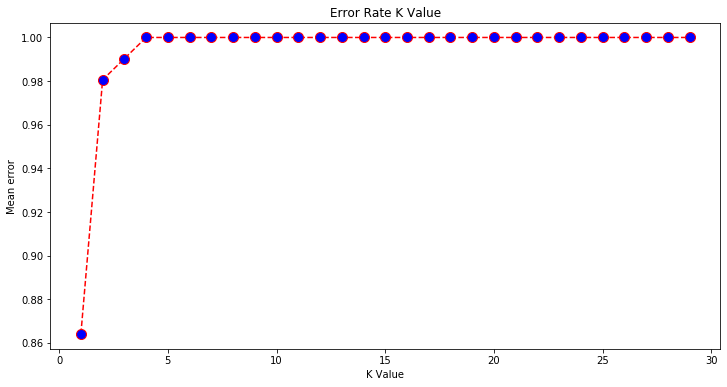

In [156]:

plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

Here we can see n_neighnors=3 is suitable

In [157]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [159]:
knn_predict = knn_model.predict(test_X)
print('Performance on training data using KNN:',knn_model.score(train_X,train_y))
print('Performance on testing data using KNN :',knn_model.score(test_X,test_y))
acc_RDT=r2_score(test_y, knn_predict)
print('Accuracy KNN : ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, knn_predict))

Performance on training data using KNN: 0.8902196318573777
Performance on testing data using KNN : 0.8078817663272165
Accuracy KNN :  0.8078817663272165
MSE:  0.20054457616295157


In [160]:
cr_results = pd.DataFrame({'Method':['KNN Regressor '], 'accuracy': acc_RDT},index={'20'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905
19         Cross Val Bagging Regressor   0.874204
20                       KNN Regressor   0.807882

In [161]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(knn_model,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.7473251175166655


In [162]:
cr_results = pd.DataFrame({'Method':['Cross Val KNN Regressor '], 'accuracy': kfold_acc},index={'21'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905
19         Cross Val Bagging Regressor   0.874204
20                       KNN Regressor   0.807882
21             Cross Val KNN Regressor   0.747325

<h2>Ensemble</h2>

In [163]:

L=LinearRegression()
K=KNeighborsRegressor(n_neighbors=3)
S=SVR(kernel='linear')

In [164]:
ebl=VotingRegressor(estimators=[('L',L),('K',K),('S',S)])
ebl.fit(train_X,train_y)

VotingRegressor(estimators=[('L',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('K',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('S',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [166]:
ebl_predict = ebl.predict(test_X)
print('Performance on training data using Ensemble technique:',ebl.score(train_X,train_y))
print('Performance on testing data using Ensemble technique :',ebl.score(test_X,test_y))
acc_RDT=r2_score(test_y, ebl_predict)
print('Accuracy Ensemble : ',acc_RDT)
print('MSE: ',mean_squared_error(test_y, ebl_predict))

Performance on training data using Ensemble technique: 0.8213604308836657
Performance on testing data using Ensemble technique : 0.7849191766894733
Accuracy Ensemble :  0.7849191766894733
MSE:  0.22451430937603264


In [167]:
cr_results = pd.DataFrame({'Method':['Ensemble '], 'accuracy': acc_RDT},index={'22'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905
19         Cross Val Bagging Regressor   0.874204
20                       KNN Regressor   0.807882
21             Cross Val KNN Regressor   0.747325
22                            Ensemble   0.784919

In [168]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)
kfold_acc=cross_val_score(ebl,train_X,train_y,cv=kfold).mean()
print("Cross Val : ",kfold_acc)

Cross Val :  0.7634491804143297


In [169]:
cr_results = pd.DataFrame({'Method':['Cross Val Ensemble '], 'accuracy': kfold_acc},index={'23'})
results=pd.concat([results,cr_results])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Linear Regression  0.698138
2                      Ridge Regression  0.698136
3                      Lasso Regression  0.479395
4                         Decision Tree  0.845167
5               Cross Val Decision Tree  0.827591
6                     2nd Decision Tree  0.840095
7             Regularised Decision Tree  0.654828
8   Cross Val Regularised Decision Tree  0.625588
9             2nd Pruned Decision Tree   0.663468
10             Random Forest Regressor   0.902572
11   Cross Val Random Forest Regressor   0.885343
12                         Ada Boosting  0.757387
13              Cross Val Ada Boosting   0.768363
14                    Gradient Boosting  0.892338
15         Cross Val Gradient Boosting   0.886701
16                                 SVR   0.693204
17                       Cross Val SVR   0.701079
18                   Bagging Regressor   0.882905
19         Cross Val Bagging Regressor   0.874204
20                       KNN Regressor   0.807882
21             Cross Val KNN Regressor   0.747325
22                            Ensemble   0.784919
23                  Cross Val Ensemble   0.763449

a. After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.<br><br>

<h2>Boot Strap Sampling</h2>

In [170]:
values=z_dataframe.values

In [171]:
values

array([[-1.33901711,  1.62590237, -0.84714393, ..., -0.30567615,
        -0.15315867, -0.35501811],
       [-1.07479007, -0.36371693,  1.09607803, ...,  0.3006925 ,
        -0.6569333 , -0.73710825],
       [-0.29838379, -0.8581924 ,  0.64896501, ...,  1.12698101,
        -0.15315867, -0.39514356],
       ...,
       [-0.04564488,  0.50102926,  0.56454507, ..., -0.05397595,
        -0.15315867,  0.50678082],
       [ 0.58237302, -0.41293013, -0.84714393, ..., -1.30357843,
        -0.15315867,  1.15238141],
       [ 2.47791487, -0.8581924 , -0.84714393, ..., -2.02816989,
        -0.90882061,  1.005654  ]])

In [172]:
scores=list()   
for i in range(1000):
    # prepare train and test sets
    train = resample(values, n_samples=len(z_dataframe))  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbm_model = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbm_model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbm_model.score(test[:, :-1] , y_test)
    predictions = gbm_model.predict(test[:, :-1])  

    scores.append(score)
scores

[0.8647282184154881,
 0.839460066792876,
 0.8254795727412032,
 0.8814303632027818,
 0.8487504731436122,
 0.863266406410187,
 0.8555412498307383,
 0.8545926556019879,
 0.8387751125806008,
 0.8451728627121162,
 0.8626412646849074,
 0.855793882924563,
 0.8716140668988193,
 0.8368516931352976,
 0.8207884636777494,
 0.8347306534939207,
 0.8325561853348643,
 0.8598870035502895,
 0.831442535621788,
 0.8450299153924908,
 0.8583154894725349,
 0.8488242214658688,
 0.8513635534869901,
 0.8374661888742855,
 0.8526056755977295,
 0.8137921666169388,
 0.8558673249766713,
 0.8177410876991611,
 0.8328373248957054,
 0.8521808922236995,
 0.8577351591916896,
 0.858894674143195,
 0.8627854898610139,
 0.839649313090712,
 0.8561776016914455,
 0.8559372599793924,
 0.84503013741339,
 0.8304014013605294,
 0.8635335133162831,
 0.8261241988764382,
 0.8485027836475879,
 0.8559718261432686,
 0.8642788667635158,
 0.8356915209844833,
 0.8573985579157503,
 0.8532225294621338,
 0.8645587552953287,
 0.8539099355034796,


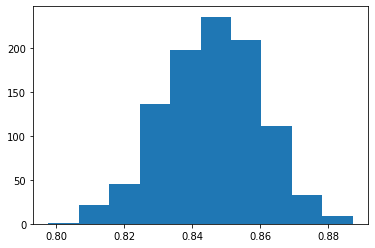

In [173]:
plt.hist(scores)
plt.show()

In [174]:
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 81.7% and 87.2%


Random Forest

In [175]:
scores=list()   
for i in range(1000):
    # prepare train and test sets
    train = resample(values, n_samples=len(z_dataframe))  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbm_model = RandomForestRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbm_model.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbm_model.score(test[:, :-1] , y_test)
    predictions = gbm_model.predict(test[:, :-1])  

    scores.append(score)
scores

[0.8811157882257241,
 0.9003577778439953,
 0.8657642952933033,
 0.8601018447684605,
 0.8739966933479587,
 0.8806011363173769,
 0.8940383049126904,
 0.8739279027518091,
 0.8730549758852133,
 0.8861214441873998,
 0.8734670942092386,
 0.8479494748808167,
 0.8855610653911622,
 0.8456347528663185,
 0.8728495526766711,
 0.8589308855937033,
 0.8622815598252649,
 0.8668226769260904,
 0.8699408805992552,
 0.888199924726468,
 0.8722424693596285,
 0.8601926613276903,
 0.8916553674404168,
 0.8865801846739315,
 0.8926268358530267,
 0.849649680572367,
 0.8726055394662197,
 0.8980737152031737,
 0.8611245225375374,
 0.8619539240529449,
 0.8540543682378403,
 0.8409845608889375,
 0.8836514399397625,
 0.88740165240179,
 0.8666972896954989,
 0.9002866819137516,
 0.8645280189760661,
 0.8756588932189086,
 0.8754634152058439,
 0.8710548929879153,
 0.831657471711938,
 0.8725671039232372,
 0.854807473881691,
 0.8617821649166157,
 0.8519210314689913,
 0.896634136689737,
 0.8671599511297168,
 0.8758947300525197,

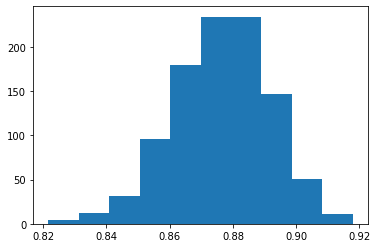

In [172]:
plt.hist(scores)
plt.show()

In [173]:
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 84.3% and 90.3%


<h3>The bootstrap random forest classification model performance is between 84.3%-90.3% which is better than other classification algorithms.</h3>